In [1]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Apple Inc.
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876106  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167610  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742668  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400543  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565201  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' price column
close_prices = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

print(scaled_data[:5])


[[0.15085277]
 [0.14505529]
 [0.14976075]
 [0.14696135]
 [0.15649137]]


In [3]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_dim=100, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='tanh'))
    return model

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=1, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

generator = build_generator()
discriminator = build_discriminator()

print(generator.summary())
print(discriminator.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46,209
Trainable params: 46,209
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               512       
                                                                 
 dense_4 (Dense)         

In [4]:
import numpy as np
from tqdm import tqdm

# GAN model
def build_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training parameters
epochs = 10000
batch_size = 64
sample_interval = 1000

# Training loop
for epoch in tqdm(range(epochs)):
    # Train discriminator
    idx = np.random.randint(0, scaled_data.shape[0], batch_size)
    real_data = scaled_data[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_data = generator.predict(noise)
    
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    
    # Print progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {d_loss[1]}] [G loss: {g_loss}]")


  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

2/2 [==============================] - 0s 0s/step


  0%|                                                                              | 1/10000 [00:01<4:30:18,  1.62s/it]

0 [D loss: 0.7192332744598389 | D accuracy: 0.140625] [G loss: 0.6986626982688904]
2/2 [==============================] - 0s 4ms/step


  0%|                                                                              | 2/10000 [00:01<2:03:00,  1.35it/s]

2/2 [==============================] - 0s 4ms/step


  0%|                                                                              | 3/10000 [00:01<1:15:49,  2.20it/s]

2/2 [==============================] - 0s 7ms/step


  0%|                                                                                | 4/10000 [00:01<53:42,  3.10it/s]

2/2 [==============================] - 0s 0s/step


  0%|                                                                                | 5/10000 [00:02<41:57,  3.97it/s]

2/2 [==============================] - 0s 4ms/step


  0%|                                                                                | 6/10000 [00:02<34:27,  4.83it/s]

2/2 [==============================] - 0s 3ms/step


  0%|                                                                                | 7/10000 [00:02<29:34,  5.63it/s]

2/2 [==============================] - 0s 3ms/step


  0%|                                                                                | 8/10000 [00:02<26:39,  6.25it/s]

2/2 [==============================] - 0s 9ms/step


  0%|                                                                                | 9/10000 [00:02<24:55,  6.68it/s]

2/2 [==============================] - 0s 2ms/step


  0%|                                                                               | 10/10000 [00:02<23:21,  7.13it/s]

2/2 [==============================] - 0s 5ms/step


  0%|                                                                               | 11/10000 [00:02<22:29,  7.40it/s]

2/2 [==============================] - 0s 5ms/step


  0%|                                                                               | 12/10000 [00:03<25:18,  6.58it/s]

2/2 [==============================] - 0s 3ms/step


  0%|                                                                               | 13/10000 [00:03<24:29,  6.80it/s]

2/2 [==============================] - 0s 4ms/step


  0%|                                                                               | 14/10000 [00:03<22:43,  7.32it/s]

2/2 [==============================] - 0s 3ms/step


  0%|                                                                               | 15/10000 [00:03<21:49,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 16/10000 [00:03<21:08,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


  0%|▏                                                                              | 17/10000 [00:03<20:40,  8.05it/s]

2/2 [==============================] - 0s 5ms/step


  0%|▏                                                                              | 18/10000 [00:03<20:17,  8.20it/s]

2/2 [==============================] - 0s 0s/step


  0%|▏                                                                              | 19/10000 [00:03<20:10,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 20/10000 [00:03<19:43,  8.43it/s]

2/2 [==============================] - 0s 11ms/step


  0%|▏                                                                              | 21/10000 [00:04<27:07,  6.13it/s]

2/2 [==============================] - 0s 9ms/step


  0%|▏                                                                              | 22/10000 [00:04<25:14,  6.59it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 23/10000 [00:04<23:36,  7.05it/s]

2/2 [==============================] - 0s 7ms/step


  0%|▏                                                                              | 24/10000 [00:04<22:19,  7.45it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 25/10000 [00:04<21:41,  7.66it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 26/10000 [00:04<20:41,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 27/10000 [00:04<19:41,  8.44it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▏                                                                              | 28/10000 [00:05<18:52,  8.80it/s]

2/2 [==============================] - 0s 7ms/step


  0%|▏                                                                              | 29/10000 [00:05<19:33,  8.50it/s]

2/2 [==============================] - 0s 8ms/step


  0%|▏                                                                              | 30/10000 [00:05<19:29,  8.52it/s]

2/2 [==============================] - 0s 2ms/step


  0%|▏                                                                              | 31/10000 [00:05<18:53,  8.79it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▎                                                                              | 32/10000 [00:05<18:38,  8.91it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 33/10000 [00:05<18:18,  9.07it/s]

2/2 [==============================] - 0s 18ms/step


  0%|▎                                                                              | 35/10000 [00:05<17:50,  9.31it/s]

2/2 [==============================] - 0s 4ms/step


  0%|▎                                                                              | 36/10000 [00:05<17:42,  9.37it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 37/10000 [00:06<17:35,  9.44it/s]

2/2 [==============================] - 0s 18ms/step


  0%|▎                                                                              | 38/10000 [00:06<17:44,  9.35it/s]

2/2 [==============================] - 0s 5ms/step


  0%|▎                                                                              | 39/10000 [00:06<17:37,  9.42it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 40/10000 [00:06<17:25,  9.53it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 41/10000 [00:06<17:46,  9.34it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 42/10000 [00:06<17:38,  9.41it/s]

2/2 [==============================] - 0s 12ms/step


  0%|▎                                                                              | 43/10000 [00:06<17:37,  9.42it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 44/10000 [00:06<17:39,  9.39it/s]

2/2 [==============================] - 0s 0s/step


  0%|▎                                                                              | 45/10000 [00:06<17:34,  9.44it/s]

2/2 [==============================] - 0s 3ms/step


  0%|▎                                                                              | 46/10000 [00:06<17:20,  9.57it/s]

2/2 [==============================] - 0s 7ms/step


  0%|▎                                                                              | 47/10000 [00:07<17:46,  9.33it/s]

2/2 [==============================] - 0s 14ms/step


  0%|▍                                                                              | 48/10000 [00:07<17:28,  9.49it/s]

2/2 [==============================] - 0s 0s/step


  0%|▍                                                                              | 49/10000 [00:07<18:05,  9.17it/s]

2/2 [==============================] - 0s 0s/step


  0%|▍                                                                              | 50/10000 [00:07<17:38,  9.40it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▍                                                                              | 51/10000 [00:07<17:51,  9.29it/s]

2/2 [==============================] - 0s 0s/step


  1%|▍                                                                              | 52/10000 [00:07<17:42,  9.36it/s]

2/2 [==============================] - 0s 0s/step


  1%|▍                                                                              | 53/10000 [00:07<17:25,  9.52it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▍                                                                              | 54/10000 [00:07<17:37,  9.41it/s]

2/2 [==============================] - 0s 8ms/step


  1%|▍                                                                              | 55/10000 [00:07<17:41,  9.37it/s]

2/2 [==============================] - 0s 8ms/step


  1%|▍                                                                              | 57/10000 [00:08<17:31,  9.46it/s]

2/2 [==============================] - 0s 5ms/step


  1%|▍                                                                              | 58/10000 [00:08<17:41,  9.36it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▍                                                                              | 59/10000 [00:08<17:45,  9.33it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▍                                                                              | 60/10000 [00:08<17:54,  9.25it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▍                                                                              | 61/10000 [00:08<17:52,  9.27it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▍                                                                              | 62/10000 [00:08<17:47,  9.31it/s]

2/2 [==============================] - 0s 9ms/step


  1%|▍                                                                              | 63/10000 [00:08<17:32,  9.44it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▌                                                                              | 64/10000 [00:08<17:51,  9.27it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 65/10000 [00:09<17:48,  9.29it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▌                                                                              | 66/10000 [00:09<17:42,  9.35it/s]

2/2 [==============================] - 0s 10ms/step


  1%|▌                                                                              | 67/10000 [00:09<17:34,  9.42it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 68/10000 [00:09<17:54,  9.25it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 69/10000 [00:09<17:40,  9.36it/s]

2/2 [==============================] - 0s 17ms/step


  1%|▌                                                                              | 70/10000 [00:09<17:24,  9.50it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 71/10000 [00:09<17:43,  9.34it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 72/10000 [00:09<17:33,  9.42it/s]

2/2 [==============================] - 0s 16ms/step


  1%|▌                                                                              | 73/10000 [00:09<17:18,  9.56it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▌                                                                              | 74/10000 [00:09<17:39,  9.37it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 75/10000 [00:10<17:30,  9.45it/s]

2/2 [==============================] - 0s 0s/step


  1%|▌                                                                              | 76/10000 [00:10<17:14,  9.60it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▌                                                                              | 77/10000 [00:10<18:17,  9.04it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▌                                                                              | 78/10000 [00:10<18:42,  8.84it/s]

2/2 [==============================] - 0s 8ms/step


  1%|▌                                                                              | 79/10000 [00:10<18:18,  9.03it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▋                                                                              | 80/10000 [00:10<18:19,  9.02it/s]

2/2 [==============================] - 0s 0s/step


  1%|▋                                                                              | 81/10000 [00:10<18:03,  9.15it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▋                                                                              | 82/10000 [00:10<17:59,  9.19it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▋                                                                              | 83/10000 [00:10<17:59,  9.19it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▋                                                                              | 85/10000 [00:11<17:46,  9.30it/s]

2/2 [==============================] - 0s 6ms/step


  1%|▋                                                                              | 86/10000 [00:11<17:39,  9.36it/s]

2/2 [==============================] - 0s 6ms/step


  1%|▋                                                                              | 87/10000 [00:11<17:56,  9.21it/s]

2/2 [==============================] - 0s 0s/step


  1%|▋                                                                              | 88/10000 [00:11<18:04,  9.14it/s]

2/2 [==============================] - 0s 7ms/step


  1%|▋                                                                              | 89/10000 [00:11<18:46,  8.80it/s]

2/2 [==============================] - 0s 6ms/step


  1%|▋                                                                              | 90/10000 [00:11<18:53,  8.75it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▋                                                                              | 91/10000 [00:11<18:35,  8.88it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▋                                                                              | 92/10000 [00:11<18:25,  8.96it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▋                                                                              | 93/10000 [00:12<18:15,  9.05it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▋                                                                              | 94/10000 [00:12<18:09,  9.09it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▊                                                                              | 95/10000 [00:12<17:48,  9.27it/s]

2/2 [==============================] - 0s 4ms/step


  1%|▊                                                                              | 96/10000 [00:12<17:47,  9.28it/s]

2/2 [==============================] - 0s 0s/step


  1%|▊                                                                              | 97/10000 [00:12<17:42,  9.32it/s]

2/2 [==============================] - 0s 11ms/step


  1%|▊                                                                              | 98/10000 [00:12<17:20,  9.51it/s]

2/2 [==============================] - 0s 0s/step


  1%|▊                                                                              | 99/10000 [00:12<17:35,  9.38it/s]

2/2 [==============================] - 0s 7ms/step


  1%|▊                                                                             | 100/10000 [00:12<18:14,  9.05it/s]

2/2 [==============================] - 0s 7ms/step


  1%|▊                                                                             | 101/10000 [00:12<18:08,  9.09it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▊                                                                             | 102/10000 [00:13<18:19,  9.00it/s]

2/2 [==============================] - 0s 7ms/step


  1%|▊                                                                             | 103/10000 [00:13<18:03,  9.13it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▊                                                                             | 104/10000 [00:13<17:51,  9.23it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▊                                                                             | 105/10000 [00:13<18:13,  9.05it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▊                                                                             | 106/10000 [00:13<18:05,  9.12it/s]

2/2 [==============================] - 0s 9ms/step


  1%|▊                                                                             | 108/10000 [00:13<17:39,  9.33it/s]

2/2 [==============================] - 0s 0s/step


  1%|▊                                                                             | 109/10000 [00:13<17:33,  9.39it/s]

2/2 [==============================] - 0s 16ms/step


  1%|▊                                                                             | 110/10000 [00:13<17:24,  9.47it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▊                                                                             | 111/10000 [00:14<17:39,  9.34it/s]

2/2 [==============================] - 0s 10ms/step


  1%|▊                                                                             | 112/10000 [00:14<17:26,  9.45it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▉                                                                             | 113/10000 [00:14<17:39,  9.33it/s]

2/2 [==============================] - 0s 0s/step


  1%|▉                                                                             | 114/10000 [00:14<17:33,  9.38it/s]

2/2 [==============================] - 0s 0s/step


  1%|▉                                                                             | 115/10000 [00:14<17:17,  9.53it/s]

2/2 [==============================] - 0s 0s/step


  1%|▉                                                                             | 116/10000 [00:14<17:40,  9.32it/s]

2/2 [==============================] - 0s 2ms/step


  1%|▉                                                                             | 117/10000 [00:14<17:46,  9.27it/s]

2/2 [==============================] - 0s 8ms/step


  1%|▉                                                                             | 118/10000 [00:14<17:55,  9.19it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 120/10000 [00:14<17:39,  9.33it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 121/10000 [00:15<17:36,  9.35it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 123/10000 [00:15<17:28,  9.42it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 124/10000 [00:15<17:52,  9.21it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 125/10000 [00:15<18:44,  8.78it/s]

2/2 [==============================] - 0s 5ms/step


  1%|▉                                                                             | 126/10000 [00:15<19:02,  8.64it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 127/10000 [00:15<19:34,  8.41it/s]

2/2 [==============================] - 0s 3ms/step


  1%|▉                                                                             | 128/10000 [00:15<19:30,  8.43it/s]

2/2 [==============================] - 0s 3ms/step


  1%|█                                                                             | 129/10000 [00:16<19:33,  8.41it/s]

2/2 [==============================] - 0s 2ms/step


  1%|█                                                                             | 130/10000 [00:16<19:26,  8.46it/s]

2/2 [==============================] - 0s 2ms/step


  1%|█                                                                             | 131/10000 [00:16<19:21,  8.50it/s]

2/2 [==============================] - 0s 3ms/step


  1%|█                                                                             | 132/10000 [00:16<19:26,  8.46it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 133/10000 [00:16<19:29,  8.44it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 134/10000 [00:16<19:19,  8.51it/s]

2/2 [==============================] - 0s 2ms/step


  1%|█                                                                             | 135/10000 [00:16<19:02,  8.63it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 136/10000 [00:16<18:37,  8.83it/s]

2/2 [==============================] - 0s 17ms/step


  1%|█                                                                             | 137/10000 [00:16<18:31,  8.87it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 138/10000 [00:17<18:12,  9.03it/s]

2/2 [==============================] - 0s 14ms/step


  1%|█                                                                             | 139/10000 [00:17<17:43,  9.27it/s]

2/2 [==============================] - 0s 8ms/step


  1%|█                                                                             | 140/10000 [00:17<17:55,  9.17it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 141/10000 [00:17<17:39,  9.30it/s]

2/2 [==============================] - 0s 4ms/step


  1%|█                                                                             | 142/10000 [00:17<17:55,  9.16it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 143/10000 [00:17<17:39,  9.30it/s]

2/2 [==============================] - 0s 0s/step


  1%|█                                                                             | 144/10000 [00:17<17:47,  9.23it/s]

2/2 [==============================] - 0s 0s/step


  1%|█▏                                                                            | 145/10000 [00:17<17:41,  9.28it/s]

2/2 [==============================] - 0s 16ms/step


  1%|█▏                                                                            | 147/10000 [00:18<17:36,  9.33it/s]

2/2 [==============================] - 0s 0s/step


  1%|█▏                                                                            | 148/10000 [00:18<17:27,  9.41it/s]

2/2 [==============================] - 0s 0s/step


  1%|█▏                                                                            | 149/10000 [00:18<17:44,  9.26it/s]

2/2 [==============================] - 0s 0s/step


  2%|█▏                                                                            | 150/10000 [00:18<17:32,  9.36it/s]

2/2 [==============================] - 0s 14ms/step


  2%|█▏                                                                            | 151/10000 [00:18<17:44,  9.25it/s]

2/2 [==============================] - 0s 0s/step


  2%|█▏                                                                            | 152/10000 [00:18<17:38,  9.31it/s]

2/2 [==============================] - 0s 16ms/step


  2%|█▏                                                                            | 153/10000 [00:18<17:42,  9.27it/s]

2/2 [==============================] - 0s 5ms/step


  2%|█▏                                                                            | 154/10000 [00:18<17:40,  9.29it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▏                                                                            | 155/10000 [00:18<17:47,  9.22it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▏                                                                            | 156/10000 [00:18<17:47,  9.22it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▏                                                                            | 157/10000 [00:19<17:59,  9.12it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▏                                                                            | 158/10000 [00:19<22:20,  7.34it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▏                                                                            | 159/10000 [00:19<21:19,  7.69it/s]

2/2 [==============================] - 0s 8ms/step


  2%|█▏                                                                            | 160/10000 [00:19<20:45,  7.90it/s]

2/2 [==============================] - 0s 8ms/step


  2%|█▎                                                                            | 161/10000 [00:19<20:11,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▎                                                                            | 162/10000 [00:19<19:20,  8.48it/s]

2/2 [==============================] - 0s 0s/step


  2%|█▎                                                                            | 163/10000 [00:19<18:27,  8.88it/s]

2/2 [==============================] - 0s 5ms/step


  2%|█▎                                                                            | 164/10000 [00:19<18:25,  8.90it/s]

2/2 [==============================] - 0s 8ms/step


  2%|█▎                                                                            | 165/10000 [00:20<18:11,  9.01it/s]

2/2 [==============================] - 0s 16ms/step


  2%|█▎                                                                            | 166/10000 [00:20<17:46,  9.22it/s]

2/2 [==============================] - 0s 7ms/step


  2%|█▎                                                                            | 167/10000 [00:20<17:32,  9.35it/s]

2/2 [==============================] - 0s 5ms/step


  2%|█▎                                                                            | 168/10000 [00:20<18:32,  8.84it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▎                                                                            | 169/10000 [00:20<19:55,  8.22it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▎                                                                            | 170/10000 [00:20<20:16,  8.08it/s]

2/2 [==============================] - 0s 5ms/step


  2%|█▎                                                                            | 171/10000 [00:20<20:35,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▎                                                                            | 172/10000 [00:20<19:50,  8.25it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▎                                                                            | 173/10000 [00:21<19:17,  8.49it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▎                                                                            | 174/10000 [00:21<18:44,  8.74it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▎                                                                            | 175/10000 [00:21<18:24,  8.89it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▎                                                                            | 176/10000 [00:21<18:01,  9.08it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▍                                                                            | 177/10000 [00:21<17:57,  9.11it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 178/10000 [00:21<17:57,  9.12it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 179/10000 [00:21<18:05,  9.05it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▍                                                                            | 180/10000 [00:21<18:00,  9.09it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 181/10000 [00:21<17:50,  9.17it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 182/10000 [00:21<17:43,  9.24it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 183/10000 [00:22<17:39,  9.27it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▍                                                                            | 184/10000 [00:22<18:06,  9.04it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 185/10000 [00:22<18:05,  9.04it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▍                                                                            | 186/10000 [00:22<17:58,  9.10it/s]

2/2 [==============================] - 0s 6ms/step


  2%|█▍                                                                            | 187/10000 [00:22<17:45,  9.21it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 188/10000 [00:22<17:37,  9.28it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▍                                                                            | 189/10000 [00:22<17:42,  9.24it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▍                                                                            | 190/10000 [00:22<17:33,  9.31it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▍                                                                            | 191/10000 [00:22<17:14,  9.48it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▍                                                                            | 192/10000 [00:23<17:23,  9.40it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 193/10000 [00:23<17:28,  9.35it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 194/10000 [00:23<17:23,  9.39it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 195/10000 [00:23<17:21,  9.42it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 196/10000 [00:23<17:16,  9.46it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 197/10000 [00:23<17:39,  9.25it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▌                                                                            | 198/10000 [00:23<17:59,  9.08it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▌                                                                            | 199/10000 [00:23<17:46,  9.19it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 200/10000 [00:23<17:35,  9.29it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 201/10000 [00:24<17:36,  9.27it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▌                                                                            | 202/10000 [00:24<17:36,  9.27it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 203/10000 [00:24<17:32,  9.31it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▌                                                                            | 204/10000 [00:24<17:24,  9.38it/s]

2/2 [==============================] - 0s 9ms/step


  2%|█▌                                                                            | 205/10000 [00:24<17:36,  9.27it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 206/10000 [00:24<17:30,  9.32it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 207/10000 [00:24<17:27,  9.35it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▌                                                                            | 208/10000 [00:24<17:23,  9.38it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 209/10000 [00:24<17:35,  9.27it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 210/10000 [00:25<17:29,  9.33it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 211/10000 [00:25<17:22,  9.39it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 212/10000 [00:25<17:25,  9.37it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 213/10000 [00:25<17:29,  9.32it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 214/10000 [00:25<17:27,  9.34it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 215/10000 [00:25<17:23,  9.38it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 216/10000 [00:25<17:35,  9.27it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 217/10000 [00:25<18:15,  8.93it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▋                                                                            | 218/10000 [00:25<17:58,  9.07it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 219/10000 [00:25<17:50,  9.14it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 220/10000 [00:26<17:43,  9.19it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▋                                                                            | 221/10000 [00:26<17:43,  9.19it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 222/10000 [00:26<17:35,  9.26it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 223/10000 [00:26<17:34,  9.27it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▋                                                                            | 224/10000 [00:26<17:28,  9.33it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 225/10000 [00:26<17:33,  9.28it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 226/10000 [00:26<17:32,  9.29it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▊                                                                            | 227/10000 [00:26<17:28,  9.32it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▊                                                                            | 228/10000 [00:26<17:28,  9.32it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▊                                                                            | 229/10000 [00:27<17:31,  9.29it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 230/10000 [00:27<17:26,  9.34it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 231/10000 [00:27<17:26,  9.33it/s]

2/2 [==============================] - 0s 6ms/step


  2%|█▊                                                                            | 232/10000 [00:27<17:25,  9.35it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 233/10000 [00:27<17:29,  9.30it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 234/10000 [00:27<17:28,  9.31it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 235/10000 [00:27<17:48,  9.13it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 236/10000 [00:27<18:01,  9.03it/s]

2/2 [==============================] - 0s 4ms/step


  2%|█▊                                                                            | 237/10000 [00:27<17:53,  9.10it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▊                                                                            | 238/10000 [00:28<17:45,  9.16it/s]

2/2 [==============================] - 0s 0s/step


  2%|█▊                                                                            | 239/10000 [00:28<17:41,  9.20it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▊                                                                            | 240/10000 [00:28<17:34,  9.25it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▉                                                                            | 241/10000 [00:28<17:39,  9.21it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▉                                                                            | 242/10000 [00:28<17:36,  9.23it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▉                                                                            | 243/10000 [00:28<17:36,  9.23it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▉                                                                            | 244/10000 [00:28<17:21,  9.37it/s]

2/2 [==============================] - 0s 0s/step


  2%|█▉                                                                            | 245/10000 [00:28<17:57,  9.06it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▉                                                                            | 246/10000 [00:28<17:59,  9.04it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▉                                                                            | 247/10000 [00:29<17:50,  9.11it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▉                                                                            | 248/10000 [00:29<17:44,  9.16it/s]

2/2 [==============================] - 0s 2ms/step


  2%|█▉                                                                            | 249/10000 [00:29<17:44,  9.16it/s]

2/2 [==============================] - 0s 3ms/step


  2%|█▉                                                                            | 250/10000 [00:29<17:42,  9.18it/s]

2/2 [==============================] - 0s 2ms/step


  3%|█▉                                                                            | 251/10000 [00:29<17:36,  9.23it/s]

2/2 [==============================] - 0s 4ms/step


  3%|█▉                                                                            | 252/10000 [00:29<17:43,  9.17it/s]

2/2 [==============================] - 0s 3ms/step


  3%|█▉                                                                            | 253/10000 [00:29<17:43,  9.17it/s]

2/2 [==============================] - 0s 3ms/step


  3%|█▉                                                                            | 254/10000 [00:29<17:58,  9.04it/s]

2/2 [==============================] - 0s 3ms/step


  3%|█▉                                                                            | 255/10000 [00:29<21:45,  7.46it/s]

2/2 [==============================] - 0s 4ms/step


  3%|█▉                                                                            | 256/10000 [00:30<20:25,  7.95it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██                                                                            | 257/10000 [00:30<19:38,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██                                                                            | 258/10000 [00:30<19:03,  8.52it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 259/10000 [00:30<18:56,  8.57it/s]

2/2 [==============================] - 0s 9ms/step


  3%|██                                                                            | 260/10000 [00:30<18:34,  8.74it/s]

2/2 [==============================] - 0s 7ms/step


  3%|██                                                                            | 261/10000 [00:30<18:29,  8.78it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██                                                                            | 262/10000 [00:30<18:14,  8.90it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 263/10000 [00:30<19:07,  8.48it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 264/10000 [00:31<19:49,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 265/10000 [00:31<19:28,  8.33it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██                                                                            | 266/10000 [00:31<19:01,  8.53it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 267/10000 [00:31<18:41,  8.68it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 268/10000 [00:31<18:24,  8.81it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 269/10000 [00:31<18:20,  8.84it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██                                                                            | 270/10000 [00:31<18:13,  8.90it/s]

2/2 [==============================] - 0s 0s/step


  3%|██                                                                            | 271/10000 [00:31<18:26,  8.79it/s]

2/2 [==============================] - 0s 5ms/step


  3%|██                                                                            | 272/10000 [00:31<18:52,  8.59it/s]

2/2 [==============================] - 0s 7ms/step


  3%|██▏                                                                           | 273/10000 [00:32<18:46,  8.63it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▏                                                                           | 274/10000 [00:32<18:34,  8.73it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▏                                                                           | 275/10000 [00:32<18:24,  8.80it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 276/10000 [00:32<18:09,  8.92it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 277/10000 [00:32<18:11,  8.91it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 278/10000 [00:32<18:06,  8.95it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 279/10000 [00:32<17:58,  9.01it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 280/10000 [00:32<17:50,  9.08it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▏                                                                           | 281/10000 [00:32<17:53,  9.05it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 282/10000 [00:33<17:49,  9.09it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▏                                                                           | 283/10000 [00:33<17:47,  9.11it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 284/10000 [00:33<17:50,  9.07it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 285/10000 [00:33<17:53,  9.05it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▏                                                                           | 286/10000 [00:33<17:49,  9.08it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 287/10000 [00:33<17:48,  9.09it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▏                                                                           | 288/10000 [00:33<17:50,  9.07it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▎                                                                           | 289/10000 [00:33<17:54,  9.04it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▎                                                                           | 290/10000 [00:34<27:50,  5.81it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 291/10000 [00:34<24:37,  6.57it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 292/10000 [00:34<22:33,  7.17it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 293/10000 [00:34<21:11,  7.63it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▎                                                                           | 294/10000 [00:34<20:11,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 295/10000 [00:34<19:27,  8.31it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▎                                                                           | 296/10000 [00:34<18:54,  8.56it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▎                                                                           | 297/10000 [00:34<18:36,  8.69it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▎                                                                           | 298/10000 [00:34<18:22,  8.80it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 299/10000 [00:35<18:13,  8.87it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 300/10000 [00:35<18:01,  8.97it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 301/10000 [00:35<17:55,  9.02it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 302/10000 [00:35<18:05,  8.94it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 303/10000 [00:35<17:54,  9.02it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▎                                                                           | 304/10000 [00:35<17:55,  9.01it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▍                                                                           | 305/10000 [00:35<18:06,  8.93it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▍                                                                           | 306/10000 [00:35<18:29,  8.74it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▍                                                                           | 307/10000 [00:36<19:01,  8.49it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▍                                                                           | 308/10000 [00:36<18:39,  8.66it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▍                                                                           | 309/10000 [00:36<18:45,  8.61it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▍                                                                           | 310/10000 [00:36<19:14,  8.39it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▍                                                                           | 311/10000 [00:36<19:26,  8.30it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▍                                                                           | 312/10000 [00:36<19:15,  8.38it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▍                                                                           | 313/10000 [00:36<19:29,  8.29it/s]

2/2 [==============================] - 0s 7ms/step


  3%|██▍                                                                           | 314/10000 [00:36<19:58,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▍                                                                           | 315/10000 [00:36<20:03,  8.05it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▍                                                                           | 316/10000 [00:37<20:15,  7.96it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▍                                                                           | 317/10000 [00:37<20:17,  7.96it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▍                                                                           | 318/10000 [00:37<20:49,  7.75it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▍                                                                           | 319/10000 [00:37<22:13,  7.26it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▍                                                                           | 320/10000 [00:37<22:00,  7.33it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▌                                                                           | 321/10000 [00:37<21:24,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 322/10000 [00:37<20:19,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 323/10000 [00:38<20:06,  8.02it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▌                                                                           | 324/10000 [00:38<19:01,  8.47it/s]

2/2 [==============================] - 0s 5ms/step


  3%|██▌                                                                           | 325/10000 [00:38<18:54,  8.53it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▌                                                                           | 326/10000 [00:38<19:44,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▌                                                                           | 327/10000 [00:38<19:59,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 328/10000 [00:38<19:35,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 329/10000 [00:38<19:29,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 330/10000 [00:38<19:18,  8.35it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▌                                                                           | 331/10000 [00:38<19:09,  8.41it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 332/10000 [00:39<18:59,  8.48it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▌                                                                           | 333/10000 [00:39<18:45,  8.59it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▌                                                                           | 334/10000 [00:39<18:45,  8.58it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▌                                                                           | 335/10000 [00:39<18:20,  8.78it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▌                                                                           | 336/10000 [00:39<18:16,  8.82it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▋                                                                           | 337/10000 [00:39<17:49,  9.03it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▋                                                                           | 338/10000 [00:39<18:03,  8.92it/s]

2/2 [==============================] - 0s 0s/step


  3%|██▋                                                                           | 339/10000 [00:39<17:49,  9.04it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▋                                                                           | 340/10000 [00:39<18:46,  8.57it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▋                                                                           | 341/10000 [00:40<19:32,  8.24it/s]

2/2 [==============================] - 0s 2ms/step


  3%|██▋                                                                           | 342/10000 [00:40<19:20,  8.32it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▋                                                                           | 343/10000 [00:40<19:32,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▋                                                                           | 344/10000 [00:40<19:50,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▋                                                                           | 345/10000 [00:40<19:16,  8.35it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▋                                                                           | 346/10000 [00:40<19:08,  8.40it/s]

2/2 [==============================] - 0s 4ms/step


  3%|██▋                                                                           | 347/10000 [00:40<18:57,  8.49it/s]

2/2 [==============================] - 0s 3ms/step


  3%|██▋                                                                           | 348/10000 [00:40<18:57,  8.49it/s]

2/2 [==============================] - 0s 5ms/step


  3%|██▋                                                                           | 349/10000 [00:41<18:38,  8.63it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▋                                                                           | 350/10000 [00:41<18:40,  8.61it/s]

2/2 [==============================] - 0s 3ms/step


  4%|██▋                                                                           | 351/10000 [00:41<18:33,  8.67it/s]

2/2 [==============================] - 0s 2ms/step


  4%|██▋                                                                           | 352/10000 [00:41<18:34,  8.66it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▊                                                                           | 353/10000 [00:41<18:15,  8.80it/s]

2/2 [==============================] - 0s 8ms/step


  4%|██▊                                                                           | 354/10000 [00:41<18:24,  8.73it/s]

2/2 [==============================] - 0s 16ms/step


  4%|██▊                                                                           | 355/10000 [00:41<17:48,  9.03it/s]

2/2 [==============================] - 0s 11ms/step


  4%|██▊                                                                           | 356/10000 [00:41<17:59,  8.94it/s]

2/2 [==============================] - 0s 3ms/step


  4%|██▊                                                                           | 357/10000 [00:41<18:05,  8.89it/s]

2/2 [==============================] - 0s 2ms/step


  4%|██▊                                                                           | 358/10000 [00:42<18:24,  8.73it/s]

2/2 [==============================] - 0s 5ms/step


  4%|██▊                                                                           | 359/10000 [00:42<18:22,  8.75it/s]

2/2 [==============================] - 0s 14ms/step


  4%|██▊                                                                           | 360/10000 [00:42<17:49,  9.01it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▊                                                                           | 361/10000 [00:42<18:02,  8.90it/s]

2/2 [==============================] - 0s 3ms/step


  4%|██▊                                                                           | 362/10000 [00:42<18:07,  8.86it/s]

2/2 [==============================] - 0s 12ms/step


  4%|██▊                                                                           | 363/10000 [00:42<17:40,  9.08it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▊                                                                           | 364/10000 [00:42<17:59,  8.92it/s]

2/2 [==============================] - 0s 2ms/step


  4%|██▊                                                                           | 365/10000 [00:42<18:06,  8.87it/s]

2/2 [==============================] - 0s 2ms/step


  4%|██▊                                                                           | 366/10000 [00:42<18:09,  8.84it/s]

2/2 [==============================] - 0s 8ms/step


  4%|██▊                                                                           | 367/10000 [00:43<17:46,  9.03it/s]

2/2 [==============================] - 0s 2ms/step


  4%|██▊                                                                           | 368/10000 [00:43<18:00,  8.92it/s]

2/2 [==============================] - 0s 4ms/step


  4%|██▉                                                                           | 369/10000 [00:43<18:33,  8.65it/s]

2/2 [==============================] - 0s 9ms/step


  4%|██▉                                                                           | 370/10000 [00:43<18:27,  8.69it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 371/10000 [00:43<18:16,  8.78it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 372/10000 [00:43<17:43,  9.05it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 373/10000 [00:43<17:58,  8.93it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 374/10000 [00:43<17:58,  8.93it/s]

2/2 [==============================] - 0s 4ms/step


  4%|██▉                                                                           | 375/10000 [00:43<17:57,  8.93it/s]

2/2 [==============================] - 0s 4ms/step


  4%|██▉                                                                           | 376/10000 [00:44<18:38,  8.60it/s]

2/2 [==============================] - 0s 3ms/step


  4%|██▉                                                                           | 377/10000 [00:44<18:42,  8.57it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 378/10000 [00:44<18:32,  8.65it/s]

2/2 [==============================] - 0s 3ms/step


  4%|██▉                                                                           | 379/10000 [00:44<18:11,  8.81it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 380/10000 [00:44<18:06,  8.85it/s]

2/2 [==============================] - 0s 6ms/step


  4%|██▉                                                                           | 381/10000 [00:44<18:10,  8.82it/s]

2/2 [==============================] - 0s 13ms/step


  4%|██▉                                                                           | 382/10000 [00:44<18:09,  8.82it/s]

2/2 [==============================] - 0s 0s/step


  4%|██▉                                                                           | 383/10000 [00:44<18:01,  8.89it/s]

2/2 [==============================] - 0s 3ms/step


  4%|██▉                                                                           | 384/10000 [00:45<18:28,  8.67it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███                                                                           | 385/10000 [00:45<18:38,  8.60it/s]

2/2 [==============================] - 0s 16ms/step


  4%|███                                                                           | 386/10000 [00:45<18:10,  8.81it/s]

2/2 [==============================] - 0s 0s/step


  4%|███                                                                           | 387/10000 [00:45<18:14,  8.79it/s]

2/2 [==============================] - 0s 0s/step


  4%|███                                                                           | 388/10000 [00:45<18:09,  8.82it/s]

2/2 [==============================] - 0s 9ms/step


  4%|███                                                                           | 389/10000 [00:45<18:01,  8.88it/s]

2/2 [==============================] - 0s 2ms/step


  4%|███                                                                           | 390/10000 [00:45<18:48,  8.52it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███                                                                           | 391/10000 [00:45<19:15,  8.32it/s]

2/2 [==============================] - 0s 6ms/step


  4%|███                                                                           | 392/10000 [00:45<19:30,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███                                                                           | 393/10000 [00:46<19:48,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███                                                                           | 394/10000 [00:46<20:41,  7.73it/s]

2/2 [==============================] - 0s 0s/step


  4%|███                                                                           | 395/10000 [00:46<20:27,  7.82it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███                                                                           | 396/10000 [00:46<20:14,  7.91it/s]

2/2 [==============================] - 0s 0s/step


  4%|███                                                                           | 397/10000 [00:46<19:29,  8.21it/s]

2/2 [==============================] - 0s 0s/step


  4%|███                                                                           | 398/10000 [00:46<19:11,  8.34it/s]

2/2 [==============================] - 0s 16ms/step


  4%|███                                                                           | 399/10000 [00:46<18:25,  8.68it/s]

2/2 [==============================] - 0s 1ms/step


  4%|███                                                                           | 400/10000 [00:46<19:07,  8.36it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▏                                                                          | 401/10000 [00:47<19:13,  8.32it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▏                                                                          | 402/10000 [00:47<19:17,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


  4%|███▏                                                                          | 403/10000 [00:47<19:13,  8.32it/s]

2/2 [==============================] - 0s 14ms/step


  4%|███▏                                                                          | 404/10000 [00:47<18:28,  8.65it/s]

2/2 [==============================] - 0s 7ms/step


  4%|███▏                                                                          | 405/10000 [00:47<18:42,  8.55it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▏                                                                          | 406/10000 [00:47<18:49,  8.49it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▏                                                                          | 407/10000 [00:47<19:38,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▏                                                                          | 408/10000 [00:47<20:57,  7.63it/s]

2/2 [==============================] - 0s 7ms/step


  4%|███▏                                                                          | 409/10000 [00:48<20:37,  7.75it/s]

2/2 [==============================] - 0s 4ms/step


  4%|███▏                                                                          | 410/10000 [00:48<20:04,  7.96it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▏                                                                          | 411/10000 [00:48<19:35,  8.16it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▏                                                                          | 412/10000 [00:48<19:15,  8.30it/s]

2/2 [==============================] - 0s 15ms/step


  4%|███▏                                                                          | 413/10000 [00:48<18:47,  8.50it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▏                                                                          | 414/10000 [00:48<18:52,  8.46it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▏                                                                          | 415/10000 [00:48<18:19,  8.72it/s]

2/2 [==============================] - 0s 6ms/step


  4%|███▏                                                                          | 416/10000 [00:48<18:20,  8.71it/s]

2/2 [==============================] - 0s 4ms/step


  4%|███▎                                                                          | 417/10000 [00:48<18:25,  8.67it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▎                                                                          | 418/10000 [00:49<18:39,  8.56it/s]

2/2 [==============================] - 0s 16ms/step


  4%|███▎                                                                          | 419/10000 [00:49<18:25,  8.67it/s]

2/2 [==============================] - 0s 6ms/step


  4%|███▎                                                                          | 420/10000 [00:49<18:46,  8.50it/s]

2/2 [==============================] - 0s 2ms/step


  4%|███▎                                                                          | 421/10000 [00:49<18:47,  8.50it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▎                                                                          | 422/10000 [00:49<18:49,  8.48it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▎                                                                          | 423/10000 [00:49<18:46,  8.51it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▎                                                                          | 424/10000 [00:49<18:46,  8.50it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▎                                                                          | 425/10000 [00:49<18:37,  8.56it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▎                                                                          | 426/10000 [00:50<18:38,  8.56it/s]

2/2 [==============================] - 0s 2ms/step


  4%|███▎                                                                          | 427/10000 [00:50<18:21,  8.69it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▎                                                                          | 428/10000 [00:50<18:36,  8.58it/s]

2/2 [==============================] - 0s 4ms/step


  4%|███▎                                                                          | 429/10000 [00:50<19:15,  8.28it/s]

2/2 [==============================] - 0s 6ms/step


  4%|███▎                                                                          | 430/10000 [00:50<18:57,  8.41it/s]

2/2 [==============================] - 0s 5ms/step


  4%|███▎                                                                          | 431/10000 [00:50<18:21,  8.68it/s]

2/2 [==============================] - 0s 11ms/step


  4%|███▎                                                                          | 432/10000 [00:50<18:13,  8.75it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▍                                                                          | 433/10000 [00:50<18:20,  8.69it/s]

2/2 [==============================] - 0s 3ms/step


  4%|███▍                                                                          | 434/10000 [00:50<18:23,  8.67it/s]

2/2 [==============================] - 0s 16ms/step


  4%|███▍                                                                          | 435/10000 [00:51<17:51,  8.93it/s]

2/2 [==============================] - 0s 8ms/step


  4%|███▍                                                                          | 436/10000 [00:51<18:33,  8.59it/s]

2/2 [==============================] - 0s 5ms/step


  4%|███▍                                                                          | 437/10000 [00:51<18:34,  8.58it/s]

2/2 [==============================] - 0s 6ms/step


  4%|███▍                                                                          | 438/10000 [00:51<18:37,  8.56it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▍                                                                          | 439/10000 [00:51<18:02,  8.84it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▍                                                                          | 440/10000 [00:51<18:07,  8.79it/s]

2/2 [==============================] - 0s 4ms/step


  4%|███▍                                                                          | 441/10000 [00:51<18:12,  8.75it/s]

2/2 [==============================] - 0s 7ms/step


  4%|███▍                                                                          | 442/10000 [00:51<18:51,  8.45it/s]

2/2 [==============================] - 0s 8ms/step


  4%|███▍                                                                          | 443/10000 [00:52<18:56,  8.41it/s]

2/2 [==============================] - 0s 2ms/step


  4%|███▍                                                                          | 444/10000 [00:52<18:51,  8.45it/s]

2/2 [==============================] - 0s 2ms/step


  4%|███▍                                                                          | 445/10000 [00:52<19:00,  8.38it/s]

2/2 [==============================] - 0s 2ms/step


  4%|███▍                                                                          | 446/10000 [00:52<19:25,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


  4%|███▍                                                                          | 447/10000 [00:52<19:05,  8.34it/s]

2/2 [==============================] - 0s 7ms/step


  4%|███▍                                                                          | 448/10000 [00:52<19:19,  8.24it/s]

2/2 [==============================] - 0s 0s/step


  4%|███▌                                                                          | 449/10000 [00:52<19:22,  8.21it/s]

2/2 [==============================] - 0s 12ms/step


  4%|███▌                                                                          | 450/10000 [00:52<18:41,  8.51it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▌                                                                          | 451/10000 [00:52<18:30,  8.60it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▌                                                                          | 452/10000 [00:53<22:24,  7.10it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▌                                                                          | 453/10000 [00:53<22:42,  7.00it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▌                                                                          | 454/10000 [00:53<22:30,  7.07it/s]

2/2 [==============================] - 0s 2ms/step


  5%|███▌                                                                          | 455/10000 [00:53<21:13,  7.50it/s]

2/2 [==============================] - 0s 7ms/step


  5%|███▌                                                                          | 456/10000 [00:53<20:33,  7.74it/s]

2/2 [==============================] - 0s 1ms/step


  5%|███▌                                                                          | 457/10000 [00:53<19:53,  8.00it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▌                                                                          | 458/10000 [00:53<19:28,  8.16it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▌                                                                          | 459/10000 [00:54<19:09,  8.30it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▌                                                                          | 460/10000 [00:54<18:53,  8.41it/s]

2/2 [==============================] - 0s 7ms/step


  5%|███▌                                                                          | 461/10000 [00:54<18:26,  8.62it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▌                                                                          | 462/10000 [00:54<19:39,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▌                                                                          | 463/10000 [00:54<20:06,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▌                                                                          | 464/10000 [00:54<19:43,  8.06it/s]

2/2 [==============================] - 0s 2ms/step


  5%|███▋                                                                          | 465/10000 [00:54<19:32,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▋                                                                          | 466/10000 [00:54<19:27,  8.17it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▋                                                                          | 467/10000 [00:55<19:29,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▋                                                                          | 468/10000 [00:55<19:11,  8.28it/s]

2/2 [==============================] - 0s 5ms/step


  5%|███▋                                                                          | 469/10000 [00:55<19:03,  8.33it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▋                                                                          | 470/10000 [00:55<18:50,  8.43it/s]

2/2 [==============================] - 0s 7ms/step


  5%|███▋                                                                          | 471/10000 [00:55<18:26,  8.61it/s]

2/2 [==============================] - 0s 5ms/step


  5%|███▋                                                                          | 472/10000 [00:55<18:36,  8.53it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▋                                                                          | 473/10000 [00:55<18:23,  8.63it/s]

2/2 [==============================] - 0s 12ms/step


  5%|███▋                                                                          | 474/10000 [00:55<17:56,  8.85it/s]

2/2 [==============================] - 0s 6ms/step


  5%|███▋                                                                          | 475/10000 [00:55<18:16,  8.68it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▋                                                                          | 476/10000 [00:56<18:15,  8.69it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▋                                                                          | 477/10000 [00:56<17:50,  8.90it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▋                                                                          | 478/10000 [00:56<18:41,  8.49it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▋                                                                          | 479/10000 [00:56<19:10,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▋                                                                          | 480/10000 [00:56<19:24,  8.18it/s]

2/2 [==============================] - 0s 10ms/step


  5%|███▊                                                                          | 481/10000 [00:56<19:43,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▊                                                                          | 482/10000 [00:56<19:52,  7.98it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▊                                                                          | 483/10000 [00:56<19:24,  8.18it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 484/10000 [00:57<18:59,  8.35it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 485/10000 [00:57<18:24,  8.61it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 486/10000 [00:57<18:27,  8.59it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 487/10000 [00:57<18:23,  8.62it/s]

2/2 [==============================] - 0s 17ms/step


  5%|███▊                                                                          | 488/10000 [00:57<18:10,  8.72it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 489/10000 [00:57<17:46,  8.92it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 490/10000 [00:57<17:59,  8.81it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 491/10000 [00:57<18:08,  8.74it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 492/10000 [00:57<18:03,  8.77it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 493/10000 [00:58<18:04,  8.77it/s]

2/2 [==============================] - 0s 12ms/step


  5%|███▊                                                                          | 494/10000 [00:58<18:04,  8.76it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 495/10000 [00:58<17:48,  8.89it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▊                                                                          | 496/10000 [00:58<18:07,  8.74it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▉                                                                          | 497/10000 [00:58<18:38,  8.49it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▉                                                                          | 498/10000 [00:58<18:17,  8.65it/s]

2/2 [==============================] - 0s 12ms/step


  5%|███▉                                                                          | 499/10000 [00:58<18:06,  8.74it/s]

2/2 [==============================] - 0s 7ms/step


  5%|███▉                                                                          | 500/10000 [00:58<18:13,  8.69it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▉                                                                          | 501/10000 [00:58<18:22,  8.62it/s]

2/2 [==============================] - 0s 6ms/step


  5%|███▉                                                                          | 502/10000 [00:59<19:15,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▉                                                                          | 503/10000 [00:59<19:42,  8.03it/s]

2/2 [==============================] - 0s 2ms/step


  5%|███▉                                                                          | 504/10000 [00:59<19:33,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


  5%|███▉                                                                          | 505/10000 [00:59<19:22,  8.17it/s]

2/2 [==============================] - 0s 8ms/step


  5%|███▉                                                                          | 506/10000 [00:59<18:54,  8.37it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▉                                                                          | 507/10000 [00:59<18:35,  8.51it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▉                                                                          | 508/10000 [00:59<18:30,  8.55it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▉                                                                          | 509/10000 [00:59<18:32,  8.53it/s]

2/2 [==============================] - 0s 0s/step


  5%|███▉                                                                          | 510/10000 [01:00<18:27,  8.57it/s]

2/2 [==============================] - 0s 2ms/step


  5%|███▉                                                                          | 511/10000 [01:00<18:23,  8.60it/s]

2/2 [==============================] - 0s 4ms/step


  5%|███▉                                                                          | 512/10000 [01:00<18:16,  8.65it/s]

2/2 [==============================] - 0s 3ms/step


  5%|████                                                                          | 513/10000 [01:00<18:28,  8.56it/s]

2/2 [==============================] - 0s 4ms/step


  5%|████                                                                          | 514/10000 [01:00<19:22,  8.16it/s]

2/2 [==============================] - 0s 2ms/step


  5%|████                                                                          | 515/10000 [01:00<19:15,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


  5%|████                                                                          | 516/10000 [01:00<18:59,  8.32it/s]

2/2 [==============================] - 0s 8ms/step


  5%|████                                                                          | 517/10000 [01:00<18:36,  8.49it/s]

2/2 [==============================] - 0s 3ms/step


  5%|████                                                                          | 518/10000 [01:01<18:33,  8.52it/s]

2/2 [==============================] - 0s 0s/step


  5%|████                                                                          | 519/10000 [01:01<18:21,  8.61it/s]

2/2 [==============================] - 0s 16ms/step


  5%|████                                                                          | 520/10000 [01:01<17:52,  8.84it/s]

2/2 [==============================] - 0s 0s/step


  5%|████                                                                          | 521/10000 [01:01<17:54,  8.82it/s]

2/2 [==============================] - 0s 0s/step


  5%|████                                                                          | 522/10000 [01:01<18:04,  8.74it/s]

2/2 [==============================] - 0s 8ms/step


  5%|████                                                                          | 523/10000 [01:01<18:10,  8.69it/s]

2/2 [==============================] - 0s 0s/step


  5%|████                                                                          | 524/10000 [01:01<18:06,  8.72it/s]

2/2 [==============================] - 0s 18ms/step


  5%|████                                                                          | 525/10000 [01:01<17:41,  8.92it/s]

2/2 [==============================] - 0s 14ms/step


  5%|████                                                                          | 526/10000 [01:01<17:49,  8.85it/s]

2/2 [==============================] - 0s 0s/step


  5%|████                                                                          | 527/10000 [01:02<17:56,  8.80it/s]

2/2 [==============================] - 0s 0s/step


  5%|████                                                                          | 528/10000 [01:02<18:05,  8.73it/s]

2/2 [==============================] - 0s 16ms/step


  5%|████▏                                                                         | 529/10000 [01:02<17:53,  8.82it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▏                                                                         | 530/10000 [01:02<17:38,  8.95it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▏                                                                         | 531/10000 [01:02<17:46,  8.88it/s]

2/2 [==============================] - 0s 13ms/step


  5%|████▏                                                                         | 532/10000 [01:02<18:31,  8.52it/s]

2/2 [==============================] - 0s 11ms/step


  5%|████▏                                                                         | 533/10000 [01:02<18:02,  8.75it/s]

2/2 [==============================] - 0s 16ms/step


  5%|████▏                                                                         | 534/10000 [01:02<18:02,  8.75it/s]

2/2 [==============================] - 0s 11ms/step


  5%|████▏                                                                         | 535/10000 [01:02<18:20,  8.60it/s]

2/2 [==============================] - 0s 8ms/step


  5%|████▏                                                                         | 536/10000 [01:03<18:13,  8.65it/s]

2/2 [==============================] - 0s 9ms/step


  5%|████▏                                                                         | 537/10000 [01:03<18:12,  8.66it/s]

2/2 [==============================] - 0s 8ms/step


  5%|████▏                                                                         | 538/10000 [01:03<18:15,  8.63it/s]

2/2 [==============================] - 0s 4ms/step


  5%|████▏                                                                         | 539/10000 [01:03<18:15,  8.64it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▏                                                                         | 540/10000 [01:03<18:37,  8.46it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▏                                                                         | 541/10000 [01:03<19:34,  8.06it/s]

2/2 [==============================] - 0s 505us/step


  5%|████▏                                                                         | 542/10000 [01:03<20:03,  7.86it/s]

2/2 [==============================] - 0s 12ms/step


  5%|████▏                                                                         | 543/10000 [01:03<18:56,  8.32it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▏                                                                         | 544/10000 [01:04<19:07,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


  5%|████▎                                                                         | 545/10000 [01:04<19:23,  8.12it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▎                                                                         | 546/10000 [01:04<19:05,  8.26it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▎                                                                         | 547/10000 [01:04<18:52,  8.35it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▎                                                                         | 548/10000 [01:04<18:43,  8.41it/s]

2/2 [==============================] - 0s 0s/step


  5%|████▎                                                                         | 549/10000 [01:04<18:34,  8.48it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▎                                                                         | 550/10000 [01:04<19:11,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▎                                                                         | 551/10000 [01:04<19:32,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▎                                                                         | 552/10000 [01:05<20:01,  7.87it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▎                                                                         | 553/10000 [01:05<20:11,  7.80it/s]

2/2 [==============================] - 0s 6ms/step


  6%|████▎                                                                         | 554/10000 [01:05<20:24,  7.72it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▎                                                                         | 555/10000 [01:05<19:36,  8.03it/s]

2/2 [==============================] - 0s 9ms/step


  6%|████▎                                                                         | 556/10000 [01:05<19:04,  8.25it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▎                                                                         | 557/10000 [01:05<18:51,  8.35it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▎                                                                         | 558/10000 [01:05<18:42,  8.41it/s]

2/2 [==============================] - 0s 5ms/step


  6%|████▎                                                                         | 559/10000 [01:05<19:02,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▎                                                                         | 560/10000 [01:05<19:11,  8.20it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 561/10000 [01:06<18:42,  8.41it/s]

2/2 [==============================] - 0s 16ms/step


  6%|████▍                                                                         | 562/10000 [01:06<28:59,  5.43it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 563/10000 [01:06<25:59,  6.05it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▍                                                                         | 564/10000 [01:06<24:37,  6.39it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▍                                                                         | 565/10000 [01:06<22:53,  6.87it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▍                                                                         | 566/10000 [01:06<21:58,  7.16it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 567/10000 [01:07<20:44,  7.58it/s]

2/2 [==============================] - 0s 18ms/step


  6%|████▍                                                                         | 568/10000 [01:07<19:50,  7.92it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 569/10000 [01:07<18:53,  8.32it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 570/10000 [01:07<19:06,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▍                                                                         | 571/10000 [01:07<19:35,  8.02it/s]

2/2 [==============================] - 0s 6ms/step


  6%|████▍                                                                         | 572/10000 [01:07<19:52,  7.90it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 573/10000 [01:07<20:02,  7.84it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 574/10000 [01:07<20:13,  7.77it/s]

2/2 [==============================] - 0s 5ms/step


  6%|████▍                                                                         | 575/10000 [01:08<19:38,  8.00it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▍                                                                         | 576/10000 [01:08<19:08,  8.20it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▌                                                                         | 577/10000 [01:08<18:47,  8.36it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▌                                                                         | 578/10000 [01:08<18:39,  8.42it/s]

2/2 [==============================] - 0s 16ms/step


  6%|████▌                                                                         | 579/10000 [01:08<18:28,  8.50it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▌                                                                         | 580/10000 [01:08<18:48,  8.35it/s]

2/2 [==============================] - 0s 2ms/step


  6%|████▌                                                                         | 581/10000 [01:08<19:49,  7.92it/s]

2/2 [==============================] - 0s 2ms/step


  6%|████▌                                                                         | 582/10000 [01:08<19:49,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▌                                                                         | 583/10000 [01:09<19:36,  8.01it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▌                                                                         | 584/10000 [01:09<18:56,  8.28it/s]

2/2 [==============================] - 0s 16ms/step


  6%|████▌                                                                         | 585/10000 [01:09<19:04,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▌                                                                         | 586/10000 [01:09<19:10,  8.18it/s]

2/2 [==============================] - 0s 14ms/step


  6%|████▌                                                                         | 587/10000 [01:09<18:44,  8.37it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▌                                                                         | 588/10000 [01:09<18:36,  8.43it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▌                                                                         | 589/10000 [01:09<18:01,  8.70it/s]

2/2 [==============================] - 0s 15ms/step


  6%|████▌                                                                         | 590/10000 [01:09<18:07,  8.65it/s]

2/2 [==============================] - 0s 14ms/step


  6%|████▌                                                                         | 591/10000 [01:09<18:28,  8.49it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▌                                                                         | 592/10000 [01:10<18:03,  8.69it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▋                                                                         | 593/10000 [01:10<18:36,  8.42it/s]

2/2 [==============================] - 0s 8ms/step


  6%|████▋                                                                         | 594/10000 [01:10<18:45,  8.36it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▋                                                                         | 595/10000 [01:10<19:43,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▋                                                                         | 596/10000 [01:10<19:46,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▋                                                                         | 597/10000 [01:10<19:38,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


  6%|████▋                                                                         | 598/10000 [01:10<19:39,  7.97it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▋                                                                         | 599/10000 [01:10<19:13,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▋                                                                         | 600/10000 [01:11<18:57,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▋                                                                         | 601/10000 [01:11<18:57,  8.26it/s]

2/2 [==============================] - 0s 9ms/step


  6%|████▋                                                                         | 602/10000 [01:11<18:32,  8.45it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▋                                                                         | 603/10000 [01:11<18:27,  8.48it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▋                                                                         | 604/10000 [01:11<18:24,  8.51it/s]

2/2 [==============================] - 0s 14ms/step


  6%|████▋                                                                         | 605/10000 [01:11<18:45,  8.35it/s]

2/2 [==============================] - 0s 15ms/step


  6%|████▋                                                                         | 606/10000 [01:11<18:47,  8.33it/s]

2/2 [==============================] - 0s 16ms/step


  6%|████▋                                                                         | 607/10000 [01:11<18:35,  8.42it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▋                                                                         | 608/10000 [01:12<18:43,  8.36it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▊                                                                         | 609/10000 [01:12<18:35,  8.42it/s]

2/2 [==============================] - 0s 7ms/step


  6%|████▊                                                                         | 610/10000 [01:12<18:34,  8.43it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▊                                                                         | 611/10000 [01:12<18:23,  8.51it/s]

2/2 [==============================] - 0s 8ms/step


  6%|████▊                                                                         | 612/10000 [01:12<18:22,  8.52it/s]

2/2 [==============================] - 0s 7ms/step


  6%|████▊                                                                         | 613/10000 [01:12<18:17,  8.56it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▊                                                                         | 614/10000 [01:12<18:21,  8.52it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▊                                                                         | 615/10000 [01:12<19:02,  8.21it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▊                                                                         | 616/10000 [01:12<19:02,  8.22it/s]

2/2 [==============================] - 0s 9ms/step


  6%|████▊                                                                         | 617/10000 [01:13<18:38,  8.39it/s]

2/2 [==============================] - 0s 8ms/step


  6%|████▊                                                                         | 618/10000 [01:13<18:56,  8.25it/s]

2/2 [==============================] - 0s 13ms/step


  6%|████▊                                                                         | 619/10000 [01:13<18:51,  8.29it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▊                                                                         | 620/10000 [01:13<18:37,  8.39it/s]

2/2 [==============================] - 0s 16ms/step


  6%|████▊                                                                         | 621/10000 [01:13<18:27,  8.47it/s]

2/2 [==============================] - 0s 14ms/step


  6%|████▊                                                                         | 622/10000 [01:13<18:21,  8.51it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▊                                                                         | 623/10000 [01:13<17:55,  8.72it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▊                                                                         | 624/10000 [01:13<19:08,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▉                                                                         | 625/10000 [01:14<19:53,  7.85it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▉                                                                         | 626/10000 [01:14<19:45,  7.91it/s]

2/2 [==============================] - 0s 6ms/step


  6%|████▉                                                                         | 627/10000 [01:14<19:01,  8.21it/s]

2/2 [==============================] - 0s 8ms/step


  6%|████▉                                                                         | 628/10000 [01:14<23:27,  6.66it/s]

2/2 [==============================] - 0s 4ms/step


  6%|████▉                                                                         | 629/10000 [01:14<22:24,  6.97it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▉                                                                         | 630/10000 [01:14<21:42,  7.19it/s]

2/2 [==============================] - 0s 7ms/step


  6%|████▉                                                                         | 631/10000 [01:14<21:08,  7.39it/s]

2/2 [==============================] - 0s 6ms/step


  6%|████▉                                                                         | 632/10000 [01:15<20:15,  7.71it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▉                                                                         | 633/10000 [01:15<19:38,  7.95it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▉                                                                         | 634/10000 [01:15<19:12,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▉                                                                         | 635/10000 [01:15<18:55,  8.25it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▉                                                                         | 636/10000 [01:15<19:03,  8.19it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▉                                                                         | 637/10000 [01:15<18:26,  8.46it/s]

2/2 [==============================] - 0s 3ms/step


  6%|████▉                                                                         | 638/10000 [01:15<19:09,  8.15it/s]

2/2 [==============================] - 0s 14ms/step


  6%|████▉                                                                         | 639/10000 [01:15<18:55,  8.24it/s]

2/2 [==============================] - 0s 11ms/step


  6%|████▉                                                                         | 640/10000 [01:15<19:07,  8.16it/s]

2/2 [==============================] - 0s 0s/step


  6%|████▉                                                                         | 641/10000 [01:16<18:34,  8.40it/s]

2/2 [==============================] - 0s 3ms/step


  6%|█████                                                                         | 642/10000 [01:16<18:49,  8.29it/s]

2/2 [==============================] - 0s 8ms/step


  6%|█████                                                                         | 643/10000 [01:16<18:35,  8.39it/s]

2/2 [==============================] - 0s 0s/step


  6%|█████                                                                         | 644/10000 [01:16<17:56,  8.69it/s]

2/2 [==============================] - 0s 0s/step


  6%|█████                                                                         | 645/10000 [01:16<18:31,  8.41it/s]

2/2 [==============================] - 0s 16ms/step


  6%|█████                                                                         | 646/10000 [01:16<18:34,  8.39it/s]

2/2 [==============================] - 0s 1ms/step


  6%|█████                                                                         | 647/10000 [01:16<18:35,  8.38it/s]

2/2 [==============================] - 0s 5ms/step


  6%|█████                                                                         | 648/10000 [01:16<19:02,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


  6%|█████                                                                         | 649/10000 [01:17<18:42,  8.33it/s]

2/2 [==============================] - 0s 16ms/step


  6%|█████                                                                         | 650/10000 [01:17<18:45,  8.31it/s]

2/2 [==============================] - 0s 6ms/step


  7%|█████                                                                         | 651/10000 [01:17<18:35,  8.38it/s]

2/2 [==============================] - 0s 5ms/step


  7%|█████                                                                         | 652/10000 [01:17<18:24,  8.46it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████                                                                         | 653/10000 [01:17<18:13,  8.55it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████                                                                         | 654/10000 [01:17<18:18,  8.51it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████                                                                         | 655/10000 [01:17<18:10,  8.57it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████                                                                         | 656/10000 [01:17<17:45,  8.77it/s]

2/2 [==============================] - 0s 14ms/step


  7%|█████                                                                         | 657/10000 [01:17<18:09,  8.57it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▏                                                                        | 658/10000 [01:18<18:01,  8.64it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▏                                                                        | 659/10000 [01:18<17:51,  8.72it/s]

2/2 [==============================] - 0s 13ms/step


  7%|█████▏                                                                        | 660/10000 [01:18<17:52,  8.71it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 661/10000 [01:18<17:55,  8.68it/s]

2/2 [==============================] - 0s 17ms/step


  7%|█████▏                                                                        | 662/10000 [01:18<18:06,  8.59it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 663/10000 [01:18<17:57,  8.67it/s]

2/2 [==============================] - 0s 10ms/step


  7%|█████▏                                                                        | 664/10000 [01:18<18:28,  8.42it/s]

2/2 [==============================] - 0s 10ms/step


  7%|█████▏                                                                        | 665/10000 [01:18<18:37,  8.36it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 666/10000 [01:19<18:35,  8.36it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 667/10000 [01:19<18:27,  8.43it/s]

2/2 [==============================] - 0s 4ms/step


  7%|█████▏                                                                        | 668/10000 [01:19<18:22,  8.47it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 669/10000 [01:19<18:17,  8.50it/s]

2/2 [==============================] - 0s 9ms/step


  7%|█████▏                                                                        | 670/10000 [01:19<19:39,  7.91it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 671/10000 [01:19<19:03,  8.16it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 672/10000 [01:19<18:43,  8.30it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▏                                                                        | 673/10000 [01:19<18:07,  8.58it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▎                                                                        | 674/10000 [01:19<18:31,  8.39it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 675/10000 [01:20<18:00,  8.63it/s]

2/2 [==============================] - 0s 8ms/step


  7%|█████▎                                                                        | 676/10000 [01:20<18:02,  8.61it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 677/10000 [01:20<18:03,  8.60it/s]

2/2 [==============================] - 0s 4ms/step


  7%|█████▎                                                                        | 678/10000 [01:20<18:05,  8.59it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 679/10000 [01:20<18:21,  8.47it/s]

2/2 [==============================] - 0s 11ms/step


  7%|█████▎                                                                        | 680/10000 [01:20<18:24,  8.44it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▎                                                                        | 681/10000 [01:20<18:35,  8.35it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▎                                                                        | 682/10000 [01:20<18:33,  8.36it/s]

2/2 [==============================] - 0s 4ms/step


  7%|█████▎                                                                        | 683/10000 [01:21<19:09,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▎                                                                        | 684/10000 [01:21<18:46,  8.27it/s]

2/2 [==============================] - 0s 17ms/step


  7%|█████▎                                                                        | 685/10000 [01:21<18:29,  8.40it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 686/10000 [01:21<18:25,  8.43it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 687/10000 [01:21<18:28,  8.40it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 688/10000 [01:21<18:14,  8.51it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▎                                                                        | 689/10000 [01:21<18:09,  8.54it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▍                                                                        | 690/10000 [01:21<18:06,  8.57it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▍                                                                        | 691/10000 [01:21<18:07,  8.56it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▍                                                                        | 692/10000 [01:22<18:07,  8.56it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▍                                                                        | 693/10000 [01:22<18:04,  8.58it/s]

2/2 [==============================] - 0s 1ms/step


  7%|█████▍                                                                        | 694/10000 [01:22<18:06,  8.56it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▍                                                                        | 695/10000 [01:22<17:37,  8.80it/s]

2/2 [==============================] - 0s 10ms/step


  7%|█████▍                                                                        | 696/10000 [01:22<17:46,  8.73it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▍                                                                        | 697/10000 [01:22<17:48,  8.70it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▍                                                                        | 698/10000 [01:22<18:15,  8.49it/s]

2/2 [==============================] - 0s 12ms/step


  7%|█████▍                                                                        | 699/10000 [01:22<17:46,  8.72it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▍                                                                        | 700/10000 [01:23<19:35,  7.91it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▍                                                                        | 701/10000 [01:23<18:57,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


  7%|█████▍                                                                        | 702/10000 [01:23<18:45,  8.26it/s]

2/2 [==============================] - 0s 12ms/step


  7%|█████▍                                                                        | 703/10000 [01:23<18:29,  8.38it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▍                                                                        | 704/10000 [01:23<18:21,  8.44it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▍                                                                        | 705/10000 [01:23<18:16,  8.48it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 706/10000 [01:23<18:12,  8.51it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 707/10000 [01:23<18:10,  8.52it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▌                                                                        | 708/10000 [01:23<18:16,  8.47it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▌                                                                        | 709/10000 [01:24<18:25,  8.41it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 710/10000 [01:24<19:30,  7.94it/s]

2/2 [==============================] - 0s 7ms/step


  7%|█████▌                                                                        | 711/10000 [01:24<19:50,  7.80it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 712/10000 [01:24<19:18,  8.02it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 713/10000 [01:24<19:01,  8.13it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 714/10000 [01:24<18:41,  8.28it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 715/10000 [01:24<18:41,  8.28it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▌                                                                        | 716/10000 [01:24<18:51,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


  7%|█████▌                                                                        | 717/10000 [01:25<19:39,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


  7%|█████▌                                                                        | 718/10000 [01:25<19:34,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▌                                                                        | 719/10000 [01:25<18:57,  8.16it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▌                                                                        | 720/10000 [01:25<18:52,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


  7%|█████▌                                                                        | 721/10000 [01:25<18:45,  8.24it/s]

2/2 [==============================] - 0s 2ms/step


  7%|█████▋                                                                        | 722/10000 [01:25<18:50,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▋                                                                        | 723/10000 [01:25<18:46,  8.24it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 724/10000 [01:25<18:17,  8.45it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 725/10000 [01:26<18:03,  8.56it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 726/10000 [01:26<18:43,  8.25it/s]

2/2 [==============================] - 0s 18ms/step


  7%|█████▋                                                                        | 727/10000 [01:26<18:23,  8.40it/s]

2/2 [==============================] - 0s 11ms/step


  7%|█████▋                                                                        | 728/10000 [01:26<17:54,  8.63it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 729/10000 [01:26<17:48,  8.68it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 730/10000 [01:26<17:56,  8.61it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 731/10000 [01:26<17:53,  8.63it/s]

2/2 [==============================] - 0s 14ms/step


  7%|█████▋                                                                        | 732/10000 [01:26<18:39,  8.28it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▋                                                                        | 733/10000 [01:27<18:39,  8.27it/s]

2/2 [==============================] - 0s 5ms/step


  7%|█████▋                                                                        | 734/10000 [01:27<19:05,  8.09it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 735/10000 [01:27<19:02,  8.11it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 736/10000 [01:27<18:27,  8.37it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▋                                                                        | 737/10000 [01:27<18:19,  8.43it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▊                                                                        | 738/10000 [01:27<18:13,  8.47it/s]

2/2 [==============================] - 0s 11ms/step


  7%|█████▊                                                                        | 739/10000 [01:27<18:09,  8.50it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▊                                                                        | 740/10000 [01:27<18:06,  8.52it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▊                                                                        | 741/10000 [01:27<18:04,  8.54it/s]

2/2 [==============================] - 0s 15ms/step


  7%|█████▊                                                                        | 742/10000 [01:28<18:03,  8.55it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▊                                                                        | 743/10000 [01:28<18:02,  8.55it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▊                                                                        | 744/10000 [01:28<18:01,  8.56it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▊                                                                        | 745/10000 [01:28<18:02,  8.55it/s]

2/2 [==============================] - 0s 11ms/step


  7%|█████▊                                                                        | 746/10000 [01:28<17:59,  8.57it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▊                                                                        | 747/10000 [01:28<17:59,  8.57it/s]

2/2 [==============================] - 0s 0s/step


  7%|█████▊                                                                        | 748/10000 [01:28<18:03,  8.54it/s]

2/2 [==============================] - 0s 3ms/step


  7%|█████▊                                                                        | 749/10000 [01:28<18:17,  8.43it/s]

2/2 [==============================] - 0s 3ms/step


  8%|█████▊                                                                        | 750/10000 [01:29<18:27,  8.35it/s]

2/2 [==============================] - 0s 4ms/step


  8%|█████▊                                                                        | 751/10000 [01:29<20:03,  7.68it/s]

2/2 [==============================] - 0s 5ms/step


  8%|█████▊                                                                        | 752/10000 [01:29<19:25,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


  8%|█████▊                                                                        | 753/10000 [01:29<19:18,  7.98it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 754/10000 [01:29<18:35,  8.29it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 755/10000 [01:29<19:02,  8.09it/s]

2/2 [==============================] - 0s 13ms/step


  8%|█████▉                                                                        | 756/10000 [01:29<18:44,  8.22it/s]

2/2 [==============================] - 0s 15ms/step


  8%|█████▉                                                                        | 757/10000 [01:29<18:34,  8.30it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 758/10000 [01:30<18:28,  8.34it/s]

2/2 [==============================] - 0s 3ms/step


  8%|█████▉                                                                        | 759/10000 [01:30<18:17,  8.42it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 760/10000 [01:30<18:11,  8.47it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 761/10000 [01:30<18:07,  8.50it/s]

2/2 [==============================] - 0s 3ms/step


  8%|█████▉                                                                        | 762/10000 [01:30<18:43,  8.22it/s]

2/2 [==============================] - 0s 16ms/step


  8%|█████▉                                                                        | 763/10000 [01:30<18:23,  8.37it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 764/10000 [01:30<17:46,  8.66it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 765/10000 [01:30<18:06,  8.50it/s]

2/2 [==============================] - 0s 0s/step


  8%|█████▉                                                                        | 766/10000 [01:30<18:14,  8.43it/s]

2/2 [==============================] - 0s 16ms/step


  8%|█████▉                                                                        | 767/10000 [01:31<17:46,  8.66it/s]

2/2 [==============================] - 0s 5ms/step


  8%|█████▉                                                                        | 768/10000 [01:31<18:31,  8.30it/s]

2/2 [==============================] - 0s 8ms/step


  8%|█████▉                                                                        | 769/10000 [01:31<18:19,  8.39it/s]

2/2 [==============================] - 0s 12ms/step


  8%|██████                                                                        | 770/10000 [01:31<18:13,  8.44it/s]

2/2 [==============================] - 0s 14ms/step


  8%|██████                                                                        | 771/10000 [01:31<18:04,  8.51it/s]

2/2 [==============================] - 0s 13ms/step


  8%|██████                                                                        | 772/10000 [01:31<18:21,  8.38it/s]

2/2 [==============================] - 0s 12ms/step


  8%|██████                                                                        | 773/10000 [01:31<17:56,  8.57it/s]

2/2 [==============================] - 0s 11ms/step


  8%|██████                                                                        | 774/10000 [01:31<18:10,  8.46it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████                                                                        | 775/10000 [01:32<17:49,  8.63it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████                                                                        | 776/10000 [01:32<17:51,  8.61it/s]

2/2 [==============================] - 0s 12ms/step


  8%|██████                                                                        | 777/10000 [01:32<17:52,  8.60it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████                                                                        | 778/10000 [01:32<17:53,  8.59it/s]

2/2 [==============================] - 0s 7ms/step


  8%|██████                                                                        | 779/10000 [01:32<17:56,  8.56it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████                                                                        | 780/10000 [01:32<18:04,  8.50it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████                                                                        | 781/10000 [01:32<18:30,  8.30it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████                                                                        | 782/10000 [01:32<18:42,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████                                                                        | 783/10000 [01:32<18:28,  8.31it/s]

2/2 [==============================] - 0s 12ms/step


  8%|██████                                                                        | 784/10000 [01:33<18:06,  8.49it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████                                                                        | 785/10000 [01:33<18:01,  8.52it/s]

2/2 [==============================] - 0s 2ms/step


  8%|██████▏                                                                       | 786/10000 [01:33<18:42,  8.21it/s]

2/2 [==============================] - 0s 12ms/step


  8%|██████▏                                                                       | 787/10000 [01:33<18:28,  8.31it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▏                                                                       | 788/10000 [01:33<18:17,  8.39it/s]

2/2 [==============================] - 0s 15ms/step


  8%|██████▏                                                                       | 789/10000 [01:33<18:41,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


  8%|██████▏                                                                       | 790/10000 [01:33<18:29,  8.30it/s]

2/2 [==============================] - 0s 9ms/step


  8%|██████▏                                                                       | 791/10000 [01:33<18:15,  8.41it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▏                                                                       | 792/10000 [01:34<18:07,  8.46it/s]

2/2 [==============================] - 0s 14ms/step


  8%|██████▏                                                                       | 793/10000 [01:34<18:18,  8.38it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▏                                                                       | 794/10000 [01:34<18:20,  8.36it/s]

2/2 [==============================] - 0s 11ms/step


  8%|██████▏                                                                       | 795/10000 [01:34<18:30,  8.29it/s]

2/2 [==============================] - 0s 5ms/step


  8%|██████▏                                                                       | 796/10000 [01:34<19:25,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▏                                                                       | 797/10000 [01:34<19:53,  7.71it/s]

2/2 [==============================] - 0s 11ms/step


  8%|██████▏                                                                       | 798/10000 [01:34<19:39,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▏                                                                       | 799/10000 [01:34<19:27,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▏                                                                       | 800/10000 [01:35<19:37,  7.81it/s]

2/2 [==============================] - 0s 13ms/step


  8%|██████▏                                                                       | 801/10000 [01:35<20:17,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▎                                                                       | 802/10000 [01:35<21:38,  7.08it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▎                                                                       | 803/10000 [01:35<21:23,  7.17it/s]

2/2 [==============================] - 0s 9ms/step


  8%|██████▎                                                                       | 804/10000 [01:35<21:11,  7.23it/s]

2/2 [==============================] - 0s 6ms/step


  8%|██████▎                                                                       | 805/10000 [01:35<22:14,  6.89it/s]

2/2 [==============================] - 0s 11ms/step


  8%|██████▎                                                                       | 806/10000 [01:35<21:25,  7.15it/s]

2/2 [==============================] - 0s 16ms/step


  8%|██████▎                                                                       | 807/10000 [01:36<20:20,  7.53it/s]

2/2 [==============================] - 0s 15ms/step


  8%|██████▎                                                                       | 808/10000 [01:36<19:35,  7.82it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▎                                                                       | 809/10000 [01:36<19:09,  8.00it/s]

2/2 [==============================] - 0s 5ms/step


  8%|██████▎                                                                       | 810/10000 [01:36<18:50,  8.13it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▎                                                                       | 811/10000 [01:36<18:27,  8.29it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▎                                                                       | 812/10000 [01:36<18:15,  8.39it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▎                                                                       | 813/10000 [01:36<18:15,  8.39it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▎                                                                       | 814/10000 [01:36<18:13,  8.40it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▎                                                                       | 815/10000 [01:36<18:09,  8.43it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▎                                                                       | 816/10000 [01:37<17:58,  8.52it/s]

2/2 [==============================] - 0s 10ms/step


  8%|██████▎                                                                       | 817/10000 [01:37<17:56,  8.53it/s]

2/2 [==============================] - 0s 11ms/step


  8%|██████▍                                                                       | 818/10000 [01:37<18:40,  8.19it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▍                                                                       | 819/10000 [01:37<18:25,  8.30it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▍                                                                       | 820/10000 [01:37<18:15,  8.38it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▍                                                                       | 821/10000 [01:37<18:07,  8.44it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▍                                                                       | 822/10000 [01:37<18:02,  8.48it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▍                                                                       | 823/10000 [01:37<18:09,  8.42it/s]

2/2 [==============================] - 0s 9ms/step


  8%|██████▍                                                                       | 824/10000 [01:38<17:53,  8.55it/s]

2/2 [==============================] - 0s 10ms/step


  8%|██████▍                                                                       | 825/10000 [01:38<18:02,  8.47it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▍                                                                       | 826/10000 [01:38<28:13,  5.42it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▍                                                                       | 827/10000 [01:38<26:09,  5.84it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▍                                                                       | 828/10000 [01:38<23:55,  6.39it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▍                                                                       | 829/10000 [01:38<22:10,  6.89it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▍                                                                       | 830/10000 [01:39<21:06,  7.24it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▍                                                                       | 831/10000 [01:39<20:18,  7.53it/s]

2/2 [==============================] - 0s 7ms/step


  8%|██████▍                                                                       | 832/10000 [01:39<19:33,  7.81it/s]

2/2 [==============================] - 0s 5ms/step


  8%|██████▍                                                                       | 833/10000 [01:39<19:10,  7.97it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▌                                                                       | 834/10000 [01:39<19:33,  7.81it/s]

2/2 [==============================] - 0s 9ms/step


  8%|██████▌                                                                       | 835/10000 [01:39<19:38,  7.77it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▌                                                                       | 836/10000 [01:39<19:04,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▌                                                                       | 837/10000 [01:39<18:38,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▌                                                                       | 838/10000 [01:40<19:03,  8.01it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▌                                                                       | 839/10000 [01:40<18:40,  8.18it/s]

2/2 [==============================] - 0s 6ms/step


  8%|██████▌                                                                       | 840/10000 [01:40<18:31,  8.24it/s]

2/2 [==============================] - 0s 6ms/step


  8%|██████▌                                                                       | 841/10000 [01:40<18:21,  8.32it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▌                                                                       | 842/10000 [01:40<18:11,  8.39it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▌                                                                       | 843/10000 [01:40<18:04,  8.44it/s]

2/2 [==============================] - 0s 0s/step


  8%|██████▌                                                                       | 844/10000 [01:40<18:12,  8.38it/s]

2/2 [==============================] - 0s 6ms/step


  8%|██████▌                                                                       | 845/10000 [01:40<18:27,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▌                                                                       | 846/10000 [01:40<18:57,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


  8%|██████▌                                                                       | 847/10000 [01:41<19:10,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▌                                                                       | 848/10000 [01:41<19:17,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


  8%|██████▌                                                                       | 849/10000 [01:41<19:20,  7.89it/s]

2/2 [==============================] - 0s 5ms/step


  8%|██████▋                                                                       | 850/10000 [01:41<20:25,  7.47it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 851/10000 [01:41<20:16,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 852/10000 [01:41<20:10,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▋                                                                       | 853/10000 [01:41<20:09,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▋                                                                       | 854/10000 [01:42<20:13,  7.54it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 855/10000 [01:42<20:07,  7.57it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▋                                                                       | 856/10000 [01:42<20:21,  7.48it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 857/10000 [01:42<26:11,  5.82it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▋                                                                       | 858/10000 [01:42<24:39,  6.18it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▋                                                                       | 859/10000 [01:42<23:28,  6.49it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 860/10000 [01:42<22:51,  6.67it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 861/10000 [01:43<22:06,  6.89it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 862/10000 [01:43<21:58,  6.93it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▋                                                                       | 863/10000 [01:43<21:33,  7.06it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 864/10000 [01:43<21:47,  6.99it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▋                                                                       | 865/10000 [01:43<21:54,  6.95it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 866/10000 [01:43<21:34,  7.06it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▊                                                                       | 867/10000 [01:43<21:10,  7.19it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 868/10000 [01:44<20:56,  7.27it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 869/10000 [01:44<20:56,  7.27it/s]

2/2 [==============================] - 0s 7ms/step


  9%|██████▊                                                                       | 870/10000 [01:44<21:06,  7.21it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 871/10000 [01:44<21:05,  7.21it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 872/10000 [01:44<21:14,  7.16it/s]

2/2 [==============================] - 0s 6ms/step


  9%|██████▊                                                                       | 873/10000 [01:44<22:18,  6.82it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 874/10000 [01:44<23:44,  6.41it/s]

2/2 [==============================] - 0s 118ms/step


  9%|██████▊                                                                       | 875/10000 [01:45<29:59,  5.07it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▊                                                                       | 876/10000 [01:45<27:30,  5.53it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 877/10000 [01:45<26:02,  5.84it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▊                                                                       | 878/10000 [01:45<25:05,  6.06it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 879/10000 [01:45<23:44,  6.40it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▊                                                                       | 880/10000 [01:45<22:47,  6.67it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▊                                                                       | 881/10000 [01:46<22:29,  6.76it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 882/10000 [01:46<22:18,  6.81it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▉                                                                       | 883/10000 [01:46<22:45,  6.68it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 884/10000 [01:46<22:08,  6.86it/s]

2/2 [==============================] - 0s 5ms/step


  9%|██████▉                                                                       | 885/10000 [01:46<21:59,  6.91it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 886/10000 [01:46<21:51,  6.95it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▉                                                                       | 887/10000 [01:46<21:48,  6.96it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 888/10000 [01:47<21:43,  6.99it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 889/10000 [01:47<21:45,  6.98it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▉                                                                       | 890/10000 [01:47<21:44,  6.99it/s]

2/2 [==============================] - 0s 3ms/step


  9%|██████▉                                                                       | 891/10000 [01:47<21:34,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 892/10000 [01:47<22:19,  6.80it/s]

2/2 [==============================] - 0s 5ms/step


  9%|██████▉                                                                       | 893/10000 [01:48<29:37,  5.12it/s]

2/2 [==============================] - 0s 6ms/step


  9%|██████▉                                                                       | 894/10000 [01:48<28:24,  5.34it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 895/10000 [01:48<27:53,  5.44it/s]

2/2 [==============================] - 0s 8ms/step


  9%|██████▉                                                                       | 896/10000 [01:48<27:10,  5.58it/s]

2/2 [==============================] - 0s 4ms/step


  9%|██████▉                                                                       | 897/10000 [01:48<25:31,  5.94it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 898/10000 [01:48<24:35,  6.17it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████                                                                       | 899/10000 [01:48<23:46,  6.38it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████                                                                       | 900/10000 [01:49<23:01,  6.59it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 901/10000 [01:49<22:26,  6.76it/s]

2/2 [==============================] - 0s 6ms/step


  9%|███████                                                                       | 902/10000 [01:49<22:36,  6.71it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 903/10000 [01:49<22:21,  6.78it/s]

2/2 [==============================] - 0s 7ms/step


  9%|███████                                                                       | 904/10000 [01:49<22:50,  6.63it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████                                                                       | 905/10000 [01:49<22:42,  6.67it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 906/10000 [01:49<22:13,  6.82it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 907/10000 [01:50<22:15,  6.81it/s]

2/2 [==============================] - 0s 0s/step


  9%|███████                                                                       | 908/10000 [01:50<30:02,  5.05it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████                                                                       | 909/10000 [01:50<27:34,  5.49it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████                                                                       | 910/10000 [01:50<25:56,  5.84it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 911/10000 [01:50<29:14,  5.18it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████                                                                       | 912/10000 [01:51<27:01,  5.60it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████                                                                       | 913/10000 [01:51<25:25,  5.96it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 914/10000 [01:51<24:29,  6.18it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████▏                                                                      | 915/10000 [01:51<23:40,  6.39it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 916/10000 [01:51<23:37,  6.41it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 917/10000 [01:51<23:14,  6.51it/s]

2/2 [==============================] - 0s 6ms/step


  9%|███████▏                                                                      | 918/10000 [01:52<23:00,  6.58it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 919/10000 [01:52<22:23,  6.76it/s]

2/2 [==============================] - 0s 1ms/step


  9%|███████▏                                                                      | 920/10000 [01:52<22:01,  6.87it/s]

2/2 [==============================] - 0s 7ms/step


  9%|███████▏                                                                      | 921/10000 [01:52<21:44,  6.96it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████▏                                                                      | 922/10000 [01:52<29:02,  5.21it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 923/10000 [01:52<26:41,  5.67it/s]

2/2 [==============================] - 0s 6ms/step


  9%|███████▏                                                                      | 924/10000 [01:53<25:23,  5.96it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████▏                                                                      | 925/10000 [01:53<24:29,  6.18it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 926/10000 [01:53<23:40,  6.39it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████▏                                                                      | 927/10000 [01:53<23:02,  6.56it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▏                                                                      | 928/10000 [01:53<22:42,  6.66it/s]

2/2 [==============================] - 0s 0s/step


  9%|███████▏                                                                      | 929/10000 [01:53<22:30,  6.71it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 930/10000 [01:53<22:51,  6.62it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████▎                                                                      | 931/10000 [01:54<22:23,  6.75it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 932/10000 [01:54<21:51,  6.91it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 933/10000 [01:54<21:28,  7.03it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 934/10000 [01:54<21:27,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 935/10000 [01:54<27:41,  5.45it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████▎                                                                      | 936/10000 [01:54<25:48,  5.85it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 937/10000 [01:55<24:34,  6.15it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 938/10000 [01:55<24:58,  6.05it/s]

2/2 [==============================] - 0s 0s/step


  9%|███████▎                                                                      | 939/10000 [01:55<25:05,  6.02it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 940/10000 [01:55<24:16,  6.22it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 941/10000 [01:55<23:16,  6.49it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████▎                                                                      | 942/10000 [01:55<23:27,  6.44it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████▎                                                                      | 943/10000 [01:55<23:13,  6.50it/s]

2/2 [==============================] - 0s 5ms/step


  9%|███████▎                                                                      | 944/10000 [01:56<22:40,  6.66it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▎                                                                      | 945/10000 [01:56<22:12,  6.80it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████▍                                                                      | 946/10000 [01:56<22:13,  6.79it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▍                                                                      | 947/10000 [01:56<21:55,  6.88it/s]

2/2 [==============================] - 0s 3ms/step


  9%|███████▍                                                                      | 948/10000 [01:56<21:44,  6.94it/s]

2/2 [==============================] - 0s 4ms/step


  9%|███████▍                                                                      | 949/10000 [01:56<21:42,  6.95it/s]

2/2 [==============================] - 0s 5ms/step


 10%|███████▍                                                                      | 950/10000 [01:56<21:51,  6.90it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▍                                                                      | 951/10000 [01:57<21:52,  6.89it/s]

2/2 [==============================] - 0s 6ms/step


 10%|███████▍                                                                      | 952/10000 [01:57<21:26,  7.04it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▍                                                                      | 953/10000 [01:57<21:04,  7.15it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▍                                                                      | 954/10000 [01:57<21:20,  7.07it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▍                                                                      | 955/10000 [01:57<20:53,  7.22it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▍                                                                      | 956/10000 [01:57<20:52,  7.22it/s]

2/2 [==============================] - 0s 7ms/step


 10%|███████▍                                                                      | 957/10000 [01:57<21:30,  7.01it/s]

2/2 [==============================] - 0s 0s/step


 10%|███████▍                                                                      | 958/10000 [01:58<21:38,  6.97it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▍                                                                      | 959/10000 [01:58<21:26,  7.03it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▍                                                                      | 960/10000 [01:58<21:14,  7.09it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▍                                                                      | 961/10000 [01:58<21:13,  7.10it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 962/10000 [01:58<21:12,  7.10it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 963/10000 [01:58<21:13,  7.10it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 964/10000 [01:58<21:06,  7.14it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 965/10000 [01:59<21:19,  7.06it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 966/10000 [01:59<21:14,  7.09it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 967/10000 [01:59<21:18,  7.06it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▌                                                                      | 968/10000 [01:59<21:06,  7.13it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 969/10000 [01:59<21:09,  7.11it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▌                                                                      | 970/10000 [01:59<21:08,  7.12it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▌                                                                      | 971/10000 [01:59<21:26,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 972/10000 [02:00<21:38,  6.95it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▌                                                                      | 973/10000 [02:00<21:04,  7.14it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 974/10000 [02:00<21:32,  6.98it/s]

2/2 [==============================] - 0s 5ms/step


 10%|███████▌                                                                      | 975/10000 [02:00<21:40,  6.94it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▌                                                                      | 976/10000 [02:00<21:38,  6.95it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▌                                                                      | 977/10000 [02:00<21:35,  6.96it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 978/10000 [02:00<21:21,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 979/10000 [02:01<21:29,  7.00it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 980/10000 [02:01<21:21,  7.04it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 981/10000 [02:01<21:20,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 982/10000 [02:01<21:37,  6.95it/s]

2/2 [==============================] - 0s 5ms/step


 10%|███████▋                                                                      | 983/10000 [02:01<21:41,  6.93it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 984/10000 [02:01<21:19,  7.05it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 985/10000 [02:01<21:15,  7.07it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 986/10000 [02:02<21:53,  6.86it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 987/10000 [02:02<21:24,  7.02it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 988/10000 [02:02<21:32,  6.97it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 989/10000 [02:02<21:20,  7.04it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                      | 990/10000 [02:02<21:03,  7.13it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 991/10000 [02:02<21:03,  7.13it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                      | 992/10000 [02:02<21:04,  7.12it/s]

2/2 [==============================] - 0s 5ms/step


 10%|███████▋                                                                      | 993/10000 [02:03<21:06,  7.11it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                      | 994/10000 [02:03<21:23,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                      | 995/10000 [02:03<21:12,  7.08it/s]

2/2 [==============================] - 0s 7ms/step


 10%|███████▊                                                                      | 996/10000 [02:03<21:18,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                      | 997/10000 [02:03<21:13,  7.07it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                      | 998/10000 [02:03<21:22,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                      | 999/10000 [02:03<21:21,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                     | 1000/10000 [02:04<21:38,  6.93it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                     | 1001/10000 [02:04<21:18,  7.04it/s]

1000 [D loss: 0.7276453375816345 | D accuracy: 0.4921875] [G loss: 0.7976177930831909]
2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                     | 1002/10000 [02:04<21:18,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                     | 1003/10000 [02:04<21:11,  7.07it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▋                                                                     | 1004/10000 [02:04<21:04,  7.11it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                     | 1005/10000 [02:04<27:40,  5.42it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▋                                                                     | 1006/10000 [02:05<25:53,  5.79it/s]

2/2 [==============================] - 0s 0s/step


 10%|███████▊                                                                     | 1007/10000 [02:05<24:40,  6.07it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1008/10000 [02:05<23:48,  6.29it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1009/10000 [02:05<23:54,  6.27it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1010/10000 [02:05<24:44,  6.06it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1011/10000 [02:05<25:03,  5.98it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1012/10000 [02:06<24:00,  6.24it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1013/10000 [02:06<23:54,  6.27it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1014/10000 [02:06<23:07,  6.47it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▊                                                                     | 1015/10000 [02:06<22:26,  6.67it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1016/10000 [02:06<22:09,  6.76it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1017/10000 [02:06<21:42,  6.90it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▊                                                                     | 1018/10000 [02:06<21:23,  7.00it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1019/10000 [02:07<21:19,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1020/10000 [02:07<21:18,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▊                                                                     | 1021/10000 [02:07<21:31,  6.95it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▊                                                                     | 1022/10000 [02:07<21:23,  7.00it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▉                                                                     | 1023/10000 [02:07<21:13,  7.05it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▉                                                                     | 1024/10000 [02:07<20:58,  7.13it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1025/10000 [02:07<21:03,  7.10it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1026/10000 [02:07<21:10,  7.06it/s]

2/2 [==============================] - 0s 5ms/step


 10%|███████▉                                                                     | 1027/10000 [02:08<21:52,  6.83it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1028/10000 [02:08<21:54,  6.82it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1029/10000 [02:08<23:04,  6.48it/s]

2/2 [==============================] - 0s 0s/step


 10%|███████▉                                                                     | 1030/10000 [02:08<22:35,  6.62it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▉                                                                     | 1031/10000 [02:08<21:58,  6.80it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1032/10000 [02:08<21:27,  6.97it/s]

2/2 [==============================] - 0s 6ms/step


 10%|███████▉                                                                     | 1033/10000 [02:09<21:32,  6.94it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1034/10000 [02:09<21:24,  6.98it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1035/10000 [02:09<21:20,  7.00it/s]

2/2 [==============================] - 0s 3ms/step


 10%|███████▉                                                                     | 1036/10000 [02:09<21:08,  7.07it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1037/10000 [02:09<20:59,  7.11it/s]

2/2 [==============================] - 0s 4ms/step


 10%|███████▉                                                                     | 1038/10000 [02:09<28:55,  5.16it/s]

2/2 [==============================] - 0s 8ms/step


 10%|████████                                                                     | 1039/10000 [02:10<26:37,  5.61it/s]

2/2 [==============================] - 0s 4ms/step


 10%|████████                                                                     | 1040/10000 [02:10<25:42,  5.81it/s]

2/2 [==============================] - 0s 5ms/step


 10%|████████                                                                     | 1041/10000 [02:10<24:20,  6.13it/s]

2/2 [==============================] - 0s 0s/step


 10%|████████                                                                     | 1042/10000 [02:10<23:50,  6.26it/s]

2/2 [==============================] - 0s 3ms/step


 10%|████████                                                                     | 1043/10000 [02:10<22:57,  6.50it/s]

2/2 [==============================] - 0s 4ms/step


 10%|████████                                                                     | 1044/10000 [02:10<22:29,  6.64it/s]

2/2 [==============================] - 0s 3ms/step


 10%|████████                                                                     | 1045/10000 [02:10<22:13,  6.71it/s]

2/2 [==============================] - 0s 3ms/step


 10%|████████                                                                     | 1046/10000 [02:11<21:45,  6.86it/s]

2/2 [==============================] - 0s 4ms/step


 10%|████████                                                                     | 1047/10000 [02:11<21:34,  6.91it/s]

2/2 [==============================] - 0s 3ms/step


 10%|████████                                                                     | 1048/10000 [02:11<21:19,  6.99it/s]

2/2 [==============================] - 0s 3ms/step


 10%|████████                                                                     | 1049/10000 [02:11<21:08,  7.06it/s]

2/2 [==============================] - 0s 4ms/step


 10%|████████                                                                     | 1050/10000 [02:11<21:29,  6.94it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████                                                                     | 1051/10000 [02:11<21:27,  6.95it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████                                                                     | 1052/10000 [02:11<21:27,  6.95it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████                                                                     | 1053/10000 [02:12<21:31,  6.93it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████                                                                     | 1054/10000 [02:12<21:28,  6.94it/s]

2/2 [==============================] - 0s 2ms/step


 11%|████████                                                                     | 1055/10000 [02:12<21:56,  6.79it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1056/10000 [02:12<22:40,  6.57it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▏                                                                    | 1057/10000 [02:12<22:01,  6.77it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1058/10000 [02:12<21:46,  6.85it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1059/10000 [02:12<21:21,  6.98it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▏                                                                    | 1060/10000 [02:13<21:16,  7.00it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▏                                                                    | 1061/10000 [02:13<21:30,  6.93it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1062/10000 [02:13<21:21,  6.97it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1063/10000 [02:13<21:20,  6.98it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▏                                                                    | 1064/10000 [02:13<21:50,  6.82it/s]

2/2 [==============================] - 0s 10ms/step


 11%|████████▏                                                                    | 1065/10000 [02:13<21:41,  6.87it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▏                                                                    | 1066/10000 [02:13<21:33,  6.91it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1067/10000 [02:14<21:30,  6.92it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1068/10000 [02:14<22:33,  6.60it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▏                                                                    | 1069/10000 [02:14<23:38,  6.30it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▏                                                                    | 1070/10000 [02:14<22:57,  6.48it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▏                                                                    | 1071/10000 [02:14<22:10,  6.71it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1072/10000 [02:14<21:44,  6.84it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▎                                                                    | 1073/10000 [02:15<21:31,  6.91it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1074/10000 [02:15<27:44,  5.36it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1075/10000 [02:15<25:42,  5.78it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▎                                                                    | 1076/10000 [02:15<25:30,  5.83it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▎                                                                    | 1077/10000 [02:15<27:35,  5.39it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1078/10000 [02:16<29:43,  5.00it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1079/10000 [02:16<28:33,  5.21it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▎                                                                    | 1080/10000 [02:16<28:03,  5.30it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1081/10000 [02:16<26:33,  5.60it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1082/10000 [02:16<25:35,  5.81it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1083/10000 [02:16<24:33,  6.05it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1084/10000 [02:17<23:41,  6.27it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▎                                                                    | 1085/10000 [02:17<23:23,  6.35it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1086/10000 [02:17<23:31,  6.32it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▎                                                                    | 1087/10000 [02:17<23:10,  6.41it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▍                                                                    | 1088/10000 [02:17<22:45,  6.53it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▍                                                                    | 1089/10000 [02:17<22:06,  6.72it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▍                                                                    | 1090/10000 [02:17<22:12,  6.69it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▍                                                                    | 1091/10000 [02:18<23:13,  6.39it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▍                                                                    | 1092/10000 [02:18<22:47,  6.51it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▍                                                                    | 1093/10000 [02:18<25:43,  5.77it/s]

2/2 [==============================] - 0s 6ms/step


 11%|████████▍                                                                    | 1094/10000 [02:18<27:27,  5.40it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▍                                                                    | 1095/10000 [02:19<36:54,  4.02it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▍                                                                    | 1096/10000 [02:19<32:12,  4.61it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▍                                                                    | 1097/10000 [02:19<34:48,  4.26it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▍                                                                    | 1098/10000 [02:19<30:07,  4.92it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▍                                                                    | 1099/10000 [02:19<27:20,  5.43it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▍                                                                    | 1100/10000 [02:19<24:35,  6.03it/s]

2/2 [==============================] - 0s 7ms/step


 11%|████████▍                                                                    | 1101/10000 [02:20<22:23,  6.63it/s]

2/2 [==============================] - 0s 14ms/step


 11%|████████▍                                                                    | 1102/10000 [02:20<21:06,  7.03it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▍                                                                    | 1103/10000 [02:20<20:25,  7.26it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1104/10000 [02:20<19:30,  7.60it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▌                                                                    | 1105/10000 [02:20<20:27,  7.25it/s]

2/2 [==============================] - 0s 12ms/step


 11%|████████▌                                                                    | 1106/10000 [02:20<20:02,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▌                                                                    | 1107/10000 [02:20<19:17,  7.68it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▌                                                                    | 1108/10000 [02:20<18:39,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1109/10000 [02:21<18:26,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1110/10000 [02:21<18:35,  7.97it/s]

2/2 [==============================] - 0s 6ms/step


 11%|████████▌                                                                    | 1111/10000 [02:21<18:43,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1112/10000 [02:21<18:53,  7.84it/s]

2/2 [==============================] - 0s 5ms/step


 11%|████████▌                                                                    | 1113/10000 [02:21<19:03,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▌                                                                    | 1114/10000 [02:21<19:05,  7.76it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▌                                                                    | 1115/10000 [02:21<19:26,  7.62it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1116/10000 [02:21<19:19,  7.66it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1117/10000 [02:22<19:11,  7.71it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1118/10000 [02:22<19:04,  7.76it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▌                                                                    | 1119/10000 [02:22<18:32,  7.98it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▌                                                                    | 1120/10000 [02:22<19:15,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▋                                                                    | 1121/10000 [02:22<19:01,  7.78it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▋                                                                    | 1122/10000 [02:22<18:58,  7.80it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▋                                                                    | 1123/10000 [02:22<18:30,  7.99it/s]

2/2 [==============================] - 0s 15ms/step


 11%|████████▋                                                                    | 1124/10000 [02:22<18:12,  8.12it/s]

2/2 [==============================] - 0s 15ms/step


 11%|████████▋                                                                    | 1125/10000 [02:23<18:19,  8.07it/s]

2/2 [==============================] - 0s 14ms/step


 11%|████████▋                                                                    | 1126/10000 [02:23<18:09,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▋                                                                    | 1127/10000 [02:23<17:59,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▋                                                                    | 1128/10000 [02:23<22:07,  6.68it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▋                                                                    | 1129/10000 [02:23<20:48,  7.11it/s]

2/2 [==============================] - 0s 13ms/step


 11%|████████▋                                                                    | 1130/10000 [02:23<19:40,  7.51it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▋                                                                    | 1131/10000 [02:23<19:33,  7.56it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▋                                                                    | 1132/10000 [02:23<19:01,  7.77it/s]

2/2 [==============================] - 0s 10ms/step


 11%|████████▋                                                                    | 1133/10000 [02:24<18:26,  8.01it/s]

2/2 [==============================] - 0s 11ms/step


 11%|████████▋                                                                    | 1134/10000 [02:24<18:27,  8.00it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▋                                                                    | 1135/10000 [02:24<18:55,  7.80it/s]

2/2 [==============================] - 0s 6ms/step


 11%|████████▋                                                                    | 1136/10000 [02:24<18:49,  7.84it/s]

2/2 [==============================] - 0s 6ms/step


 11%|████████▊                                                                    | 1137/10000 [02:24<18:59,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▊                                                                    | 1138/10000 [02:24<18:52,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▊                                                                    | 1139/10000 [02:24<19:20,  7.63it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▊                                                                    | 1140/10000 [02:25<18:59,  7.77it/s]

2/2 [==============================] - 0s 3ms/step


 11%|████████▊                                                                    | 1141/10000 [02:25<19:22,  7.62it/s]

2/2 [==============================] - 0s 13ms/step


 11%|████████▊                                                                    | 1142/10000 [02:25<19:04,  7.74it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▊                                                                    | 1143/10000 [02:25<18:54,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▊                                                                    | 1144/10000 [02:25<19:13,  7.68it/s]

2/2 [==============================] - 0s 4ms/step


 11%|████████▊                                                                    | 1145/10000 [02:25<18:51,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▊                                                                    | 1146/10000 [02:25<18:21,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▊                                                                    | 1147/10000 [02:25<18:00,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 11%|████████▊                                                                    | 1148/10000 [02:26<18:17,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 11%|████████▊                                                                    | 1149/10000 [02:26<18:04,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 12%|████████▊                                                                    | 1150/10000 [02:26<18:21,  8.03it/s]

2/2 [==============================] - 0s 5ms/step


 12%|████████▊                                                                    | 1151/10000 [02:26<19:14,  7.66it/s]

2/2 [==============================] - 0s 14ms/step


 12%|████████▊                                                                    | 1152/10000 [02:26<19:33,  7.54it/s]

2/2 [==============================] - 0s 11ms/step


 12%|████████▉                                                                    | 1153/10000 [02:26<19:12,  7.68it/s]

2/2 [==============================] - 0s 12ms/step


 12%|████████▉                                                                    | 1154/10000 [02:26<18:36,  7.93it/s]

2/2 [==============================] - 0s 16ms/step


 12%|████████▉                                                                    | 1155/10000 [02:26<18:19,  8.04it/s]

2/2 [==============================] - 0s 14ms/step


 12%|████████▉                                                                    | 1156/10000 [02:27<18:23,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 12%|████████▉                                                                    | 1157/10000 [02:27<18:05,  8.15it/s]

2/2 [==============================] - 0s 6ms/step


 12%|████████▉                                                                    | 1158/10000 [02:27<17:56,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 12%|████████▉                                                                    | 1159/10000 [02:27<17:42,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 12%|████████▉                                                                    | 1160/10000 [02:27<17:36,  8.36it/s]

2/2 [==============================] - 0s 18ms/step


 12%|████████▉                                                                    | 1161/10000 [02:27<17:59,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 12%|████████▉                                                                    | 1162/10000 [02:27<17:45,  8.30it/s]

2/2 [==============================] - 0s 5ms/step


 12%|████████▉                                                                    | 1163/10000 [02:27<17:44,  8.30it/s]

2/2 [==============================] - 0s 4ms/step


 12%|████████▉                                                                    | 1164/10000 [02:27<17:42,  8.32it/s]

2/2 [==============================] - 0s 11ms/step


 12%|████████▉                                                                    | 1165/10000 [02:28<17:24,  8.45it/s]

2/2 [==============================] - 0s 14ms/step


 12%|████████▉                                                                    | 1166/10000 [02:28<17:25,  8.45it/s]

2/2 [==============================] - 0s 16ms/step


 12%|████████▉                                                                    | 1167/10000 [02:28<17:44,  8.30it/s]

2/2 [==============================] - 0s 11ms/step


 12%|████████▉                                                                    | 1168/10000 [02:28<17:42,  8.31it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█████████                                                                    | 1169/10000 [02:28<17:42,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████                                                                    | 1170/10000 [02:28<18:14,  8.07it/s]

2/2 [==============================] - 0s 11ms/step


 12%|█████████                                                                    | 1171/10000 [02:28<17:54,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████                                                                    | 1172/10000 [02:28<17:59,  8.18it/s]

2/2 [==============================] - 0s 13ms/step


 12%|█████████                                                                    | 1173/10000 [02:29<17:26,  8.44it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████                                                                    | 1174/10000 [02:29<17:24,  8.45it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████                                                                    | 1175/10000 [02:29<17:51,  8.23it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████                                                                    | 1176/10000 [02:29<17:44,  8.29it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█████████                                                                    | 1177/10000 [02:29<17:37,  8.35it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█████████                                                                    | 1178/10000 [02:29<17:28,  8.41it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████                                                                    | 1179/10000 [02:29<17:22,  8.46it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█████████                                                                    | 1180/10000 [02:29<17:18,  8.49it/s]

2/2 [==============================] - 0s 12ms/step


 12%|█████████                                                                    | 1181/10000 [02:30<17:28,  8.41it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████                                                                    | 1182/10000 [02:30<17:43,  8.29it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████                                                                    | 1183/10000 [02:30<17:42,  8.30it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█████████                                                                    | 1184/10000 [02:30<17:32,  8.38it/s]

2/2 [==============================] - 0s 10ms/step


 12%|█████████                                                                    | 1185/10000 [02:30<17:33,  8.37it/s]

2/2 [==============================] - 0s 13ms/step


 12%|█████████▏                                                                   | 1186/10000 [02:30<17:43,  8.28it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1187/10000 [02:30<17:50,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 12%|█████████▏                                                                   | 1188/10000 [02:30<17:42,  8.29it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1189/10000 [02:30<17:38,  8.33it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▏                                                                   | 1190/10000 [02:31<17:49,  8.23it/s]

2/2 [==============================] - 0s 7ms/step


 12%|█████████▏                                                                   | 1191/10000 [02:31<17:49,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▏                                                                   | 1192/10000 [02:31<17:57,  8.17it/s]

2/2 [==============================] - 0s 15ms/step


 12%|█████████▏                                                                   | 1193/10000 [02:31<17:30,  8.38it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1194/10000 [02:31<17:52,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1195/10000 [02:31<18:14,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▏                                                                   | 1196/10000 [02:31<18:23,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▏                                                                   | 1197/10000 [02:32<19:55,  7.36it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1198/10000 [02:32<19:33,  7.50it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1199/10000 [02:32<19:20,  7.58it/s]

2/2 [==============================] - 0s 2ms/step


 12%|█████████▏                                                                   | 1200/10000 [02:32<19:02,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▏                                                                   | 1201/10000 [02:32<19:36,  7.48it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████▎                                                                   | 1202/10000 [02:32<18:48,  7.80it/s]

2/2 [==============================] - 0s 16ms/step


 12%|█████████▎                                                                   | 1203/10000 [02:32<18:59,  7.72it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▎                                                                   | 1204/10000 [02:32<18:50,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████▎                                                                   | 1205/10000 [02:33<19:03,  7.69it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████▎                                                                   | 1206/10000 [02:33<18:37,  7.87it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████▎                                                                   | 1207/10000 [02:33<19:32,  7.50it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▎                                                                   | 1208/10000 [02:33<19:30,  7.51it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▎                                                                   | 1209/10000 [02:33<19:02,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▎                                                                   | 1210/10000 [02:33<18:47,  7.80it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█████████▎                                                                   | 1211/10000 [02:33<19:27,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▎                                                                   | 1212/10000 [02:33<19:29,  7.51it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█████████▎                                                                   | 1213/10000 [02:34<19:17,  7.59it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▎                                                                   | 1214/10000 [02:34<19:07,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▎                                                                   | 1215/10000 [02:34<18:51,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▎                                                                   | 1216/10000 [02:34<18:10,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████▎                                                                   | 1217/10000 [02:34<17:50,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▍                                                                   | 1218/10000 [02:34<18:25,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▍                                                                   | 1219/10000 [02:34<19:10,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▍                                                                   | 1220/10000 [02:34<18:56,  7.73it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▍                                                                   | 1221/10000 [02:35<18:28,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▍                                                                   | 1222/10000 [02:35<18:33,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▍                                                                   | 1223/10000 [02:35<18:39,  7.84it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████▍                                                                   | 1224/10000 [02:35<18:30,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▍                                                                   | 1225/10000 [02:35<18:17,  7.99it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█████████▍                                                                   | 1226/10000 [02:35<18:09,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████▍                                                                   | 1227/10000 [02:35<17:54,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████▍                                                                   | 1228/10000 [02:35<18:07,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████▍                                                                   | 1229/10000 [02:36<18:19,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▍                                                                   | 1230/10000 [02:36<18:21,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▍                                                                   | 1231/10000 [02:36<18:33,  7.88it/s]

2/2 [==============================] - 0s 2ms/step


 12%|█████████▍                                                                   | 1232/10000 [02:36<18:51,  7.75it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▍                                                                   | 1233/10000 [02:36<20:52,  7.00it/s]

2/2 [==============================] - 0s 6ms/step


 12%|█████████▌                                                                   | 1234/10000 [02:36<22:46,  6.41it/s]

2/2 [==============================] - 0s 0s/step


 12%|█████████▌                                                                   | 1235/10000 [02:37<21:52,  6.68it/s]

2/2 [==============================] - 0s 8ms/step


 12%|█████████▌                                                                   | 1236/10000 [02:37<21:28,  6.80it/s]

2/2 [==============================] - 0s 9ms/step


 12%|█████████▌                                                                   | 1237/10000 [02:37<20:48,  7.02it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▌                                                                   | 1238/10000 [02:37<20:25,  7.15it/s]

2/2 [==============================] - 0s 5ms/step


 12%|█████████▌                                                                   | 1239/10000 [02:37<22:27,  6.50it/s]

2/2 [==============================] - 0s 2ms/step


 12%|█████████▌                                                                   | 1240/10000 [02:37<23:08,  6.31it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▌                                                                   | 1241/10000 [02:37<22:46,  6.41it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▌                                                                   | 1242/10000 [02:38<22:46,  6.41it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▌                                                                   | 1243/10000 [02:38<22:53,  6.37it/s]

2/2 [==============================] - 0s 69ms/step


 12%|█████████▌                                                                   | 1244/10000 [02:38<25:58,  5.62it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▌                                                                   | 1245/10000 [02:38<23:49,  6.12it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▌                                                                   | 1246/10000 [02:38<22:13,  6.56it/s]

2/2 [==============================] - 0s 4ms/step


 12%|█████████▌                                                                   | 1247/10000 [02:38<21:18,  6.85it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▌                                                                   | 1248/10000 [02:38<20:47,  7.02it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▌                                                                   | 1249/10000 [02:39<19:54,  7.33it/s]

2/2 [==============================] - 0s 3ms/step


 12%|█████████▋                                                                   | 1250/10000 [02:39<19:58,  7.30it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▋                                                                   | 1251/10000 [02:39<19:49,  7.36it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▋                                                                   | 1252/10000 [02:39<18:54,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▋                                                                   | 1253/10000 [02:39<18:21,  7.94it/s]

2/2 [==============================] - 0s 17ms/step


 13%|█████████▋                                                                   | 1254/10000 [02:39<18:22,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▋                                                                   | 1255/10000 [02:39<18:03,  8.07it/s]

2/2 [==============================] - 0s 2ms/step


 13%|█████████▋                                                                   | 1256/10000 [02:39<18:06,  8.05it/s]

2/2 [==============================] - 0s 13ms/step


 13%|█████████▋                                                                   | 1257/10000 [02:40<17:39,  8.25it/s]

2/2 [==============================] - 0s 18ms/step


 13%|█████████▋                                                                   | 1258/10000 [02:40<17:55,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▋                                                                   | 1259/10000 [02:40<17:49,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▋                                                                   | 1260/10000 [02:40<17:34,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▋                                                                   | 1261/10000 [02:40<18:07,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▋                                                                   | 1262/10000 [02:40<18:15,  7.98it/s]

2/2 [==============================] - 0s 7ms/step


 13%|█████████▋                                                                   | 1263/10000 [02:40<19:20,  7.53it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▋                                                                   | 1264/10000 [02:41<19:58,  7.29it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▋                                                                   | 1265/10000 [02:41<19:33,  7.44it/s]

2/2 [==============================] - 0s 7ms/step


 13%|█████████▋                                                                   | 1266/10000 [02:41<19:06,  7.62it/s]

2/2 [==============================] - 0s 5ms/step


 13%|█████████▊                                                                   | 1267/10000 [02:41<24:06,  6.04it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▊                                                                   | 1268/10000 [02:41<22:31,  6.46it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▊                                                                   | 1269/10000 [02:41<21:41,  6.71it/s]

2/2 [==============================] - 0s 17ms/step


 13%|█████████▊                                                                   | 1270/10000 [02:41<20:47,  7.00it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▊                                                                   | 1271/10000 [02:42<19:38,  7.40it/s]

2/2 [==============================] - 0s 15ms/step


 13%|█████████▊                                                                   | 1272/10000 [02:42<18:55,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▊                                                                   | 1273/10000 [02:42<23:20,  6.23it/s]

2/2 [==============================] - 0s 11ms/step


 13%|█████████▊                                                                   | 1274/10000 [02:42<21:25,  6.79it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▊                                                                   | 1275/10000 [02:42<21:27,  6.78it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▊                                                                   | 1276/10000 [02:42<20:55,  6.95it/s]

2/2 [==============================] - 0s 2ms/step


 13%|█████████▊                                                                   | 1277/10000 [02:42<20:48,  6.99it/s]

2/2 [==============================] - 0s 1ms/step


 13%|█████████▊                                                                   | 1278/10000 [02:43<21:29,  6.77it/s]

2/2 [==============================] - 0s 8ms/step


 13%|█████████▊                                                                   | 1279/10000 [02:43<20:10,  7.20it/s]

2/2 [==============================] - 0s 16ms/step


 13%|█████████▊                                                                   | 1280/10000 [02:43<19:20,  7.52it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▊                                                                   | 1281/10000 [02:43<19:09,  7.58it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▊                                                                   | 1282/10000 [02:43<19:06,  7.61it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▉                                                                   | 1283/10000 [02:43<19:00,  7.64it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▉                                                                   | 1284/10000 [02:43<18:51,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▉                                                                   | 1285/10000 [02:43<18:50,  7.71it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▉                                                                   | 1286/10000 [02:44<18:59,  7.64it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▉                                                                   | 1287/10000 [02:44<19:03,  7.62it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▉                                                                   | 1288/10000 [02:44<18:27,  7.87it/s]

2/2 [==============================] - 0s 7ms/step


 13%|█████████▉                                                                   | 1289/10000 [02:44<18:15,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▉                                                                   | 1290/10000 [02:44<18:21,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▉                                                                   | 1291/10000 [02:44<18:20,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 13%|█████████▉                                                                   | 1292/10000 [02:44<18:11,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 13%|█████████▉                                                                   | 1293/10000 [02:44<18:48,  7.72it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▉                                                                   | 1294/10000 [02:45<18:53,  7.68it/s]

2/2 [==============================] - 0s 5ms/step


 13%|█████████▉                                                                   | 1295/10000 [02:45<18:45,  7.73it/s]

2/2 [==============================] - 0s 6ms/step


 13%|█████████▉                                                                   | 1296/10000 [02:45<18:16,  7.94it/s]

2/2 [==============================] - 0s 9ms/step


 13%|█████████▉                                                                   | 1297/10000 [02:45<18:10,  7.98it/s]

2/2 [==============================] - 0s 3ms/step


 13%|█████████▉                                                                   | 1298/10000 [02:45<18:13,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████                                                                   | 1299/10000 [02:45<18:12,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1300/10000 [02:45<19:03,  7.60it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1301/10000 [02:46<19:21,  7.49it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1302/10000 [02:46<19:14,  7.54it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1303/10000 [02:46<19:11,  7.55it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1304/10000 [02:46<19:01,  7.62it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1305/10000 [02:46<18:56,  7.65it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1306/10000 [02:46<18:47,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████                                                                   | 1307/10000 [02:46<18:49,  7.69it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████                                                                   | 1308/10000 [02:46<18:47,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████                                                                   | 1309/10000 [02:47<18:57,  7.64it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████                                                                   | 1310/10000 [02:47<18:57,  7.64it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████                                                                   | 1311/10000 [02:47<18:58,  7.63it/s]

2/2 [==============================] - 0s 7ms/step


 13%|██████████                                                                   | 1312/10000 [02:47<18:31,  7.82it/s]

2/2 [==============================] - 0s 5ms/step


 13%|██████████                                                                   | 1313/10000 [02:47<18:01,  8.03it/s]

2/2 [==============================] - 0s 7ms/step


 13%|██████████                                                                   | 1314/10000 [02:47<18:10,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▏                                                                  | 1315/10000 [02:47<17:58,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▏                                                                  | 1316/10000 [02:47<17:41,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▏                                                                  | 1317/10000 [02:48<17:27,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▏                                                                  | 1318/10000 [02:48<17:22,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▏                                                                  | 1319/10000 [02:48<17:44,  8.16it/s]

2/2 [==============================] - 0s 5ms/step


 13%|██████████▏                                                                  | 1320/10000 [02:48<18:01,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▏                                                                  | 1321/10000 [02:48<19:40,  7.35it/s]

2/2 [==============================] - 0s 7ms/step


 13%|██████████▏                                                                  | 1322/10000 [02:48<19:27,  7.43it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▏                                                                  | 1323/10000 [02:48<19:14,  7.52it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▏                                                                  | 1324/10000 [02:48<18:58,  7.62it/s]

2/2 [==============================] - 0s 15ms/step


 13%|██████████▏                                                                  | 1325/10000 [02:49<19:32,  7.40it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▏                                                                  | 1326/10000 [02:49<19:52,  7.27it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▏                                                                  | 1327/10000 [02:49<19:52,  7.27it/s]

2/2 [==============================] - 0s 5ms/step


 13%|██████████▏                                                                  | 1328/10000 [02:49<20:32,  7.03it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▏                                                                  | 1329/10000 [02:49<20:15,  7.13it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▏                                                                  | 1330/10000 [02:49<20:07,  7.18it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▏                                                                  | 1331/10000 [02:49<20:00,  7.22it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▎                                                                  | 1332/10000 [02:50<19:38,  7.36it/s]

2/2 [==============================] - 0s 2ms/step


 13%|██████████▎                                                                  | 1333/10000 [02:50<19:54,  7.26it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▎                                                                  | 1334/10000 [02:50<19:49,  7.29it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▎                                                                  | 1335/10000 [02:50<19:18,  7.48it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▎                                                                  | 1336/10000 [02:50<19:29,  7.41it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▎                                                                  | 1337/10000 [02:50<18:35,  7.76it/s]

2/2 [==============================] - 0s 14ms/step


 13%|██████████▎                                                                  | 1338/10000 [02:50<18:16,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▎                                                                  | 1339/10000 [02:50<18:21,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▎                                                                  | 1340/10000 [02:51<17:54,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▎                                                                  | 1341/10000 [02:51<19:14,  7.50it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▎                                                                  | 1342/10000 [02:51<19:24,  7.44it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▎                                                                  | 1343/10000 [02:51<24:44,  5.83it/s]

2/2 [==============================] - 0s 4ms/step


 13%|██████████▎                                                                  | 1344/10000 [02:51<23:26,  6.15it/s]

2/2 [==============================] - 0s 5ms/step


 13%|██████████▎                                                                  | 1345/10000 [02:51<21:46,  6.62it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▎                                                                  | 1346/10000 [02:52<20:20,  7.09it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▎                                                                  | 1347/10000 [02:52<19:31,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 13%|██████████▍                                                                  | 1348/10000 [02:52<18:31,  7.79it/s]

2/2 [==============================] - 0s 3ms/step


 13%|██████████▍                                                                  | 1349/10000 [02:52<18:22,  7.85it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1350/10000 [02:52<18:53,  7.63it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▍                                                                  | 1351/10000 [02:52<19:55,  7.23it/s]

2/2 [==============================] - 0s 7ms/step


 14%|██████████▍                                                                  | 1352/10000 [02:52<19:47,  7.29it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▍                                                                  | 1353/10000 [02:52<19:02,  7.57it/s]

2/2 [==============================] - 0s 2ms/step


 14%|██████████▍                                                                  | 1354/10000 [02:53<18:36,  7.74it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1355/10000 [02:53<18:55,  7.62it/s]

2/2 [==============================] - 0s 16ms/step


 14%|██████████▍                                                                  | 1356/10000 [02:53<18:39,  7.72it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1357/10000 [02:53<18:49,  7.65it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1358/10000 [02:53<18:53,  7.63it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▍                                                                  | 1359/10000 [02:53<19:00,  7.58it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1360/10000 [02:53<19:04,  7.55it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1361/10000 [02:53<18:42,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▍                                                                  | 1362/10000 [02:54<18:35,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▍                                                                  | 1363/10000 [02:54<18:18,  7.86it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▌                                                                  | 1364/10000 [02:54<18:09,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▌                                                                  | 1365/10000 [02:54<18:27,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▌                                                                  | 1366/10000 [02:54<17:46,  8.09it/s]

2/2 [==============================] - 0s 10ms/step


 14%|██████████▌                                                                  | 1367/10000 [02:54<26:55,  5.34it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▌                                                                  | 1368/10000 [02:55<24:03,  5.98it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▌                                                                  | 1369/10000 [02:55<22:36,  6.36it/s]

2/2 [==============================] - 0s 5ms/step


 14%|██████████▌                                                                  | 1370/10000 [02:55<22:16,  6.46it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▌                                                                  | 1371/10000 [02:55<21:49,  6.59it/s]

2/2 [==============================] - 0s 5ms/step


 14%|██████████▌                                                                  | 1372/10000 [02:55<21:15,  6.76it/s]

2/2 [==============================] - 0s 5ms/step


 14%|██████████▌                                                                  | 1373/10000 [02:55<20:33,  6.99it/s]

2/2 [==============================] - 0s 5ms/step


 14%|██████████▌                                                                  | 1374/10000 [02:55<20:03,  7.17it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▌                                                                  | 1375/10000 [02:56<19:32,  7.36it/s]

2/2 [==============================] - 0s 11ms/step


 14%|██████████▌                                                                  | 1376/10000 [02:56<18:43,  7.68it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▌                                                                  | 1377/10000 [02:56<18:09,  7.91it/s]

2/2 [==============================] - 0s 11ms/step


 14%|██████████▌                                                                  | 1378/10000 [02:56<17:51,  8.05it/s]

2/2 [==============================] - 0s 8ms/step


 14%|██████████▌                                                                  | 1379/10000 [02:56<18:24,  7.80it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▋                                                                  | 1380/10000 [02:56<18:46,  7.65it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▋                                                                  | 1381/10000 [02:56<18:56,  7.58it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▋                                                                  | 1382/10000 [02:56<18:57,  7.58it/s]

2/2 [==============================] - 0s 6ms/step


 14%|██████████▋                                                                  | 1383/10000 [02:57<19:24,  7.40it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▋                                                                  | 1384/10000 [02:57<19:10,  7.49it/s]

2/2 [==============================] - 0s 7ms/step


 14%|██████████▋                                                                  | 1385/10000 [02:57<18:37,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▋                                                                  | 1386/10000 [02:57<19:14,  7.46it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▋                                                                  | 1387/10000 [02:57<18:47,  7.64it/s]

2/2 [==============================] - 0s 6ms/step


 14%|██████████▋                                                                  | 1388/10000 [02:57<18:56,  7.58it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▋                                                                  | 1389/10000 [02:57<18:34,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▋                                                                  | 1390/10000 [02:57<18:07,  7.92it/s]

2/2 [==============================] - 0s 5ms/step


 14%|██████████▋                                                                  | 1391/10000 [02:58<17:42,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▋                                                                  | 1392/10000 [02:58<17:32,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▋                                                                  | 1393/10000 [02:58<18:00,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▋                                                                  | 1394/10000 [02:58<18:05,  7.93it/s]

2/2 [==============================] - 0s 7ms/step


 14%|██████████▋                                                                  | 1395/10000 [02:58<17:51,  8.03it/s]

2/2 [==============================] - 0s 10ms/step


 14%|██████████▋                                                                  | 1396/10000 [02:58<17:30,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▊                                                                  | 1397/10000 [02:58<18:37,  7.70it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▊                                                                  | 1398/10000 [02:58<19:43,  7.27it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▊                                                                  | 1399/10000 [02:59<19:50,  7.22it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▊                                                                  | 1400/10000 [02:59<19:39,  7.29it/s]

2/2 [==============================] - 0s 15ms/step


 14%|██████████▊                                                                  | 1401/10000 [02:59<18:59,  7.54it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▊                                                                  | 1402/10000 [02:59<18:30,  7.74it/s]

2/2 [==============================] - 0s 10ms/step


 14%|██████████▊                                                                  | 1403/10000 [02:59<19:18,  7.42it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▊                                                                  | 1404/10000 [02:59<18:25,  7.77it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▊                                                                  | 1405/10000 [02:59<18:37,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▊                                                                  | 1406/10000 [03:00<18:37,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▊                                                                  | 1407/10000 [03:00<18:17,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▊                                                                  | 1408/10000 [03:00<18:26,  7.76it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▊                                                                  | 1409/10000 [03:00<17:51,  8.02it/s]

2/2 [==============================] - 0s 15ms/step


 14%|██████████▊                                                                  | 1410/10000 [03:00<17:36,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▊                                                                  | 1411/10000 [03:00<17:59,  7.95it/s]

2/2 [==============================] - 0s 11ms/step


 14%|██████████▊                                                                  | 1412/10000 [03:00<17:36,  8.13it/s]

2/2 [==============================] - 0s 13ms/step


 14%|██████████▉                                                                  | 1413/10000 [03:00<17:22,  8.24it/s]

2/2 [==============================] - 0s 13ms/step


 14%|██████████▉                                                                  | 1414/10000 [03:01<17:40,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▉                                                                  | 1415/10000 [03:01<17:57,  7.97it/s]

2/2 [==============================] - 0s 5ms/step


 14%|██████████▉                                                                  | 1416/10000 [03:01<17:53,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▉                                                                  | 1417/10000 [03:01<18:03,  7.92it/s]

2/2 [==============================] - 0s 4ms/step


 14%|██████████▉                                                                  | 1418/10000 [03:01<18:14,  7.84it/s]

2/2 [==============================] - 0s 17ms/step


 14%|██████████▉                                                                  | 1419/10000 [03:01<18:37,  7.68it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▉                                                                  | 1420/10000 [03:01<18:22,  7.78it/s]

2/2 [==============================] - 0s 8ms/step


 14%|██████████▉                                                                  | 1421/10000 [03:01<18:36,  7.69it/s]

2/2 [==============================] - 0s 12ms/step


 14%|██████████▉                                                                  | 1422/10000 [03:02<18:01,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▉                                                                  | 1423/10000 [03:02<18:08,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 14%|██████████▉                                                                  | 1424/10000 [03:02<17:41,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▉                                                                  | 1425/10000 [03:02<17:48,  8.03it/s]

2/2 [==============================] - 0s 2ms/step


 14%|██████████▉                                                                  | 1426/10000 [03:02<17:55,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 14%|██████████▉                                                                  | 1427/10000 [03:02<18:19,  7.80it/s]

2/2 [==============================] - 0s 7ms/step


 14%|██████████▉                                                                  | 1428/10000 [03:02<18:26,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 14%|███████████                                                                  | 1429/10000 [03:02<17:46,  8.04it/s]

2/2 [==============================] - 0s 5ms/step


 14%|███████████                                                                  | 1430/10000 [03:03<17:45,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 14%|███████████                                                                  | 1431/10000 [03:03<17:55,  7.97it/s]

2/2 [==============================] - 0s 2ms/step


 14%|███████████                                                                  | 1432/10000 [03:03<17:45,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1433/10000 [03:03<18:11,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 14%|███████████                                                                  | 1434/10000 [03:03<18:43,  7.62it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1435/10000 [03:03<19:29,  7.32it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1436/10000 [03:03<19:12,  7.43it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1437/10000 [03:03<18:55,  7.54it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1438/10000 [03:04<18:38,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 14%|███████████                                                                  | 1439/10000 [03:04<18:37,  7.66it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1440/10000 [03:04<18:31,  7.70it/s]

2/2 [==============================] - 0s 2ms/step


 14%|███████████                                                                  | 1441/10000 [03:04<18:13,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 14%|███████████                                                                  | 1442/10000 [03:04<17:49,  8.00it/s]

2/2 [==============================] - 0s 8ms/step


 14%|███████████                                                                  | 1443/10000 [03:04<17:58,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████                                                                  | 1444/10000 [03:04<17:49,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████▏                                                                 | 1445/10000 [03:04<17:58,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████▏                                                                 | 1446/10000 [03:05<18:01,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████▏                                                                 | 1447/10000 [03:05<18:05,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 14%|███████████▏                                                                 | 1448/10000 [03:05<17:43,  8.04it/s]

2/2 [==============================] - 0s 1ms/step


 14%|███████████▏                                                                 | 1449/10000 [03:05<17:54,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 14%|███████████▏                                                                 | 1450/10000 [03:05<17:24,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▏                                                                 | 1451/10000 [03:05<18:36,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▏                                                                 | 1452/10000 [03:05<18:29,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▏                                                                 | 1453/10000 [03:06<19:51,  7.18it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▏                                                                 | 1454/10000 [03:06<20:08,  7.07it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▏                                                                 | 1455/10000 [03:06<20:01,  7.11it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▏                                                                 | 1456/10000 [03:06<19:29,  7.31it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▏                                                                 | 1457/10000 [03:06<18:55,  7.53it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▏                                                                 | 1458/10000 [03:06<18:37,  7.65it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▏                                                                 | 1459/10000 [03:06<18:26,  7.72it/s]

2/2 [==============================] - 0s 16ms/step


 15%|███████████▏                                                                 | 1460/10000 [03:06<18:01,  7.89it/s]

2/2 [==============================] - 0s 6ms/step


 15%|███████████▏                                                                 | 1461/10000 [03:07<17:38,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▎                                                                 | 1462/10000 [03:07<17:19,  8.21it/s]

2/2 [==============================] - 0s 15ms/step


 15%|███████████▎                                                                 | 1463/10000 [03:07<17:09,  8.29it/s]

2/2 [==============================] - 0s 17ms/step


 15%|███████████▎                                                                 | 1464/10000 [03:07<17:06,  8.32it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▎                                                                 | 1465/10000 [03:07<17:22,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▎                                                                 | 1466/10000 [03:07<17:18,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▎                                                                 | 1467/10000 [03:07<18:20,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▎                                                                 | 1468/10000 [03:07<17:59,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▎                                                                 | 1469/10000 [03:08<17:30,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▎                                                                 | 1470/10000 [03:08<17:13,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▎                                                                 | 1471/10000 [03:08<17:33,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▎                                                                 | 1472/10000 [03:08<17:24,  8.17it/s]

2/2 [==============================] - 0s 8ms/step


 15%|███████████▎                                                                 | 1473/10000 [03:08<17:17,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▎                                                                 | 1474/10000 [03:08<16:59,  8.37it/s]

2/2 [==============================] - 0s 16ms/step


 15%|███████████▎                                                                 | 1475/10000 [03:08<17:01,  8.35it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▎                                                                 | 1476/10000 [03:08<17:18,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▎                                                                 | 1477/10000 [03:09<17:29,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▍                                                                 | 1478/10000 [03:09<18:21,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▍                                                                 | 1479/10000 [03:09<18:39,  7.61it/s]

2/2 [==============================] - 0s 2ms/step


 15%|███████████▍                                                                 | 1480/10000 [03:09<18:28,  7.68it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▍                                                                 | 1481/10000 [03:09<18:01,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▍                                                                 | 1482/10000 [03:09<18:15,  7.78it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▍                                                                 | 1483/10000 [03:09<18:30,  7.67it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▍                                                                 | 1484/10000 [03:09<18:24,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▍                                                                 | 1485/10000 [03:10<18:01,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▍                                                                 | 1486/10000 [03:10<17:37,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▍                                                                 | 1487/10000 [03:10<17:18,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▍                                                                 | 1488/10000 [03:10<17:35,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▍                                                                 | 1489/10000 [03:10<18:08,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▍                                                                 | 1490/10000 [03:10<17:52,  7.94it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▍                                                                 | 1491/10000 [03:10<18:00,  7.87it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▍                                                                 | 1492/10000 [03:10<18:42,  7.58it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▍                                                                 | 1493/10000 [03:11<18:20,  7.73it/s]

2/2 [==============================] - 0s 8ms/step


 15%|███████████▌                                                                 | 1494/10000 [03:11<17:47,  7.97it/s]

2/2 [==============================] - 0s 18ms/step


 15%|███████████▌                                                                 | 1495/10000 [03:11<17:56,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▌                                                                 | 1496/10000 [03:11<17:41,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1497/10000 [03:11<17:20,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1498/10000 [03:11<17:13,  8.22it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▌                                                                 | 1499/10000 [03:11<18:48,  7.53it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▌                                                                 | 1500/10000 [03:11<18:17,  7.75it/s]

2/2 [==============================] - 0s 7ms/step


 15%|███████████▌                                                                 | 1501/10000 [03:12<17:47,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1502/10000 [03:12<17:24,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1503/10000 [03:12<17:40,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1504/10000 [03:12<17:30,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1505/10000 [03:12<17:35,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1506/10000 [03:12<17:30,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▌                                                                 | 1507/10000 [03:12<17:23,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1508/10000 [03:12<17:38,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▌                                                                 | 1509/10000 [03:13<17:23,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1510/10000 [03:13<17:07,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1511/10000 [03:13<17:25,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▋                                                                 | 1512/10000 [03:13<17:21,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1513/10000 [03:13<17:08,  8.25it/s]

2/2 [==============================] - 0s 2ms/step


 15%|███████████▋                                                                 | 1514/10000 [03:13<17:38,  8.02it/s]

2/2 [==============================] - 0s 13ms/step


 15%|███████████▋                                                                 | 1515/10000 [03:13<17:56,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▋                                                                 | 1516/10000 [03:13<18:25,  7.67it/s]

2/2 [==============================] - 0s 14ms/step


 15%|███████████▋                                                                 | 1517/10000 [03:14<17:46,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1518/10000 [03:14<17:52,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1519/10000 [03:14<17:34,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1520/10000 [03:14<17:32,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1521/10000 [03:14<17:00,  8.31it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▋                                                                 | 1522/10000 [03:14<17:21,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1523/10000 [03:14<17:12,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▋                                                                 | 1524/10000 [03:14<17:39,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▋                                                                 | 1525/10000 [03:15<17:20,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1526/10000 [03:15<17:04,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1527/10000 [03:15<17:22,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 15%|███████████▊                                                                 | 1528/10000 [03:15<17:14,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1529/10000 [03:15<17:06,  8.26it/s]

2/2 [==============================] - 0s 9ms/step


 15%|███████████▊                                                                 | 1530/10000 [03:15<16:54,  8.35it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▊                                                                 | 1531/10000 [03:15<18:02,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1532/10000 [03:15<18:06,  7.80it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▊                                                                 | 1533/10000 [03:16<18:14,  7.74it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▊                                                                 | 1534/10000 [03:16<18:10,  7.76it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1535/10000 [03:16<18:03,  7.81it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▊                                                                 | 1536/10000 [03:16<17:38,  8.00it/s]

2/2 [==============================] - 0s 8ms/step


 15%|███████████▊                                                                 | 1537/10000 [03:16<17:30,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1538/10000 [03:16<17:43,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1539/10000 [03:16<17:26,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▊                                                                 | 1540/10000 [03:16<17:08,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▊                                                                 | 1541/10000 [03:17<17:03,  8.26it/s]

2/2 [==============================] - 0s 14ms/step


 15%|███████████▊                                                                 | 1542/10000 [03:17<17:16,  8.16it/s]

2/2 [==============================] - 0s 5ms/step


 15%|███████████▉                                                                 | 1543/10000 [03:17<17:12,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 15%|███████████▉                                                                 | 1544/10000 [03:17<16:58,  8.30it/s]

2/2 [==============================] - 0s 13ms/step


 15%|███████████▉                                                                 | 1545/10000 [03:17<16:48,  8.38it/s]

2/2 [==============================] - 0s 10ms/step


 15%|███████████▉                                                                 | 1546/10000 [03:17<17:11,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▉                                                                 | 1547/10000 [03:17<17:10,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 15%|███████████▉                                                                 | 1548/10000 [03:17<17:02,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 15%|███████████▉                                                                 | 1549/10000 [03:18<17:37,  7.99it/s]

2/2 [==============================] - 0s 5ms/step


 16%|███████████▉                                                                 | 1550/10000 [03:18<17:47,  7.92it/s]

2/2 [==============================] - 0s 12ms/step


 16%|███████████▉                                                                 | 1551/10000 [03:18<17:24,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 16%|███████████▉                                                                 | 1552/10000 [03:18<17:06,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 16%|███████████▉                                                                 | 1553/10000 [03:18<16:54,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 16%|███████████▉                                                                 | 1554/10000 [03:18<17:18,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 16%|███████████▉                                                                 | 1555/10000 [03:18<17:11,  8.19it/s]

2/2 [==============================] - 0s 12ms/step


 16%|███████████▉                                                                 | 1556/10000 [03:18<17:20,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 16%|███████████▉                                                                 | 1557/10000 [03:19<17:20,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 16%|███████████▉                                                                 | 1558/10000 [03:19<17:06,  8.23it/s]

2/2 [==============================] - 0s 12ms/step


 16%|████████████                                                                 | 1559/10000 [03:19<16:56,  8.30it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████                                                                 | 1560/10000 [03:19<17:36,  7.99it/s]

2/2 [==============================] - 0s 7ms/step


 16%|████████████                                                                 | 1561/10000 [03:19<18:10,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████                                                                 | 1562/10000 [03:19<18:41,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████                                                                 | 1563/10000 [03:19<18:21,  7.66it/s]

2/2 [==============================] - 0s 12ms/step


 16%|████████████                                                                 | 1564/10000 [03:19<18:04,  7.78it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████                                                                 | 1565/10000 [03:20<25:15,  5.57it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████                                                                 | 1566/10000 [03:20<22:39,  6.21it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████                                                                 | 1567/10000 [03:20<21:19,  6.59it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████                                                                 | 1568/10000 [03:20<20:05,  6.99it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████                                                                 | 1569/10000 [03:20<18:56,  7.42it/s]

2/2 [==============================] - 0s 18ms/step


 16%|████████████                                                                 | 1570/10000 [03:20<18:39,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████                                                                 | 1571/10000 [03:20<18:13,  7.71it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████                                                                 | 1572/10000 [03:21<17:41,  7.94it/s]

2/2 [==============================] - 0s 14ms/step


 16%|████████████                                                                 | 1573/10000 [03:21<17:47,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████                                                                 | 1574/10000 [03:21<17:52,  7.86it/s]

2/2 [==============================] - 0s 5ms/step


 16%|████████████▏                                                                | 1575/10000 [03:21<17:43,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▏                                                                | 1576/10000 [03:21<17:27,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▏                                                                | 1577/10000 [03:21<17:49,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▏                                                                | 1578/10000 [03:21<17:57,  7.81it/s]

2/2 [==============================] - 0s 8ms/step


 16%|████████████▏                                                                | 1579/10000 [03:21<17:49,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▏                                                                | 1580/10000 [03:22<17:41,  7.93it/s]

2/2 [==============================] - 0s 8ms/step


 16%|████████████▏                                                                | 1581/10000 [03:22<17:57,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▏                                                                | 1582/10000 [03:22<17:36,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▏                                                                | 1583/10000 [03:22<17:14,  8.13it/s]

2/2 [==============================] - 0s 17ms/step


 16%|████████████▏                                                                | 1584/10000 [03:22<17:06,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▏                                                                | 1585/10000 [03:22<17:25,  8.05it/s]

2/2 [==============================] - 0s 14ms/step


 16%|████████████▏                                                                | 1586/10000 [03:22<17:11,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▏                                                                | 1587/10000 [03:22<17:31,  8.00it/s]

2/2 [==============================] - 0s 9ms/step


 16%|████████████▏                                                                | 1588/10000 [03:23<17:34,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▏                                                                | 1589/10000 [03:23<17:28,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▏                                                                | 1590/10000 [03:23<17:11,  8.16it/s]

2/2 [==============================] - 0s 15ms/step


 16%|████████████▎                                                                | 1591/10000 [03:23<16:59,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▎                                                                | 1592/10000 [03:23<17:23,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▎                                                                | 1593/10000 [03:23<17:04,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▎                                                                | 1594/10000 [03:23<17:31,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▎                                                                | 1595/10000 [03:23<17:14,  8.12it/s]

2/2 [==============================] - 0s 7ms/step


 16%|████████████▎                                                                | 1596/10000 [03:24<17:31,  7.99it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▎                                                                | 1597/10000 [03:24<17:47,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▎                                                                | 1598/10000 [03:24<17:34,  7.97it/s]

2/2 [==============================] - 0s 5ms/step


 16%|████████████▎                                                                | 1599/10000 [03:24<17:21,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▎                                                                | 1600/10000 [03:24<17:46,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▎                                                                | 1601/10000 [03:24<17:32,  7.98it/s]

2/2 [==============================] - 0s 11ms/step


 16%|████████████▎                                                                | 1602/10000 [03:24<17:30,  8.00it/s]

2/2 [==============================] - 0s 11ms/step


 16%|████████████▎                                                                | 1603/10000 [03:24<17:48,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▎                                                                | 1604/10000 [03:25<17:24,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▎                                                                | 1605/10000 [03:25<17:04,  8.19it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▎                                                                | 1606/10000 [03:25<17:00,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▎                                                                | 1607/10000 [03:25<17:17,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1608/10000 [03:25<17:02,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1609/10000 [03:25<17:05,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1610/10000 [03:25<16:40,  8.39it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▍                                                                | 1611/10000 [03:25<17:10,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1612/10000 [03:26<17:03,  8.19it/s]

2/2 [==============================] - 0s 5ms/step


 16%|████████████▍                                                                | 1613/10000 [03:26<17:23,  8.04it/s]

2/2 [==============================] - 0s 5ms/step


 16%|████████████▍                                                                | 1614/10000 [03:26<17:45,  7.87it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▍                                                                | 1615/10000 [03:26<17:50,  7.84it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▍                                                                | 1616/10000 [03:26<17:33,  7.96it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▍                                                                | 1617/10000 [03:26<17:10,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1618/10000 [03:26<16:54,  8.26it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▍                                                                | 1619/10000 [03:26<16:52,  8.28it/s]

2/2 [==============================] - 0s 15ms/step


 16%|████████████▍                                                                | 1620/10000 [03:27<17:56,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1621/10000 [03:27<17:46,  7.86it/s]

2/2 [==============================] - 0s 9ms/step


 16%|████████████▍                                                                | 1622/10000 [03:27<17:42,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▍                                                                | 1623/10000 [03:27<17:13,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1624/10000 [03:27<17:41,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1625/10000 [03:27<17:36,  7.93it/s]

2/2 [==============================] - 0s 16ms/step


 16%|████████████▌                                                                | 1626/10000 [03:27<17:00,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1627/10000 [03:27<17:20,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▌                                                                | 1628/10000 [03:28<17:09,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1629/10000 [03:28<17:17,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1630/10000 [03:28<17:21,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1631/10000 [03:28<26:32,  5.25it/s]

2/2 [==============================] - 0s 6ms/step


 16%|████████████▌                                                                | 1632/10000 [03:28<23:30,  5.93it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1633/10000 [03:28<21:53,  6.37it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▌                                                                | 1634/10000 [03:28<20:20,  6.86it/s]

2/2 [==============================] - 0s 12ms/step


 16%|████████████▌                                                                | 1635/10000 [03:29<19:35,  7.12it/s]

2/2 [==============================] - 0s 15ms/step


 16%|████████████▌                                                                | 1636/10000 [03:29<18:42,  7.45it/s]

2/2 [==============================] - 0s 7ms/step


 16%|████████████▌                                                                | 1637/10000 [03:29<18:04,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1638/10000 [03:29<17:40,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▌                                                                | 1639/10000 [03:29<17:47,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▋                                                                | 1640/10000 [03:29<18:42,  7.45it/s]

2/2 [==============================] - 0s 4ms/step


 16%|████████████▋                                                                | 1641/10000 [03:29<19:30,  7.14it/s]

2/2 [==============================] - 0s 14ms/step


 16%|████████████▋                                                                | 1642/10000 [03:30<20:20,  6.85it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▋                                                                | 1643/10000 [03:30<19:15,  7.23it/s]

2/2 [==============================] - 0s 3ms/step


 16%|████████████▋                                                                | 1644/10000 [03:30<19:01,  7.32it/s]

2/2 [==============================] - 0s 16ms/step


 16%|████████████▋                                                                | 1645/10000 [03:30<18:20,  7.59it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▋                                                                | 1646/10000 [03:30<18:10,  7.66it/s]

2/2 [==============================] - 0s 10ms/step


 16%|████████████▋                                                                | 1647/10000 [03:30<18:16,  7.62it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▋                                                                | 1648/10000 [03:30<17:47,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 16%|████████████▋                                                                | 1649/10000 [03:30<17:37,  7.90it/s]

2/2 [==============================] - 0s 16ms/step


 16%|████████████▋                                                                | 1650/10000 [03:31<17:36,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▋                                                                | 1651/10000 [03:31<17:11,  8.09it/s]

2/2 [==============================] - 0s 15ms/step


 17%|████████████▋                                                                | 1652/10000 [03:31<16:53,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▋                                                                | 1653/10000 [03:31<17:20,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▋                                                                | 1654/10000 [03:31<17:03,  8.16it/s]

2/2 [==============================] - 0s 13ms/step


 17%|████████████▋                                                                | 1655/10000 [03:31<16:45,  8.30it/s]

2/2 [==============================] - 0s 18ms/step


 17%|████████████▊                                                                | 1656/10000 [03:31<17:09,  8.11it/s]

2/2 [==============================] - 0s 7ms/step


 17%|████████████▊                                                                | 1657/10000 [03:31<17:03,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1658/10000 [03:32<16:56,  8.21it/s]

2/2 [==============================] - 0s 6ms/step


 17%|████████████▊                                                                | 1659/10000 [03:32<17:22,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1660/10000 [03:32<16:55,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1661/10000 [03:32<17:24,  7.98it/s]

2/2 [==============================] - 0s 14ms/step


 17%|████████████▊                                                                | 1662/10000 [03:32<17:33,  7.92it/s]

2/2 [==============================] - 0s 16ms/step


 17%|████████████▊                                                                | 1663/10000 [03:32<17:20,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1664/10000 [03:32<16:59,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1665/10000 [03:32<17:20,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▊                                                                | 1666/10000 [03:33<17:06,  8.12it/s]

2/2 [==============================] - 0s 6ms/step


 17%|████████████▊                                                                | 1667/10000 [03:33<17:20,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1668/10000 [03:33<17:08,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1669/10000 [03:33<17:02,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▊                                                                | 1670/10000 [03:33<16:44,  8.29it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▊                                                                | 1671/10000 [03:33<17:28,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▊                                                                | 1672/10000 [03:33<17:29,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▉                                                                | 1673/10000 [03:33<17:25,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▉                                                                | 1674/10000 [03:34<17:16,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▉                                                                | 1675/10000 [03:34<17:07,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▉                                                                | 1676/10000 [03:34<17:29,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 17%|████████████▉                                                                | 1677/10000 [03:34<17:48,  7.79it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▉                                                                | 1678/10000 [03:34<18:00,  7.70it/s]

2/2 [==============================] - 0s 4ms/step


 17%|████████████▉                                                                | 1679/10000 [03:34<17:40,  7.85it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▉                                                                | 1680/10000 [03:34<17:51,  7.77it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▉                                                                | 1681/10000 [03:34<17:57,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▉                                                                | 1682/10000 [03:35<23:12,  5.97it/s]

2/2 [==============================] - 0s 6ms/step


 17%|████████████▉                                                                | 1683/10000 [03:35<21:28,  6.46it/s]

2/2 [==============================] - 0s 3ms/step


 17%|████████████▉                                                                | 1684/10000 [03:35<20:08,  6.88it/s]

2/2 [==============================] - 0s 7ms/step


 17%|████████████▉                                                                | 1685/10000 [03:35<19:22,  7.15it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▉                                                                | 1686/10000 [03:35<18:24,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 17%|████████████▉                                                                | 1687/10000 [03:35<17:50,  7.77it/s]

2/2 [==============================] - 0s 2ms/step


 17%|████████████▉                                                                | 1688/10000 [03:35<18:03,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████                                                                | 1689/10000 [03:36<17:49,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████                                                                | 1690/10000 [03:36<18:24,  7.52it/s]

2/2 [==============================] - 0s 1ms/step


 17%|█████████████                                                                | 1691/10000 [03:36<18:15,  7.59it/s]

2/2 [==============================] - 0s 8ms/step


 17%|█████████████                                                                | 1692/10000 [03:36<18:12,  7.61it/s]

2/2 [==============================] - 0s 17ms/step


 17%|█████████████                                                                | 1693/10000 [03:36<17:48,  7.78it/s]

2/2 [==============================] - 0s 14ms/step


 17%|█████████████                                                                | 1694/10000 [03:36<17:45,  7.80it/s]

2/2 [==============================] - 0s 6ms/step


 17%|█████████████                                                                | 1695/10000 [03:36<18:03,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████                                                                | 1696/10000 [03:36<17:34,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████                                                                | 1697/10000 [03:37<17:44,  7.80it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████                                                                | 1698/10000 [03:37<17:25,  7.94it/s]

2/2 [==============================] - 0s 6ms/step


 17%|█████████████                                                                | 1699/10000 [03:37<17:56,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████                                                                | 1700/10000 [03:37<18:00,  7.68it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████                                                                | 1701/10000 [03:37<17:57,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████                                                                | 1702/10000 [03:37<17:53,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████                                                                | 1703/10000 [03:37<17:30,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████                                                                | 1704/10000 [03:37<17:05,  8.09it/s]

2/2 [==============================] - 0s 12ms/step


 17%|█████████████▏                                                               | 1705/10000 [03:38<17:16,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▏                                                               | 1706/10000 [03:38<17:17,  7.99it/s]

2/2 [==============================] - 0s 5ms/step


 17%|█████████████▏                                                               | 1707/10000 [03:38<17:55,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▏                                                               | 1708/10000 [03:38<18:32,  7.45it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▏                                                               | 1709/10000 [03:38<18:46,  7.36it/s]

2/2 [==============================] - 0s 6ms/step


 17%|█████████████▏                                                               | 1710/10000 [03:38<18:10,  7.60it/s]

2/2 [==============================] - 0s 10ms/step


 17%|█████████████▏                                                               | 1711/10000 [03:38<17:39,  7.82it/s]

2/2 [==============================] - 0s 15ms/step


 17%|█████████████▏                                                               | 1712/10000 [03:39<17:42,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▏                                                               | 1713/10000 [03:39<17:18,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▏                                                               | 1714/10000 [03:39<16:57,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▏                                                               | 1715/10000 [03:39<17:15,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▏                                                               | 1716/10000 [03:39<17:28,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▏                                                               | 1717/10000 [03:39<17:18,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▏                                                               | 1718/10000 [03:39<17:47,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▏                                                               | 1719/10000 [03:39<17:56,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▏                                                               | 1720/10000 [03:40<18:23,  7.50it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▎                                                               | 1721/10000 [03:40<18:46,  7.35it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▎                                                               | 1722/10000 [03:40<18:31,  7.45it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▎                                                               | 1723/10000 [03:40<18:40,  7.39it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▎                                                               | 1724/10000 [03:40<19:34,  7.05it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▎                                                               | 1725/10000 [03:40<19:25,  7.10it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▎                                                               | 1726/10000 [03:40<19:11,  7.19it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▎                                                               | 1727/10000 [03:41<19:12,  7.18it/s]

2/2 [==============================] - 0s 15ms/step


 17%|█████████████▎                                                               | 1728/10000 [03:41<18:28,  7.46it/s]

2/2 [==============================] - 0s 5ms/step


 17%|█████████████▎                                                               | 1729/10000 [03:41<17:53,  7.70it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▎                                                               | 1730/10000 [03:41<17:21,  7.94it/s]

2/2 [==============================] - 0s 7ms/step


 17%|█████████████▎                                                               | 1731/10000 [03:41<17:54,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▎                                                               | 1732/10000 [03:41<17:43,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▎                                                               | 1733/10000 [03:41<17:17,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▎                                                               | 1734/10000 [03:41<16:55,  8.14it/s]

2/2 [==============================] - 0s 14ms/step


 17%|█████████████▎                                                               | 1735/10000 [03:42<17:18,  7.96it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▎                                                               | 1736/10000 [03:42<17:20,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▎                                                               | 1737/10000 [03:42<18:01,  7.64it/s]

2/2 [==============================] - 0s 6ms/step


 17%|█████████████▍                                                               | 1738/10000 [03:42<17:38,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 17%|█████████████▍                                                               | 1739/10000 [03:42<17:39,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▍                                                               | 1740/10000 [03:42<18:13,  7.55it/s]

2/2 [==============================] - 0s 5ms/step


 17%|█████████████▍                                                               | 1741/10000 [03:42<17:47,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▍                                                               | 1742/10000 [03:42<17:26,  7.89it/s]

2/2 [==============================] - 0s 13ms/step


 17%|█████████████▍                                                               | 1743/10000 [03:43<17:10,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▍                                                               | 1744/10000 [03:43<17:11,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 17%|█████████████▍                                                               | 1745/10000 [03:43<17:01,  8.08it/s]

2/2 [==============================] - 0s 10ms/step


 17%|█████████████▍                                                               | 1746/10000 [03:43<18:18,  7.51it/s]

2/2 [==============================] - 0s 8ms/step


 17%|█████████████▍                                                               | 1747/10000 [03:43<18:55,  7.27it/s]

2/2 [==============================] - 0s 5ms/step


 17%|█████████████▍                                                               | 1748/10000 [03:43<19:06,  7.20it/s]

2/2 [==============================] - 0s 3ms/step


 17%|█████████████▍                                                               | 1749/10000 [03:43<18:50,  7.30it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▍                                                               | 1750/10000 [03:44<18:56,  7.26it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▍                                                               | 1751/10000 [03:44<18:31,  7.42it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▍                                                               | 1752/10000 [03:44<18:00,  7.64it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▍                                                               | 1753/10000 [03:44<17:34,  7.82it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1754/10000 [03:44<17:24,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1755/10000 [03:44<17:59,  7.64it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1756/10000 [03:44<18:20,  7.49it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1757/10000 [03:44<17:55,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▌                                                               | 1758/10000 [03:45<17:36,  7.80it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1759/10000 [03:45<17:26,  7.87it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1760/10000 [03:45<17:15,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1761/10000 [03:45<17:07,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▌                                                               | 1762/10000 [03:45<16:59,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1763/10000 [03:45<17:01,  8.06it/s]

2/2 [==============================] - 0s 7ms/step


 18%|█████████████▌                                                               | 1764/10000 [03:45<17:16,  7.94it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▌                                                               | 1765/10000 [03:45<17:11,  7.99it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▌                                                               | 1766/10000 [03:46<17:01,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 18%|█████████████▌                                                               | 1767/10000 [03:46<16:58,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▌                                                               | 1768/10000 [03:46<17:22,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▌                                                               | 1769/10000 [03:46<17:40,  7.76it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▋                                                               | 1770/10000 [03:46<17:27,  7.85it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▋                                                               | 1771/10000 [03:46<17:36,  7.79it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1772/10000 [03:46<18:07,  7.57it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1773/10000 [03:46<17:55,  7.65it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1774/10000 [03:47<18:00,  7.61it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▋                                                               | 1775/10000 [03:47<17:59,  7.62it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1776/10000 [03:47<17:48,  7.70it/s]

2/2 [==============================] - 0s 7ms/step


 18%|█████████████▋                                                               | 1777/10000 [03:47<17:27,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1778/10000 [03:47<17:25,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▋                                                               | 1779/10000 [03:47<17:07,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▋                                                               | 1780/10000 [03:47<17:15,  7.94it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1781/10000 [03:47<17:27,  7.85it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▋                                                               | 1782/10000 [03:48<17:06,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▋                                                               | 1783/10000 [03:48<17:48,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▋                                                               | 1784/10000 [03:48<17:32,  7.80it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▋                                                               | 1785/10000 [03:48<17:29,  7.83it/s]

2/2 [==============================] - 0s 16ms/step


 18%|█████████████▊                                                               | 1786/10000 [03:48<17:33,  7.79it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▊                                                               | 1787/10000 [03:48<18:35,  7.36it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▊                                                               | 1788/10000 [03:48<20:37,  6.64it/s]

2/2 [==============================] - 0s 998us/step


 18%|█████████████▊                                                               | 1789/10000 [03:49<21:37,  6.33it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▊                                                               | 1790/10000 [03:49<20:46,  6.59it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▊                                                               | 1791/10000 [03:49<19:42,  6.94it/s]

2/2 [==============================] - 0s 12ms/step


 18%|█████████████▊                                                               | 1792/10000 [03:49<18:34,  7.36it/s]

2/2 [==============================] - 0s 16ms/step


 18%|█████████████▊                                                               | 1793/10000 [03:49<18:19,  7.47it/s]

2/2 [==============================] - 0s 1ms/step


 18%|█████████████▊                                                               | 1794/10000 [03:49<17:45,  7.70it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▊                                                               | 1795/10000 [03:49<18:10,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▊                                                               | 1796/10000 [03:50<17:54,  7.63it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▊                                                               | 1797/10000 [03:50<17:16,  7.91it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▊                                                               | 1798/10000 [03:50<17:41,  7.73it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▊                                                               | 1799/10000 [03:50<18:30,  7.39it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▊                                                               | 1800/10000 [03:50<18:34,  7.36it/s]

2/2 [==============================] - 0s 13ms/step


 18%|█████████████▊                                                               | 1801/10000 [03:50<18:15,  7.48it/s]

2/2 [==============================] - 0s 13ms/step


 18%|█████████████▉                                                               | 1802/10000 [03:50<18:51,  7.25it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▉                                                               | 1803/10000 [03:50<18:15,  7.48it/s]

2/2 [==============================] - 0s 13ms/step


 18%|█████████████▉                                                               | 1804/10000 [03:51<17:38,  7.74it/s]

2/2 [==============================] - 0s 16ms/step


 18%|█████████████▉                                                               | 1805/10000 [03:51<17:18,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▉                                                               | 1806/10000 [03:51<17:06,  7.98it/s]

2/2 [==============================] - 0s 14ms/step


 18%|█████████████▉                                                               | 1807/10000 [03:51<16:45,  8.15it/s]

2/2 [==============================] - 0s 8ms/step


 18%|█████████████▉                                                               | 1808/10000 [03:51<17:11,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 18%|█████████████▉                                                               | 1809/10000 [03:51<16:48,  8.12it/s]

2/2 [==============================] - 0s 13ms/step


 18%|█████████████▉                                                               | 1810/10000 [03:51<16:35,  8.22it/s]

2/2 [==============================] - 0s 7ms/step


 18%|█████████████▉                                                               | 1811/10000 [03:51<17:00,  8.03it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▉                                                               | 1812/10000 [03:52<16:57,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 18%|█████████████▉                                                               | 1813/10000 [03:52<16:55,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 18%|█████████████▉                                                               | 1814/10000 [03:52<17:42,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▉                                                               | 1815/10000 [03:52<22:54,  5.96it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▉                                                               | 1816/10000 [03:52<21:28,  6.35it/s]

2/2 [==============================] - 0s 3ms/step


 18%|█████████████▉                                                               | 1817/10000 [03:52<20:48,  6.55it/s]

2/2 [==============================] - 0s 5ms/step


 18%|█████████████▉                                                               | 1818/10000 [03:53<20:30,  6.65it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1819/10000 [03:53<20:38,  6.61it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1820/10000 [03:53<20:05,  6.79it/s]

2/2 [==============================] - 0s 2ms/step


 18%|██████████████                                                               | 1821/10000 [03:53<19:49,  6.88it/s]

2/2 [==============================] - 0s 5ms/step


 18%|██████████████                                                               | 1822/10000 [03:53<19:27,  7.00it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1823/10000 [03:53<20:00,  6.81it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████                                                               | 1824/10000 [03:53<19:56,  6.83it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1825/10000 [03:54<19:49,  6.87it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1826/10000 [03:54<19:36,  6.95it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1827/10000 [03:54<19:27,  7.00it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1828/10000 [03:54<19:23,  7.03it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1829/10000 [03:54<19:17,  7.06it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████                                                               | 1830/10000 [03:54<19:10,  7.10it/s]

2/2 [==============================] - 0s 7ms/step


 18%|██████████████                                                               | 1831/10000 [03:55<25:55,  5.25it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████                                                               | 1832/10000 [03:55<24:00,  5.67it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1833/10000 [03:55<22:42,  5.99it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████                                                               | 1834/10000 [03:55<21:33,  6.31it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1835/10000 [03:55<20:55,  6.50it/s]

2/2 [==============================] - 0s 5ms/step


 18%|██████████████▏                                                              | 1836/10000 [03:55<20:44,  6.56it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1837/10000 [03:55<20:24,  6.66it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1838/10000 [03:56<20:06,  6.76it/s]

2/2 [==============================] - 0s 2ms/step


 18%|██████████████▏                                                              | 1839/10000 [03:56<19:55,  6.82it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1840/10000 [03:56<19:45,  6.88it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1841/10000 [03:56<19:38,  6.92it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1842/10000 [03:56<19:23,  7.01it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████▏                                                              | 1843/10000 [03:56<19:24,  7.01it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████▏                                                              | 1844/10000 [03:56<19:38,  6.92it/s]

2/2 [==============================] - 0s 4ms/step


 18%|██████████████▏                                                              | 1845/10000 [03:57<19:59,  6.80it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████▏                                                              | 1846/10000 [03:57<19:51,  6.84it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████▏                                                              | 1847/10000 [03:57<19:54,  6.83it/s]

2/2 [==============================] - 0s 3ms/step


 18%|██████████████▏                                                              | 1848/10000 [03:57<19:41,  6.90it/s]

2/2 [==============================] - 0s 2ms/step


 18%|██████████████▏                                                              | 1849/10000 [03:57<19:44,  6.88it/s]

2/2 [==============================] - 0s 5ms/step


 18%|██████████████▏                                                              | 1850/10000 [03:57<19:39,  6.91it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▎                                                              | 1851/10000 [03:57<19:42,  6.89it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▎                                                              | 1852/10000 [03:58<23:20,  5.82it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▎                                                              | 1853/10000 [03:58<22:11,  6.12it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▎                                                              | 1854/10000 [03:58<21:08,  6.42it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▎                                                              | 1855/10000 [03:58<20:31,  6.61it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▎                                                              | 1856/10000 [03:58<20:33,  6.60it/s]

2/2 [==============================] - 0s 24ms/step


 19%|██████████████▎                                                              | 1857/10000 [03:59<26:19,  5.15it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▎                                                              | 1858/10000 [03:59<24:23,  5.56it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▎                                                              | 1859/10000 [03:59<22:47,  5.95it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▎                                                              | 1860/10000 [03:59<21:30,  6.31it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▎                                                              | 1861/10000 [03:59<20:33,  6.60it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▎                                                              | 1862/10000 [03:59<20:35,  6.59it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▎                                                              | 1863/10000 [03:59<20:21,  6.66it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▎                                                              | 1864/10000 [04:00<19:57,  6.80it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▎                                                              | 1865/10000 [04:00<19:28,  6.96it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▎                                                              | 1866/10000 [04:00<19:06,  7.09it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1867/10000 [04:00<19:15,  7.04it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▍                                                              | 1868/10000 [04:00<19:07,  7.09it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▍                                                              | 1869/10000 [04:00<20:18,  6.67it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▍                                                              | 1870/10000 [04:00<21:10,  6.40it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1871/10000 [04:01<20:45,  6.53it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▍                                                              | 1872/10000 [04:01<20:48,  6.51it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1873/10000 [04:01<20:01,  6.76it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1874/10000 [04:01<18:53,  7.17it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1875/10000 [04:01<18:23,  7.37it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▍                                                              | 1876/10000 [04:01<17:43,  7.64it/s]

2/2 [==============================] - 0s 7ms/step


 19%|██████████████▍                                                              | 1877/10000 [04:01<17:51,  7.58it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▍                                                              | 1878/10000 [04:01<17:54,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1879/10000 [04:02<17:53,  7.57it/s]

2/2 [==============================] - 0s 6ms/step


 19%|██████████████▍                                                              | 1880/10000 [04:02<17:26,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▍                                                              | 1881/10000 [04:02<17:20,  7.81it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▍                                                              | 1882/10000 [04:02<17:16,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▍                                                              | 1883/10000 [04:02<17:22,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▌                                                              | 1884/10000 [04:02<16:54,  8.00it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▌                                                              | 1885/10000 [04:02<16:57,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▌                                                              | 1886/10000 [04:02<17:05,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▌                                                              | 1887/10000 [04:03<17:42,  7.64it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▌                                                              | 1888/10000 [04:03<18:00,  7.51it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▌                                                              | 1889/10000 [04:03<17:36,  7.68it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▌                                                              | 1890/10000 [04:03<17:20,  7.79it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▌                                                              | 1891/10000 [04:03<17:30,  7.72it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▌                                                              | 1892/10000 [04:03<17:30,  7.72it/s]

2/2 [==============================] - 0s 7ms/step


 19%|██████████████▌                                                              | 1893/10000 [04:03<17:00,  7.94it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▌                                                              | 1894/10000 [04:04<17:15,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▌                                                              | 1895/10000 [04:04<17:12,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▌                                                              | 1896/10000 [04:04<17:00,  7.94it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▌                                                              | 1897/10000 [04:04<17:12,  7.85it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▌                                                              | 1898/10000 [04:04<16:59,  7.94it/s]

2/2 [==============================] - 0s 7ms/step


 19%|██████████████▌                                                              | 1899/10000 [04:04<17:02,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▋                                                              | 1900/10000 [04:04<25:22,  5.32it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▋                                                              | 1901/10000 [04:05<22:44,  5.93it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▋                                                              | 1902/10000 [04:05<21:14,  6.36it/s]

2/2 [==============================] - 0s 7ms/step


 19%|██████████████▋                                                              | 1903/10000 [04:05<20:07,  6.71it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▋                                                              | 1904/10000 [04:05<19:16,  7.00it/s]

2/2 [==============================] - 0s 10ms/step


 19%|██████████████▋                                                              | 1905/10000 [04:05<18:23,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▋                                                              | 1906/10000 [04:05<17:45,  7.59it/s]

2/2 [==============================] - 0s 6ms/step


 19%|██████████████▋                                                              | 1907/10000 [04:05<17:26,  7.74it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▋                                                              | 1908/10000 [04:05<17:18,  7.79it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▋                                                              | 1909/10000 [04:06<16:58,  7.94it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▋                                                              | 1910/10000 [04:06<17:13,  7.83it/s]

2/2 [==============================] - 0s 10ms/step


 19%|██████████████▋                                                              | 1911/10000 [04:06<17:08,  7.86it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▋                                                              | 1912/10000 [04:06<16:56,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▋                                                              | 1913/10000 [04:06<16:42,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▋                                                              | 1914/10000 [04:06<16:46,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▋                                                              | 1915/10000 [04:06<16:55,  7.96it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▊                                                              | 1916/10000 [04:07<17:46,  7.58it/s]

2/2 [==============================] - 0s 6ms/step


 19%|██████████████▊                                                              | 1917/10000 [04:07<17:32,  7.68it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▊                                                              | 1918/10000 [04:07<17:30,  7.70it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▊                                                              | 1919/10000 [04:07<18:44,  7.19it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▊                                                              | 1920/10000 [04:07<18:49,  7.15it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▊                                                              | 1921/10000 [04:07<18:25,  7.31it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▊                                                              | 1922/10000 [04:07<18:05,  7.45it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▊                                                              | 1923/10000 [04:07<17:46,  7.57it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▊                                                              | 1924/10000 [04:08<17:20,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▊                                                              | 1925/10000 [04:08<17:15,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▊                                                              | 1926/10000 [04:08<16:56,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▊                                                              | 1927/10000 [04:08<16:39,  8.08it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▊                                                              | 1928/10000 [04:08<16:55,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▊                                                              | 1929/10000 [04:08<16:48,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▊                                                              | 1930/10000 [04:08<16:48,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▊                                                              | 1931/10000 [04:08<16:55,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▉                                                              | 1932/10000 [04:09<17:07,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▉                                                              | 1933/10000 [04:09<17:07,  7.85it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▉                                                              | 1934/10000 [04:09<17:21,  7.74it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▉                                                              | 1935/10000 [04:09<17:39,  7.61it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▉                                                              | 1936/10000 [04:09<17:42,  7.59it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▉                                                              | 1937/10000 [04:09<17:16,  7.78it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▉                                                              | 1938/10000 [04:09<17:13,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▉                                                              | 1939/10000 [04:09<17:01,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▉                                                              | 1940/10000 [04:10<17:01,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▉                                                              | 1941/10000 [04:10<17:18,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 19%|██████████████▉                                                              | 1942/10000 [04:10<17:00,  7.90it/s]

2/2 [==============================] - 0s 5ms/step


 19%|██████████████▉                                                              | 1943/10000 [04:10<17:17,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▉                                                              | 1944/10000 [04:10<17:28,  7.68it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▉                                                              | 1945/10000 [04:10<17:31,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 19%|██████████████▉                                                              | 1946/10000 [04:10<16:50,  7.97it/s]

2/2 [==============================] - 0s 2ms/step


 19%|██████████████▉                                                              | 1947/10000 [04:11<17:32,  7.65it/s]

2/2 [==============================] - 0s 4ms/step


 19%|██████████████▉                                                              | 1948/10000 [04:11<19:57,  6.72it/s]

2/2 [==============================] - 0s 4ms/step


 19%|███████████████                                                              | 1949/10000 [04:11<19:54,  6.74it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████                                                              | 1950/10000 [04:11<19:53,  6.74it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████                                                              | 1951/10000 [04:11<19:04,  7.03it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████                                                              | 1952/10000 [04:11<18:29,  7.25it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████                                                              | 1953/10000 [04:11<18:09,  7.39it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████                                                              | 1954/10000 [04:12<17:33,  7.64it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████                                                              | 1955/10000 [04:12<17:34,  7.63it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████                                                              | 1956/10000 [04:12<17:34,  7.63it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████                                                              | 1957/10000 [04:12<17:11,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████                                                              | 1958/10000 [04:12<17:06,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████                                                              | 1959/10000 [04:12<16:54,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████                                                              | 1960/10000 [04:12<16:40,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████                                                              | 1961/10000 [04:12<16:43,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████                                                              | 1962/10000 [04:13<16:51,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████                                                              | 1963/10000 [04:13<17:19,  7.74it/s]

2/2 [==============================] - 0s 7ms/step


 20%|███████████████                                                              | 1964/10000 [04:13<17:15,  7.76it/s]

2/2 [==============================] - 0s 5ms/step


 20%|███████████████▏                                                             | 1965/10000 [04:13<17:42,  7.57it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▏                                                             | 1966/10000 [04:13<17:51,  7.50it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▏                                                             | 1967/10000 [04:13<17:36,  7.60it/s]

2/2 [==============================] - 0s 2ms/step


 20%|███████████████▏                                                             | 1968/10000 [04:13<17:29,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▏                                                             | 1969/10000 [04:13<17:20,  7.72it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▏                                                             | 1970/10000 [04:14<17:15,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▏                                                             | 1971/10000 [04:14<17:03,  7.85it/s]

2/2 [==============================] - 0s 5ms/step


 20%|███████████████▏                                                             | 1972/10000 [04:14<17:07,  7.81it/s]

2/2 [==============================] - 0s 10ms/step


 20%|███████████████▏                                                             | 1973/10000 [04:14<16:58,  7.88it/s]

2/2 [==============================] - 0s 5ms/step


 20%|███████████████▏                                                             | 1974/10000 [04:14<17:07,  7.81it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▏                                                             | 1975/10000 [04:14<17:05,  7.82it/s]

2/2 [==============================] - 0s 2ms/step


 20%|███████████████▏                                                             | 1976/10000 [04:14<16:52,  7.93it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▏                                                             | 1977/10000 [04:14<17:00,  7.86it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▏                                                             | 1978/10000 [04:15<17:06,  7.81it/s]

2/2 [==============================] - 0s 5ms/step


 20%|███████████████▏                                                             | 1979/10000 [04:15<16:45,  7.98it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▏                                                             | 1980/10000 [04:15<16:59,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▎                                                             | 1981/10000 [04:15<16:51,  7.93it/s]

2/2 [==============================] - 0s 8ms/step


 20%|███████████████▎                                                             | 1982/10000 [04:15<16:56,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▎                                                             | 1983/10000 [04:15<17:36,  7.59it/s]

2/2 [==============================] - 0s 7ms/step


 20%|███████████████▎                                                             | 1984/10000 [04:15<17:43,  7.54it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▎                                                             | 1985/10000 [04:15<17:17,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▎                                                             | 1986/10000 [04:16<16:46,  7.96it/s]

2/2 [==============================] - 0s 8ms/step


 20%|███████████████▎                                                             | 1987/10000 [04:16<16:58,  7.87it/s]

2/2 [==============================] - 0s 7ms/step


 20%|███████████████▎                                                             | 1988/10000 [04:16<16:55,  7.89it/s]

2/2 [==============================] - 0s 6ms/step


 20%|███████████████▎                                                             | 1989/10000 [04:16<16:53,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▎                                                             | 1990/10000 [04:16<16:31,  8.08it/s]

2/2 [==============================] - 0s 8ms/step


 20%|███████████████▎                                                             | 1991/10000 [04:16<16:45,  7.96it/s]

2/2 [==============================] - 0s 6ms/step


 20%|███████████████▎                                                             | 1992/10000 [04:16<16:30,  8.09it/s]

2/2 [==============================] - 0s 8ms/step


 20%|███████████████▎                                                             | 1993/10000 [04:16<16:41,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▎                                                             | 1994/10000 [04:17<16:35,  8.04it/s]

2/2 [==============================] - 0s 8ms/step


 20%|███████████████▎                                                             | 1995/10000 [04:17<16:36,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▎                                                             | 1996/10000 [04:17<16:38,  8.02it/s]

2/2 [==============================] - 0s 8ms/step


 20%|███████████████▍                                                             | 1997/10000 [04:17<16:53,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▍                                                             | 1998/10000 [04:17<17:14,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▍                                                             | 1999/10000 [04:17<17:03,  7.82it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▍                                                             | 2000/10000 [04:17<17:07,  7.79it/s]

2/2 [==============================] - 0s 5ms/step


 20%|███████████████▍                                                             | 2001/10000 [04:18<17:31,  7.61it/s]

2000 [D loss: 0.6716113984584808 | D accuracy: 0.5625] [G loss: 0.6851010918617249]
2/2 [==============================] - 0s 5ms/step


 20%|███████████████▍                                                             | 2002/10000 [04:18<17:53,  7.45it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▍                                                             | 2003/10000 [04:18<18:09,  7.34it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▍                                                             | 2004/10000 [04:18<17:55,  7.43it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▍                                                             | 2005/10000 [04:18<17:11,  7.75it/s]

2/2 [==============================] - 0s 2ms/step


 20%|███████████████▍                                                             | 2006/10000 [04:18<17:16,  7.71it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▍                                                             | 2007/10000 [04:18<17:12,  7.74it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▍                                                             | 2008/10000 [04:18<17:20,  7.68it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▍                                                             | 2009/10000 [04:19<17:22,  7.67it/s]

2/2 [==============================] - 0s 1ms/step


 20%|███████████████▍                                                             | 2010/10000 [04:19<17:11,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▍                                                             | 2011/10000 [04:19<16:51,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▍                                                             | 2012/10000 [04:19<17:00,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▌                                                             | 2013/10000 [04:19<17:06,  7.78it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▌                                                             | 2014/10000 [04:19<17:12,  7.74it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▌                                                             | 2015/10000 [04:19<16:44,  7.95it/s]

2/2 [==============================] - 0s 15ms/step


 20%|███████████████▌                                                             | 2016/10000 [04:19<17:07,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▌                                                             | 2017/10000 [04:20<18:10,  7.32it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▌                                                             | 2018/10000 [04:20<18:00,  7.39it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▌                                                             | 2019/10000 [04:20<17:40,  7.53it/s]

2/2 [==============================] - 0s 13ms/step


 20%|███████████████▌                                                             | 2020/10000 [04:20<17:22,  7.65it/s]

2/2 [==============================] - 0s 10ms/step


 20%|███████████████▌                                                             | 2021/10000 [04:20<17:07,  7.76it/s]

2/2 [==============================] - 0s 2ms/step


 20%|███████████████▌                                                             | 2022/10000 [04:20<17:11,  7.74it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▌                                                             | 2023/10000 [04:20<16:48,  7.91it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▌                                                             | 2024/10000 [04:21<17:04,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▌                                                             | 2025/10000 [04:21<16:36,  8.01it/s]

2/2 [==============================] - 0s 12ms/step


 20%|███████████████▌                                                             | 2026/10000 [04:21<16:16,  8.17it/s]

2/2 [==============================] - 0s 6ms/step


 20%|███████████████▌                                                             | 2027/10000 [04:21<17:24,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▌                                                             | 2028/10000 [04:21<18:07,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▌                                                             | 2029/10000 [04:21<17:59,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▋                                                             | 2030/10000 [04:21<17:46,  7.47it/s]

2/2 [==============================] - 0s 7ms/step


 20%|███████████████▋                                                             | 2031/10000 [04:21<17:20,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▋                                                             | 2032/10000 [04:22<17:20,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▋                                                             | 2033/10000 [04:22<16:46,  7.91it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▋                                                             | 2034/10000 [04:22<16:58,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▋                                                             | 2035/10000 [04:22<16:53,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▋                                                             | 2036/10000 [04:22<16:40,  7.96it/s]

2/2 [==============================] - 0s 17ms/step


 20%|███████████████▋                                                             | 2037/10000 [04:22<16:27,  8.07it/s]

2/2 [==============================] - 0s 7ms/step


 20%|███████████████▋                                                             | 2038/10000 [04:22<16:11,  8.19it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▋                                                             | 2039/10000 [04:22<16:04,  8.26it/s]

2/2 [==============================] - 0s 1ms/step


 20%|███████████████▋                                                             | 2040/10000 [04:23<16:28,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 20%|███████████████▋                                                             | 2041/10000 [04:23<16:49,  7.88it/s]

2/2 [==============================] - 0s 16ms/step


 20%|███████████████▋                                                             | 2042/10000 [04:23<16:33,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 20%|███████████████▋                                                             | 2043/10000 [04:23<16:45,  7.91it/s]

2/2 [==============================] - 0s 12ms/step


 20%|███████████████▋                                                             | 2044/10000 [04:23<16:31,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▋                                                             | 2045/10000 [04:23<16:42,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▊                                                             | 2046/10000 [04:23<17:00,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 20%|███████████████▊                                                             | 2047/10000 [04:23<16:32,  8.02it/s]

2/2 [==============================] - 0s 14ms/step


 20%|███████████████▊                                                             | 2048/10000 [04:24<16:49,  7.87it/s]

2/2 [==============================] - 0s 9ms/step


 20%|███████████████▊                                                             | 2049/10000 [04:24<16:37,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 20%|███████████████▊                                                             | 2050/10000 [04:24<16:47,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 21%|███████████████▊                                                             | 2051/10000 [04:24<16:22,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 21%|███████████████▊                                                             | 2052/10000 [04:24<16:45,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 21%|███████████████▊                                                             | 2053/10000 [04:24<16:29,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▊                                                             | 2054/10000 [04:24<16:41,  7.93it/s]

2/2 [==============================] - 0s 9ms/step


 21%|███████████████▊                                                             | 2055/10000 [04:24<16:23,  8.08it/s]

2/2 [==============================] - 0s 5ms/step


 21%|███████████████▊                                                             | 2056/10000 [04:25<16:42,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▊                                                             | 2057/10000 [04:25<16:19,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 21%|███████████████▊                                                             | 2058/10000 [04:25<16:47,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▊                                                             | 2059/10000 [04:25<16:19,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▊                                                             | 2060/10000 [04:25<16:34,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▊                                                             | 2061/10000 [04:25<16:33,  7.99it/s]

2/2 [==============================] - 0s 5ms/step


 21%|███████████████▉                                                             | 2062/10000 [04:25<16:59,  7.79it/s]

2/2 [==============================] - 0s 17ms/step


 21%|███████████████▉                                                             | 2063/10000 [04:25<16:40,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 21%|███████████████▉                                                             | 2064/10000 [04:26<16:30,  8.01it/s]

2/2 [==============================] - 0s 10ms/step


 21%|███████████████▉                                                             | 2065/10000 [04:26<16:10,  8.17it/s]

2/2 [==============================] - 0s 9ms/step


 21%|███████████████▉                                                             | 2066/10000 [04:26<16:26,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▉                                                             | 2067/10000 [04:26<16:15,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 21%|███████████████▉                                                             | 2068/10000 [04:26<16:36,  7.96it/s]

2/2 [==============================] - 0s 5ms/step


 21%|███████████████▉                                                             | 2069/10000 [04:26<16:32,  7.99it/s]

2/2 [==============================] - 0s 1ms/step


 21%|███████████████▉                                                             | 2070/10000 [04:26<16:43,  7.90it/s]

2/2 [==============================] - 0s 12ms/step


 21%|███████████████▉                                                             | 2071/10000 [04:26<16:17,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 21%|███████████████▉                                                             | 2072/10000 [04:27<16:41,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▉                                                             | 2073/10000 [04:27<16:18,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 21%|███████████████▉                                                             | 2074/10000 [04:27<16:39,  7.93it/s]

2/2 [==============================] - 0s 8ms/step


 21%|███████████████▉                                                             | 2075/10000 [04:27<16:19,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 21%|███████████████▉                                                             | 2076/10000 [04:27<16:08,  8.18it/s]

2/2 [==============================] - 0s 18ms/step


 21%|███████████████▉                                                             | 2077/10000 [04:27<16:21,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████                                                             | 2078/10000 [04:27<16:11,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████                                                             | 2079/10000 [04:27<16:32,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 21%|████████████████                                                             | 2080/10000 [04:28<16:16,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████                                                             | 2081/10000 [04:28<15:58,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 21%|████████████████                                                             | 2082/10000 [04:28<16:23,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████                                                             | 2083/10000 [04:28<16:11,  8.15it/s]

2/2 [==============================] - 0s 13ms/step


 21%|████████████████                                                             | 2084/10000 [04:28<15:57,  8.27it/s]

2/2 [==============================] - 0s 8ms/step


 21%|████████████████                                                             | 2085/10000 [04:28<15:55,  8.29it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████                                                             | 2086/10000 [04:28<16:16,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 21%|████████████████                                                             | 2087/10000 [04:28<16:00,  8.24it/s]

2/2 [==============================] - 0s 11ms/step


 21%|████████████████                                                             | 2088/10000 [04:29<16:28,  8.00it/s]

2/2 [==============================] - 0s 4ms/step


 21%|████████████████                                                             | 2089/10000 [04:29<16:09,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████                                                             | 2090/10000 [04:29<16:40,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████                                                             | 2091/10000 [04:29<16:25,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████                                                             | 2092/10000 [04:29<16:31,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 21%|████████████████                                                             | 2093/10000 [04:29<16:08,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████                                                             | 2094/10000 [04:29<16:33,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


 21%|████████████████▏                                                            | 2095/10000 [04:29<16:51,  7.81it/s]

2/2 [==============================] - 0s 8ms/step


 21%|████████████████▏                                                            | 2096/10000 [04:30<16:52,  7.80it/s]

2/2 [==============================] - 0s 1ms/step


 21%|████████████████▏                                                            | 2097/10000 [04:30<16:39,  7.91it/s]

2/2 [==============================] - 0s 8ms/step


 21%|████████████████▏                                                            | 2098/10000 [04:30<16:25,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▏                                                            | 2099/10000 [04:30<16:33,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▏                                                            | 2100/10000 [04:30<16:14,  8.11it/s]

2/2 [==============================] - 0s 10ms/step


 21%|████████████████▏                                                            | 2101/10000 [04:30<16:00,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▏                                                            | 2102/10000 [04:30<16:23,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▏                                                            | 2103/10000 [04:30<16:15,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▏                                                            | 2104/10000 [04:31<16:00,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▏                                                            | 2105/10000 [04:31<16:16,  8.09it/s]

2/2 [==============================] - 0s 7ms/step


 21%|████████████████▏                                                            | 2106/10000 [04:31<16:02,  8.20it/s]

2/2 [==============================] - 0s 11ms/step


 21%|████████████████▏                                                            | 2107/10000 [04:31<16:03,  8.19it/s]

2/2 [==============================] - 0s 15ms/step


 21%|████████████████▏                                                            | 2108/10000 [04:31<16:13,  8.11it/s]

2/2 [==============================] - 0s 9ms/step


 21%|████████████████▏                                                            | 2109/10000 [04:31<16:16,  8.08it/s]

2/2 [==============================] - 0s 2ms/step


 21%|████████████████▏                                                            | 2110/10000 [04:31<17:08,  7.67it/s]

2/2 [==============================] - 0s 2ms/step


 21%|████████████████▎                                                            | 2111/10000 [04:31<17:52,  7.35it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▎                                                            | 2112/10000 [04:32<17:42,  7.43it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2113/10000 [04:32<16:59,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2114/10000 [04:32<16:29,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2115/10000 [04:32<16:47,  7.82it/s]

2/2 [==============================] - 0s 6ms/step


 21%|████████████████▎                                                            | 2116/10000 [04:32<16:21,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 21%|████████████████▎                                                            | 2117/10000 [04:32<16:08,  8.14it/s]

2/2 [==============================] - 0s 14ms/step


 21%|████████████████▎                                                            | 2118/10000 [04:32<16:24,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▎                                                            | 2119/10000 [04:32<16:47,  7.82it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▎                                                            | 2120/10000 [04:33<16:27,  7.98it/s]

2/2 [==============================] - 0s 5ms/step


 21%|████████████████▎                                                            | 2121/10000 [04:33<16:39,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2122/10000 [04:33<16:15,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2123/10000 [04:33<16:10,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2124/10000 [04:33<16:17,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▎                                                            | 2125/10000 [04:33<16:04,  8.17it/s]

2/2 [==============================] - 0s 10ms/step


 21%|████████████████▎                                                            | 2126/10000 [04:33<15:50,  8.28it/s]

2/2 [==============================] - 0s 16ms/step


 21%|████████████████▍                                                            | 2127/10000 [04:33<16:15,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▍                                                            | 2128/10000 [04:34<16:42,  7.85it/s]

2/2 [==============================] - 0s 11ms/step


 21%|████████████████▍                                                            | 2129/10000 [04:34<16:21,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▍                                                            | 2130/10000 [04:34<16:37,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▍                                                            | 2131/10000 [04:34<16:26,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▍                                                            | 2132/10000 [04:34<16:27,  7.97it/s]

2/2 [==============================] - 0s 6ms/step


 21%|████████████████▍                                                            | 2133/10000 [04:34<16:22,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▍                                                            | 2134/10000 [04:34<16:10,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▍                                                            | 2135/10000 [04:34<16:15,  8.07it/s]

2/2 [==============================] - 0s 7ms/step


 21%|████████████████▍                                                            | 2136/10000 [04:35<16:01,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▍                                                            | 2137/10000 [04:35<15:54,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 21%|████████████████▍                                                            | 2138/10000 [04:35<16:08,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 21%|████████████████▍                                                            | 2139/10000 [04:35<16:04,  8.15it/s]

2/2 [==============================] - 0s 11ms/step


 21%|████████████████▍                                                            | 2140/10000 [04:35<15:57,  8.21it/s]

2/2 [==============================] - 0s 17ms/step


 21%|████████████████▍                                                            | 2141/10000 [04:35<15:57,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 21%|████████████████▍                                                            | 2142/10000 [04:35<15:55,  8.23it/s]

2/2 [==============================] - 0s 7ms/step


 21%|████████████████▌                                                            | 2143/10000 [04:35<15:46,  8.30it/s]

2/2 [==============================] - 0s 5ms/step


 21%|████████████████▌                                                            | 2144/10000 [04:36<16:32,  7.92it/s]

2/2 [==============================] - 0s 5ms/step


 21%|████████████████▌                                                            | 2145/10000 [04:36<16:40,  7.85it/s]

2/2 [==============================] - 0s 11ms/step


 21%|████████████████▌                                                            | 2146/10000 [04:36<21:08,  6.19it/s]

2/2 [==============================] - 0s 17ms/step


 21%|████████████████▌                                                            | 2147/10000 [04:36<19:35,  6.68it/s]

2/2 [==============================] - 0s 18ms/step


 21%|████████████████▌                                                            | 2148/10000 [04:36<18:54,  6.92it/s]

2/2 [==============================] - 0s 8ms/step


 21%|████████████████▌                                                            | 2149/10000 [04:36<17:51,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▌                                                            | 2150/10000 [04:36<17:04,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▌                                                            | 2151/10000 [04:36<16:39,  7.85it/s]

2/2 [==============================] - 0s 6ms/step


 22%|████████████████▌                                                            | 2152/10000 [04:37<16:45,  7.80it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▌                                                            | 2153/10000 [04:37<16:28,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▌                                                            | 2154/10000 [04:37<17:07,  7.64it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▌                                                            | 2155/10000 [04:37<17:23,  7.51it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▌                                                            | 2156/10000 [04:37<17:31,  7.46it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▌                                                            | 2157/10000 [04:37<17:34,  7.44it/s]

2/2 [==============================] - 0s 2ms/step


 22%|████████████████▌                                                            | 2158/10000 [04:37<17:43,  7.37it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▌                                                            | 2159/10000 [04:38<18:56,  6.90it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▋                                                            | 2160/10000 [04:38<19:27,  6.72it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▋                                                            | 2161/10000 [04:38<19:32,  6.69it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▋                                                            | 2162/10000 [04:38<19:09,  6.82it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▋                                                            | 2163/10000 [04:38<19:51,  6.58it/s]

2/2 [==============================] - 0s 5ms/step


 22%|████████████████▋                                                            | 2164/10000 [04:38<19:35,  6.67it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▋                                                            | 2165/10000 [04:39<22:44,  5.74it/s]

2/2 [==============================] - 0s 5ms/step


 22%|████████████████▋                                                            | 2166/10000 [04:39<23:03,  5.66it/s]

2/2 [==============================] - 0s 7ms/step


 22%|████████████████▋                                                            | 2167/10000 [04:39<22:03,  5.92it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▋                                                            | 2168/10000 [04:39<20:34,  6.34it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▋                                                            | 2169/10000 [04:39<19:14,  6.78it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▋                                                            | 2170/10000 [04:39<18:15,  7.14it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▋                                                            | 2171/10000 [04:39<17:32,  7.44it/s]

2/2 [==============================] - 0s 6ms/step


 22%|████████████████▋                                                            | 2172/10000 [04:40<25:19,  5.15it/s]

2/2 [==============================] - 0s 10ms/step


 22%|████████████████▋                                                            | 2173/10000 [04:40<22:17,  5.85it/s]

2/2 [==============================] - 0s 6ms/step


 22%|████████████████▋                                                            | 2174/10000 [04:40<20:49,  6.26it/s]

2/2 [==============================] - 0s 9ms/step


 22%|████████████████▋                                                            | 2175/10000 [04:40<19:24,  6.72it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▊                                                            | 2176/10000 [04:40<18:51,  6.91it/s]

2/2 [==============================] - 0s 6ms/step


 22%|████████████████▊                                                            | 2177/10000 [04:40<18:48,  6.93it/s]

2/2 [==============================] - 0s 5ms/step


 22%|████████████████▊                                                            | 2178/10000 [04:41<18:30,  7.04it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▊                                                            | 2179/10000 [04:41<18:38,  6.99it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2180/10000 [04:41<18:36,  7.01it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2181/10000 [04:41<17:57,  7.26it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2182/10000 [04:41<17:19,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2183/10000 [04:41<17:55,  7.27it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▊                                                            | 2184/10000 [04:41<17:23,  7.49it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▊                                                            | 2185/10000 [04:41<16:56,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▊                                                            | 2186/10000 [04:42<16:41,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▊                                                            | 2187/10000 [04:42<16:32,  7.87it/s]

2/2 [==============================] - 0s 16ms/step


 22%|████████████████▊                                                            | 2188/10000 [04:42<16:26,  7.92it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2189/10000 [04:42<17:26,  7.47it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2190/10000 [04:42<17:17,  7.53it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▊                                                            | 2191/10000 [04:42<17:10,  7.58it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▉                                                            | 2192/10000 [04:42<17:11,  7.57it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▉                                                            | 2193/10000 [04:43<16:58,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▉                                                            | 2194/10000 [04:43<16:36,  7.83it/s]

2/2 [==============================] - 0s 7ms/step


 22%|████████████████▉                                                            | 2195/10000 [04:43<16:25,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▉                                                            | 2196/10000 [04:43<16:54,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 22%|████████████████▉                                                            | 2197/10000 [04:43<16:34,  7.85it/s]

2/2 [==============================] - 0s 9ms/step


 22%|████████████████▉                                                            | 2198/10000 [04:43<16:09,  8.05it/s]

2/2 [==============================] - 0s 11ms/step


 22%|████████████████▉                                                            | 2199/10000 [04:43<15:51,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▉                                                            | 2200/10000 [04:43<16:15,  8.00it/s]

2/2 [==============================] - 0s 1ms/step


 22%|████████████████▉                                                            | 2201/10000 [04:44<15:58,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▉                                                            | 2202/10000 [04:44<17:20,  7.49it/s]

2/2 [==============================] - 0s 4ms/step


 22%|████████████████▉                                                            | 2203/10000 [04:44<17:04,  7.61it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▉                                                            | 2204/10000 [04:44<17:52,  7.27it/s]

2/2 [==============================] - 0s 2ms/step


 22%|████████████████▉                                                            | 2205/10000 [04:44<17:34,  7.39it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▉                                                            | 2206/10000 [04:44<17:22,  7.48it/s]

2/2 [==============================] - 0s 3ms/step


 22%|████████████████▉                                                            | 2207/10000 [04:44<17:17,  7.51it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2208/10000 [04:44<17:15,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2209/10000 [04:45<17:02,  7.62it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2210/10000 [04:45<16:55,  7.67it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2211/10000 [04:45<16:55,  7.67it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2212/10000 [04:45<16:57,  7.65it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2213/10000 [04:45<16:52,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2214/10000 [04:45<16:43,  7.76it/s]

2/2 [==============================] - 0s 6ms/step


 22%|█████████████████                                                            | 2215/10000 [04:45<16:25,  7.90it/s]

2/2 [==============================] - 0s 8ms/step


 22%|█████████████████                                                            | 2216/10000 [04:45<16:26,  7.89it/s]

2/2 [==============================] - 0s 7ms/step


 22%|█████████████████                                                            | 2217/10000 [04:46<16:09,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2218/10000 [04:46<16:28,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████                                                            | 2219/10000 [04:46<16:39,  7.78it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████                                                            | 2220/10000 [04:46<17:25,  7.44it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████                                                            | 2221/10000 [04:46<17:52,  7.25it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████                                                            | 2222/10000 [04:46<17:41,  7.33it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████                                                            | 2223/10000 [04:46<17:12,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████                                                            | 2224/10000 [04:47<16:33,  7.83it/s]

2/2 [==============================] - 0s 13ms/step


 22%|█████████████████▏                                                           | 2225/10000 [04:47<16:14,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████▏                                                           | 2226/10000 [04:47<16:20,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 22%|█████████████████▏                                                           | 2227/10000 [04:47<16:03,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 22%|█████████████████▏                                                           | 2228/10000 [04:47<15:46,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████▏                                                           | 2229/10000 [04:47<16:13,  7.98it/s]

2/2 [==============================] - 0s 8ms/step


 22%|█████████████████▏                                                           | 2230/10000 [04:47<15:53,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████▏                                                           | 2231/10000 [04:47<15:36,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████▏                                                           | 2232/10000 [04:48<16:04,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████▏                                                           | 2233/10000 [04:48<15:56,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████▏                                                           | 2234/10000 [04:48<16:08,  8.02it/s]

2/2 [==============================] - 0s 5ms/step


 22%|█████████████████▏                                                           | 2235/10000 [04:48<16:32,  7.82it/s]

2/2 [==============================] - 0s 6ms/step


 22%|█████████████████▏                                                           | 2236/10000 [04:48<16:26,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████▏                                                           | 2237/10000 [04:48<16:30,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████▏                                                           | 2238/10000 [04:48<16:36,  7.79it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████▏                                                           | 2239/10000 [04:48<16:32,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████▏                                                           | 2240/10000 [04:49<16:23,  7.89it/s]

2/2 [==============================] - 0s 5ms/step


 22%|█████████████████▎                                                           | 2241/10000 [04:49<16:02,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 22%|█████████████████▎                                                           | 2242/10000 [04:49<16:16,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 22%|█████████████████▎                                                           | 2243/10000 [04:49<16:38,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████▎                                                           | 2244/10000 [04:49<17:42,  7.30it/s]

2/2 [==============================] - 0s 4ms/step


 22%|█████████████████▎                                                           | 2245/10000 [04:49<17:14,  7.50it/s]

2/2 [==============================] - 0s 15ms/step


 22%|█████████████████▎                                                           | 2246/10000 [04:49<16:42,  7.74it/s]

2/2 [==============================] - 0s 16ms/step


 22%|█████████████████▎                                                           | 2247/10000 [04:49<16:38,  7.76it/s]

2/2 [==============================] - 0s 5ms/step


 22%|█████████████████▎                                                           | 2248/10000 [04:50<16:18,  7.92it/s]

2/2 [==============================] - 0s 10ms/step


 22%|█████████████████▎                                                           | 2249/10000 [04:50<16:09,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 22%|█████████████████▎                                                           | 2250/10000 [04:50<16:40,  7.74it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▎                                                           | 2251/10000 [04:50<21:28,  6.02it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▎                                                           | 2252/10000 [04:50<21:27,  6.02it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▎                                                           | 2253/10000 [04:50<20:16,  6.37it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▎                                                           | 2254/10000 [04:51<18:53,  6.83it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▎                                                           | 2255/10000 [04:51<18:30,  6.97it/s]

2/2 [==============================] - 0s 13ms/step


 23%|█████████████████▎                                                           | 2256/10000 [04:51<17:51,  7.23it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▍                                                           | 2257/10000 [04:51<17:00,  7.59it/s]

2/2 [==============================] - 0s 15ms/step


 23%|█████████████████▍                                                           | 2258/10000 [04:51<16:30,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▍                                                           | 2259/10000 [04:51<16:30,  7.81it/s]

2/2 [==============================] - 0s 8ms/step


 23%|█████████████████▍                                                           | 2260/10000 [04:51<16:16,  7.93it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▍                                                           | 2261/10000 [04:51<15:52,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▍                                                           | 2262/10000 [04:51<16:06,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▍                                                           | 2263/10000 [04:52<15:53,  8.12it/s]

2/2 [==============================] - 0s 18ms/step


 23%|█████████████████▍                                                           | 2264/10000 [04:52<15:46,  8.17it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▍                                                           | 2265/10000 [04:52<16:03,  8.03it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▍                                                           | 2266/10000 [04:52<16:19,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▍                                                           | 2267/10000 [04:52<17:00,  7.58it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▍                                                           | 2268/10000 [04:52<17:46,  7.25it/s]

2/2 [==============================] - 0s 1ms/step


 23%|█████████████████▍                                                           | 2269/10000 [04:52<17:12,  7.49it/s]

2/2 [==============================] - 0s 6ms/step


 23%|█████████████████▍                                                           | 2270/10000 [04:53<16:47,  7.68it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▍                                                           | 2271/10000 [04:53<16:05,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▍                                                           | 2272/10000 [04:53<16:18,  7.90it/s]

2/2 [==============================] - 0s 5ms/step


 23%|█████████████████▌                                                           | 2273/10000 [04:53<16:12,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▌                                                           | 2274/10000 [04:53<16:14,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▌                                                           | 2275/10000 [04:53<16:17,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▌                                                           | 2276/10000 [04:53<16:26,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▌                                                           | 2277/10000 [04:53<16:13,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 23%|█████████████████▌                                                           | 2278/10000 [04:54<15:56,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▌                                                           | 2279/10000 [04:54<16:11,  7.95it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▌                                                           | 2280/10000 [04:54<15:57,  8.07it/s]

2/2 [==============================] - 0s 10ms/step


 23%|█████████████████▌                                                           | 2281/10000 [04:54<16:18,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▌                                                           | 2282/10000 [04:54<15:55,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▌                                                           | 2283/10000 [04:54<16:13,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▌                                                           | 2284/10000 [04:54<15:55,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▌                                                           | 2285/10000 [04:54<16:25,  7.83it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▌                                                           | 2286/10000 [04:55<17:32,  7.33it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▌                                                           | 2287/10000 [04:55<17:50,  7.20it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▌                                                           | 2288/10000 [04:55<17:26,  7.37it/s]

2/2 [==============================] - 0s 13ms/step


 23%|█████████████████▋                                                           | 2289/10000 [04:55<16:45,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▋                                                           | 2290/10000 [04:55<16:40,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▋                                                           | 2291/10000 [04:55<16:18,  7.88it/s]

2/2 [==============================] - 0s 8ms/step


 23%|█████████████████▋                                                           | 2292/10000 [04:55<15:54,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▋                                                           | 2293/10000 [04:55<16:10,  7.94it/s]

2/2 [==============================] - 0s 5ms/step


 23%|█████████████████▋                                                           | 2294/10000 [04:56<15:54,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▋                                                           | 2295/10000 [04:56<15:38,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▋                                                           | 2296/10000 [04:56<16:04,  7.99it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▋                                                           | 2297/10000 [04:56<18:11,  7.06it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▋                                                           | 2298/10000 [04:56<17:56,  7.15it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▋                                                           | 2299/10000 [04:56<17:08,  7.49it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▋                                                           | 2300/10000 [04:56<17:28,  7.34it/s]

2/2 [==============================] - 0s 5ms/step


 23%|█████████████████▋                                                           | 2301/10000 [04:57<17:07,  7.49it/s]

2/2 [==============================] - 0s 8ms/step


 23%|█████████████████▋                                                           | 2302/10000 [04:57<17:05,  7.51it/s]

2/2 [==============================] - 0s 13ms/step


 23%|█████████████████▋                                                           | 2303/10000 [04:57<16:52,  7.60it/s]

2/2 [==============================] - 0s 12ms/step


 23%|█████████████████▋                                                           | 2304/10000 [04:57<16:30,  7.77it/s]

2/2 [==============================] - 0s 1ms/step


 23%|█████████████████▋                                                           | 2305/10000 [04:57<16:34,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▊                                                           | 2306/10000 [04:57<16:58,  7.56it/s]

2/2 [==============================] - 0s 15ms/step


 23%|█████████████████▊                                                           | 2307/10000 [04:57<16:39,  7.70it/s]

2/2 [==============================] - 0s 8ms/step


 23%|█████████████████▊                                                           | 2308/10000 [04:57<16:31,  7.76it/s]

2/2 [==============================] - 0s 7ms/step


 23%|█████████████████▊                                                           | 2309/10000 [04:58<15:55,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▊                                                           | 2310/10000 [04:58<16:10,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▊                                                           | 2311/10000 [04:58<15:49,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▊                                                           | 2312/10000 [04:58<16:05,  7.96it/s]

2/2 [==============================] - 0s 6ms/step


 23%|█████████████████▊                                                           | 2313/10000 [04:58<16:19,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▊                                                           | 2314/10000 [04:58<16:09,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▊                                                           | 2315/10000 [04:58<15:48,  8.10it/s]

2/2 [==============================] - 0s 1ms/step


 23%|█████████████████▊                                                           | 2316/10000 [04:58<16:29,  7.76it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▊                                                           | 2317/10000 [04:59<16:11,  7.91it/s]

2/2 [==============================] - 0s 11ms/step


 23%|█████████████████▊                                                           | 2318/10000 [04:59<15:46,  8.12it/s]

2/2 [==============================] - 0s 15ms/step


 23%|█████████████████▊                                                           | 2319/10000 [04:59<15:40,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▊                                                           | 2320/10000 [04:59<15:59,  8.01it/s]

2/2 [==============================] - 0s 9ms/step


 23%|█████████████████▊                                                           | 2321/10000 [04:59<16:11,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▉                                                           | 2322/10000 [04:59<16:44,  7.64it/s]

2/2 [==============================] - 0s 5ms/step


 23%|█████████████████▉                                                           | 2323/10000 [04:59<17:20,  7.37it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▉                                                           | 2324/10000 [04:59<17:26,  7.34it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▉                                                           | 2325/10000 [05:00<17:05,  7.48it/s]

2/2 [==============================] - 0s 5ms/step


 23%|█████████████████▉                                                           | 2326/10000 [05:00<16:36,  7.70it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▉                                                           | 2327/10000 [05:00<16:34,  7.72it/s]

2/2 [==============================] - 0s 13ms/step


 23%|█████████████████▉                                                           | 2328/10000 [05:00<16:27,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 23%|█████████████████▉                                                           | 2329/10000 [05:00<16:24,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▉                                                           | 2330/10000 [05:00<16:26,  7.78it/s]

2/2 [==============================] - 0s 11ms/step


 23%|█████████████████▉                                                           | 2331/10000 [05:00<16:14,  7.87it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▉                                                           | 2332/10000 [05:00<16:08,  7.92it/s]

2/2 [==============================] - 0s 15ms/step


 23%|█████████████████▉                                                           | 2333/10000 [05:01<15:50,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 23%|█████████████████▉                                                           | 2334/10000 [05:01<16:11,  7.89it/s]

2/2 [==============================] - 0s 9ms/step


 23%|█████████████████▉                                                           | 2335/10000 [05:01<15:48,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 23%|█████████████████▉                                                           | 2336/10000 [05:01<15:38,  8.17it/s]

2/2 [==============================] - 0s 1ms/step


 23%|█████████████████▉                                                           | 2337/10000 [05:01<16:03,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 23%|██████████████████                                                           | 2338/10000 [05:01<16:12,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 23%|██████████████████                                                           | 2339/10000 [05:01<16:12,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 23%|██████████████████                                                           | 2340/10000 [05:01<16:05,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 23%|██████████████████                                                           | 2341/10000 [05:02<15:43,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 23%|██████████████████                                                           | 2342/10000 [05:02<15:33,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 23%|██████████████████                                                           | 2343/10000 [05:02<15:46,  8.09it/s]

2/2 [==============================] - 0s 6ms/step


 23%|██████████████████                                                           | 2344/10000 [05:02<15:38,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 23%|██████████████████                                                           | 2345/10000 [05:02<16:22,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 23%|██████████████████                                                           | 2346/10000 [05:02<16:58,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


 23%|██████████████████                                                           | 2347/10000 [05:02<17:06,  7.45it/s]

2/2 [==============================] - 0s 6ms/step


 23%|██████████████████                                                           | 2348/10000 [05:03<16:47,  7.59it/s]

2/2 [==============================] - 0s 13ms/step


 23%|██████████████████                                                           | 2349/10000 [05:03<16:13,  7.86it/s]

2/2 [==============================] - 0s 16ms/step


 24%|██████████████████                                                           | 2350/10000 [05:03<16:16,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████                                                           | 2351/10000 [05:03<16:01,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████                                                           | 2352/10000 [05:03<15:53,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 24%|██████████████████                                                           | 2353/10000 [05:03<15:51,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▏                                                          | 2354/10000 [05:03<15:42,  8.11it/s]

2/2 [==============================] - 0s 11ms/step


 24%|██████████████████▏                                                          | 2355/10000 [05:03<16:36,  7.67it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▏                                                          | 2356/10000 [05:04<17:06,  7.45it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▏                                                          | 2357/10000 [05:04<16:49,  7.57it/s]

2/2 [==============================] - 0s 11ms/step


 24%|██████████████████▏                                                          | 2358/10000 [05:04<17:19,  7.35it/s]

2/2 [==============================] - 0s 10ms/step


 24%|██████████████████▏                                                          | 2359/10000 [05:04<22:20,  5.70it/s]

2/2 [==============================] - 0s 6ms/step


 24%|██████████████████▏                                                          | 2360/10000 [05:04<21:02,  6.05it/s]

2/2 [==============================] - 0s 10ms/step


 24%|██████████████████▏                                                          | 2361/10000 [05:04<19:38,  6.48it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▏                                                          | 2362/10000 [05:04<18:12,  6.99it/s]

2/2 [==============================] - 0s 13ms/step


 24%|██████████████████▏                                                          | 2363/10000 [05:05<17:41,  7.20it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▏                                                          | 2364/10000 [05:05<16:58,  7.50it/s]

2/2 [==============================] - 0s 12ms/step


 24%|██████████████████▏                                                          | 2365/10000 [05:05<16:20,  7.79it/s]

2/2 [==============================] - 0s 17ms/step


 24%|██████████████████▏                                                          | 2366/10000 [05:05<16:23,  7.77it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▏                                                          | 2367/10000 [05:05<16:03,  7.92it/s]

2/2 [==============================] - 0s 15ms/step


 24%|██████████████████▏                                                          | 2368/10000 [05:05<15:55,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▏                                                          | 2369/10000 [05:05<15:55,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▏                                                          | 2370/10000 [05:05<15:51,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▎                                                          | 2371/10000 [05:06<15:46,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▎                                                          | 2372/10000 [05:06<15:42,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▎                                                          | 2373/10000 [05:06<15:26,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2374/10000 [05:06<16:03,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2375/10000 [05:06<16:13,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▎                                                          | 2376/10000 [05:06<16:52,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2377/10000 [05:06<16:53,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▎                                                          | 2378/10000 [05:07<16:55,  7.51it/s]

2/2 [==============================] - 0s 2ms/step


 24%|██████████████████▎                                                          | 2379/10000 [05:07<16:33,  7.67it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2380/10000 [05:07<16:47,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2381/10000 [05:07<16:36,  7.64it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2382/10000 [05:07<16:26,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▎                                                          | 2383/10000 [05:07<16:05,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▎                                                          | 2384/10000 [05:07<16:02,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▎                                                          | 2385/10000 [05:07<15:30,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▎                                                          | 2386/10000 [05:08<15:49,  8.02it/s]

2/2 [==============================] - 0s 8ms/step


 24%|██████████████████▍                                                          | 2387/10000 [05:08<15:31,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2388/10000 [05:08<15:26,  8.22it/s]

2/2 [==============================] - 0s 5ms/step


 24%|██████████████████▍                                                          | 2389/10000 [05:08<15:44,  8.06it/s]

2/2 [==============================] - 0s 10ms/step


 24%|██████████████████▍                                                          | 2390/10000 [05:08<16:27,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▍                                                          | 2391/10000 [05:08<16:58,  7.47it/s]

2/2 [==============================] - 0s 5ms/step


 24%|██████████████████▍                                                          | 2392/10000 [05:08<17:11,  7.38it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2393/10000 [05:08<17:24,  7.28it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▍                                                          | 2394/10000 [05:09<17:26,  7.27it/s]

2/2 [==============================] - 0s 5ms/step


 24%|██████████████████▍                                                          | 2395/10000 [05:09<17:38,  7.18it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2396/10000 [05:09<17:53,  7.09it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▍                                                          | 2397/10000 [05:09<17:41,  7.16it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2398/10000 [05:09<17:16,  7.33it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2399/10000 [05:09<16:43,  7.58it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2400/10000 [05:09<16:24,  7.72it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2401/10000 [05:10<16:51,  7.51it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▍                                                          | 2402/10000 [05:10<17:16,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▌                                                          | 2403/10000 [05:10<16:53,  7.49it/s]

2/2 [==============================] - 0s 16ms/step


 24%|██████████████████▌                                                          | 2404/10000 [05:10<16:42,  7.57it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▌                                                          | 2405/10000 [05:10<16:18,  7.76it/s]

2/2 [==============================] - 0s 10ms/step


 24%|██████████████████▌                                                          | 2406/10000 [05:10<16:02,  7.89it/s]

2/2 [==============================] - 0s 17ms/step


 24%|██████████████████▌                                                          | 2407/10000 [05:10<16:05,  7.87it/s]

2/2 [==============================] - 0s 16ms/step


 24%|██████████████████▌                                                          | 2408/10000 [05:10<16:17,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▌                                                          | 2409/10000 [05:11<15:51,  7.98it/s]

2/2 [==============================] - 0s 11ms/step


 24%|██████████████████▌                                                          | 2410/10000 [05:11<15:31,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 24%|██████████████████▌                                                          | 2411/10000 [05:11<15:25,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▌                                                          | 2412/10000 [05:11<15:43,  8.04it/s]

2/2 [==============================] - 0s 11ms/step


 24%|██████████████████▌                                                          | 2413/10000 [05:11<15:25,  8.20it/s]

2/2 [==============================] - 0s 15ms/step


 24%|██████████████████▌                                                          | 2414/10000 [05:11<15:13,  8.31it/s]

2/2 [==============================] - 0s 15ms/step


 24%|██████████████████▌                                                          | 2415/10000 [05:11<15:33,  8.12it/s]

2/2 [==============================] - 0s 6ms/step


 24%|██████████████████▌                                                          | 2416/10000 [05:11<15:30,  8.15it/s]

2/2 [==============================] - 0s 10ms/step


 24%|██████████████████▌                                                          | 2417/10000 [05:12<15:14,  8.30it/s]

2/2 [==============================] - 0s 17ms/step


 24%|██████████████████▌                                                          | 2418/10000 [05:12<15:14,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▋                                                          | 2419/10000 [05:12<15:33,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▋                                                          | 2420/10000 [05:12<15:19,  8.25it/s]

2/2 [==============================] - 0s 6ms/step


 24%|██████████████████▋                                                          | 2421/10000 [05:12<15:48,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▋                                                          | 2422/10000 [05:12<15:55,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▋                                                          | 2423/10000 [05:12<16:05,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▋                                                          | 2424/10000 [05:12<16:49,  7.51it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▋                                                          | 2425/10000 [05:13<17:21,  7.28it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▋                                                          | 2426/10000 [05:13<17:02,  7.40it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▋                                                          | 2427/10000 [05:13<19:30,  6.47it/s]

2/2 [==============================] - 0s 16ms/step


 24%|██████████████████▋                                                          | 2428/10000 [05:13<18:33,  6.80it/s]

2/2 [==============================] - 0s 5ms/step


 24%|██████████████████▋                                                          | 2429/10000 [05:13<17:32,  7.19it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▋                                                          | 2430/10000 [05:13<17:04,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▋                                                          | 2431/10000 [05:13<17:12,  7.33it/s]

2/2 [==============================] - 0s 7ms/step


 24%|██████████████████▋                                                          | 2432/10000 [05:14<16:53,  7.46it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▋                                                          | 2433/10000 [05:14<16:31,  7.63it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▋                                                          | 2434/10000 [05:14<16:24,  7.69it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▋                                                          | 2435/10000 [05:14<16:02,  7.86it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▊                                                          | 2436/10000 [05:14<23:50,  5.29it/s]

2/2 [==============================] - 0s 6ms/step


 24%|██████████████████▊                                                          | 2437/10000 [05:14<21:38,  5.82it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▊                                                          | 2438/10000 [05:15<20:43,  6.08it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▊                                                          | 2439/10000 [05:15<20:02,  6.29it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▊                                                          | 2440/10000 [05:15<19:27,  6.48it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▊                                                          | 2441/10000 [05:15<18:56,  6.65it/s]

2/2 [==============================] - 0s 11ms/step


 24%|██████████████████▊                                                          | 2442/10000 [05:15<18:47,  6.70it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▊                                                          | 2443/10000 [05:15<19:13,  6.55it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▊                                                          | 2444/10000 [05:15<18:18,  6.88it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▊                                                          | 2445/10000 [05:16<17:24,  7.24it/s]

2/2 [==============================] - 0s 0s/step


 24%|██████████████████▊                                                          | 2446/10000 [05:16<16:35,  7.59it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▊                                                          | 2447/10000 [05:16<16:43,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▊                                                          | 2448/10000 [05:16<16:39,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


 24%|██████████████████▊                                                          | 2449/10000 [05:16<16:26,  7.65it/s]

2/2 [==============================] - 0s 4ms/step


 24%|██████████████████▊                                                          | 2450/10000 [05:16<16:18,  7.71it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██████████████████▊                                                          | 2451/10000 [05:16<16:13,  7.75it/s]

2/2 [==============================] - 0s 7ms/step


 25%|██████████████████▉                                                          | 2452/10000 [05:16<15:50,  7.94it/s]

2/2 [==============================] - 0s 10ms/step


 25%|██████████████████▉                                                          | 2453/10000 [05:17<16:28,  7.64it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██████████████████▉                                                          | 2454/10000 [05:17<16:45,  7.51it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██████████████████▉                                                          | 2455/10000 [05:17<16:11,  7.76it/s]

2/2 [==============================] - 0s 11ms/step


 25%|██████████████████▉                                                          | 2456/10000 [05:17<15:53,  7.91it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██████████████████▉                                                          | 2457/10000 [05:17<15:59,  7.86it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██████████████████▉                                                          | 2458/10000 [05:17<15:34,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 25%|██████████████████▉                                                          | 2459/10000 [05:17<15:51,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 25%|██████████████████▉                                                          | 2460/10000 [05:17<16:11,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 25%|██████████████████▉                                                          | 2461/10000 [05:18<16:17,  7.72it/s]

2/2 [==============================] - 0s 6ms/step


 25%|██████████████████▉                                                          | 2462/10000 [05:18<15:53,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 25%|██████████████████▉                                                          | 2463/10000 [05:18<15:41,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 25%|██████████████████▉                                                          | 2464/10000 [05:18<15:50,  7.93it/s]

2/2 [==============================] - 0s 9ms/step


 25%|██████████████████▉                                                          | 2465/10000 [05:18<15:29,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 25%|██████████████████▉                                                          | 2466/10000 [05:18<15:47,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 25%|██████████████████▉                                                          | 2467/10000 [05:18<15:30,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2468/10000 [05:18<15:23,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2469/10000 [05:19<15:41,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████                                                          | 2470/10000 [05:19<15:54,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2471/10000 [05:19<15:46,  7.95it/s]

2/2 [==============================] - 0s 12ms/step


 25%|███████████████████                                                          | 2472/10000 [05:19<15:24,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 25%|███████████████████                                                          | 2473/10000 [05:19<15:40,  8.00it/s]

2/2 [==============================] - 0s 6ms/step


 25%|███████████████████                                                          | 2474/10000 [05:19<15:21,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2475/10000 [05:19<15:10,  8.26it/s]

2/2 [==============================] - 0s 17ms/step


 25%|███████████████████                                                          | 2476/10000 [05:19<15:33,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████                                                          | 2477/10000 [05:20<15:16,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2478/10000 [05:20<15:09,  8.27it/s]

2/2 [==============================] - 0s 17ms/step


 25%|███████████████████                                                          | 2479/10000 [05:20<15:48,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2480/10000 [05:20<16:35,  7.55it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████                                                          | 2481/10000 [05:20<16:33,  7.57it/s]

2/2 [==============================] - 0s 6ms/step


 25%|███████████████████                                                          | 2482/10000 [05:20<16:32,  7.58it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████                                                          | 2483/10000 [05:20<16:09,  7.75it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▏                                                         | 2484/10000 [05:20<16:09,  7.75it/s]

2/2 [==============================] - 0s 13ms/step


 25%|███████████████████▏                                                         | 2485/10000 [05:21<16:21,  7.66it/s]

2/2 [==============================] - 0s 11ms/step


 25%|███████████████████▏                                                         | 2486/10000 [05:21<15:52,  7.89it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▏                                                         | 2487/10000 [05:21<15:55,  7.87it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▏                                                         | 2488/10000 [05:21<15:34,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████▏                                                         | 2489/10000 [05:21<15:41,  7.98it/s]

2/2 [==============================] - 0s 2ms/step


 25%|███████████████████▏                                                         | 2490/10000 [05:21<16:03,  7.80it/s]

2/2 [==============================] - 0s 1ms/step


 25%|███████████████████▏                                                         | 2491/10000 [05:21<15:56,  7.85it/s]

2/2 [==============================] - 0s 7ms/step


 25%|███████████████████▏                                                         | 2492/10000 [05:21<16:25,  7.62it/s]

2/2 [==============================] - 0s 2ms/step


 25%|███████████████████▏                                                         | 2493/10000 [05:22<17:14,  7.26it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████▏                                                         | 2494/10000 [05:22<17:26,  7.17it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▏                                                         | 2495/10000 [05:22<17:17,  7.24it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▏                                                         | 2496/10000 [05:22<16:47,  7.45it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▏                                                         | 2497/10000 [05:22<16:41,  7.49it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▏                                                         | 2498/10000 [05:22<16:02,  7.80it/s]

2/2 [==============================] - 0s 8ms/step


 25%|███████████████████▏                                                         | 2499/10000 [05:22<15:33,  8.04it/s]

2/2 [==============================] - 0s 13ms/step


 25%|███████████████████▎                                                         | 2500/10000 [05:23<15:57,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▎                                                         | 2501/10000 [05:23<17:52,  6.99it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▎                                                         | 2502/10000 [05:23<17:59,  6.94it/s]

2/2 [==============================] - 0s 12ms/step


 25%|███████████████████▎                                                         | 2503/10000 [05:23<20:17,  6.16it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████▎                                                         | 2504/10000 [05:23<18:40,  6.69it/s]

2/2 [==============================] - 0s 7ms/step


 25%|███████████████████▎                                                         | 2505/10000 [05:23<17:47,  7.02it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▎                                                         | 2506/10000 [05:23<17:22,  7.19it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▎                                                         | 2507/10000 [05:24<16:54,  7.39it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▎                                                         | 2508/10000 [05:24<16:39,  7.49it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▎                                                         | 2509/10000 [05:24<16:31,  7.56it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▎                                                         | 2510/10000 [05:24<16:21,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▎                                                         | 2511/10000 [05:24<16:11,  7.71it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▎                                                         | 2512/10000 [05:24<15:56,  7.82it/s]

2/2 [==============================] - 0s 12ms/step


 25%|███████████████████▎                                                         | 2513/10000 [05:24<15:22,  8.11it/s]

2/2 [==============================] - 0s 9ms/step


 25%|███████████████████▎                                                         | 2514/10000 [05:24<15:55,  7.84it/s]

2/2 [==============================] - 0s 8ms/step


 25%|███████████████████▎                                                         | 2515/10000 [05:25<15:27,  8.07it/s]

2/2 [==============================] - 0s 5ms/step


 25%|███████████████████▎                                                         | 2516/10000 [05:25<16:16,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████▍                                                         | 2517/10000 [05:25<15:50,  7.87it/s]

2/2 [==============================] - 0s 7ms/step


 25%|███████████████████▍                                                         | 2518/10000 [05:25<15:28,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2519/10000 [05:25<15:45,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████▍                                                         | 2520/10000 [05:25<15:23,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 25%|███████████████████▍                                                         | 2521/10000 [05:25<15:16,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2522/10000 [05:25<14:55,  8.35it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2523/10000 [05:26<15:24,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2524/10000 [05:26<15:13,  8.18it/s]

2/2 [==============================] - 0s 13ms/step


 25%|███████████████████▍                                                         | 2525/10000 [05:26<15:08,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2526/10000 [05:26<15:24,  8.08it/s]

2/2 [==============================] - 0s 1ms/step


 25%|███████████████████▍                                                         | 2527/10000 [05:26<15:27,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2528/10000 [05:26<15:40,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2529/10000 [05:26<15:43,  7.92it/s]

2/2 [==============================] - 0s 7ms/step


 25%|███████████████████▍                                                         | 2530/10000 [05:26<15:42,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▍                                                         | 2531/10000 [05:27<16:00,  7.77it/s]

2/2 [==============================] - 0s 5ms/step


 25%|███████████████████▍                                                         | 2532/10000 [05:27<16:06,  7.73it/s]

2/2 [==============================] - 0s 2ms/step


 25%|███████████████████▌                                                         | 2533/10000 [05:27<16:05,  7.74it/s]

2/2 [==============================] - 0s 7ms/step


 25%|███████████████████▌                                                         | 2534/10000 [05:27<15:59,  7.78it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▌                                                         | 2535/10000 [05:27<16:32,  7.52it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▌                                                         | 2536/10000 [05:27<16:30,  7.53it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▌                                                         | 2537/10000 [05:27<16:18,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▌                                                         | 2538/10000 [05:27<16:14,  7.66it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▌                                                         | 2539/10000 [05:28<16:07,  7.71it/s]

2/2 [==============================] - 0s 5ms/step


 25%|███████████████████▌                                                         | 2540/10000 [05:28<16:11,  7.68it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▌                                                         | 2541/10000 [05:28<16:09,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▌                                                         | 2542/10000 [05:28<15:38,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 25%|███████████████████▌                                                         | 2543/10000 [05:28<15:55,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 25%|███████████████████▌                                                         | 2544/10000 [05:28<16:38,  7.47it/s]

2/2 [==============================] - 0s 5ms/step


 25%|███████████████████▌                                                         | 2545/10000 [05:28<16:02,  7.75it/s]

2/2 [==============================] - 0s 11ms/step


 25%|███████████████████▌                                                         | 2546/10000 [05:29<15:44,  7.89it/s]

2/2 [==============================] - 0s 5ms/step


 25%|███████████████████▌                                                         | 2547/10000 [05:29<15:57,  7.79it/s]

2/2 [==============================] - 0s 15ms/step


 25%|███████████████████▌                                                         | 2548/10000 [05:29<16:00,  7.76it/s]

2/2 [==============================] - 0s 11ms/step


 25%|███████████████████▋                                                         | 2549/10000 [05:29<15:41,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▋                                                         | 2550/10000 [05:29<15:44,  7.89it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▋                                                         | 2551/10000 [05:29<15:25,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▋                                                         | 2552/10000 [05:29<15:32,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 26%|███████████████████▋                                                         | 2553/10000 [05:29<14:53,  8.33it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▋                                                         | 2554/10000 [05:30<15:18,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▋                                                         | 2555/10000 [05:30<15:08,  8.19it/s]

2/2 [==============================] - 0s 12ms/step


 26%|███████████████████▋                                                         | 2556/10000 [05:30<15:23,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▋                                                         | 2557/10000 [05:30<15:12,  8.15it/s]

2/2 [==============================] - 0s 8ms/step


 26%|███████████████████▋                                                         | 2558/10000 [05:30<14:59,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▋                                                         | 2559/10000 [05:30<14:58,  8.28it/s]

2/2 [==============================] - 0s 5ms/step


 26%|███████████████████▋                                                         | 2560/10000 [05:30<15:20,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▋                                                         | 2561/10000 [05:30<15:48,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▋                                                         | 2562/10000 [05:31<15:56,  7.78it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▋                                                         | 2563/10000 [05:31<16:00,  7.74it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▋                                                         | 2564/10000 [05:31<16:17,  7.61it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▊                                                         | 2565/10000 [05:31<16:16,  7.61it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▊                                                         | 2566/10000 [05:31<15:52,  7.81it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▊                                                         | 2567/10000 [05:31<19:01,  6.51it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▊                                                         | 2568/10000 [05:31<18:49,  6.58it/s]

2/2 [==============================] - 0s 14ms/step


 26%|███████████████████▊                                                         | 2569/10000 [05:32<18:17,  6.77it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▊                                                         | 2570/10000 [05:32<17:42,  6.99it/s]

2/2 [==============================] - 0s 11ms/step


 26%|███████████████████▊                                                         | 2571/10000 [05:32<16:49,  7.36it/s]

2/2 [==============================] - 0s 5ms/step


 26%|███████████████████▊                                                         | 2572/10000 [05:32<19:38,  6.30it/s]

2/2 [==============================] - 0s 10ms/step


 26%|███████████████████▊                                                         | 2573/10000 [05:32<18:15,  6.78it/s]

2/2 [==============================] - 0s 2ms/step


 26%|███████████████████▊                                                         | 2574/10000 [05:32<17:46,  6.96it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▊                                                         | 2575/10000 [05:32<16:44,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▊                                                         | 2576/10000 [05:33<17:05,  7.24it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▊                                                         | 2577/10000 [05:33<17:10,  7.20it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▊                                                         | 2578/10000 [05:33<16:39,  7.43it/s]

2/2 [==============================] - 0s 16ms/step


 26%|███████████████████▊                                                         | 2579/10000 [05:33<16:37,  7.44it/s]

2/2 [==============================] - 0s 5ms/step


 26%|███████████████████▊                                                         | 2580/10000 [05:33<16:39,  7.43it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▊                                                         | 2581/10000 [05:33<16:55,  7.31it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▉                                                         | 2582/10000 [05:33<16:56,  7.30it/s]

2/2 [==============================] - 0s 6ms/step


 26%|███████████████████▉                                                         | 2583/10000 [05:33<16:20,  7.57it/s]

2/2 [==============================] - 0s 12ms/step


 26%|███████████████████▉                                                         | 2584/10000 [05:34<15:43,  7.86it/s]

2/2 [==============================] - 0s 18ms/step


 26%|███████████████████▉                                                         | 2585/10000 [05:34<15:45,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2586/10000 [05:34<15:35,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2587/10000 [05:34<15:23,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2588/10000 [05:34<15:22,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2589/10000 [05:34<15:13,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2590/10000 [05:34<15:04,  8.20it/s]

2/2 [==============================] - 0s 13ms/step


 26%|███████████████████▉                                                         | 2591/10000 [05:34<14:55,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2592/10000 [05:35<15:14,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 26%|███████████████████▉                                                         | 2593/10000 [05:35<15:02,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▉                                                         | 2594/10000 [05:35<15:18,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 26%|███████████████████▉                                                         | 2595/10000 [05:35<15:13,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 26%|███████████████████▉                                                         | 2596/10000 [05:35<15:30,  7.95it/s]

2/2 [==============================] - 0s 13ms/step


 26%|███████████████████▉                                                         | 2597/10000 [05:35<15:09,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 26%|████████████████████                                                         | 2598/10000 [05:35<15:02,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████                                                         | 2599/10000 [05:35<15:18,  8.06it/s]

2/2 [==============================] - 0s 10ms/step


 26%|████████████████████                                                         | 2600/10000 [05:36<15:19,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████                                                         | 2601/10000 [05:36<14:47,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████                                                         | 2602/10000 [05:36<15:11,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████                                                         | 2603/10000 [05:36<15:02,  8.20it/s]

2/2 [==============================] - 0s 9ms/step


 26%|████████████████████                                                         | 2604/10000 [05:36<14:58,  8.23it/s]

2/2 [==============================] - 0s 6ms/step


 26%|████████████████████                                                         | 2605/10000 [05:36<15:13,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████                                                         | 2606/10000 [05:36<15:00,  8.21it/s]

2/2 [==============================] - 0s 13ms/step


 26%|████████████████████                                                         | 2607/10000 [05:36<14:49,  8.31it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████                                                         | 2608/10000 [05:37<15:15,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 26%|████████████████████                                                         | 2609/10000 [05:37<15:17,  8.06it/s]

2/2 [==============================] - 0s 17ms/step


 26%|████████████████████                                                         | 2610/10000 [05:37<14:55,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████                                                         | 2611/10000 [05:37<15:12,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 26%|████████████████████                                                         | 2612/10000 [05:37<15:33,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████                                                         | 2613/10000 [05:37<15:31,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 26%|████████████████████▏                                                        | 2614/10000 [05:37<15:23,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 26%|████████████████████▏                                                        | 2615/10000 [05:37<15:09,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▏                                                        | 2616/10000 [05:38<15:17,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▏                                                        | 2617/10000 [05:38<15:11,  8.10it/s]

2/2 [==============================] - 0s 8ms/step


 26%|████████████████████▏                                                        | 2618/10000 [05:38<14:59,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▏                                                        | 2619/10000 [05:38<14:48,  8.31it/s]

2/2 [==============================] - 0s 1ms/step


 26%|████████████████████▏                                                        | 2620/10000 [05:38<15:14,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████▏                                                        | 2621/10000 [05:38<15:00,  8.19it/s]

2/2 [==============================] - 0s 17ms/step


 26%|████████████████████▏                                                        | 2622/10000 [05:38<15:09,  8.11it/s]

2/2 [==============================] - 0s 5ms/step


 26%|████████████████████▏                                                        | 2623/10000 [05:38<15:06,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████▏                                                        | 2624/10000 [05:38<14:56,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 26%|████████████████████▏                                                        | 2625/10000 [05:39<14:49,  8.29it/s]

2/2 [==============================] - 0s 12ms/step


 26%|████████████████████▏                                                        | 2626/10000 [05:39<15:10,  8.10it/s]

2/2 [==============================] - 0s 10ms/step


 26%|████████████████████▏                                                        | 2627/10000 [05:39<14:58,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 26%|████████████████████▏                                                        | 2628/10000 [05:39<15:23,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▏                                                        | 2629/10000 [05:39<15:36,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 26%|████████████████████▎                                                        | 2630/10000 [05:39<15:18,  8.03it/s]

2/2 [==============================] - 0s 9ms/step


 26%|████████████████████▎                                                        | 2631/10000 [05:39<15:00,  8.18it/s]

2/2 [==============================] - 0s 17ms/step


 26%|████████████████████▎                                                        | 2632/10000 [05:39<15:12,  8.07it/s]

2/2 [==============================] - 0s 15ms/step


 26%|████████████████████▎                                                        | 2633/10000 [05:40<15:03,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████▎                                                        | 2634/10000 [05:40<14:55,  8.22it/s]

2/2 [==============================] - 0s 13ms/step


 26%|████████████████████▎                                                        | 2635/10000 [05:40<14:44,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▎                                                        | 2636/10000 [05:40<15:05,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▎                                                        | 2637/10000 [05:40<14:57,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████▎                                                        | 2638/10000 [05:40<14:48,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▎                                                        | 2639/10000 [05:40<15:16,  8.04it/s]

2/2 [==============================] - 0s 12ms/step


 26%|████████████████████▎                                                        | 2640/10000 [05:40<15:14,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▎                                                        | 2641/10000 [05:41<14:46,  8.30it/s]

2/2 [==============================] - 0s 14ms/step


 26%|████████████████████▎                                                        | 2642/10000 [05:41<15:10,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 26%|████████████████████▎                                                        | 2643/10000 [05:41<15:04,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 26%|████████████████████▎                                                        | 2644/10000 [05:41<15:02,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▎                                                        | 2645/10000 [05:41<15:06,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▎                                                        | 2646/10000 [05:41<15:25,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▍                                                        | 2647/10000 [05:41<15:05,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 26%|████████████████████▍                                                        | 2648/10000 [05:41<15:13,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 26%|████████████████████▍                                                        | 2649/10000 [05:42<15:07,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 26%|████████████████████▍                                                        | 2650/10000 [05:42<14:56,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▍                                                        | 2651/10000 [05:42<14:44,  8.31it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▍                                                        | 2652/10000 [05:42<15:05,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▍                                                        | 2653/10000 [05:42<14:58,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▍                                                        | 2654/10000 [05:42<14:45,  8.29it/s]

2/2 [==============================] - 0s 12ms/step


 27%|████████████████████▍                                                        | 2655/10000 [05:42<15:08,  8.08it/s]

2/2 [==============================] - 0s 6ms/step


 27%|████████████████████▍                                                        | 2656/10000 [05:42<14:58,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▍                                                        | 2657/10000 [05:43<14:43,  8.31it/s]

2/2 [==============================] - 0s 15ms/step


 27%|████████████████████▍                                                        | 2658/10000 [05:43<15:09,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▍                                                        | 2659/10000 [05:43<14:58,  8.17it/s]

2/2 [==============================] - 0s 8ms/step


 27%|████████████████████▍                                                        | 2660/10000 [05:43<14:45,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▍                                                        | 2661/10000 [05:43<14:36,  8.37it/s]

2/2 [==============================] - 0s 7ms/step


 27%|████████████████████▍                                                        | 2662/10000 [05:43<15:07,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▌                                                        | 2663/10000 [05:43<14:51,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▌                                                        | 2664/10000 [05:43<16:53,  7.24it/s]

2/2 [==============================] - 0s 9ms/step


 27%|████████████████████▌                                                        | 2665/10000 [05:44<16:56,  7.21it/s]

2/2 [==============================] - 0s 9ms/step


 27%|████████████████████▌                                                        | 2666/10000 [05:44<16:08,  7.57it/s]

2/2 [==============================] - 0s 15ms/step


 27%|████████████████████▌                                                        | 2667/10000 [05:44<15:44,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▌                                                        | 2668/10000 [05:44<15:44,  7.76it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▌                                                        | 2669/10000 [05:44<15:17,  7.99it/s]

2/2 [==============================] - 0s 13ms/step


 27%|████████████████████▌                                                        | 2670/10000 [05:44<14:58,  8.16it/s]

2/2 [==============================] - 0s 15ms/step


 27%|████████████████████▌                                                        | 2671/10000 [05:44<15:12,  8.03it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▌                                                        | 2672/10000 [05:44<15:04,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▌                                                        | 2673/10000 [05:45<14:47,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▌                                                        | 2674/10000 [05:45<15:14,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▌                                                        | 2675/10000 [05:45<14:58,  8.15it/s]

2/2 [==============================] - 0s 14ms/step


 27%|████████████████████▌                                                        | 2676/10000 [05:45<14:45,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▌                                                        | 2677/10000 [05:45<15:04,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▌                                                        | 2678/10000 [05:45<15:23,  7.93it/s]

2/2 [==============================] - 0s 6ms/step


 27%|████████████████████▋                                                        | 2679/10000 [05:45<15:10,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▋                                                        | 2680/10000 [05:45<14:55,  8.17it/s]

2/2 [==============================] - 0s 8ms/step


 27%|████████████████████▋                                                        | 2681/10000 [05:46<14:43,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▋                                                        | 2682/10000 [05:46<14:42,  8.29it/s]

2/2 [==============================] - 0s 5ms/step


 27%|████████████████████▋                                                        | 2683/10000 [05:46<15:02,  8.11it/s]

2/2 [==============================] - 0s 11ms/step


 27%|████████████████████▋                                                        | 2684/10000 [05:46<14:47,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▋                                                        | 2685/10000 [05:46<14:37,  8.34it/s]

2/2 [==============================] - 0s 18ms/step


 27%|████████████████████▋                                                        | 2686/10000 [05:46<14:38,  8.32it/s]

2/2 [==============================] - 0s 5ms/step


 27%|████████████████████▋                                                        | 2687/10000 [05:46<14:54,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▋                                                        | 2688/10000 [05:46<14:46,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▋                                                        | 2689/10000 [05:47<14:49,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▋                                                        | 2690/10000 [05:47<14:32,  8.38it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▋                                                        | 2691/10000 [05:47<14:55,  8.16it/s]

2/2 [==============================] - 0s 12ms/step


 27%|████████████████████▋                                                        | 2692/10000 [05:47<14:42,  8.28it/s]

2/2 [==============================] - 0s 11ms/step


 27%|████████████████████▋                                                        | 2693/10000 [05:47<14:33,  8.36it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▋                                                        | 2694/10000 [05:47<15:01,  8.11it/s]

2/2 [==============================] - 0s 7ms/step


 27%|████████████████████▊                                                        | 2695/10000 [05:47<15:02,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▊                                                        | 2696/10000 [05:47<15:10,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▊                                                        | 2697/10000 [05:47<14:50,  8.20it/s]

2/2 [==============================] - 0s 19ms/step


 27%|████████████████████▊                                                        | 2698/10000 [05:48<15:11,  8.01it/s]

2/2 [==============================] - 0s 7ms/step


 27%|████████████████████▊                                                        | 2699/10000 [05:48<14:59,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▊                                                        | 2700/10000 [05:48<14:49,  8.20it/s]

2/2 [==============================] - 0s 17ms/step


 27%|████████████████████▊                                                        | 2701/10000 [05:48<14:41,  8.28it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▊                                                        | 2702/10000 [05:48<14:59,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▊                                                        | 2703/10000 [05:48<14:46,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▊                                                        | 2704/10000 [05:48<14:35,  8.33it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▊                                                        | 2705/10000 [05:49<23:14,  5.23it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▊                                                        | 2706/10000 [05:49<20:46,  5.85it/s]

2/2 [==============================] - 0s 5ms/step


 27%|████████████████████▊                                                        | 2707/10000 [05:49<18:53,  6.43it/s]

2/2 [==============================] - 0s 9ms/step


 27%|████████████████████▊                                                        | 2708/10000 [05:49<17:28,  6.96it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▊                                                        | 2709/10000 [05:49<16:55,  7.18it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▊                                                        | 2710/10000 [05:49<16:59,  7.15it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▊                                                        | 2711/10000 [05:49<16:29,  7.37it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▉                                                        | 2712/10000 [05:50<15:51,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▉                                                        | 2713/10000 [05:50<15:25,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▉                                                        | 2714/10000 [05:50<15:02,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▉                                                        | 2715/10000 [05:50<14:46,  8.21it/s]

2/2 [==============================] - 0s 17ms/step


 27%|████████████████████▉                                                        | 2716/10000 [05:50<15:03,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▉                                                        | 2717/10000 [05:50<14:55,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▉                                                        | 2718/10000 [05:50<14:41,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▉                                                        | 2719/10000 [05:50<14:38,  8.28it/s]

2/2 [==============================] - 0s 16ms/step


 27%|████████████████████▉                                                        | 2720/10000 [05:51<14:57,  8.11it/s]

2/2 [==============================] - 0s 10ms/step


 27%|████████████████████▉                                                        | 2721/10000 [05:51<14:44,  8.23it/s]

2/2 [==============================] - 0s 14ms/step


 27%|████████████████████▉                                                        | 2722/10000 [05:51<15:03,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 27%|████████████████████▉                                                        | 2723/10000 [05:51<15:07,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▉                                                        | 2724/10000 [05:51<15:12,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 27%|████████████████████▉                                                        | 2725/10000 [05:51<14:53,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 27%|████████████████████▉                                                        | 2726/10000 [05:51<15:14,  7.96it/s]

2/2 [==============================] - 0s 14ms/step


 27%|████████████████████▉                                                        | 2727/10000 [05:51<15:02,  8.06it/s]

2/2 [==============================] - 0s 17ms/step


 27%|█████████████████████                                                        | 2728/10000 [05:52<15:12,  7.97it/s]

2/2 [==============================] - 0s 7ms/step


 27%|█████████████████████                                                        | 2729/10000 [05:52<14:59,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 27%|█████████████████████                                                        | 2730/10000 [05:52<14:41,  8.24it/s]

2/2 [==============================] - 0s 11ms/step


 27%|█████████████████████                                                        | 2731/10000 [05:52<14:59,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 27%|█████████████████████                                                        | 2732/10000 [05:52<14:52,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████                                                        | 2733/10000 [05:52<15:06,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████                                                        | 2734/10000 [05:52<14:57,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 27%|█████████████████████                                                        | 2735/10000 [05:52<14:42,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████                                                        | 2736/10000 [05:53<14:55,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████                                                        | 2737/10000 [05:53<14:53,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 27%|█████████████████████                                                        | 2738/10000 [05:53<14:46,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████                                                        | 2739/10000 [05:53<15:00,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 27%|█████████████████████                                                        | 2740/10000 [05:53<14:47,  8.18it/s]

2/2 [==============================] - 0s 15ms/step


 27%|█████████████████████                                                        | 2741/10000 [05:53<14:41,  8.24it/s]

2/2 [==============================] - 0s 6ms/step


 27%|█████████████████████                                                        | 2742/10000 [05:53<14:58,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 27%|█████████████████████                                                        | 2743/10000 [05:53<15:13,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 27%|█████████████████████▏                                                       | 2744/10000 [05:53<15:01,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████▏                                                       | 2745/10000 [05:54<15:20,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 27%|█████████████████████▏                                                       | 2746/10000 [05:54<16:00,  7.55it/s]

2/2 [==============================] - 0s 6ms/step


 27%|█████████████████████▏                                                       | 2747/10000 [05:54<16:13,  7.45it/s]

2/2 [==============================] - 0s 0s/step


 27%|█████████████████████▏                                                       | 2748/10000 [05:54<15:35,  7.76it/s]

2/2 [==============================] - 0s 2ms/step


 27%|█████████████████████▏                                                       | 2749/10000 [05:54<15:42,  7.70it/s]

2/2 [==============================] - 0s 8ms/step


 28%|█████████████████████▏                                                       | 2750/10000 [05:54<15:15,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▏                                                       | 2751/10000 [05:54<14:54,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▏                                                       | 2752/10000 [05:55<15:10,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▏                                                       | 2753/10000 [05:55<15:00,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▏                                                       | 2754/10000 [05:55<14:39,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▏                                                       | 2755/10000 [05:55<14:59,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▏                                                       | 2756/10000 [05:55<14:55,  8.09it/s]

2/2 [==============================] - 0s 11ms/step


 28%|█████████████████████▏                                                       | 2757/10000 [05:55<14:33,  8.29it/s]

2/2 [==============================] - 0s 15ms/step


 28%|█████████████████████▏                                                       | 2758/10000 [05:55<14:31,  8.31it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▏                                                       | 2759/10000 [05:55<14:53,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 28%|█████████████████████▎                                                       | 2760/10000 [05:56<15:08,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▎                                                       | 2761/10000 [05:56<14:55,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 28%|█████████████████████▎                                                       | 2762/10000 [05:56<15:08,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▎                                                       | 2763/10000 [05:56<14:54,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2764/10000 [05:56<14:42,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2765/10000 [05:56<14:39,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▎                                                       | 2766/10000 [05:56<14:49,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2767/10000 [05:56<14:41,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▎                                                       | 2768/10000 [05:56<14:30,  8.31it/s]

2/2 [==============================] - 0s 15ms/step


 28%|█████████████████████▎                                                       | 2769/10000 [05:57<14:50,  8.12it/s]

2/2 [==============================] - 0s 7ms/step


 28%|█████████████████████▎                                                       | 2770/10000 [05:57<14:43,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▎                                                       | 2771/10000 [05:57<14:38,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2772/10000 [05:57<14:49,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2773/10000 [05:57<14:43,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2774/10000 [05:57<14:31,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▎                                                       | 2775/10000 [05:57<14:22,  8.38it/s]

2/2 [==============================] - 0s 6ms/step


 28%|█████████████████████▍                                                       | 2776/10000 [05:57<15:05,  7.98it/s]

2/2 [==============================] - 0s 6ms/step


 28%|█████████████████████▍                                                       | 2777/10000 [05:58<14:42,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▍                                                       | 2778/10000 [05:58<14:57,  8.04it/s]

2/2 [==============================] - 0s 9ms/step


 28%|█████████████████████▍                                                       | 2779/10000 [05:58<14:41,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▍                                                       | 2780/10000 [05:58<14:39,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▍                                                       | 2781/10000 [05:58<14:47,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▍                                                       | 2782/10000 [05:58<14:42,  8.17it/s]

2/2 [==============================] - 0s 8ms/step


 28%|█████████████████████▍                                                       | 2783/10000 [05:58<14:28,  8.31it/s]

2/2 [==============================] - 0s 14ms/step


 28%|█████████████████████▍                                                       | 2784/10000 [05:58<14:24,  8.35it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▍                                                       | 2785/10000 [05:59<14:49,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▍                                                       | 2786/10000 [05:59<14:35,  8.24it/s]

2/2 [==============================] - 0s 12ms/step


 28%|█████████████████████▍                                                       | 2787/10000 [05:59<14:50,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▍                                                       | 2788/10000 [05:59<14:42,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▍                                                       | 2789/10000 [05:59<14:33,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▍                                                       | 2790/10000 [05:59<14:23,  8.35it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▍                                                       | 2791/10000 [05:59<14:26,  8.32it/s]

2/2 [==============================] - 0s 5ms/step


 28%|█████████████████████▍                                                       | 2792/10000 [05:59<14:42,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 28%|█████████████████████▌                                                       | 2793/10000 [06:00<15:08,  7.93it/s]

2/2 [==============================] - 0s 2ms/step


 28%|█████████████████████▌                                                       | 2794/10000 [06:00<15:24,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▌                                                       | 2795/10000 [06:00<15:35,  7.71it/s]

2/2 [==============================] - 0s 11ms/step


 28%|█████████████████████▌                                                       | 2796/10000 [06:00<15:07,  7.94it/s]

2/2 [==============================] - 0s 16ms/step


 28%|█████████████████████▌                                                       | 2797/10000 [06:00<15:11,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▌                                                       | 2798/10000 [06:00<14:56,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▌                                                       | 2799/10000 [06:00<14:56,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▌                                                       | 2800/10000 [06:00<14:26,  8.31it/s]

2/2 [==============================] - 0s 18ms/step


 28%|█████████████████████▌                                                       | 2801/10000 [06:01<14:52,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▌                                                       | 2802/10000 [06:01<14:38,  8.19it/s]

2/2 [==============================] - 0s 13ms/step


 28%|█████████████████████▌                                                       | 2803/10000 [06:01<14:46,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▌                                                       | 2804/10000 [06:01<14:44,  8.14it/s]

2/2 [==============================] - 0s 11ms/step


 28%|█████████████████████▌                                                       | 2805/10000 [06:01<14:35,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▌                                                       | 2806/10000 [06:01<14:41,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▌                                                       | 2807/10000 [06:01<14:40,  8.17it/s]

2/2 [==============================] - 0s 5ms/step


 28%|█████████████████████▌                                                       | 2808/10000 [06:01<14:32,  8.24it/s]

2/2 [==============================] - 0s 10ms/step


 28%|█████████████████████▋                                                       | 2809/10000 [06:02<14:24,  8.32it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▋                                                       | 2810/10000 [06:02<14:46,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2811/10000 [06:02<14:38,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2812/10000 [06:02<15:06,  7.93it/s]

2/2 [==============================] - 0s 12ms/step


 28%|█████████████████████▋                                                       | 2813/10000 [06:02<14:46,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▋                                                       | 2814/10000 [06:02<14:58,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 28%|█████████████████████▋                                                       | 2815/10000 [06:02<14:45,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2816/10000 [06:02<14:31,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▋                                                       | 2817/10000 [06:03<14:29,  8.26it/s]

2/2 [==============================] - 0s 5ms/step


 28%|█████████████████████▋                                                       | 2818/10000 [06:03<14:41,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2819/10000 [06:03<14:33,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2820/10000 [06:03<14:22,  8.32it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▋                                                       | 2821/10000 [06:03<14:46,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2822/10000 [06:03<14:39,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▋                                                       | 2823/10000 [06:03<14:23,  8.31it/s]

2/2 [==============================] - 0s 16ms/step


 28%|█████████████████████▋                                                       | 2824/10000 [06:03<14:37,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2825/10000 [06:03<14:41,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▊                                                       | 2826/10000 [06:04<14:25,  8.29it/s]

2/2 [==============================] - 0s 14ms/step


 28%|█████████████████████▊                                                       | 2827/10000 [06:04<14:16,  8.37it/s]

2/2 [==============================] - 0s 17ms/step


 28%|█████████████████████▊                                                       | 2828/10000 [06:04<14:44,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2829/10000 [06:04<15:44,  7.59it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2830/10000 [06:04<16:35,  7.20it/s]

2/2 [==============================] - 0s 5ms/step


 28%|█████████████████████▊                                                       | 2831/10000 [06:04<16:56,  7.05it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2832/10000 [06:04<16:26,  7.27it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2833/10000 [06:05<16:10,  7.39it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2834/10000 [06:05<16:00,  7.46it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▊                                                       | 2835/10000 [06:05<15:46,  7.57it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▊                                                       | 2836/10000 [06:05<15:35,  7.66it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2837/10000 [06:05<15:31,  7.69it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▊                                                       | 2838/10000 [06:05<15:24,  7.75it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▊                                                       | 2839/10000 [06:05<15:21,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▊                                                       | 2840/10000 [06:05<15:08,  7.88it/s]

2/2 [==============================] - 0s 13ms/step


 28%|█████████████████████▉                                                       | 2841/10000 [06:06<14:59,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▉                                                       | 2842/10000 [06:06<14:54,  8.01it/s]

2/2 [==============================] - 0s 13ms/step


 28%|█████████████████████▉                                                       | 2843/10000 [06:06<14:43,  8.10it/s]

2/2 [==============================] - 0s 15ms/step


 28%|█████████████████████▉                                                       | 2844/10000 [06:06<14:54,  8.00it/s]

2/2 [==============================] - 0s 9ms/step


 28%|█████████████████████▉                                                       | 2845/10000 [06:06<15:10,  7.86it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▉                                                       | 2846/10000 [06:06<15:22,  7.76it/s]

2/2 [==============================] - 0s 3ms/step


 28%|█████████████████████▉                                                       | 2847/10000 [06:06<15:01,  7.93it/s]

2/2 [==============================] - 0s 8ms/step


 28%|█████████████████████▉                                                       | 2848/10000 [06:06<14:59,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


 28%|█████████████████████▉                                                       | 2849/10000 [06:07<14:59,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 28%|█████████████████████▉                                                       | 2850/10000 [06:07<14:44,  8.08it/s]

2/2 [==============================] - 0s 6ms/step


 29%|█████████████████████▉                                                       | 2851/10000 [06:07<14:48,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 29%|█████████████████████▉                                                       | 2852/10000 [06:07<14:41,  8.11it/s]

2/2 [==============================] - 0s 5ms/step


 29%|█████████████████████▉                                                       | 2853/10000 [06:07<14:33,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 29%|█████████████████████▉                                                       | 2854/10000 [06:07<14:42,  8.09it/s]

2/2 [==============================] - 0s 2ms/step


 29%|█████████████████████▉                                                       | 2855/10000 [06:07<14:44,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 29%|█████████████████████▉                                                       | 2856/10000 [06:07<14:43,  8.09it/s]

2/2 [==============================] - 0s 1ms/step


 29%|█████████████████████▉                                                       | 2857/10000 [06:08<15:00,  7.93it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████                                                       | 2858/10000 [06:08<14:56,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████                                                       | 2859/10000 [06:08<14:37,  8.14it/s]

2/2 [==============================] - 0s 14ms/step


 29%|██████████████████████                                                       | 2860/10000 [06:08<14:24,  8.26it/s]

2/2 [==============================] - 0s 8ms/step


 29%|██████████████████████                                                       | 2861/10000 [06:08<14:50,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████                                                       | 2862/10000 [06:08<14:32,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████                                                       | 2863/10000 [06:08<14:56,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████                                                       | 2864/10000 [06:08<14:37,  8.13it/s]

2/2 [==============================] - 0s 17ms/step


 29%|██████████████████████                                                       | 2865/10000 [06:09<14:51,  8.00it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████                                                       | 2866/10000 [06:09<14:41,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████                                                       | 2867/10000 [06:09<14:26,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████                                                       | 2868/10000 [06:09<14:25,  8.24it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████                                                       | 2869/10000 [06:09<14:48,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████                                                       | 2870/10000 [06:09<14:28,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████                                                       | 2871/10000 [06:09<14:45,  8.05it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████                                                       | 2872/10000 [06:09<14:33,  8.16it/s]

2/2 [==============================] - 0s 12ms/step


 29%|██████████████████████                                                       | 2873/10000 [06:10<14:25,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▏                                                      | 2874/10000 [06:10<14:42,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▏                                                      | 2875/10000 [06:10<14:30,  8.19it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▏                                                      | 2876/10000 [06:10<14:18,  8.30it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▏                                                      | 2877/10000 [06:10<14:53,  7.97it/s]

2/2 [==============================] - 0s 9ms/step


 29%|██████████████████████▏                                                      | 2878/10000 [06:10<14:35,  8.13it/s]

2/2 [==============================] - 0s 12ms/step


 29%|██████████████████████▏                                                      | 2879/10000 [06:10<15:23,  7.71it/s]

2/2 [==============================] - 0s 9ms/step


 29%|██████████████████████▏                                                      | 2880/10000 [06:10<14:56,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▏                                                      | 2881/10000 [06:11<14:45,  8.04it/s]

2/2 [==============================] - 0s 5ms/step


 29%|██████████████████████▏                                                      | 2882/10000 [06:11<14:53,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▏                                                      | 2883/10000 [06:11<14:36,  8.12it/s]

2/2 [==============================] - 0s 10ms/step


 29%|██████████████████████▏                                                      | 2884/10000 [06:11<14:27,  8.20it/s]

2/2 [==============================] - 0s 5ms/step


 29%|██████████████████████▏                                                      | 2885/10000 [06:11<14:46,  8.02it/s]

2/2 [==============================] - 0s 8ms/step


 29%|██████████████████████▏                                                      | 2886/10000 [06:11<14:29,  8.18it/s]

2/2 [==============================] - 0s 11ms/step


 29%|██████████████████████▏                                                      | 2887/10000 [06:11<14:20,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▏                                                      | 2888/10000 [06:11<14:37,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▏                                                      | 2889/10000 [06:12<14:29,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▎                                                      | 2890/10000 [06:12<14:17,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▎                                                      | 2891/10000 [06:12<14:38,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▎                                                      | 2892/10000 [06:12<14:29,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▎                                                      | 2893/10000 [06:12<14:19,  8.27it/s]

2/2 [==============================] - 0s 17ms/step


 29%|██████████████████████▎                                                      | 2894/10000 [06:12<14:36,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▎                                                      | 2895/10000 [06:12<14:29,  8.17it/s]

2/2 [==============================] - 0s 10ms/step


 29%|██████████████████████▎                                                      | 2896/10000 [06:12<14:52,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▎                                                      | 2897/10000 [06:13<14:54,  7.94it/s]

2/2 [==============================] - 0s 16ms/step


 29%|██████████████████████▎                                                      | 2898/10000 [06:13<14:45,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▎                                                      | 2899/10000 [06:13<14:31,  8.15it/s]

2/2 [==============================] - 0s 5ms/step


 29%|██████████████████████▎                                                      | 2900/10000 [06:13<14:41,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 29%|██████████████████████▎                                                      | 2901/10000 [06:13<14:38,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▎                                                      | 2902/10000 [06:13<14:22,  8.23it/s]

2/2 [==============================] - 0s 13ms/step


 29%|██████████████████████▎                                                      | 2903/10000 [06:13<14:12,  8.32it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▎                                                      | 2904/10000 [06:13<14:21,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▎                                                      | 2905/10000 [06:13<14:41,  8.05it/s]

2/2 [==============================] - 0s 9ms/step


 29%|██████████████████████▍                                                      | 2906/10000 [06:14<14:39,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▍                                                      | 2907/10000 [06:14<14:45,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▍                                                      | 2908/10000 [06:14<14:43,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▍                                                      | 2909/10000 [06:14<14:34,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▍                                                      | 2910/10000 [06:14<14:44,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▍                                                      | 2911/10000 [06:14<14:36,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▍                                                      | 2912/10000 [06:14<15:45,  7.50it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▍                                                      | 2913/10000 [06:15<16:09,  7.31it/s]

2/2 [==============================] - 0s 9ms/step


 29%|██████████████████████▍                                                      | 2914/10000 [06:15<15:53,  7.43it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▍                                                      | 2915/10000 [06:15<15:42,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▍                                                      | 2916/10000 [06:15<15:28,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▍                                                      | 2917/10000 [06:15<15:24,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 29%|██████████████████████▍                                                      | 2918/10000 [06:15<15:37,  7.56it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▍                                                      | 2919/10000 [06:15<15:34,  7.58it/s]

2/2 [==============================] - 0s 8ms/step


 29%|██████████████████████▍                                                      | 2920/10000 [06:15<15:04,  7.83it/s]

2/2 [==============================] - 0s 14ms/step


 29%|██████████████████████▍                                                      | 2921/10000 [06:16<14:44,  8.00it/s]

2/2 [==============================] - 0s 17ms/step


 29%|██████████████████████▍                                                      | 2922/10000 [06:16<14:31,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2923/10000 [06:16<14:40,  8.03it/s]

2/2 [==============================] - 0s 5ms/step


 29%|██████████████████████▌                                                      | 2924/10000 [06:16<14:27,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2925/10000 [06:16<14:15,  8.27it/s]

2/2 [==============================] - 0s 13ms/step


 29%|██████████████████████▌                                                      | 2926/10000 [06:16<14:05,  8.36it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▌                                                      | 2927/10000 [06:16<14:27,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2928/10000 [06:16<14:22,  8.20it/s]

2/2 [==============================] - 0s 14ms/step


 29%|██████████████████████▌                                                      | 2929/10000 [06:17<14:44,  8.00it/s]

2/2 [==============================] - 0s 2ms/step


 29%|██████████████████████▌                                                      | 2930/10000 [06:17<14:37,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 29%|██████████████████████▌                                                      | 2931/10000 [06:17<14:47,  7.96it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▌                                                      | 2932/10000 [06:17<14:43,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2933/10000 [06:17<14:25,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2934/10000 [06:17<14:28,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2935/10000 [06:17<14:20,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2936/10000 [06:17<14:09,  8.32it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▌                                                      | 2937/10000 [06:18<14:25,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▌                                                      | 2938/10000 [06:18<14:20,  8.21it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▋                                                      | 2939/10000 [06:18<14:13,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▋                                                      | 2940/10000 [06:18<14:13,  8.27it/s]

2/2 [==============================] - 0s 17ms/step


 29%|██████████████████████▋                                                      | 2941/10000 [06:18<14:02,  8.38it/s]

2/2 [==============================] - 0s 6ms/step


 29%|██████████████████████▋                                                      | 2942/10000 [06:18<14:24,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▋                                                      | 2943/10000 [06:18<14:12,  8.28it/s]

2/2 [==============================] - 0s 13ms/step


 29%|██████████████████████▋                                                      | 2944/10000 [06:18<14:41,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▋                                                      | 2945/10000 [06:19<15:11,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▋                                                      | 2946/10000 [06:19<14:39,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 29%|██████████████████████▋                                                      | 2947/10000 [06:19<14:45,  7.96it/s]

2/2 [==============================] - 0s 7ms/step


 29%|██████████████████████▋                                                      | 2948/10000 [06:19<14:28,  8.12it/s]

2/2 [==============================] - 0s 14ms/step


 29%|██████████████████████▋                                                      | 2949/10000 [06:19<14:31,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 30%|██████████████████████▋                                                      | 2950/10000 [06:19<15:05,  7.79it/s]

2/2 [==============================] - 0s 14ms/step


 30%|██████████████████████▋                                                      | 2951/10000 [06:19<14:55,  7.87it/s]

2/2 [==============================] - 0s 5ms/step


 30%|██████████████████████▋                                                      | 2952/10000 [06:19<14:52,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▋                                                      | 2953/10000 [06:20<14:48,  7.93it/s]

2/2 [==============================] - 0s 11ms/step


 30%|██████████████████████▋                                                      | 2954/10000 [06:20<14:17,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 30%|██████████████████████▊                                                      | 2955/10000 [06:20<14:37,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▊                                                      | 2956/10000 [06:20<14:23,  8.16it/s]

2/2 [==============================] - 0s 14ms/step


 30%|██████████████████████▊                                                      | 2957/10000 [06:20<14:12,  8.26it/s]

2/2 [==============================] - 0s 13ms/step


 30%|██████████████████████▊                                                      | 2958/10000 [06:20<14:28,  8.11it/s]

2/2 [==============================] - 0s 6ms/step


 30%|██████████████████████▊                                                      | 2959/10000 [06:20<14:22,  8.17it/s]

2/2 [==============================] - 0s 11ms/step


 30%|██████████████████████▊                                                      | 2960/10000 [06:20<14:12,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 30%|██████████████████████▊                                                      | 2961/10000 [06:20<14:33,  8.06it/s]

2/2 [==============================] - 0s 14ms/step


 30%|██████████████████████▊                                                      | 2962/10000 [06:21<14:26,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 30%|██████████████████████▊                                                      | 2963/10000 [06:21<14:33,  8.05it/s]

2/2 [==============================] - 0s 17ms/step


 30%|██████████████████████▊                                                      | 2964/10000 [06:21<14:22,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▊                                                      | 2965/10000 [06:21<14:21,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▊                                                      | 2966/10000 [06:21<14:02,  8.35it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██████████████████████▊                                                      | 2967/10000 [06:21<14:03,  8.34it/s]

2/2 [==============================] - 0s 4ms/step


 30%|██████████████████████▊                                                      | 2968/10000 [06:21<14:18,  8.19it/s]

2/2 [==============================] - 0s 9ms/step


 30%|██████████████████████▊                                                      | 2969/10000 [06:21<14:21,  8.17it/s]

2/2 [==============================] - 0s 12ms/step


 30%|██████████████████████▊                                                      | 2970/10000 [06:22<14:00,  8.37it/s]

2/2 [==============================] - 0s 17ms/step


 30%|██████████████████████▉                                                      | 2971/10000 [06:22<14:02,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▉                                                      | 2972/10000 [06:22<14:22,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██████████████████████▉                                                      | 2973/10000 [06:22<14:44,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


 30%|██████████████████████▉                                                      | 2974/10000 [06:22<14:45,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 30%|██████████████████████▉                                                      | 2975/10000 [06:22<14:45,  7.93it/s]

2/2 [==============================] - 0s 8ms/step


 30%|██████████████████████▉                                                      | 2976/10000 [06:22<14:45,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 30%|██████████████████████▉                                                      | 2977/10000 [06:23<23:12,  5.04it/s]

2/2 [==============================] - 0s 4ms/step


 30%|██████████████████████▉                                                      | 2978/10000 [06:23<20:30,  5.71it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▉                                                      | 2979/10000 [06:23<18:56,  6.18it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▉                                                      | 2980/10000 [06:23<17:26,  6.71it/s]

2/2 [==============================] - 0s 0s/step


 30%|██████████████████████▉                                                      | 2981/10000 [06:23<16:22,  7.15it/s]

2/2 [==============================] - 0s 1ms/step


 30%|██████████████████████▉                                                      | 2982/10000 [06:23<16:04,  7.28it/s]

2/2 [==============================] - 0s 6ms/step


 30%|██████████████████████▉                                                      | 2983/10000 [06:23<15:20,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██████████████████████▉                                                      | 2984/10000 [06:24<15:14,  7.67it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██████████████████████▉                                                      | 2985/10000 [06:24<15:10,  7.71it/s]

2/2 [==============================] - 0s 7ms/step


 30%|██████████████████████▉                                                      | 2986/10000 [06:24<14:58,  7.81it/s]

2/2 [==============================] - 0s 3ms/step


 30%|██████████████████████▉                                                      | 2987/10000 [06:24<14:39,  7.98it/s]

2/2 [==============================] - 0s 2ms/step


 30%|███████████████████████                                                      | 2988/10000 [06:24<14:47,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████                                                      | 2989/10000 [06:24<14:34,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 2990/10000 [06:24<14:53,  7.85it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 2991/10000 [06:24<14:53,  7.84it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 2992/10000 [06:25<15:28,  7.54it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████                                                      | 2993/10000 [06:25<16:23,  7.12it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 2994/10000 [06:25<16:13,  7.20it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 2995/10000 [06:25<15:57,  7.31it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████                                                      | 2996/10000 [06:25<15:19,  7.62it/s]

2/2 [==============================] - 0s 12ms/step


 30%|███████████████████████                                                      | 2997/10000 [06:25<14:48,  7.88it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 2998/10000 [06:25<14:57,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████                                                      | 2999/10000 [06:26<14:46,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████                                                      | 3000/10000 [06:26<14:31,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 3001/10000 [06:26<14:34,  8.00it/s]

3000 [D loss: 0.6941037178039551 | D accuracy: 0.421875] [G loss: 0.6795216202735901]
2/2 [==============================] - 0s 5ms/step


 30%|███████████████████████                                                      | 3002/10000 [06:26<14:34,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████                                                      | 3003/10000 [06:26<14:27,  8.06it/s]

2/2 [==============================] - 0s 1ms/step


 30%|███████████████████████▏                                                     | 3004/10000 [06:26<14:19,  8.14it/s]

2/2 [==============================] - 0s 15ms/step


 30%|███████████████████████▏                                                     | 3005/10000 [06:26<14:09,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 30%|███████████████████████▏                                                     | 3006/10000 [06:26<14:24,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████▏                                                     | 3007/10000 [06:26<14:27,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 30%|███████████████████████▏                                                     | 3008/10000 [06:27<14:21,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████▏                                                     | 3009/10000 [06:27<15:11,  7.67it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████▏                                                     | 3010/10000 [06:27<15:03,  7.74it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████▏                                                     | 3011/10000 [06:27<15:04,  7.73it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████▏                                                     | 3012/10000 [06:27<14:50,  7.84it/s]

2/2 [==============================] - 0s 15ms/step


 30%|███████████████████████▏                                                     | 3013/10000 [06:27<14:57,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▏                                                     | 3014/10000 [06:27<14:32,  8.01it/s]

2/2 [==============================] - 0s 6ms/step


 30%|███████████████████████▏                                                     | 3015/10000 [06:28<14:27,  8.05it/s]

2/2 [==============================] - 0s 14ms/step


 30%|███████████████████████▏                                                     | 3016/10000 [06:28<14:04,  8.27it/s]

2/2 [==============================] - 0s 9ms/step


 30%|███████████████████████▏                                                     | 3017/10000 [06:28<14:24,  8.07it/s]

2/2 [==============================] - 0s 13ms/step


 30%|███████████████████████▏                                                     | 3018/10000 [06:28<14:09,  8.22it/s]

2/2 [==============================] - 0s 18ms/step


 30%|███████████████████████▏                                                     | 3019/10000 [06:28<14:25,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████▎                                                     | 3020/10000 [06:28<14:18,  8.13it/s]

2/2 [==============================] - 0s 13ms/step


 30%|███████████████████████▎                                                     | 3021/10000 [06:28<14:05,  8.26it/s]

2/2 [==============================] - 0s 17ms/step


 30%|███████████████████████▎                                                     | 3022/10000 [06:28<14:21,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████▎                                                     | 3023/10000 [06:28<14:16,  8.15it/s]

2/2 [==============================] - 0s 12ms/step


 30%|███████████████████████▎                                                     | 3024/10000 [06:29<14:01,  8.29it/s]

2/2 [==============================] - 0s 12ms/step


 30%|███████████████████████▎                                                     | 3025/10000 [06:29<14:29,  8.02it/s]

2/2 [==============================] - 0s 6ms/step


 30%|███████████████████████▎                                                     | 3026/10000 [06:29<14:45,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▎                                                     | 3027/10000 [06:29<14:38,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▎                                                     | 3028/10000 [06:29<14:04,  8.26it/s]

2/2 [==============================] - 0s 6ms/step


 30%|███████████████████████▎                                                     | 3029/10000 [06:29<14:32,  7.99it/s]

2/2 [==============================] - 0s 10ms/step


 30%|███████████████████████▎                                                     | 3030/10000 [06:29<14:14,  8.16it/s]

2/2 [==============================] - 0s 15ms/step


 30%|███████████████████████▎                                                     | 3031/10000 [06:29<14:20,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 30%|███████████████████████▎                                                     | 3032/10000 [06:30<14:18,  8.12it/s]

2/2 [==============================] - 0s 11ms/step


 30%|███████████████████████▎                                                     | 3033/10000 [06:30<14:08,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████▎                                                     | 3034/10000 [06:30<14:27,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▎                                                     | 3035/10000 [06:30<14:13,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3036/10000 [06:30<14:03,  8.26it/s]

2/2 [==============================] - 0s 14ms/step


 30%|███████████████████████▍                                                     | 3037/10000 [06:30<13:59,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3038/10000 [06:30<14:20,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3039/10000 [06:30<14:16,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3040/10000 [06:31<13:52,  8.36it/s]

2/2 [==============================] - 0s 3ms/step


 30%|███████████████████████▍                                                     | 3041/10000 [06:31<14:16,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 30%|███████████████████████▍                                                     | 3042/10000 [06:31<14:18,  8.10it/s]

2/2 [==============================] - 0s 6ms/step


 30%|███████████████████████▍                                                     | 3043/10000 [06:31<14:28,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3044/10000 [06:31<14:31,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3045/10000 [06:31<14:27,  8.02it/s]

2/2 [==============================] - 0s 5ms/step


 30%|███████████████████████▍                                                     | 3046/10000 [06:31<14:12,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3047/10000 [06:31<13:58,  8.30it/s]

2/2 [==============================] - 0s 15ms/step


 30%|███████████████████████▍                                                     | 3048/10000 [06:32<13:57,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 30%|███████████████████████▍                                                     | 3049/10000 [06:32<14:17,  8.11it/s]

2/2 [==============================] - 0s 11ms/step


 30%|███████████████████████▍                                                     | 3050/10000 [06:32<14:02,  8.25it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███████████████████████▍                                                     | 3051/10000 [06:32<14:00,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▌                                                     | 3052/10000 [06:32<14:15,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▌                                                     | 3053/10000 [06:32<14:05,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▌                                                     | 3054/10000 [06:32<13:57,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


 31%|███████████████████████▌                                                     | 3055/10000 [06:32<14:09,  8.18it/s]

2/2 [==============================] - 0s 15ms/step


 31%|███████████████████████▌                                                     | 3056/10000 [06:33<14:09,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▌                                                     | 3057/10000 [06:33<13:57,  8.29it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▌                                                     | 3058/10000 [06:33<14:18,  8.09it/s]

2/2 [==============================] - 0s 18ms/step


 31%|███████████████████████▌                                                     | 3059/10000 [06:33<14:16,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▌                                                     | 3060/10000 [06:33<14:29,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▌                                                     | 3061/10000 [06:33<14:11,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▌                                                     | 3062/10000 [06:33<14:26,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▌                                                     | 3063/10000 [06:33<14:16,  8.10it/s]

2/2 [==============================] - 0s 5ms/step


 31%|███████████████████████▌                                                     | 3064/10000 [06:34<14:01,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▌                                                     | 3065/10000 [06:34<14:26,  8.00it/s]

2/2 [==============================] - 0s 10ms/step


 31%|███████████████████████▌                                                     | 3066/10000 [06:34<14:09,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▌                                                     | 3067/10000 [06:34<14:03,  8.22it/s]

2/2 [==============================] - 0s 16ms/step


 31%|███████████████████████▌                                                     | 3068/10000 [06:34<14:13,  8.13it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███████████████████████▋                                                     | 3069/10000 [06:34<14:07,  8.18it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███████████████████████▋                                                     | 3070/10000 [06:34<13:55,  8.29it/s]

2/2 [==============================] - 0s 15ms/step


 31%|███████████████████████▋                                                     | 3071/10000 [06:34<13:56,  8.29it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▋                                                     | 3072/10000 [06:34<14:15,  8.09it/s]

2/2 [==============================] - 0s 9ms/step


 31%|███████████████████████▋                                                     | 3073/10000 [06:35<13:59,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 31%|███████████████████████▋                                                     | 3074/10000 [06:35<13:54,  8.30it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▋                                                     | 3075/10000 [06:35<14:16,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▋                                                     | 3076/10000 [06:35<15:19,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▋                                                     | 3077/10000 [06:35<15:46,  7.31it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▋                                                     | 3078/10000 [06:35<15:10,  7.60it/s]

2/2 [==============================] - 0s 16ms/step


 31%|███████████████████████▋                                                     | 3079/10000 [06:35<15:00,  7.69it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▋                                                     | 3080/10000 [06:36<14:49,  7.78it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▋                                                     | 3081/10000 [06:36<14:56,  7.72it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▋                                                     | 3082/10000 [06:36<15:00,  7.68it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▋                                                     | 3083/10000 [06:36<14:57,  7.71it/s]

2/2 [==============================] - 0s 2ms/step


 31%|███████████████████████▋                                                     | 3084/10000 [06:36<14:36,  7.89it/s]

2/2 [==============================] - 0s 15ms/step


 31%|███████████████████████▊                                                     | 3085/10000 [06:36<14:27,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▊                                                     | 3086/10000 [06:36<14:31,  7.93it/s]

2/2 [==============================] - 0s 6ms/step


 31%|███████████████████████▊                                                     | 3087/10000 [06:36<14:17,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▊                                                     | 3088/10000 [06:37<17:58,  6.41it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▊                                                     | 3089/10000 [06:37<16:42,  6.90it/s]

2/2 [==============================] - 0s 8ms/step


 31%|███████████████████████▊                                                     | 3090/10000 [06:37<16:16,  7.08it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███████████████████████▊                                                     | 3091/10000 [06:37<16:02,  7.18it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▊                                                     | 3092/10000 [06:37<15:08,  7.60it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▊                                                     | 3093/10000 [06:37<15:10,  7.59it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▊                                                     | 3094/10000 [06:37<14:41,  7.84it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▊                                                     | 3095/10000 [06:38<14:21,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▊                                                     | 3096/10000 [06:38<14:35,  7.88it/s]

2/2 [==============================] - 0s 16ms/step


 31%|███████████████████████▊                                                     | 3097/10000 [06:38<14:41,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▊                                                     | 3098/10000 [06:38<14:26,  7.97it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███████████████████████▊                                                     | 3099/10000 [06:38<14:07,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 31%|███████████████████████▊                                                     | 3100/10000 [06:38<14:03,  8.18it/s]

2/2 [==============================] - 0s 7ms/step


 31%|███████████████████████▉                                                     | 3101/10000 [06:38<14:17,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3102/10000 [06:38<14:33,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3103/10000 [06:39<14:42,  7.81it/s]

2/2 [==============================] - 0s 2ms/step


 31%|███████████████████████▉                                                     | 3104/10000 [06:39<14:59,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3105/10000 [06:39<15:25,  7.45it/s]

2/2 [==============================] - 0s 12ms/step


 31%|███████████████████████▉                                                     | 3106/10000 [06:39<15:38,  7.34it/s]

2/2 [==============================] - 0s 4ms/step


 31%|███████████████████████▉                                                     | 3107/10000 [06:39<15:26,  7.44it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3108/10000 [06:39<18:22,  6.25it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3109/10000 [06:39<17:42,  6.49it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▉                                                     | 3110/10000 [06:40<17:48,  6.45it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▉                                                     | 3111/10000 [06:40<17:31,  6.55it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▉                                                     | 3112/10000 [06:40<17:02,  6.74it/s]

2/2 [==============================] - 0s 3ms/step


 31%|███████████████████████▉                                                     | 3113/10000 [06:40<16:03,  7.15it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3114/10000 [06:40<15:42,  7.30it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3115/10000 [06:40<15:00,  7.64it/s]

2/2 [==============================] - 0s 0s/step


 31%|███████████████████████▉                                                     | 3116/10000 [06:40<14:58,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 31%|████████████████████████                                                     | 3117/10000 [06:41<14:45,  7.77it/s]

2/2 [==============================] - 0s 10ms/step


 31%|████████████████████████                                                     | 3118/10000 [06:41<14:16,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████                                                     | 3119/10000 [06:41<14:28,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████                                                     | 3120/10000 [06:41<14:10,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████                                                     | 3121/10000 [06:41<14:30,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████                                                     | 3122/10000 [06:41<14:13,  8.06it/s]

2/2 [==============================] - 0s 18ms/step


 31%|████████████████████████                                                     | 3123/10000 [06:41<14:22,  7.97it/s]

2/2 [==============================] - 0s 7ms/step


 31%|████████████████████████                                                     | 3124/10000 [06:41<14:12,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████                                                     | 3125/10000 [06:41<14:15,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████                                                     | 3126/10000 [06:42<14:13,  8.05it/s]

2/2 [==============================] - 0s 10ms/step


 31%|████████████████████████                                                     | 3127/10000 [06:42<14:06,  8.12it/s]

2/2 [==============================] - 0s 7ms/step


 31%|████████████████████████                                                     | 3128/10000 [06:42<14:19,  8.00it/s]

2/2 [==============================] - 0s 11ms/step


 31%|████████████████████████                                                     | 3129/10000 [06:42<14:01,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████                                                     | 3130/10000 [06:42<14:12,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████                                                     | 3131/10000 [06:42<14:04,  8.14it/s]

2/2 [==============================] - 0s 7ms/step


 31%|████████████████████████                                                     | 3132/10000 [06:42<14:57,  7.65it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████                                                     | 3133/10000 [06:43<14:54,  7.68it/s]

2/2 [==============================] - 0s 16ms/step


 31%|████████████████████████▏                                                    | 3134/10000 [06:43<14:36,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 31%|████████████████████████▏                                                    | 3135/10000 [06:43<14:18,  7.99it/s]

2/2 [==============================] - 0s 13ms/step


 31%|████████████████████████▏                                                    | 3136/10000 [06:43<14:01,  8.16it/s]

2/2 [==============================] - 0s 5ms/step


 31%|████████████████████████▏                                                    | 3137/10000 [06:43<14:23,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████▏                                                    | 3138/10000 [06:43<14:35,  7.84it/s]

2/2 [==============================] - 0s 15ms/step


 31%|████████████████████████▏                                                    | 3139/10000 [06:43<14:16,  8.01it/s]

2/2 [==============================] - 0s 12ms/step


 31%|████████████████████████▏                                                    | 3140/10000 [06:43<13:59,  8.17it/s]

2/2 [==============================] - 0s 4ms/step


 31%|████████████████████████▏                                                    | 3141/10000 [06:43<14:21,  7.96it/s]

2/2 [==============================] - 0s 11ms/step


 31%|████████████████████████▏                                                    | 3142/10000 [06:44<14:03,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████▏                                                    | 3143/10000 [06:44<14:17,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 31%|████████████████████████▏                                                    | 3144/10000 [06:44<14:06,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████▏                                                    | 3145/10000 [06:44<13:52,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████▏                                                    | 3146/10000 [06:44<13:42,  8.33it/s]

2/2 [==============================] - 0s 4ms/step


 31%|████████████████████████▏                                                    | 3147/10000 [06:44<14:05,  8.11it/s]

2/2 [==============================] - 0s 5ms/step


 31%|████████████████████████▏                                                    | 3148/10000 [06:44<13:58,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 31%|████████████████████████▏                                                    | 3149/10000 [06:44<14:03,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▎                                                    | 3150/10000 [06:45<13:59,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▎                                                    | 3151/10000 [06:45<13:53,  8.22it/s]

2/2 [==============================] - 0s 12ms/step


 32%|████████████████████████▎                                                    | 3152/10000 [06:45<13:47,  8.27it/s]

2/2 [==============================] - 0s 7ms/step


 32%|████████████████████████▎                                                    | 3153/10000 [06:45<14:08,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 32%|████████████████████████▎                                                    | 3154/10000 [06:45<14:02,  8.13it/s]

2/2 [==============================] - 0s 14ms/step


 32%|████████████████████████▎                                                    | 3155/10000 [06:45<14:14,  8.01it/s]

2/2 [==============================] - 0s 11ms/step


 32%|████████████████████████▎                                                    | 3156/10000 [06:45<14:23,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▎                                                    | 3157/10000 [06:45<14:26,  7.90it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▎                                                    | 3158/10000 [06:46<13:59,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▎                                                    | 3159/10000 [06:46<14:13,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▎                                                    | 3160/10000 [06:46<13:56,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▎                                                    | 3161/10000 [06:46<13:50,  8.24it/s]

2/2 [==============================] - 0s 5ms/step


 32%|████████████████████████▎                                                    | 3162/10000 [06:46<14:05,  8.09it/s]

2/2 [==============================] - 0s 9ms/step


 32%|████████████████████████▎                                                    | 3163/10000 [06:46<13:54,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▎                                                    | 3164/10000 [06:46<13:44,  8.29it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▎                                                    | 3165/10000 [06:46<14:12,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▍                                                    | 3166/10000 [06:47<13:52,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▍                                                    | 3167/10000 [06:47<13:48,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 32%|████████████████████████▍                                                    | 3168/10000 [06:47<14:04,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 32%|████████████████████████▍                                                    | 3169/10000 [06:47<13:52,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▍                                                    | 3170/10000 [06:47<13:41,  8.31it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▍                                                    | 3171/10000 [06:47<14:14,  7.99it/s]

2/2 [==============================] - 0s 5ms/step


 32%|████████████████████████▍                                                    | 3172/10000 [06:47<14:20,  7.93it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▍                                                    | 3173/10000 [06:47<14:05,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▍                                                    | 3174/10000 [06:48<14:19,  7.94it/s]

2/2 [==============================] - 0s 8ms/step


 32%|████████████████████████▍                                                    | 3175/10000 [06:48<14:05,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 32%|████████████████████████▍                                                    | 3176/10000 [06:48<13:50,  8.21it/s]

2/2 [==============================] - 0s 18ms/step


 32%|████████████████████████▍                                                    | 3177/10000 [06:48<14:09,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▍                                                    | 3178/10000 [06:48<13:58,  8.14it/s]

2/2 [==============================] - 0s 1ms/step


 32%|████████████████████████▍                                                    | 3179/10000 [06:48<13:45,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▍                                                    | 3180/10000 [06:48<14:01,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▍                                                    | 3181/10000 [06:48<13:56,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3182/10000 [06:49<13:44,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3183/10000 [06:49<14:09,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3184/10000 [06:49<13:53,  8.18it/s]

2/2 [==============================] - 0s 18ms/step


 32%|████████████████████████▌                                                    | 3185/10000 [06:49<14:07,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▌                                                    | 3186/10000 [06:49<13:59,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3187/10000 [06:49<13:51,  8.20it/s]

2/2 [==============================] - 0s 12ms/step


 32%|████████████████████████▌                                                    | 3188/10000 [06:49<14:09,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▌                                                    | 3189/10000 [06:49<14:20,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▌                                                    | 3190/10000 [06:50<14:13,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3191/10000 [06:50<13:49,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▌                                                    | 3192/10000 [06:50<13:45,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3193/10000 [06:50<14:03,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3194/10000 [06:50<14:54,  7.61it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▌                                                    | 3195/10000 [06:50<14:59,  7.56it/s]

2/2 [==============================] - 0s 17ms/step


 32%|████████████████████████▌                                                    | 3196/10000 [06:50<14:59,  7.56it/s]

2/2 [==============================] - 0s 9ms/step


 32%|████████████████████████▌                                                    | 3197/10000 [06:50<14:27,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▌                                                    | 3198/10000 [06:51<14:40,  7.73it/s]

2/2 [==============================] - 0s 6ms/step


 32%|████████████████████████▋                                                    | 3199/10000 [06:51<14:15,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▋                                                    | 3200/10000 [06:51<13:57,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▋                                                    | 3201/10000 [06:51<14:15,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▋                                                    | 3202/10000 [06:51<13:56,  8.13it/s]

2/2 [==============================] - 0s 9ms/step


 32%|████████████████████████▋                                                    | 3203/10000 [06:51<14:10,  7.99it/s]

2/2 [==============================] - 0s 15ms/step


 32%|████████████████████████▋                                                    | 3204/10000 [06:51<14:27,  7.84it/s]

2/2 [==============================] - 0s 7ms/step


 32%|████████████████████████▋                                                    | 3205/10000 [06:51<14:13,  7.96it/s]

2/2 [==============================] - 0s 8ms/step


 32%|████████████████████████▋                                                    | 3206/10000 [06:52<14:13,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▋                                                    | 3207/10000 [06:52<14:06,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▋                                                    | 3208/10000 [06:52<13:57,  8.11it/s]

2/2 [==============================] - 0s 13ms/step


 32%|████████████████████████▋                                                    | 3209/10000 [06:52<13:40,  8.27it/s]

2/2 [==============================] - 0s 8ms/step


 32%|████████████████████████▋                                                    | 3210/10000 [06:52<13:37,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▋                                                    | 3211/10000 [06:52<13:57,  8.10it/s]

2/2 [==============================] - 0s 6ms/step


 32%|████████████████████████▋                                                    | 3212/10000 [06:52<13:44,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▋                                                    | 3213/10000 [06:52<13:39,  8.28it/s]

2/2 [==============================] - 0s 15ms/step


 32%|████████████████████████▋                                                    | 3214/10000 [06:53<13:53,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▊                                                    | 3215/10000 [06:53<13:47,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▊                                                    | 3216/10000 [06:53<13:36,  8.31it/s]

2/2 [==============================] - 0s 18ms/step


 32%|████████████████████████▊                                                    | 3217/10000 [06:53<13:55,  8.12it/s]

2/2 [==============================] - 0s 1ms/step


 32%|████████████████████████▊                                                    | 3218/10000 [06:53<13:47,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▊                                                    | 3219/10000 [06:53<13:38,  8.28it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▊                                                    | 3220/10000 [06:53<13:30,  8.37it/s]

2/2 [==============================] - 0s 11ms/step


 32%|████████████████████████▊                                                    | 3221/10000 [06:53<13:58,  8.09it/s]

2/2 [==============================] - 0s 11ms/step


 32%|████████████████████████▊                                                    | 3222/10000 [06:54<14:08,  7.98it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▊                                                    | 3223/10000 [06:54<13:58,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▊                                                    | 3224/10000 [06:54<13:51,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▊                                                    | 3225/10000 [06:54<14:01,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▊                                                    | 3226/10000 [06:54<13:51,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▊                                                    | 3227/10000 [06:54<13:39,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▊                                                    | 3228/10000 [06:54<13:30,  8.36it/s]

2/2 [==============================] - 0s 15ms/step


 32%|████████████████████████▊                                                    | 3229/10000 [06:54<13:58,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 32%|████████████████████████▊                                                    | 3230/10000 [06:54<13:43,  8.22it/s]

2/2 [==============================] - 0s 16ms/step


 32%|████████████████████████▉                                                    | 3231/10000 [06:55<13:41,  8.24it/s]

2/2 [==============================] - 0s 5ms/step


 32%|████████████████████████▉                                                    | 3232/10000 [06:55<13:53,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▉                                                    | 3233/10000 [06:55<13:44,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▉                                                    | 3234/10000 [06:55<13:35,  8.29it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▉                                                    | 3235/10000 [06:55<13:57,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 32%|████████████████████████▉                                                    | 3236/10000 [06:55<13:44,  8.20it/s]

2/2 [==============================] - 0s 7ms/step


 32%|████████████████████████▉                                                    | 3237/10000 [06:55<14:08,  7.97it/s]

2/2 [==============================] - 0s 7ms/step


 32%|████████████████████████▉                                                    | 3238/10000 [06:55<13:58,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 32%|████████████████████████▉                                                    | 3239/10000 [06:56<13:44,  8.20it/s]

2/2 [==============================] - 0s 5ms/step


 32%|████████████████████████▉                                                    | 3240/10000 [06:56<13:55,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 32%|████████████████████████▉                                                    | 3241/10000 [06:56<21:14,  5.30it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▉                                                    | 3242/10000 [06:56<19:44,  5.70it/s]

2/2 [==============================] - 0s 4ms/step


 32%|████████████████████████▉                                                    | 3243/10000 [06:56<18:26,  6.11it/s]

2/2 [==============================] - 0s 7ms/step


 32%|████████████████████████▉                                                    | 3244/10000 [06:56<17:45,  6.34it/s]

2/2 [==============================] - 0s 6ms/step


 32%|████████████████████████▉                                                    | 3245/10000 [06:57<17:02,  6.61it/s]

2/2 [==============================] - 0s 15ms/step


 32%|████████████████████████▉                                                    | 3246/10000 [06:57<16:33,  6.79it/s]

2/2 [==============================] - 0s 10ms/step


 32%|█████████████████████████                                                    | 3247/10000 [06:57<16:43,  6.73it/s]

2/2 [==============================] - 0s 0s/step


 32%|█████████████████████████                                                    | 3248/10000 [06:57<16:29,  6.82it/s]

2/2 [==============================] - 0s 8ms/step


 32%|█████████████████████████                                                    | 3249/10000 [06:57<16:06,  6.98it/s]

2/2 [==============================] - 0s 15ms/step


 32%|█████████████████████████                                                    | 3250/10000 [06:57<16:14,  6.93it/s]

2/2 [==============================] - 0s 13ms/step


 33%|█████████████████████████                                                    | 3251/10000 [06:57<16:25,  6.84it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████                                                    | 3252/10000 [06:58<16:05,  6.99it/s]

2/2 [==============================] - 0s 12ms/step


 33%|█████████████████████████                                                    | 3253/10000 [06:58<16:05,  6.99it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████                                                    | 3254/10000 [06:58<15:25,  7.29it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████                                                    | 3255/10000 [06:58<15:45,  7.13it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████                                                    | 3256/10000 [06:58<15:12,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████                                                    | 3257/10000 [06:58<15:08,  7.42it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████                                                    | 3258/10000 [06:58<14:56,  7.52it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████                                                    | 3259/10000 [06:59<14:57,  7.51it/s]

2/2 [==============================] - 0s 12ms/step


 33%|█████████████████████████                                                    | 3260/10000 [06:59<14:59,  7.49it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████                                                    | 3261/10000 [06:59<14:57,  7.51it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████                                                    | 3262/10000 [06:59<15:25,  7.28it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▏                                                   | 3263/10000 [06:59<15:27,  7.26it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▏                                                   | 3264/10000 [06:59<15:13,  7.37it/s]

2/2 [==============================] - 0s 13ms/step


 33%|█████████████████████████▏                                                   | 3265/10000 [06:59<15:37,  7.18it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▏                                                   | 3266/10000 [07:00<16:06,  6.97it/s]

2/2 [==============================] - 0s 1ms/step


 33%|█████████████████████████▏                                                   | 3267/10000 [07:00<16:13,  6.92it/s]

2/2 [==============================] - 0s 10ms/step


 33%|█████████████████████████▏                                                   | 3268/10000 [07:00<16:11,  6.93it/s]

2/2 [==============================] - 0s 9ms/step


 33%|█████████████████████████▏                                                   | 3269/10000 [07:00<16:05,  6.97it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▏                                                   | 3270/10000 [07:00<16:00,  7.00it/s]

2/2 [==============================] - 0s 5ms/step


 33%|█████████████████████████▏                                                   | 3271/10000 [07:00<16:02,  6.99it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▏                                                   | 3272/10000 [07:00<17:03,  6.57it/s]

2/2 [==============================] - 0s 14ms/step


 33%|█████████████████████████▏                                                   | 3273/10000 [07:01<17:11,  6.52it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▏                                                   | 3274/10000 [07:01<16:35,  6.76it/s]

2/2 [==============================] - 0s 2ms/step


 33%|█████████████████████████▏                                                   | 3275/10000 [07:01<16:05,  6.96it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▏                                                   | 3276/10000 [07:01<15:40,  7.15it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████▏                                                   | 3277/10000 [07:01<15:33,  7.20it/s]

2/2 [==============================] - 0s 6ms/step


 33%|█████████████████████████▏                                                   | 3278/10000 [07:01<15:20,  7.30it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▏                                                   | 3279/10000 [07:01<15:12,  7.36it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3280/10000 [07:02<15:05,  7.42it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3281/10000 [07:02<15:36,  7.18it/s]

2/2 [==============================] - 0s 17ms/step


 33%|█████████████████████████▎                                                   | 3282/10000 [07:02<15:26,  7.25it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3283/10000 [07:02<15:16,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3284/10000 [07:02<15:10,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3285/10000 [07:02<15:23,  7.27it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3286/10000 [07:02<15:01,  7.45it/s]

2/2 [==============================] - 0s 14ms/step


 33%|█████████████████████████▎                                                   | 3287/10000 [07:02<15:15,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3288/10000 [07:03<14:48,  7.55it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3289/10000 [07:03<14:50,  7.54it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3290/10000 [07:03<15:20,  7.29it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████▎                                                   | 3291/10000 [07:03<15:12,  7.35it/s]

2/2 [==============================] - 0s 18ms/step


 33%|█████████████████████████▎                                                   | 3292/10000 [07:03<15:09,  7.38it/s]

2/2 [==============================] - 0s 6ms/step


 33%|█████████████████████████▎                                                   | 3293/10000 [07:03<15:20,  7.28it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3294/10000 [07:03<15:12,  7.35it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▎                                                   | 3295/10000 [07:04<15:26,  7.23it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████▍                                                   | 3296/10000 [07:04<15:10,  7.36it/s]

2/2 [==============================] - 0s 9ms/step


 33%|█████████████████████████▍                                                   | 3297/10000 [07:04<14:46,  7.56it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▍                                                   | 3298/10000 [07:04<14:11,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▍                                                   | 3299/10000 [07:04<14:19,  7.80it/s]

2/2 [==============================] - 0s 10ms/step


 33%|█████████████████████████▍                                                   | 3300/10000 [07:04<13:55,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████▍                                                   | 3301/10000 [07:04<13:59,  7.98it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████▍                                                   | 3302/10000 [07:04<13:55,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▍                                                   | 3303/10000 [07:05<13:39,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▍                                                   | 3304/10000 [07:05<13:33,  8.23it/s]

2/2 [==============================] - 0s 10ms/step


 33%|█████████████████████████▍                                                   | 3305/10000 [07:05<13:51,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▍                                                   | 3306/10000 [07:05<13:39,  8.17it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▍                                                   | 3307/10000 [07:05<13:55,  8.01it/s]

2/2 [==============================] - 0s 8ms/step


 33%|█████████████████████████▍                                                   | 3308/10000 [07:05<13:41,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▍                                                   | 3309/10000 [07:05<13:33,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▍                                                   | 3310/10000 [07:05<13:52,  8.04it/s]

2/2 [==============================] - 0s 11ms/step


 33%|█████████████████████████▍                                                   | 3311/10000 [07:06<13:51,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▌                                                   | 3312/10000 [07:06<13:52,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▌                                                   | 3313/10000 [07:06<14:12,  7.85it/s]

2/2 [==============================] - 0s 9ms/step


 33%|█████████████████████████▌                                                   | 3314/10000 [07:06<13:50,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▌                                                   | 3315/10000 [07:06<13:41,  8.14it/s]

2/2 [==============================] - 0s 5ms/step


 33%|█████████████████████████▌                                                   | 3316/10000 [07:06<13:50,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▌                                                   | 3317/10000 [07:06<13:40,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▌                                                   | 3318/10000 [07:06<13:55,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 33%|█████████████████████████▌                                                   | 3319/10000 [07:07<13:45,  8.10it/s]

2/2 [==============================] - 0s 12ms/step


 33%|█████████████████████████▌                                                   | 3320/10000 [07:07<13:31,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 33%|█████████████████████████▌                                                   | 3321/10000 [07:07<13:50,  8.04it/s]

2/2 [==============================] - 0s 9ms/step


 33%|█████████████████████████▌                                                   | 3322/10000 [07:07<13:39,  8.15it/s]

2/2 [==============================] - 0s 14ms/step


 33%|█████████████████████████▌                                                   | 3323/10000 [07:07<13:45,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▌                                                   | 3324/10000 [07:07<13:44,  8.10it/s]

2/2 [==============================] - 0s 9ms/step


 33%|█████████████████████████▌                                                   | 3325/10000 [07:07<13:32,  8.21it/s]

2/2 [==============================] - 0s 14ms/step


 33%|█████████████████████████▌                                                   | 3326/10000 [07:07<13:22,  8.32it/s]

2/2 [==============================] - 0s 13ms/step


 33%|█████████████████████████▌                                                   | 3327/10000 [07:08<13:42,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▋                                                   | 3328/10000 [07:08<14:08,  7.86it/s]

2/2 [==============================] - 0s 12ms/step


 33%|█████████████████████████▋                                                   | 3329/10000 [07:08<13:47,  8.06it/s]

2/2 [==============================] - 0s 17ms/step


 33%|█████████████████████████▋                                                   | 3330/10000 [07:08<14:00,  7.94it/s]

2/2 [==============================] - 0s 7ms/step


 33%|█████████████████████████▋                                                   | 3331/10000 [07:08<13:47,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 33%|█████████████████████████▋                                                   | 3332/10000 [07:08<13:32,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 33%|█████████████████████████▋                                                   | 3333/10000 [07:08<13:49,  8.03it/s]

2/2 [==============================] - 0s 7ms/step


 33%|█████████████████████████▋                                                   | 3334/10000 [07:08<13:37,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 33%|█████████████████████████▋                                                   | 3335/10000 [07:09<13:45,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 33%|█████████████████████████▋                                                   | 3336/10000 [07:09<13:44,  8.09it/s]

2/2 [==============================] - 0s 8ms/step


 33%|█████████████████████████▋                                                   | 3337/10000 [07:09<13:32,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 33%|█████████████████████████▋                                                   | 3338/10000 [07:09<13:29,  8.23it/s]

2/2 [==============================] - 0s 6ms/step


 33%|█████████████████████████▋                                                   | 3339/10000 [07:09<13:45,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 33%|█████████████████████████▋                                                   | 3340/10000 [07:09<13:44,  8.08it/s]

2/2 [==============================] - 0s 17ms/step


 33%|█████████████████████████▋                                                   | 3341/10000 [07:09<13:47,  8.05it/s]

2/2 [==============================] - 0s 8ms/step


 33%|█████████████████████████▋                                                   | 3342/10000 [07:09<13:34,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 33%|█████████████████████████▋                                                   | 3343/10000 [07:09<13:27,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 33%|█████████████████████████▋                                                   | 3344/10000 [07:10<13:46,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▊                                                   | 3345/10000 [07:10<14:04,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▊                                                   | 3346/10000 [07:10<13:47,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 33%|█████████████████████████▊                                                   | 3347/10000 [07:10<13:57,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 33%|█████████████████████████▊                                                   | 3348/10000 [07:10<13:41,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 33%|█████████████████████████▊                                                   | 3349/10000 [07:10<13:35,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▊                                                   | 3350/10000 [07:10<13:51,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▊                                                   | 3351/10000 [07:10<13:32,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▊                                                   | 3352/10000 [07:11<14:07,  7.84it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▊                                                   | 3353/10000 [07:11<14:41,  7.54it/s]

2/2 [==============================] - 0s 15ms/step


 34%|█████████████████████████▊                                                   | 3354/10000 [07:11<14:51,  7.46it/s]

2/2 [==============================] - 0s 0s/step


 34%|█████████████████████████▊                                                   | 3355/10000 [07:11<14:40,  7.54it/s]

2/2 [==============================] - 0s 6ms/step


 34%|█████████████████████████▊                                                   | 3356/10000 [07:11<14:09,  7.82it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▊                                                   | 3357/10000 [07:11<14:10,  7.81it/s]

2/2 [==============================] - 0s 5ms/step


 34%|█████████████████████████▊                                                   | 3358/10000 [07:11<13:54,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 34%|█████████████████████████▊                                                   | 3359/10000 [07:12<13:39,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 34%|█████████████████████████▊                                                   | 3360/10000 [07:12<13:47,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 34%|█████████████████████████▉                                                   | 3361/10000 [07:12<14:19,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 34%|█████████████████████████▉                                                   | 3362/10000 [07:12<13:50,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 34%|█████████████████████████▉                                                   | 3363/10000 [07:12<13:40,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 34%|█████████████████████████▉                                                   | 3364/10000 [07:12<13:46,  8.03it/s]

2/2 [==============================] - 0s 9ms/step


 34%|█████████████████████████▉                                                   | 3365/10000 [07:12<13:36,  8.12it/s]

2/2 [==============================] - 0s 9ms/step


 34%|█████████████████████████▉                                                   | 3366/10000 [07:12<13:27,  8.22it/s]

2/2 [==============================] - 0s 12ms/step


 34%|█████████████████████████▉                                                   | 3367/10000 [07:13<13:40,  8.09it/s]

2/2 [==============================] - 0s 7ms/step


 34%|█████████████████████████▉                                                   | 3368/10000 [07:13<13:32,  8.16it/s]

2/2 [==============================] - 0s 9ms/step


 34%|█████████████████████████▉                                                   | 3369/10000 [07:13<13:24,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▉                                                   | 3370/10000 [07:13<13:44,  8.04it/s]

2/2 [==============================] - 0s 11ms/step


 34%|█████████████████████████▉                                                   | 3371/10000 [07:13<13:29,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 34%|█████████████████████████▉                                                   | 3372/10000 [07:13<13:19,  8.29it/s]

2/2 [==============================] - 0s 8ms/step


 34%|█████████████████████████▉                                                   | 3373/10000 [07:13<13:43,  8.05it/s]

2/2 [==============================] - 0s 12ms/step


 34%|█████████████████████████▉                                                   | 3374/10000 [07:13<13:42,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 34%|█████████████████████████▉                                                   | 3375/10000 [07:13<13:39,  8.09it/s]

2/2 [==============================] - 0s 8ms/step


 34%|█████████████████████████▉                                                   | 3376/10000 [07:14<13:34,  8.13it/s]

2/2 [==============================] - 0s 6ms/step


 34%|██████████████████████████                                                   | 3377/10000 [07:14<13:52,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████                                                   | 3378/10000 [07:14<14:08,  7.81it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████                                                   | 3379/10000 [07:14<13:47,  8.00it/s]

2/2 [==============================] - 0s 16ms/step


 34%|██████████████████████████                                                   | 3380/10000 [07:14<13:35,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 34%|██████████████████████████                                                   | 3381/10000 [07:14<13:48,  7.99it/s]

2/2 [==============================] - 0s 13ms/step


 34%|██████████████████████████                                                   | 3382/10000 [07:14<13:37,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 34%|██████████████████████████                                                   | 3383/10000 [07:14<13:50,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████                                                   | 3384/10000 [07:15<13:36,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████                                                   | 3385/10000 [07:15<13:46,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████                                                   | 3386/10000 [07:15<13:36,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████                                                   | 3387/10000 [07:15<13:22,  8.24it/s]

2/2 [==============================] - 0s 19ms/step


 34%|██████████████████████████                                                   | 3388/10000 [07:15<13:39,  8.07it/s]

2/2 [==============================] - 0s 6ms/step


 34%|██████████████████████████                                                   | 3389/10000 [07:15<14:04,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████                                                   | 3390/10000 [07:15<13:45,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████                                                   | 3391/10000 [07:15<14:01,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████                                                   | 3392/10000 [07:16<13:38,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▏                                                  | 3393/10000 [07:16<14:01,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▏                                                  | 3394/10000 [07:16<14:08,  7.79it/s]

2/2 [==============================] - 0s 12ms/step


 34%|██████████████████████████▏                                                  | 3395/10000 [07:16<14:03,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▏                                                  | 3396/10000 [07:16<13:53,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▏                                                  | 3397/10000 [07:16<13:40,  8.05it/s]

2/2 [==============================] - 0s 15ms/step


 34%|██████████████████████████▏                                                  | 3398/10000 [07:16<13:25,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▏                                                  | 3399/10000 [07:16<13:41,  8.03it/s]

2/2 [==============================] - 0s 5ms/step


 34%|██████████████████████████▏                                                  | 3400/10000 [07:17<13:30,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 34%|██████████████████████████▏                                                  | 3401/10000 [07:17<13:15,  8.29it/s]

2/2 [==============================] - 0s 8ms/step


 34%|██████████████████████████▏                                                  | 3402/10000 [07:17<13:40,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▏                                                  | 3403/10000 [07:17<13:25,  8.19it/s]

2/2 [==============================] - 0s 2ms/step


 34%|██████████████████████████▏                                                  | 3404/10000 [07:17<13:39,  8.05it/s]

2/2 [==============================] - 0s 9ms/step


 34%|██████████████████████████▏                                                  | 3405/10000 [07:17<13:32,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▏                                                  | 3406/10000 [07:17<13:19,  8.25it/s]

2/2 [==============================] - 0s 19ms/step


 34%|██████████████████████████▏                                                  | 3407/10000 [07:17<13:34,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 34%|██████████████████████████▏                                                  | 3408/10000 [07:18<13:34,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▏                                                  | 3409/10000 [07:18<13:39,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 34%|██████████████████████████▎                                                  | 3410/10000 [07:18<13:31,  8.13it/s]

2/2 [==============================] - 0s 14ms/step


 34%|██████████████████████████▎                                                  | 3411/10000 [07:18<13:59,  7.85it/s]

2/2 [==============================] - 0s 12ms/step


 34%|██████████████████████████▎                                                  | 3412/10000 [07:18<14:09,  7.76it/s]

2/2 [==============================] - 0s 7ms/step


 34%|██████████████████████████▎                                                  | 3413/10000 [07:18<14:18,  7.67it/s]

2/2 [==============================] - 0s 12ms/step


 34%|██████████████████████████▎                                                  | 3414/10000 [07:18<14:19,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▎                                                  | 3415/10000 [07:19<14:13,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▎                                                  | 3416/10000 [07:19<13:55,  7.88it/s]

2/2 [==============================] - 0s 6ms/step


 34%|██████████████████████████▎                                                  | 3417/10000 [07:19<13:38,  8.04it/s]

2/2 [==============================] - 0s 1ms/step


 34%|██████████████████████████▎                                                  | 3418/10000 [07:19<13:52,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▎                                                  | 3419/10000 [07:19<13:36,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▎                                                  | 3420/10000 [07:19<13:27,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▎                                                  | 3421/10000 [07:19<13:42,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▎                                                  | 3422/10000 [07:19<13:38,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▎                                                  | 3423/10000 [07:19<13:17,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▎                                                  | 3424/10000 [07:20<13:32,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▎                                                  | 3425/10000 [07:20<13:40,  8.01it/s]

2/2 [==============================] - 0s 10ms/step


 34%|██████████████████████████▍                                                  | 3426/10000 [07:20<13:32,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▍                                                  | 3427/10000 [07:20<13:23,  8.18it/s]

2/2 [==============================] - 0s 13ms/step


 34%|██████████████████████████▍                                                  | 3428/10000 [07:20<13:14,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▍                                                  | 3429/10000 [07:20<13:36,  8.05it/s]

2/2 [==============================] - 0s 5ms/step


 34%|██████████████████████████▍                                                  | 3430/10000 [07:20<13:48,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 34%|██████████████████████████▍                                                  | 3431/10000 [07:20<14:02,  7.80it/s]

2/2 [==============================] - 0s 17ms/step


 34%|██████████████████████████▍                                                  | 3432/10000 [07:21<14:13,  7.70it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▍                                                  | 3433/10000 [07:21<13:52,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▍                                                  | 3434/10000 [07:21<14:00,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▍                                                  | 3435/10000 [07:21<14:31,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 34%|██████████████████████████▍                                                  | 3436/10000 [07:21<14:49,  7.38it/s]

2/2 [==============================] - 0s 15ms/step


 34%|██████████████████████████▍                                                  | 3437/10000 [07:21<14:35,  7.49it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▍                                                  | 3438/10000 [07:21<14:11,  7.70it/s]

2/2 [==============================] - 0s 10ms/step


 34%|██████████████████████████▍                                                  | 3439/10000 [07:22<13:45,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▍                                                  | 3440/10000 [07:22<13:34,  8.06it/s]

2/2 [==============================] - 0s 6ms/step


 34%|██████████████████████████▍                                                  | 3441/10000 [07:22<13:45,  7.95it/s]

2/2 [==============================] - 0s 10ms/step


 34%|██████████████████████████▌                                                  | 3442/10000 [07:22<13:34,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▌                                                  | 3443/10000 [07:22<13:43,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 34%|██████████████████████████▌                                                  | 3444/10000 [07:22<13:27,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 34%|██████████████████████████▌                                                  | 3445/10000 [07:22<13:14,  8.25it/s]

2/2 [==============================] - 0s 2ms/step


 34%|██████████████████████████▌                                                  | 3446/10000 [07:22<13:36,  8.03it/s]

2/2 [==============================] - 0s 5ms/step


 34%|██████████████████████████▌                                                  | 3447/10000 [07:23<13:31,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 34%|██████████████████████████▌                                                  | 3448/10000 [07:23<13:48,  7.91it/s]

2/2 [==============================] - 0s 18ms/step


 34%|██████████████████████████▌                                                  | 3449/10000 [07:23<14:25,  7.57it/s]

2/2 [==============================] - 0s 12ms/step


 34%|██████████████████████████▌                                                  | 3450/10000 [07:23<14:26,  7.56it/s]

2/2 [==============================] - 0s 10ms/step


 35%|██████████████████████████▌                                                  | 3451/10000 [07:23<14:11,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▌                                                  | 3452/10000 [07:23<13:32,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▌                                                  | 3453/10000 [07:23<13:47,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▌                                                  | 3454/10000 [07:23<13:31,  8.07it/s]

2/2 [==============================] - 0s 11ms/step


 35%|██████████████████████████▌                                                  | 3455/10000 [07:24<13:17,  8.21it/s]

2/2 [==============================] - 0s 6ms/step


 35%|██████████████████████████▌                                                  | 3456/10000 [07:24<13:31,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 35%|██████████████████████████▌                                                  | 3457/10000 [07:24<13:32,  8.05it/s]

2/2 [==============================] - 0s 13ms/step


 35%|██████████████████████████▋                                                  | 3458/10000 [07:24<13:12,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▋                                                  | 3459/10000 [07:24<13:31,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 35%|██████████████████████████▋                                                  | 3460/10000 [07:24<13:19,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▋                                                  | 3461/10000 [07:24<13:12,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▋                                                  | 3462/10000 [07:24<13:29,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 35%|██████████████████████████▋                                                  | 3463/10000 [07:25<13:28,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 35%|██████████████████████████▋                                                  | 3464/10000 [07:25<13:08,  8.29it/s]

2/2 [==============================] - 0s 5ms/step


 35%|██████████████████████████▋                                                  | 3465/10000 [07:25<13:28,  8.08it/s]

2/2 [==============================] - 0s 9ms/step


 35%|██████████████████████████▋                                                  | 3466/10000 [07:25<13:14,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▋                                                  | 3467/10000 [07:25<13:43,  7.93it/s]

2/2 [==============================] - 0s 8ms/step


 35%|██████████████████████████▋                                                  | 3468/10000 [07:25<13:18,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▋                                                  | 3469/10000 [07:25<13:36,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 35%|██████████████████████████▋                                                  | 3470/10000 [07:25<13:23,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▋                                                  | 3471/10000 [07:26<13:24,  8.11it/s]

2/2 [==============================] - 0s 12ms/step


 35%|██████████████████████████▋                                                  | 3472/10000 [07:26<13:23,  8.13it/s]

2/2 [==============================] - 0s 5ms/step


 35%|██████████████████████████▋                                                  | 3473/10000 [07:26<13:27,  8.08it/s]

2/2 [==============================] - 0s 13ms/step


 35%|██████████████████████████▋                                                  | 3474/10000 [07:26<13:04,  8.32it/s]

2/2 [==============================] - 0s 18ms/step


 35%|██████████████████████████▊                                                  | 3475/10000 [07:26<13:19,  8.16it/s]

2/2 [==============================] - 0s 18ms/step


 35%|██████████████████████████▊                                                  | 3476/10000 [07:26<13:18,  8.17it/s]

2/2 [==============================] - 0s 14ms/step


 35%|██████████████████████████▊                                                  | 3477/10000 [07:26<13:06,  8.29it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▊                                                  | 3478/10000 [07:26<13:21,  8.13it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▊                                                  | 3479/10000 [07:26<13:19,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 35%|██████████████████████████▊                                                  | 3480/10000 [07:27<13:14,  8.21it/s]

2/2 [==============================] - 0s 12ms/step


 35%|██████████████████████████▊                                                  | 3481/10000 [07:27<13:12,  8.22it/s]

2/2 [==============================] - 0s 5ms/step


 35%|██████████████████████████▊                                                  | 3482/10000 [07:27<13:14,  8.21it/s]

2/2 [==============================] - 0s 7ms/step


 35%|██████████████████████████▊                                                  | 3483/10000 [07:27<13:09,  8.25it/s]

2/2 [==============================] - 0s 9ms/step


 35%|██████████████████████████▊                                                  | 3484/10000 [07:27<13:33,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▊                                                  | 3485/10000 [07:27<13:33,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▊                                                  | 3486/10000 [07:27<13:27,  8.06it/s]

2/2 [==============================] - 0s 8ms/step


 35%|██████████████████████████▊                                                  | 3487/10000 [07:27<13:25,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▊                                                  | 3488/10000 [07:28<13:05,  8.29it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▊                                                  | 3489/10000 [07:28<13:28,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▊                                                  | 3490/10000 [07:28<13:15,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 35%|██████████████████████████▉                                                  | 3491/10000 [07:28<13:11,  8.23it/s]

2/2 [==============================] - 0s 5ms/step


 35%|██████████████████████████▉                                                  | 3492/10000 [07:28<13:27,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▉                                                  | 3493/10000 [07:28<13:28,  8.05it/s]

2/2 [==============================] - 0s 14ms/step


 35%|██████████████████████████▉                                                  | 3494/10000 [07:28<13:16,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▉                                                  | 3495/10000 [07:28<13:19,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▉                                                  | 3496/10000 [07:29<13:06,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 35%|██████████████████████████▉                                                  | 3497/10000 [07:29<13:21,  8.12it/s]

2/2 [==============================] - 0s 17ms/step


 35%|██████████████████████████▉                                                  | 3498/10000 [07:29<13:17,  8.15it/s]

2/2 [==============================] - 0s 11ms/step


 35%|██████████████████████████▉                                                  | 3499/10000 [07:29<13:06,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


 35%|██████████████████████████▉                                                  | 3500/10000 [07:29<13:24,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 35%|██████████████████████████▉                                                  | 3501/10000 [07:29<13:22,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 35%|██████████████████████████▉                                                  | 3502/10000 [07:29<13:32,  7.99it/s]

2/2 [==============================] - 0s 10ms/step


 35%|██████████████████████████▉                                                  | 3503/10000 [07:29<13:18,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▉                                                  | 3504/10000 [07:30<13:10,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 35%|██████████████████████████▉                                                  | 3505/10000 [07:30<13:28,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 35%|██████████████████████████▉                                                  | 3506/10000 [07:30<13:32,  7.99it/s]

2/2 [==============================] - 0s 17ms/step


 35%|███████████████████████████                                                  | 3507/10000 [07:30<13:24,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████                                                  | 3508/10000 [07:30<13:14,  8.17it/s]

2/2 [==============================] - 0s 15ms/step


 35%|███████████████████████████                                                  | 3509/10000 [07:30<13:09,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████                                                  | 3510/10000 [07:31<20:50,  5.19it/s]

2/2 [==============================] - 0s 18ms/step


 35%|███████████████████████████                                                  | 3511/10000 [07:31<18:23,  5.88it/s]

2/2 [==============================] - 0s 2ms/step


 35%|███████████████████████████                                                  | 3512/10000 [07:31<16:48,  6.44it/s]

2/2 [==============================] - 0s 4ms/step


 35%|███████████████████████████                                                  | 3513/10000 [07:31<15:32,  6.96it/s]

2/2 [==============================] - 0s 16ms/step


 35%|███████████████████████████                                                  | 3514/10000 [07:31<14:45,  7.32it/s]

2/2 [==============================] - 0s 7ms/step


 35%|███████████████████████████                                                  | 3515/10000 [07:31<14:33,  7.43it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████                                                  | 3516/10000 [07:31<14:51,  7.28it/s]

2/2 [==============================] - 0s 4ms/step


 35%|███████████████████████████                                                  | 3517/10000 [07:31<15:06,  7.15it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████                                                  | 3518/10000 [07:32<14:42,  7.35it/s]

2/2 [==============================] - 0s 14ms/step


 35%|███████████████████████████                                                  | 3519/10000 [07:32<14:12,  7.61it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████                                                  | 3520/10000 [07:32<14:15,  7.57it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████                                                  | 3521/10000 [07:32<13:55,  7.75it/s]

2/2 [==============================] - 0s 18ms/step


 35%|███████████████████████████                                                  | 3522/10000 [07:32<13:43,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3523/10000 [07:32<13:25,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3524/10000 [07:32<13:10,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 35%|███████████████████████████▏                                                 | 3525/10000 [07:32<13:23,  8.06it/s]

2/2 [==============================] - 0s 6ms/step


 35%|███████████████████████████▏                                                 | 3526/10000 [07:33<13:17,  8.12it/s]

2/2 [==============================] - 0s 14ms/step


 35%|███████████████████████████▏                                                 | 3527/10000 [07:33<13:02,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3528/10000 [07:33<13:24,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3529/10000 [07:33<13:13,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 35%|███████████████████████████▏                                                 | 3530/10000 [07:33<13:27,  8.01it/s]

2/2 [==============================] - 0s 8ms/step


 35%|███████████████████████████▏                                                 | 3531/10000 [07:33<13:18,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3532/10000 [07:33<13:37,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3533/10000 [07:33<13:18,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 35%|███████████████████████████▏                                                 | 3534/10000 [07:34<13:37,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3535/10000 [07:34<13:20,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3536/10000 [07:34<13:10,  8.18it/s]

2/2 [==============================] - 0s 6ms/step


 35%|███████████████████████████▏                                                 | 3537/10000 [07:34<13:25,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▏                                                 | 3538/10000 [07:34<13:13,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 35%|███████████████████████████▎                                                 | 3539/10000 [07:34<13:30,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▎                                                 | 3540/10000 [07:34<13:13,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 35%|███████████████████████████▎                                                 | 3541/10000 [07:34<13:25,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 35%|███████████████████████████▎                                                 | 3542/10000 [07:35<13:17,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▎                                                 | 3543/10000 [07:35<13:08,  8.19it/s]

2/2 [==============================] - 0s 4ms/step


 35%|███████████████████████████▎                                                 | 3544/10000 [07:35<13:21,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▎                                                 | 3545/10000 [07:35<13:11,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 35%|███████████████████████████▎                                                 | 3546/10000 [07:35<13:05,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 35%|███████████████████████████▎                                                 | 3547/10000 [07:35<13:22,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 35%|███████████████████████████▎                                                 | 3548/10000 [07:35<13:39,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 35%|███████████████████████████▎                                                 | 3549/10000 [07:35<13:19,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▎                                                 | 3550/10000 [07:36<13:31,  7.95it/s]

2/2 [==============================] - 0s 10ms/step


 36%|███████████████████████████▎                                                 | 3551/10000 [07:36<13:29,  7.97it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▎                                                 | 3552/10000 [07:36<13:06,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▎                                                 | 3553/10000 [07:36<13:30,  7.95it/s]

2/2 [==============================] - 0s 14ms/step


 36%|███████████████████████████▎                                                 | 3554/10000 [07:36<13:10,  8.15it/s]

2/2 [==============================] - 0s 6ms/step


 36%|███████████████████████████▎                                                 | 3555/10000 [07:36<13:26,  7.99it/s]

2/2 [==============================] - 0s 7ms/step


 36%|███████████████████████████▍                                                 | 3556/10000 [07:36<13:10,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▍                                                 | 3557/10000 [07:36<13:25,  7.99it/s]

2/2 [==============================] - 0s 6ms/step


 36%|███████████████████████████▍                                                 | 3558/10000 [07:37<13:27,  7.97it/s]

2/2 [==============================] - 0s 17ms/step


 36%|███████████████████████████▍                                                 | 3559/10000 [07:37<13:20,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▍                                                 | 3560/10000 [07:37<13:14,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▍                                                 | 3561/10000 [07:37<13:28,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▍                                                 | 3562/10000 [07:37<13:42,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▍                                                 | 3563/10000 [07:37<13:27,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▍                                                 | 3564/10000 [07:37<13:42,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▍                                                 | 3565/10000 [07:37<13:46,  7.78it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▍                                                 | 3566/10000 [07:38<13:29,  7.94it/s]

2/2 [==============================] - 0s 14ms/step


 36%|███████████████████████████▍                                                 | 3567/10000 [07:38<13:12,  8.11it/s]

2/2 [==============================] - 0s 18ms/step


 36%|███████████████████████████▍                                                 | 3568/10000 [07:38<13:25,  7.99it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▍                                                 | 3569/10000 [07:38<13:18,  8.05it/s]

2/2 [==============================] - 0s 13ms/step


 36%|███████████████████████████▍                                                 | 3570/10000 [07:38<12:57,  8.27it/s]

2/2 [==============================] - 0s 18ms/step


 36%|███████████████████████████▍                                                 | 3571/10000 [07:38<13:15,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 36%|███████████████████████████▌                                                 | 3572/10000 [07:38<13:07,  8.16it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███████████████████████████▌                                                 | 3573/10000 [07:38<12:58,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▌                                                 | 3574/10000 [07:38<13:16,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▌                                                 | 3575/10000 [07:39<13:07,  8.16it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▌                                                 | 3576/10000 [07:39<12:58,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▌                                                 | 3577/10000 [07:39<13:10,  8.12it/s]

2/2 [==============================] - 0s 8ms/step


 36%|███████████████████████████▌                                                 | 3578/10000 [07:39<13:06,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▌                                                 | 3579/10000 [07:39<12:53,  8.30it/s]

2/2 [==============================] - 0s 18ms/step


 36%|███████████████████████████▌                                                 | 3580/10000 [07:39<13:13,  8.09it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▌                                                 | 3581/10000 [07:39<13:35,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▌                                                 | 3582/10000 [07:39<13:18,  8.04it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▌                                                 | 3583/10000 [07:40<13:03,  8.19it/s]

2/2 [==============================] - 0s 18ms/step


 36%|███████████████████████████▌                                                 | 3584/10000 [07:40<13:16,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▌                                                 | 3585/10000 [07:40<13:17,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▌                                                 | 3586/10000 [07:40<13:02,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▌                                                 | 3587/10000 [07:40<13:17,  8.04it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▋                                                 | 3588/10000 [07:40<13:02,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 36%|███████████████████████████▋                                                 | 3589/10000 [07:40<13:15,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▋                                                 | 3590/10000 [07:40<13:27,  7.94it/s]

2/2 [==============================] - 0s 17ms/step


 36%|███████████████████████████▋                                                 | 3591/10000 [07:41<13:16,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▋                                                 | 3592/10000 [07:41<13:09,  8.12it/s]

2/2 [==============================] - 0s 13ms/step


 36%|███████████████████████████▋                                                 | 3593/10000 [07:41<13:01,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▋                                                 | 3594/10000 [07:41<13:18,  8.02it/s]

2/2 [==============================] - 0s 11ms/step


 36%|███████████████████████████▋                                                 | 3595/10000 [07:41<13:02,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▋                                                 | 3596/10000 [07:41<12:49,  8.32it/s]

2/2 [==============================] - 0s 18ms/step


 36%|███████████████████████████▋                                                 | 3597/10000 [07:41<13:12,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▋                                                 | 3598/10000 [07:41<13:37,  7.83it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▋                                                 | 3599/10000 [07:42<13:50,  7.70it/s]

2/2 [==============================] - 0s 6ms/step


 36%|███████████████████████████▋                                                 | 3600/10000 [07:42<14:52,  7.17it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▋                                                 | 3601/10000 [07:42<14:20,  7.44it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▋                                                 | 3602/10000 [07:42<14:10,  7.52it/s]

2/2 [==============================] - 0s 14ms/step


 36%|███████████████████████████▋                                                 | 3603/10000 [07:42<13:57,  7.63it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███████████████████████████▊                                                 | 3604/10000 [07:42<13:41,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▊                                                 | 3605/10000 [07:42<13:20,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 36%|███████████████████████████▊                                                 | 3606/10000 [07:43<13:26,  7.93it/s]

2/2 [==============================] - 0s 19ms/step


 36%|███████████████████████████▊                                                 | 3607/10000 [07:43<13:18,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▊                                                 | 3608/10000 [07:43<13:02,  8.17it/s]

2/2 [==============================] - 0s 6ms/step


 36%|███████████████████████████▊                                                 | 3609/10000 [07:43<13:14,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▊                                                 | 3610/10000 [07:43<13:08,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▊                                                 | 3611/10000 [07:43<12:55,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 36%|███████████████████████████▊                                                 | 3612/10000 [07:43<13:11,  8.07it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███████████████████████████▊                                                 | 3613/10000 [07:43<13:04,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▊                                                 | 3614/10000 [07:44<13:33,  7.85it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▊                                                 | 3615/10000 [07:44<13:08,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▊                                                 | 3616/10000 [07:44<13:20,  7.98it/s]

2/2 [==============================] - 0s 10ms/step


 36%|███████████████████████████▊                                                 | 3617/10000 [07:44<13:15,  8.02it/s]

2/2 [==============================] - 0s 17ms/step


 36%|███████████████████████████▊                                                 | 3618/10000 [07:44<13:15,  8.03it/s]

2/2 [==============================] - 0s 7ms/step


 36%|███████████████████████████▊                                                 | 3619/10000 [07:44<13:12,  8.05it/s]

2/2 [==============================] - 0s 10ms/step


 36%|███████████████████████████▊                                                 | 3620/10000 [07:44<13:02,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 36%|███████████████████████████▉                                                 | 3621/10000 [07:44<12:46,  8.33it/s]

2/2 [==============================] - 0s 3ms/step


 36%|███████████████████████████▉                                                 | 3622/10000 [07:44<13:05,  8.12it/s]

2/2 [==============================] - 0s 11ms/step


 36%|███████████████████████████▉                                                 | 3623/10000 [07:45<12:52,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▉                                                 | 3624/10000 [07:45<13:10,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▉                                                 | 3625/10000 [07:45<13:01,  8.15it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▉                                                 | 3626/10000 [07:45<12:52,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 36%|███████████████████████████▉                                                 | 3627/10000 [07:45<13:11,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▉                                                 | 3628/10000 [07:45<12:58,  8.18it/s]

2/2 [==============================] - 0s 13ms/step


 36%|███████████████████████████▉                                                 | 3629/10000 [07:45<12:59,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▉                                                 | 3630/10000 [07:45<13:14,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▉                                                 | 3631/10000 [07:46<13:23,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▉                                                 | 3632/10000 [07:46<13:16,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 36%|███████████████████████████▉                                                 | 3633/10000 [07:46<13:03,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 36%|███████████████████████████▉                                                 | 3634/10000 [07:46<13:10,  8.05it/s]

2/2 [==============================] - 0s 12ms/step


 36%|███████████████████████████▉                                                 | 3635/10000 [07:46<12:56,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 36%|███████████████████████████▉                                                 | 3636/10000 [07:46<13:12,  8.03it/s]

2/2 [==============================] - 0s 7ms/step


 36%|████████████████████████████                                                 | 3637/10000 [07:46<13:02,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 36%|████████████████████████████                                                 | 3638/10000 [07:46<13:11,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3639/10000 [07:47<13:05,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3640/10000 [07:47<12:54,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3641/10000 [07:47<12:49,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3642/10000 [07:47<13:07,  8.07it/s]

2/2 [==============================] - 0s 11ms/step


 36%|████████████████████████████                                                 | 3643/10000 [07:47<12:53,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3644/10000 [07:47<12:43,  8.32it/s]

2/2 [==============================] - 0s 15ms/step


 36%|████████████████████████████                                                 | 3645/10000 [07:47<12:57,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3646/10000 [07:47<12:57,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 36%|████████████████████████████                                                 | 3647/10000 [07:48<13:16,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


 36%|████████████████████████████                                                 | 3648/10000 [07:48<13:01,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 36%|████████████████████████████                                                 | 3649/10000 [07:48<12:49,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


 36%|████████████████████████████                                                 | 3650/10000 [07:48<13:12,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████                                                 | 3651/10000 [07:48<13:00,  8.13it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████                                                 | 3652/10000 [07:48<13:14,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3653/10000 [07:48<13:00,  8.13it/s]

2/2 [==============================] - 0s 11ms/step


 37%|████████████████████████████▏                                                | 3654/10000 [07:48<12:54,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3655/10000 [07:49<13:09,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3656/10000 [07:49<12:54,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▏                                                | 3657/10000 [07:49<12:52,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▏                                                | 3658/10000 [07:49<13:16,  7.96it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▏                                                | 3659/10000 [07:49<13:04,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3660/10000 [07:49<13:07,  8.06it/s]

2/2 [==============================] - 0s 11ms/step


 37%|████████████████████████████▏                                                | 3661/10000 [07:49<12:52,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▏                                                | 3662/10000 [07:49<13:10,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3663/10000 [07:50<13:02,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3664/10000 [07:50<13:17,  7.94it/s]

2/2 [==============================] - 0s 11ms/step


 37%|████████████████████████████▏                                                | 3665/10000 [07:50<12:59,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▏                                                | 3666/10000 [07:50<13:19,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▏                                                | 3667/10000 [07:50<13:00,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▏                                                | 3668/10000 [07:50<12:51,  8.21it/s]

2/2 [==============================] - 0s 5ms/step


 37%|████████████████████████████▎                                                | 3669/10000 [07:50<13:06,  8.05it/s]

2/2 [==============================] - 0s 9ms/step


 37%|████████████████████████████▎                                                | 3670/10000 [07:50<12:58,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▎                                                | 3671/10000 [07:51<13:11,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▎                                                | 3672/10000 [07:51<12:56,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▎                                                | 3673/10000 [07:51<12:47,  8.25it/s]

2/2 [==============================] - 0s 17ms/step


 37%|████████████████████████████▎                                                | 3674/10000 [07:51<13:02,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▎                                                | 3675/10000 [07:51<12:56,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▎                                                | 3676/10000 [07:51<12:44,  8.27it/s]

2/2 [==============================] - 0s 18ms/step


 37%|████████████████████████████▎                                                | 3677/10000 [07:51<12:57,  8.13it/s]

2/2 [==============================] - 0s 8ms/step


 37%|████████████████████████████▎                                                | 3678/10000 [07:51<12:55,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▎                                                | 3679/10000 [07:52<13:01,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 37%|████████████████████████████▎                                                | 3680/10000 [07:52<13:02,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▎                                                | 3681/10000 [07:52<13:12,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▎                                                | 3682/10000 [07:52<13:48,  7.63it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▎                                                | 3683/10000 [07:52<16:34,  6.35it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▎                                                | 3684/10000 [07:52<15:31,  6.78it/s]

2/2 [==============================] - 0s 2ms/step


 37%|████████████████████████████▎                                                | 3685/10000 [07:52<14:58,  7.03it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▍                                                | 3686/10000 [07:53<14:23,  7.31it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▍                                                | 3687/10000 [07:53<13:42,  7.67it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▍                                                | 3688/10000 [07:53<13:38,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3689/10000 [07:53<13:18,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3690/10000 [07:53<13:05,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3691/10000 [07:53<13:12,  7.96it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▍                                                | 3692/10000 [07:53<12:59,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3693/10000 [07:53<12:46,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▍                                                | 3694/10000 [07:53<13:01,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3695/10000 [07:54<12:54,  8.14it/s]

2/2 [==============================] - 0s 10ms/step


 37%|████████████████████████████▍                                                | 3696/10000 [07:54<13:12,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3697/10000 [07:54<12:57,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▍                                                | 3698/10000 [07:54<12:51,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3699/10000 [07:54<13:05,  8.03it/s]

2/2 [==============================] - 0s 2ms/step


 37%|████████████████████████████▍                                                | 3700/10000 [07:54<12:49,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▍                                                | 3701/10000 [07:54<12:45,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3702/10000 [07:54<13:01,  8.06it/s]

2/2 [==============================] - 0s 10ms/step


 37%|████████████████████████████▌                                                | 3703/10000 [07:55<12:52,  8.15it/s]

2/2 [==============================] - 0s 17ms/step


 37%|████████████████████████████▌                                                | 3704/10000 [07:55<12:58,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3705/10000 [07:55<12:54,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3706/10000 [07:55<12:42,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▌                                                | 3707/10000 [07:55<12:40,  8.28it/s]

2/2 [==============================] - 0s 5ms/step


 37%|████████████████████████████▌                                                | 3708/10000 [07:55<12:55,  8.12it/s]

2/2 [==============================] - 0s 5ms/step


 37%|████████████████████████████▌                                                | 3709/10000 [07:55<12:44,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▌                                                | 3710/10000 [07:55<12:53,  8.13it/s]

2/2 [==============================] - 0s 19ms/step


 37%|████████████████████████████▌                                                | 3711/10000 [07:56<12:52,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3712/10000 [07:56<12:42,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▌                                                | 3713/10000 [07:56<13:05,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3714/10000 [07:56<12:52,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3715/10000 [07:56<13:09,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3716/10000 [07:56<13:01,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▌                                                | 3717/10000 [07:56<12:58,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▋                                                | 3718/10000 [07:56<12:58,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▋                                                | 3719/10000 [07:57<12:41,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▋                                                | 3720/10000 [07:57<12:38,  8.28it/s]

2/2 [==============================] - 0s 5ms/step


 37%|████████████████████████████▋                                                | 3721/10000 [07:57<12:54,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▋                                                | 3722/10000 [07:57<12:43,  8.22it/s]

2/2 [==============================] - 0s 15ms/step


 37%|████████████████████████████▋                                                | 3723/10000 [07:57<12:38,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▋                                                | 3724/10000 [07:57<12:53,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▋                                                | 3725/10000 [07:57<12:42,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▋                                                | 3726/10000 [07:57<12:39,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▋                                                | 3727/10000 [07:58<12:56,  8.08it/s]

2/2 [==============================] - 0s 12ms/step


 37%|████████████████████████████▋                                                | 3728/10000 [07:58<12:44,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▋                                                | 3729/10000 [07:58<13:14,  7.90it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▋                                                | 3730/10000 [07:58<13:18,  7.85it/s]

2/2 [==============================] - 0s 6ms/step


 37%|████████████████████████████▋                                                | 3731/10000 [07:58<12:58,  8.05it/s]

2/2 [==============================] - 0s 17ms/step


 37%|████████████████████████████▋                                                | 3732/10000 [07:58<12:51,  8.12it/s]

2/2 [==============================] - 0s 5ms/step


 37%|████████████████████████████▋                                                | 3733/10000 [07:58<12:58,  8.05it/s]

2/2 [==============================] - 0s 8ms/step


 37%|████████████████████████████▊                                                | 3734/10000 [07:58<12:55,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▊                                                | 3735/10000 [07:59<12:53,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▊                                                | 3736/10000 [07:59<12:51,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▊                                                | 3737/10000 [07:59<12:41,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▊                                                | 3738/10000 [07:59<12:31,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 37%|████████████████████████████▊                                                | 3739/10000 [07:59<12:54,  8.08it/s]

2/2 [==============================] - 0s 9ms/step


 37%|████████████████████████████▊                                                | 3740/10000 [07:59<12:43,  8.20it/s]

2/2 [==============================] - 0s 13ms/step


 37%|████████████████████████████▊                                                | 3741/10000 [07:59<12:33,  8.31it/s]

2/2 [==============================] - 0s 4ms/step


 37%|████████████████████████████▊                                                | 3742/10000 [07:59<12:52,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 37%|████████████████████████████▊                                                | 3743/10000 [07:59<12:50,  8.12it/s]

2/2 [==============================] - 0s 12ms/step


 37%|████████████████████████████▊                                                | 3744/10000 [08:00<12:32,  8.32it/s]

2/2 [==============================] - 0s 16ms/step


 37%|████████████████████████████▊                                                | 3745/10000 [08:00<12:32,  8.31it/s]

2/2 [==============================] - 0s 15ms/step


 37%|████████████████████████████▊                                                | 3746/10000 [08:00<12:58,  8.04it/s]

2/2 [==============================] - 0s 2ms/step


 37%|████████████████████████████▊                                                | 3747/10000 [08:00<13:08,  7.93it/s]

2/2 [==============================] - 0s 7ms/step


 37%|████████████████████████████▊                                                | 3748/10000 [08:00<12:48,  8.14it/s]

2/2 [==============================] - 0s 15ms/step


 37%|████████████████████████████▊                                                | 3749/10000 [08:00<12:41,  8.21it/s]

2/2 [==============================] - 0s 6ms/step


 38%|████████████████████████████▉                                                | 3750/10000 [08:00<12:58,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 38%|████████████████████████████▉                                                | 3751/10000 [08:00<12:47,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3752/10000 [08:01<13:00,  8.00it/s]

2/2 [==============================] - 0s 9ms/step


 38%|████████████████████████████▉                                                | 3753/10000 [08:01<12:47,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3754/10000 [08:01<12:38,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 38%|████████████████████████████▉                                                | 3755/10000 [08:01<12:51,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 38%|████████████████████████████▉                                                | 3756/10000 [08:01<12:44,  8.17it/s]

2/2 [==============================] - 0s 11ms/step


 38%|████████████████████████████▉                                                | 3757/10000 [08:01<12:46,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3758/10000 [08:01<12:54,  8.06it/s]

2/2 [==============================] - 0s 11ms/step


 38%|████████████████████████████▉                                                | 3759/10000 [08:01<12:46,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3760/10000 [08:02<12:29,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3761/10000 [08:02<12:46,  8.14it/s]

2/2 [==============================] - 0s 8ms/step


 38%|████████████████████████████▉                                                | 3762/10000 [08:02<12:38,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3763/10000 [08:02<13:02,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3764/10000 [08:02<13:10,  7.88it/s]

2/2 [==============================] - 0s 17ms/step


 38%|████████████████████████████▉                                                | 3765/10000 [08:02<13:08,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 38%|████████████████████████████▉                                                | 3766/10000 [08:02<13:52,  7.49it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████                                                | 3767/10000 [08:03<14:05,  7.37it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████                                                | 3768/10000 [08:03<13:36,  7.63it/s]

2/2 [==============================] - 0s 7ms/step


 38%|█████████████████████████████                                                | 3769/10000 [08:03<13:14,  7.84it/s]

2/2 [==============================] - 0s 5ms/step


 38%|█████████████████████████████                                                | 3770/10000 [08:03<13:18,  7.80it/s]

2/2 [==============================] - 0s 8ms/step


 38%|█████████████████████████████                                                | 3771/10000 [08:03<12:56,  8.02it/s]

2/2 [==============================] - 0s 15ms/step


 38%|█████████████████████████████                                                | 3772/10000 [08:03<12:48,  8.11it/s]

2/2 [==============================] - 0s 2ms/step


 38%|█████████████████████████████                                                | 3773/10000 [08:03<12:58,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████                                                | 3774/10000 [08:03<12:46,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████                                                | 3775/10000 [08:03<12:34,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 38%|█████████████████████████████                                                | 3776/10000 [08:04<12:49,  8.08it/s]

2/2 [==============================] - 0s 5ms/step


 38%|█████████████████████████████                                                | 3777/10000 [08:04<12:49,  8.08it/s]

2/2 [==============================] - 0s 13ms/step


 38%|█████████████████████████████                                                | 3778/10000 [08:04<12:52,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████                                                | 3779/10000 [08:04<12:54,  8.03it/s]

2/2 [==============================] - 0s 5ms/step


 38%|█████████████████████████████                                                | 3780/10000 [08:04<13:03,  7.94it/s]

2/2 [==============================] - 0s 12ms/step


 38%|█████████████████████████████                                                | 3781/10000 [08:04<12:48,  8.09it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████                                                | 3782/10000 [08:05<19:48,  5.23it/s]

2/2 [==============================] - 0s 8ms/step


 38%|█████████████████████████████▏                                               | 3783/10000 [08:05<17:29,  5.92it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▏                                               | 3784/10000 [08:05<15:56,  6.50it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████▏                                               | 3785/10000 [08:05<15:07,  6.85it/s]

2/2 [==============================] - 0s 5ms/step


 38%|█████████████████████████████▏                                               | 3786/10000 [08:05<14:18,  7.24it/s]

2/2 [==============================] - 0s 10ms/step


 38%|█████████████████████████████▏                                               | 3787/10000 [08:05<13:38,  7.59it/s]

2/2 [==============================] - 0s 14ms/step


 38%|█████████████████████████████▏                                               | 3788/10000 [08:05<13:29,  7.67it/s]

2/2 [==============================] - 0s 16ms/step


 38%|█████████████████████████████▏                                               | 3789/10000 [08:05<13:12,  7.84it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████▏                                               | 3790/10000 [08:06<13:01,  7.94it/s]

2/2 [==============================] - 0s 16ms/step


 38%|█████████████████████████████▏                                               | 3791/10000 [08:06<12:41,  8.15it/s]

2/2 [==============================] - 0s 10ms/step


 38%|█████████████████████████████▏                                               | 3792/10000 [08:06<12:54,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▏                                               | 3793/10000 [08:06<12:49,  8.07it/s]

2/2 [==============================] - 0s 14ms/step


 38%|█████████████████████████████▏                                               | 3794/10000 [08:06<13:17,  7.78it/s]

2/2 [==============================] - 0s 17ms/step


 38%|█████████████████████████████▏                                               | 3795/10000 [08:06<13:02,  7.93it/s]

2/2 [==============================] - 0s 13ms/step


 38%|█████████████████████████████▏                                               | 3796/10000 [08:06<12:51,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▏                                               | 3797/10000 [08:06<12:36,  8.20it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████▏                                               | 3798/10000 [08:07<12:55,  8.00it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████▎                                               | 3799/10000 [08:07<12:41,  8.14it/s]

2/2 [==============================] - 0s 13ms/step


 38%|█████████████████████████████▎                                               | 3800/10000 [08:07<12:30,  8.26it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▎                                               | 3801/10000 [08:07<12:49,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▎                                               | 3802/10000 [08:07<12:38,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▎                                               | 3803/10000 [08:07<12:37,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▎                                               | 3804/10000 [08:07<12:48,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████▎                                               | 3805/10000 [08:07<12:34,  8.21it/s]

2/2 [==============================] - 0s 14ms/step


 38%|█████████████████████████████▎                                               | 3806/10000 [08:08<12:55,  7.98it/s]

2/2 [==============================] - 0s 11ms/step


 38%|█████████████████████████████▎                                               | 3807/10000 [08:08<12:50,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 38%|█████████████████████████████▎                                               | 3808/10000 [08:08<12:30,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▎                                               | 3809/10000 [08:08<12:47,  8.07it/s]

2/2 [==============================] - 0s 15ms/step


 38%|█████████████████████████████▎                                               | 3810/10000 [08:08<13:04,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▎                                               | 3811/10000 [08:08<13:14,  7.79it/s]

2/2 [==============================] - 0s 11ms/step


 38%|█████████████████████████████▎                                               | 3812/10000 [08:08<12:54,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▎                                               | 3813/10000 [08:08<12:38,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▎                                               | 3814/10000 [08:09<12:58,  7.95it/s]

2/2 [==============================] - 0s 12ms/step


 38%|█████████████████████████████▍                                               | 3815/10000 [08:09<12:53,  8.00it/s]

2/2 [==============================] - 0s 16ms/step


 38%|█████████████████████████████▍                                               | 3816/10000 [08:09<12:49,  8.04it/s]

2/2 [==============================] - 0s 5ms/step


 38%|█████████████████████████████▍                                               | 3817/10000 [08:09<12:42,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 38%|█████████████████████████████▍                                               | 3818/10000 [08:09<12:47,  8.05it/s]

2/2 [==============================] - 0s 18ms/step


 38%|█████████████████████████████▍                                               | 3819/10000 [08:09<12:44,  8.08it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████▍                                               | 3820/10000 [08:09<12:33,  8.20it/s]

2/2 [==============================] - 0s 14ms/step


 38%|█████████████████████████████▍                                               | 3821/10000 [08:09<12:27,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 38%|█████████████████████████████▍                                               | 3822/10000 [08:10<12:46,  8.06it/s]

2/2 [==============================] - 0s 10ms/step


 38%|█████████████████████████████▍                                               | 3823/10000 [08:10<12:36,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▍                                               | 3824/10000 [08:10<12:46,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████▍                                               | 3825/10000 [08:10<12:36,  8.16it/s]

2/2 [==============================] - 0s 12ms/step


 38%|█████████████████████████████▍                                               | 3826/10000 [08:10<12:38,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▍                                               | 3827/10000 [08:10<13:10,  7.81it/s]

2/2 [==============================] - 0s 5ms/step


 38%|█████████████████████████████▍                                               | 3828/10000 [08:10<12:56,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 38%|█████████████████████████████▍                                               | 3829/10000 [08:10<12:55,  7.96it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████▍                                               | 3830/10000 [08:11<12:53,  7.98it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████▍                                               | 3831/10000 [08:11<13:02,  7.88it/s]

2/2 [==============================] - 0s 7ms/step


 38%|█████████████████████████████▌                                               | 3832/10000 [08:11<12:54,  7.97it/s]

2/2 [==============================] - 0s 13ms/step


 38%|█████████████████████████████▌                                               | 3833/10000 [08:11<12:32,  8.19it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████▌                                               | 3834/10000 [08:11<12:51,  7.99it/s]

2/2 [==============================] - 0s 9ms/step


 38%|█████████████████████████████▌                                               | 3835/10000 [08:11<12:43,  8.08it/s]

2/2 [==============================] - 0s 13ms/step


 38%|█████████████████████████████▌                                               | 3836/10000 [08:11<12:40,  8.11it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████▌                                               | 3837/10000 [08:11<12:42,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▌                                               | 3838/10000 [08:12<12:40,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 38%|█████████████████████████████▌                                               | 3839/10000 [08:12<12:20,  8.32it/s]

2/2 [==============================] - 0s 14ms/step


 38%|█████████████████████████████▌                                               | 3840/10000 [08:12<12:39,  8.11it/s]

2/2 [==============================] - 0s 10ms/step


 38%|█████████████████████████████▌                                               | 3841/10000 [08:12<12:28,  8.23it/s]

2/2 [==============================] - 0s 18ms/step


 38%|█████████████████████████████▌                                               | 3842/10000 [08:12<12:41,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▌                                               | 3843/10000 [08:12<12:51,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 38%|█████████████████████████████▌                                               | 3844/10000 [08:12<12:52,  7.97it/s]

2/2 [==============================] - 0s 12ms/step


 38%|█████████████████████████████▌                                               | 3845/10000 [08:12<12:35,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████▌                                               | 3846/10000 [08:12<12:49,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████▌                                               | 3847/10000 [08:13<13:10,  7.79it/s]

2/2 [==============================] - 0s 3ms/step


 38%|█████████████████████████████▋                                               | 3848/10000 [08:13<14:02,  7.30it/s]

2/2 [==============================] - 0s 6ms/step


 38%|█████████████████████████████▋                                               | 3849/10000 [08:13<13:43,  7.47it/s]

2/2 [==============================] - 0s 11ms/step


 38%|█████████████████████████████▋                                               | 3850/10000 [08:13<13:11,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▋                                               | 3851/10000 [08:13<13:06,  7.81it/s]

2/2 [==============================] - 0s 4ms/step


 39%|█████████████████████████████▋                                               | 3852/10000 [08:13<12:56,  7.91it/s]

2/2 [==============================] - 0s 8ms/step


 39%|█████████████████████████████▋                                               | 3853/10000 [08:13<12:40,  8.08it/s]

2/2 [==============================] - 0s 13ms/step


 39%|█████████████████████████████▋                                               | 3854/10000 [08:14<12:50,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▋                                               | 3855/10000 [08:14<12:42,  8.06it/s]

2/2 [==============================] - 0s 7ms/step


 39%|█████████████████████████████▋                                               | 3856/10000 [08:14<12:30,  8.18it/s]

2/2 [==============================] - 0s 5ms/step


 39%|█████████████████████████████▋                                               | 3857/10000 [08:14<12:48,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 39%|█████████████████████████████▋                                               | 3858/10000 [08:14<12:33,  8.16it/s]

2/2 [==============================] - 0s 2ms/step


 39%|█████████████████████████████▋                                               | 3859/10000 [08:14<13:05,  7.82it/s]

2/2 [==============================] - 0s 18ms/step


 39%|█████████████████████████████▋                                               | 3860/10000 [08:14<13:00,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▋                                               | 3861/10000 [08:14<12:43,  8.04it/s]

2/2 [==============================] - 0s 14ms/step


 39%|█████████████████████████████▋                                               | 3862/10000 [08:15<12:53,  7.94it/s]

2/2 [==============================] - 0s 5ms/step


 39%|█████████████████████████████▋                                               | 3863/10000 [08:15<12:42,  8.05it/s]

2/2 [==============================] - 0s 14ms/step


 39%|█████████████████████████████▊                                               | 3864/10000 [08:15<12:28,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 39%|█████████████████████████████▊                                               | 3865/10000 [08:15<12:47,  8.00it/s]

2/2 [==============================] - 0s 12ms/step


 39%|█████████████████████████████▊                                               | 3866/10000 [08:15<12:33,  8.14it/s]

2/2 [==============================] - 0s 14ms/step


 39%|█████████████████████████████▊                                               | 3867/10000 [08:15<12:48,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▊                                               | 3868/10000 [08:15<13:07,  7.79it/s]

2/2 [==============================] - 0s 4ms/step


 39%|█████████████████████████████▊                                               | 3869/10000 [08:15<13:09,  7.77it/s]

2/2 [==============================] - 0s 4ms/step


 39%|█████████████████████████████▊                                               | 3870/10000 [08:16<12:53,  7.92it/s]

2/2 [==============================] - 0s 15ms/step


 39%|█████████████████████████████▊                                               | 3871/10000 [08:16<12:58,  7.88it/s]

2/2 [==============================] - 0s 5ms/step


 39%|█████████████████████████████▊                                               | 3872/10000 [08:16<12:47,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


 39%|█████████████████████████████▊                                               | 3873/10000 [08:16<12:44,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 39%|█████████████████████████████▊                                               | 3874/10000 [08:16<12:40,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 39%|█████████████████████████████▊                                               | 3875/10000 [08:16<12:33,  8.13it/s]

2/2 [==============================] - 0s 12ms/step


 39%|█████████████████████████████▊                                               | 3876/10000 [08:16<12:52,  7.93it/s]

2/2 [==============================] - 0s 14ms/step


 39%|█████████████████████████████▊                                               | 3877/10000 [08:16<12:42,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▊                                               | 3878/10000 [08:17<12:50,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▊                                               | 3879/10000 [08:17<12:33,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▉                                               | 3880/10000 [08:17<12:48,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▉                                               | 3881/10000 [08:17<12:35,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 39%|█████████████████████████████▉                                               | 3882/10000 [08:17<12:23,  8.23it/s]

2/2 [==============================] - 0s 6ms/step


 39%|█████████████████████████████▉                                               | 3883/10000 [08:17<12:44,  8.00it/s]

2/2 [==============================] - 0s 12ms/step


 39%|█████████████████████████████▉                                               | 3884/10000 [08:17<12:29,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 39%|█████████████████████████████▉                                               | 3885/10000 [08:17<12:25,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 39%|█████████████████████████████▉                                               | 3886/10000 [08:18<12:45,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 39%|█████████████████████████████▉                                               | 3887/10000 [08:18<12:26,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 39%|█████████████████████████████▉                                               | 3888/10000 [08:18<12:38,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▉                                               | 3889/10000 [08:18<12:30,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 39%|█████████████████████████████▉                                               | 3890/10000 [08:18<12:18,  8.27it/s]

2/2 [==============================] - 0s 13ms/step


 39%|█████████████████████████████▉                                               | 3891/10000 [08:18<12:35,  8.09it/s]

2/2 [==============================] - 0s 11ms/step


 39%|█████████████████████████████▉                                               | 3892/10000 [08:18<12:54,  7.89it/s]

2/2 [==============================] - 0s 10ms/step


 39%|█████████████████████████████▉                                               | 3893/10000 [08:18<12:40,  8.03it/s]

2/2 [==============================] - 0s 11ms/step


 39%|█████████████████████████████▉                                               | 3894/10000 [08:19<12:46,  7.96it/s]

2/2 [==============================] - 0s 15ms/step


 39%|█████████████████████████████▉                                               | 3895/10000 [08:19<12:40,  8.03it/s]

2/2 [==============================] - 0s 11ms/step


 39%|█████████████████████████████▉                                               | 3896/10000 [08:19<12:25,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 39%|██████████████████████████████                                               | 3897/10000 [08:19<12:19,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 39%|██████████████████████████████                                               | 3898/10000 [08:19<12:37,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████                                               | 3899/10000 [08:19<12:23,  8.20it/s]

2/2 [==============================] - 0s 17ms/step


 39%|██████████████████████████████                                               | 3900/10000 [08:19<12:20,  8.23it/s]

2/2 [==============================] - 0s 7ms/step


 39%|██████████████████████████████                                               | 3901/10000 [08:19<12:35,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████                                               | 3902/10000 [08:19<12:22,  8.22it/s]

2/2 [==============================] - 0s 14ms/step


 39%|██████████████████████████████                                               | 3903/10000 [08:20<12:19,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 39%|██████████████████████████████                                               | 3904/10000 [08:20<12:32,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 39%|██████████████████████████████                                               | 3905/10000 [08:20<12:22,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 39%|██████████████████████████████                                               | 3906/10000 [08:20<12:12,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 39%|██████████████████████████████                                               | 3907/10000 [08:20<12:33,  8.09it/s]

2/2 [==============================] - 0s 9ms/step


 39%|██████████████████████████████                                               | 3908/10000 [08:20<12:41,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 39%|██████████████████████████████                                               | 3909/10000 [08:20<13:01,  7.80it/s]

2/2 [==============================] - 0s 4ms/step


 39%|██████████████████████████████                                               | 3910/10000 [08:20<12:48,  7.93it/s]

2/2 [==============================] - 0s 11ms/step


 39%|██████████████████████████████                                               | 3911/10000 [08:21<12:31,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 39%|██████████████████████████████                                               | 3912/10000 [08:21<12:48,  7.92it/s]

2/2 [==============================] - 0s 12ms/step


 39%|██████████████████████████████▏                                              | 3913/10000 [08:21<12:30,  8.11it/s]

2/2 [==============================] - 0s 18ms/step


 39%|██████████████████████████████▏                                              | 3914/10000 [08:21<12:40,  8.00it/s]

2/2 [==============================] - 0s 4ms/step


 39%|██████████████████████████████▏                                              | 3915/10000 [08:21<12:31,  8.10it/s]

2/2 [==============================] - 0s 9ms/step


 39%|██████████████████████████████▏                                              | 3916/10000 [08:21<12:30,  8.11it/s]

2/2 [==============================] - 0s 13ms/step


 39%|██████████████████████████████▏                                              | 3917/10000 [08:21<12:13,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 39%|██████████████████████████████▏                                              | 3918/10000 [08:21<12:33,  8.07it/s]

2/2 [==============================] - 0s 10ms/step


 39%|██████████████████████████████▏                                              | 3919/10000 [08:22<12:18,  8.23it/s]

2/2 [==============================] - 0s 12ms/step


 39%|██████████████████████████████▏                                              | 3920/10000 [08:22<12:33,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 39%|██████████████████████████████▏                                              | 3921/10000 [08:22<12:26,  8.14it/s]

2/2 [==============================] - 0s 13ms/step


 39%|██████████████████████████████▏                                              | 3922/10000 [08:22<12:18,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 39%|██████████████████████████████▏                                              | 3923/10000 [08:22<12:29,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▏                                              | 3924/10000 [08:22<12:24,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 39%|██████████████████████████████▏                                              | 3925/10000 [08:22<12:44,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


 39%|██████████████████████████████▏                                              | 3926/10000 [08:22<12:55,  7.83it/s]

2/2 [==============================] - 0s 7ms/step


 39%|██████████████████████████████▏                                              | 3927/10000 [08:23<12:37,  8.02it/s]

2/2 [==============================] - 0s 9ms/step


 39%|██████████████████████████████▏                                              | 3928/10000 [08:23<12:25,  8.15it/s]

2/2 [==============================] - 0s 19ms/step


 39%|██████████████████████████████▎                                              | 3929/10000 [08:23<12:45,  7.93it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3930/10000 [08:23<13:23,  7.56it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3931/10000 [08:23<13:34,  7.45it/s]

2/2 [==============================] - 0s 7ms/step


 39%|██████████████████████████████▎                                              | 3932/10000 [08:23<13:25,  7.54it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3933/10000 [08:23<12:56,  7.81it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3934/10000 [08:23<13:03,  7.74it/s]

2/2 [==============================] - 0s 8ms/step


 39%|██████████████████████████████▎                                              | 3935/10000 [08:24<12:42,  7.95it/s]

2/2 [==============================] - 0s 14ms/step


 39%|██████████████████████████████▎                                              | 3936/10000 [08:24<12:28,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3937/10000 [08:24<12:41,  7.96it/s]

2/2 [==============================] - 0s 8ms/step


 39%|██████████████████████████████▎                                              | 3938/10000 [08:24<12:27,  8.11it/s]

2/2 [==============================] - 0s 8ms/step


 39%|██████████████████████████████▎                                              | 3939/10000 [08:24<12:19,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3940/10000 [08:24<12:37,  8.00it/s]

2/2 [==============================] - 0s 6ms/step


 39%|██████████████████████████████▎                                              | 3941/10000 [08:24<12:20,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▎                                              | 3942/10000 [08:24<12:58,  7.78it/s]

2/2 [==============================] - 0s 1ms/step


 39%|██████████████████████████████▎                                              | 3943/10000 [08:25<12:49,  7.88it/s]

2/2 [==============================] - 0s 11ms/step


 39%|██████████████████████████████▎                                              | 3944/10000 [08:25<12:30,  8.07it/s]

2/2 [==============================] - 0s 17ms/step


 39%|██████████████████████████████▍                                              | 3945/10000 [08:25<12:25,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▍                                              | 3946/10000 [08:25<12:35,  8.02it/s]

2/2 [==============================] - 0s 5ms/step


 39%|██████████████████████████████▍                                              | 3947/10000 [08:25<12:18,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 39%|██████████████████████████████▍                                              | 3948/10000 [08:25<12:35,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 39%|██████████████████████████████▍                                              | 3949/10000 [08:25<12:23,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▍                                              | 3950/10000 [08:25<12:35,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▍                                              | 3951/10000 [08:26<12:27,  8.09it/s]

2/2 [==============================] - 0s 10ms/step


 40%|██████████████████████████████▍                                              | 3952/10000 [08:26<12:25,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


 40%|██████████████████████████████▍                                              | 3953/10000 [08:26<12:08,  8.30it/s]

2/2 [==============================] - 0s 7ms/step


 40%|██████████████████████████████▍                                              | 3954/10000 [08:26<12:30,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 40%|██████████████████████████████▍                                              | 3955/10000 [08:26<12:14,  8.23it/s]

2/2 [==============================] - 0s 9ms/step


 40%|██████████████████████████████▍                                              | 3956/10000 [08:26<12:33,  8.02it/s]

2/2 [==============================] - 0s 7ms/step


 40%|██████████████████████████████▍                                              | 3957/10000 [08:26<12:20,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 40%|██████████████████████████████▍                                              | 3958/10000 [08:26<12:52,  7.83it/s]

2/2 [==============================] - 0s 12ms/step


 40%|██████████████████████████████▍                                              | 3959/10000 [08:27<12:42,  7.92it/s]

2/2 [==============================] - 0s 7ms/step


 40%|██████████████████████████████▍                                              | 3960/10000 [08:27<12:32,  8.02it/s]

2/2 [==============================] - 0s 13ms/step


 40%|██████████████████████████████▍                                              | 3961/10000 [08:27<12:18,  8.18it/s]

2/2 [==============================] - 0s 5ms/step


 40%|██████████████████████████████▌                                              | 3962/10000 [08:27<12:32,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▌                                              | 3963/10000 [08:27<12:23,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▌                                              | 3964/10000 [08:27<12:16,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▌                                              | 3965/10000 [08:27<12:30,  8.05it/s]

2/2 [==============================] - 0s 11ms/step


 40%|██████████████████████████████▌                                              | 3966/10000 [08:27<12:29,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 40%|██████████████████████████████▌                                              | 3967/10000 [08:28<12:26,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 40%|██████████████████████████████▌                                              | 3968/10000 [08:28<12:21,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▌                                              | 3969/10000 [08:28<12:10,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▌                                              | 3970/10000 [08:28<12:26,  8.08it/s]

2/2 [==============================] - 0s 6ms/step


 40%|██████████████████████████████▌                                              | 3971/10000 [08:28<12:19,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 40%|██████████████████████████████▌                                              | 3972/10000 [08:28<12:08,  8.28it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▌                                              | 3973/10000 [08:28<12:28,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▌                                              | 3974/10000 [08:28<12:20,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 40%|██████████████████████████████▌                                              | 3975/10000 [08:29<12:42,  7.90it/s]

2/2 [==============================] - 0s 15ms/step


 40%|██████████████████████████████▌                                              | 3976/10000 [08:29<12:47,  7.85it/s]

2/2 [==============================] - 0s 11ms/step


 40%|██████████████████████████████▌                                              | 3977/10000 [08:29<12:28,  8.05it/s]

2/2 [==============================] - 0s 18ms/step


 40%|██████████████████████████████▋                                              | 3978/10000 [08:29<12:35,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 40%|██████████████████████████████▋                                              | 3979/10000 [08:29<12:28,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▋                                              | 3980/10000 [08:29<12:14,  8.20it/s]

2/2 [==============================] - 0s 6ms/step


 40%|██████████████████████████████▋                                              | 3981/10000 [08:29<12:09,  8.26it/s]

2/2 [==============================] - 0s 6ms/step


 40%|██████████████████████████████▋                                              | 3982/10000 [08:29<12:26,  8.06it/s]

2/2 [==============================] - 0s 10ms/step


 40%|██████████████████████████████▋                                              | 3983/10000 [08:30<12:13,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▋                                              | 3984/10000 [08:30<12:10,  8.23it/s]

2/2 [==============================] - 0s 6ms/step


 40%|██████████████████████████████▋                                              | 3985/10000 [08:30<12:24,  8.07it/s]

2/2 [==============================] - 0s 15ms/step


 40%|██████████████████████████████▋                                              | 3986/10000 [08:30<12:11,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▋                                              | 3987/10000 [08:30<12:28,  8.03it/s]

2/2 [==============================] - 0s 7ms/step


 40%|██████████████████████████████▋                                              | 3988/10000 [08:30<12:18,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▋                                              | 3989/10000 [08:30<12:16,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 40%|██████████████████████████████▋                                              | 3990/10000 [08:30<12:26,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 40%|██████████████████████████████▋                                              | 3991/10000 [08:31<12:51,  7.79it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▋                                              | 3992/10000 [08:31<12:43,  7.86it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▋                                              | 3993/10000 [08:31<12:32,  7.98it/s]

2/2 [==============================] - 0s 14ms/step


 40%|██████████████████████████████▊                                              | 3994/10000 [08:31<12:19,  8.13it/s]

2/2 [==============================] - 0s 1ms/step


 40%|██████████████████████████████▊                                              | 3995/10000 [08:31<12:29,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▊                                              | 3996/10000 [08:31<12:20,  8.11it/s]

2/2 [==============================] - 0s 12ms/step


 40%|██████████████████████████████▊                                              | 3997/10000 [08:31<12:21,  8.10it/s]

2/2 [==============================] - 0s 9ms/step


 40%|██████████████████████████████▊                                              | 3998/10000 [08:31<12:21,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 40%|██████████████████████████████▊                                              | 3999/10000 [08:32<12:13,  8.18it/s]

2/2 [==============================] - 0s 11ms/step


 40%|██████████████████████████████▊                                              | 4000/10000 [08:32<12:05,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 40%|██████████████████████████████▊                                              | 4001/10000 [08:32<12:22,  8.08it/s]

4000 [D loss: 0.6616240441799164 | D accuracy: 0.84375] [G loss: 0.7328373193740845]
2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▊                                              | 4002/10000 [08:32<12:31,  7.98it/s]

2/2 [==============================] - 0s 18ms/step


 40%|██████████████████████████████▊                                              | 4003/10000 [08:32<12:22,  8.08it/s]

2/2 [==============================] - 0s 8ms/step


 40%|██████████████████████████████▊                                              | 4004/10000 [08:32<12:14,  8.17it/s]

2/2 [==============================] - 0s 14ms/step


 40%|██████████████████████████████▊                                              | 4005/10000 [08:32<12:22,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▊                                              | 4006/10000 [08:32<12:18,  8.11it/s]

2/2 [==============================] - 0s 8ms/step


 40%|██████████████████████████████▊                                              | 4007/10000 [08:33<12:11,  8.19it/s]

2/2 [==============================] - 0s 15ms/step


 40%|██████████████████████████████▊                                              | 4008/10000 [08:33<12:26,  8.02it/s]

2/2 [==============================] - 0s 18ms/step


 40%|██████████████████████████████▊                                              | 4009/10000 [08:33<12:38,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 40%|██████████████████████████████▉                                              | 4010/10000 [08:33<12:26,  8.03it/s]

2/2 [==============================] - 0s 13ms/step


 40%|██████████████████████████████▉                                              | 4011/10000 [08:33<12:11,  8.18it/s]

2/2 [==============================] - 0s 15ms/step


 40%|██████████████████████████████▉                                              | 4012/10000 [08:33<12:33,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▉                                              | 4013/10000 [08:33<13:28,  7.41it/s]

2/2 [==============================] - 0s 4ms/step


 40%|██████████████████████████████▉                                              | 4014/10000 [08:33<13:52,  7.19it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▉                                              | 4015/10000 [08:34<13:14,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▉                                              | 4016/10000 [08:34<13:02,  7.65it/s]

2/2 [==============================] - 0s 11ms/step


 40%|██████████████████████████████▉                                              | 4017/10000 [08:34<12:36,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▉                                              | 4018/10000 [08:34<12:47,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▉                                              | 4019/10000 [08:34<12:28,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 40%|██████████████████████████████▉                                              | 4020/10000 [08:34<12:10,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 40%|██████████████████████████████▉                                              | 4021/10000 [08:34<12:28,  7.99it/s]

2/2 [==============================] - 0s 9ms/step


 40%|██████████████████████████████▉                                              | 4022/10000 [08:34<12:27,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 40%|██████████████████████████████▉                                              | 4023/10000 [08:35<12:27,  7.99it/s]

2/2 [==============================] - 0s 2ms/step


 40%|██████████████████████████████▉                                              | 4024/10000 [08:35<12:40,  7.86it/s]

2/2 [==============================] - 0s 5ms/step


 40%|██████████████████████████████▉                                              | 4025/10000 [08:35<12:27,  8.00it/s]

2/2 [==============================] - 0s 14ms/step


 40%|███████████████████████████████                                              | 4026/10000 [08:35<12:10,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 40%|███████████████████████████████                                              | 4027/10000 [08:35<12:26,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 40%|███████████████████████████████                                              | 4028/10000 [08:35<12:16,  8.10it/s]

2/2 [==============================] - 0s 12ms/step


 40%|███████████████████████████████                                              | 4029/10000 [08:35<12:04,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 40%|███████████████████████████████                                              | 4030/10000 [08:35<12:03,  8.25it/s]

2/2 [==============================] - 0s 13ms/step


 40%|███████████████████████████████                                              | 4031/10000 [08:36<12:17,  8.09it/s]

2/2 [==============================] - 0s 11ms/step


 40%|███████████████████████████████                                              | 4032/10000 [08:36<12:05,  8.23it/s]

2/2 [==============================] - 0s 14ms/step


 40%|███████████████████████████████                                              | 4033/10000 [08:36<11:54,  8.35it/s]

2/2 [==============================] - 0s 6ms/step


 40%|███████████████████████████████                                              | 4034/10000 [08:36<12:20,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 40%|███████████████████████████████                                              | 4035/10000 [08:36<12:10,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 40%|███████████████████████████████                                              | 4036/10000 [08:36<12:18,  8.07it/s]

2/2 [==============================] - 0s 6ms/step


 40%|███████████████████████████████                                              | 4037/10000 [08:36<12:16,  8.09it/s]

2/2 [==============================] - 0s 12ms/step


 40%|███████████████████████████████                                              | 4038/10000 [08:36<12:00,  8.27it/s]

2/2 [==============================] - 0s 11ms/step


 40%|███████████████████████████████                                              | 4039/10000 [08:37<12:14,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 40%|███████████████████████████████                                              | 4040/10000 [08:37<12:12,  8.13it/s]

2/2 [==============================] - 0s 6ms/step


 40%|███████████████████████████████                                              | 4041/10000 [08:37<12:29,  7.95it/s]

2/2 [==============================] - 0s 14ms/step


 40%|███████████████████████████████                                              | 4042/10000 [08:37<12:13,  8.13it/s]

2/2 [==============================] - 0s 18ms/step


 40%|███████████████████████████████▏                                             | 4043/10000 [08:37<12:23,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 40%|███████████████████████████████▏                                             | 4044/10000 [08:37<12:16,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 40%|███████████████████████████████▏                                             | 4045/10000 [08:37<12:03,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 40%|███████████████████████████████▏                                             | 4046/10000 [08:38<18:51,  5.26it/s]

2/2 [==============================] - 0s 16ms/step


 40%|███████████████████████████████▏                                             | 4047/10000 [08:38<16:40,  5.95it/s]

2/2 [==============================] - 0s 13ms/step


 40%|███████████████████████████████▏                                             | 4048/10000 [08:38<15:08,  6.55it/s]

2/2 [==============================] - 0s 18ms/step


 40%|███████████████████████████████▏                                             | 4049/10000 [08:38<14:26,  6.86it/s]

2/2 [==============================] - 0s 0s/step


 40%|███████████████████████████████▏                                             | 4050/10000 [08:38<13:41,  7.24it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▏                                             | 4051/10000 [08:38<13:03,  7.59it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▏                                             | 4052/10000 [08:38<13:01,  7.61it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▏                                             | 4053/10000 [08:38<12:45,  7.77it/s]

2/2 [==============================] - 0s 14ms/step


 41%|███████████████████████████████▏                                             | 4054/10000 [08:39<12:18,  8.05it/s]

2/2 [==============================] - 0s 5ms/step


 41%|███████████████████████████████▏                                             | 4055/10000 [08:39<12:43,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▏                                             | 4056/10000 [08:39<12:37,  7.85it/s]

2/2 [==============================] - 0s 5ms/step


 41%|███████████████████████████████▏                                             | 4057/10000 [08:39<12:23,  7.99it/s]

2/2 [==============================] - 0s 14ms/step


 41%|███████████████████████████████▏                                             | 4058/10000 [08:39<12:06,  8.18it/s]

2/2 [==============================] - 0s 1ms/step


 41%|███████████████████████████████▎                                             | 4059/10000 [08:39<12:23,  7.99it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▎                                             | 4060/10000 [08:39<12:12,  8.11it/s]

2/2 [==============================] - 0s 12ms/step


 41%|███████████████████████████████▎                                             | 4061/10000 [08:39<12:14,  8.09it/s]

2/2 [==============================] - 0s 17ms/step


 41%|███████████████████████████████▎                                             | 4062/10000 [08:40<12:18,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▎                                             | 4063/10000 [08:40<12:26,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▎                                             | 4064/10000 [08:40<13:02,  7.59it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▎                                             | 4065/10000 [08:40<12:45,  7.76it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▎                                             | 4066/10000 [08:40<12:53,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▎                                             | 4067/10000 [08:40<12:51,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▎                                             | 4068/10000 [08:40<13:29,  7.32it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▎                                             | 4069/10000 [08:41<13:27,  7.34it/s]

2/2 [==============================] - 0s 16ms/step


 41%|███████████████████████████████▎                                             | 4070/10000 [08:41<13:15,  7.45it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▎                                             | 4071/10000 [08:41<13:20,  7.41it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▎                                             | 4072/10000 [08:41<16:40,  5.92it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▎                                             | 4073/10000 [08:41<15:57,  6.19it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▎                                             | 4074/10000 [08:41<15:33,  6.35it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▍                                             | 4075/10000 [08:41<15:12,  6.49it/s]

2/2 [==============================] - 0s 16ms/step


 41%|███████████████████████████████▍                                             | 4076/10000 [08:42<14:10,  6.96it/s]

2/2 [==============================] - 0s 6ms/step


 41%|███████████████████████████████▍                                             | 4077/10000 [08:42<13:47,  7.16it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▍                                             | 4078/10000 [08:42<13:10,  7.49it/s]

2/2 [==============================] - 0s 15ms/step


 41%|███████████████████████████████▍                                             | 4079/10000 [08:42<13:05,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▍                                             | 4080/10000 [08:42<12:37,  7.82it/s]

2/2 [==============================] - 0s 12ms/step


 41%|███████████████████████████████▍                                             | 4081/10000 [08:42<12:21,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▍                                             | 4082/10000 [08:42<12:31,  7.88it/s]

2/2 [==============================] - 0s 5ms/step


 41%|███████████████████████████████▍                                             | 4083/10000 [08:42<12:25,  7.94it/s]

2/2 [==============================] - 0s 16ms/step


 41%|███████████████████████████████▍                                             | 4084/10000 [08:43<12:02,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▍                                             | 4085/10000 [08:43<12:16,  8.04it/s]

2/2 [==============================] - 0s 8ms/step


 41%|███████████████████████████████▍                                             | 4086/10000 [08:43<12:56,  7.62it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▍                                             | 4087/10000 [08:43<12:35,  7.83it/s]

2/2 [==============================] - 0s 11ms/step


 41%|███████████████████████████████▍                                             | 4088/10000 [08:43<12:15,  8.04it/s]

2/2 [==============================] - 0s 12ms/step


 41%|███████████████████████████████▍                                             | 4089/10000 [08:43<12:25,  7.93it/s]

2/2 [==============================] - 0s 7ms/step


 41%|███████████████████████████████▍                                             | 4090/10000 [08:43<12:14,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▌                                             | 4091/10000 [08:43<12:23,  7.95it/s]

2/2 [==============================] - 0s 7ms/step


 41%|███████████████████████████████▌                                             | 4092/10000 [08:44<12:13,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▌                                             | 4093/10000 [08:44<12:03,  8.16it/s]

2/2 [==============================] - 0s 7ms/step


 41%|███████████████████████████████▌                                             | 4094/10000 [08:44<12:19,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▌                                             | 4095/10000 [08:44<12:04,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▌                                             | 4096/10000 [08:44<12:19,  7.99it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▌                                             | 4097/10000 [08:44<12:07,  8.11it/s]

2/2 [==============================] - 0s 17ms/step


 41%|███████████████████████████████▌                                             | 4098/10000 [08:44<12:03,  8.16it/s]

2/2 [==============================] - 0s 7ms/step


 41%|███████████████████████████████▌                                             | 4099/10000 [08:44<12:16,  8.01it/s]

2/2 [==============================] - 0s 5ms/step


 41%|███████████████████████████████▌                                             | 4100/10000 [08:45<11:58,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▌                                             | 4101/10000 [08:45<12:14,  8.03it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▌                                             | 4102/10000 [08:45<12:10,  8.07it/s]

2/2 [==============================] - 0s 11ms/step


 41%|███████████████████████████████▌                                             | 4103/10000 [08:45<12:24,  7.92it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▌                                             | 4104/10000 [08:45<12:33,  7.82it/s]

2/2 [==============================] - 0s 5ms/step


 41%|███████████████████████████████▌                                             | 4105/10000 [08:45<12:15,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▌                                             | 4106/10000 [08:45<12:26,  7.90it/s]

2/2 [==============================] - 0s 8ms/step


 41%|███████████████████████████████▌                                             | 4107/10000 [08:45<12:19,  7.96it/s]

2/2 [==============================] - 0s 12ms/step


 41%|███████████████████████████████▋                                             | 4108/10000 [08:46<12:03,  8.15it/s]

2/2 [==============================] - 0s 15ms/step


 41%|███████████████████████████████▋                                             | 4109/10000 [08:46<12:13,  8.03it/s]

2/2 [==============================] - 0s 11ms/step


 41%|███████████████████████████████▋                                             | 4110/10000 [08:46<11:59,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4111/10000 [08:46<12:13,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4112/10000 [08:46<12:05,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4113/10000 [08:46<11:57,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4114/10000 [08:46<12:13,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4115/10000 [08:46<12:11,  8.04it/s]

2/2 [==============================] - 0s 17ms/step


 41%|███████████████████████████████▋                                             | 4116/10000 [08:47<12:08,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▋                                             | 4117/10000 [08:47<12:02,  8.14it/s]

2/2 [==============================] - 0s 11ms/step


 41%|███████████████████████████████▋                                             | 4118/10000 [08:47<11:59,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4119/10000 [08:47<12:18,  7.96it/s]

2/2 [==============================] - 0s 7ms/step


 41%|███████████████████████████████▋                                             | 4120/10000 [08:47<12:24,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 41%|███████████████████████████████▋                                             | 4121/10000 [08:47<12:06,  8.10it/s]

2/2 [==============================] - 0s 6ms/step


 41%|███████████████████████████████▋                                             | 4122/10000 [08:47<12:23,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▋                                             | 4123/10000 [08:47<12:16,  7.98it/s]

2/2 [==============================] - 0s 15ms/step


 41%|███████████████████████████████▊                                             | 4124/10000 [08:48<12:13,  8.02it/s]

2/2 [==============================] - 0s 6ms/step


 41%|███████████████████████████████▊                                             | 4125/10000 [08:48<12:06,  8.09it/s]

2/2 [==============================] - 0s 8ms/step


 41%|███████████████████████████████▊                                             | 4126/10000 [08:48<11:59,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▊                                             | 4127/10000 [08:48<12:12,  8.02it/s]

2/2 [==============================] - 0s 9ms/step


 41%|███████████████████████████████▊                                             | 4128/10000 [08:48<11:58,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 41%|███████████████████████████████▊                                             | 4129/10000 [08:48<11:50,  8.26it/s]

2/2 [==============================] - 0s 17ms/step


 41%|███████████████████████████████▊                                             | 4130/10000 [08:48<12:09,  8.05it/s]

2/2 [==============================] - 0s 13ms/step


 41%|███████████████████████████████▊                                             | 4131/10000 [08:48<11:55,  8.20it/s]

2/2 [==============================] - 0s 18ms/step


 41%|███████████████████████████████▊                                             | 4132/10000 [08:49<12:11,  8.02it/s]

2/2 [==============================] - 0s 6ms/step


 41%|███████████████████████████████▊                                             | 4133/10000 [08:49<12:05,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▊                                             | 4134/10000 [08:49<11:57,  8.18it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▊                                             | 4135/10000 [08:49<12:23,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▊                                             | 4136/10000 [08:49<12:20,  7.92it/s]

2/2 [==============================] - 0s 12ms/step


 41%|███████████████████████████████▊                                             | 4137/10000 [08:49<12:05,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▊                                             | 4138/10000 [08:49<12:19,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▊                                             | 4139/10000 [08:49<12:02,  8.11it/s]

2/2 [==============================] - 0s 18ms/step


 41%|███████████████████████████████▉                                             | 4140/10000 [08:50<12:15,  7.97it/s]

2/2 [==============================] - 0s 7ms/step


 41%|███████████████████████████████▉                                             | 4141/10000 [08:50<12:08,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▉                                             | 4142/10000 [08:50<11:54,  8.19it/s]

2/2 [==============================] - 0s 13ms/step


 41%|███████████████████████████████▉                                             | 4143/10000 [08:50<12:10,  8.01it/s]

2/2 [==============================] - 0s 10ms/step


 41%|███████████████████████████████▉                                             | 4144/10000 [08:50<11:56,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 41%|███████████████████████████████▉                                             | 4145/10000 [08:50<11:52,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 41%|███████████████████████████████▉                                             | 4146/10000 [08:50<12:06,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 41%|███████████████████████████████▉                                             | 4147/10000 [08:50<12:22,  7.88it/s]

2/2 [==============================] - 0s 15ms/step


 41%|███████████████████████████████▉                                             | 4148/10000 [08:51<12:27,  7.83it/s]

2/2 [==============================] - 0s 4ms/step


 41%|███████████████████████████████▉                                             | 4149/10000 [08:51<12:14,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 42%|███████████████████████████████▉                                             | 4150/10000 [08:51<12:08,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 42%|███████████████████████████████▉                                             | 4151/10000 [08:51<12:14,  7.97it/s]

2/2 [==============================] - 0s 11ms/step


 42%|███████████████████████████████▉                                             | 4152/10000 [08:51<12:27,  7.82it/s]

2/2 [==============================] - 0s 17ms/step


 42%|███████████████████████████████▉                                             | 4153/10000 [08:51<12:30,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 42%|███████████████████████████████▉                                             | 4154/10000 [08:51<12:16,  7.94it/s]

2/2 [==============================] - 0s 14ms/step


 42%|███████████████████████████████▉                                             | 4155/10000 [08:51<12:21,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████                                             | 4156/10000 [08:52<12:51,  7.58it/s]

2/2 [==============================] - 0s 6ms/step


 42%|████████████████████████████████                                             | 4157/10000 [08:52<13:16,  7.34it/s]

2/2 [==============================] - 0s 8ms/step


 42%|████████████████████████████████                                             | 4158/10000 [08:52<13:06,  7.42it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████                                             | 4159/10000 [08:52<12:43,  7.65it/s]

2/2 [==============================] - 0s 16ms/step


 42%|████████████████████████████████                                             | 4160/10000 [08:52<12:32,  7.76it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████                                             | 4161/10000 [08:52<12:18,  7.91it/s]

2/2 [==============================] - 0s 18ms/step


 42%|████████████████████████████████                                             | 4162/10000 [08:52<12:23,  7.85it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████                                             | 4163/10000 [08:52<12:14,  7.95it/s]

2/2 [==============================] - 0s 8ms/step


 42%|████████████████████████████████                                             | 4164/10000 [08:53<11:55,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████                                             | 4165/10000 [08:53<12:07,  8.02it/s]

2/2 [==============================] - 0s 10ms/step


 42%|████████████████████████████████                                             | 4166/10000 [08:53<11:59,  8.11it/s]

2/2 [==============================] - 0s 13ms/step


 42%|████████████████████████████████                                             | 4167/10000 [08:53<12:14,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████                                             | 4168/10000 [08:53<12:27,  7.80it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████                                             | 4169/10000 [08:53<12:09,  8.00it/s]

2/2 [==============================] - 0s 16ms/step


 42%|████████████████████████████████                                             | 4170/10000 [08:53<12:00,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████                                             | 4171/10000 [08:53<12:11,  7.97it/s]

2/2 [==============================] - 0s 7ms/step


 42%|████████████████████████████████                                             | 4172/10000 [08:54<11:53,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 42%|████████████████████████████████▏                                            | 4173/10000 [08:54<12:09,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▏                                            | 4174/10000 [08:54<11:59,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 42%|████████████████████████████████▏                                            | 4175/10000 [08:54<11:47,  8.23it/s]

2/2 [==============================] - 0s 19ms/step


 42%|████████████████████████████████▏                                            | 4176/10000 [08:54<12:06,  8.02it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▏                                            | 4177/10000 [08:54<11:53,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 42%|████████████████████████████████▏                                            | 4178/10000 [08:54<11:47,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▏                                            | 4179/10000 [08:54<12:03,  8.04it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▏                                            | 4180/10000 [08:55<11:58,  8.10it/s]

2/2 [==============================] - 0s 11ms/step


 42%|████████████████████████████████▏                                            | 4181/10000 [08:55<11:54,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▏                                            | 4182/10000 [08:55<11:56,  8.12it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▏                                            | 4183/10000 [08:55<11:55,  8.13it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▏                                            | 4184/10000 [08:55<12:03,  8.04it/s]

2/2 [==============================] - 0s 14ms/step


 42%|████████████████████████████████▏                                            | 4185/10000 [08:55<12:18,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▏                                            | 4186/10000 [08:55<12:29,  7.76it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▏                                            | 4187/10000 [08:55<12:36,  7.68it/s]

2/2 [==============================] - 0s 16ms/step


 42%|████████████████████████████████▏                                            | 4188/10000 [08:56<12:39,  7.66it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▎                                            | 4189/10000 [08:56<12:46,  7.58it/s]

2/2 [==============================] - 0s 5ms/step


 42%|████████████████████████████████▎                                            | 4190/10000 [08:56<12:49,  7.55it/s]

2/2 [==============================] - 0s 13ms/step


 42%|████████████████████████████████▎                                            | 4191/10000 [08:56<12:21,  7.83it/s]

2/2 [==============================] - 0s 6ms/step


 42%|████████████████████████████████▎                                            | 4192/10000 [08:56<12:23,  7.81it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████▎                                            | 4193/10000 [08:56<12:11,  7.94it/s]

2/2 [==============================] - 0s 14ms/step


 42%|████████████████████████████████▎                                            | 4194/10000 [08:56<11:55,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████▎                                            | 4195/10000 [08:56<12:08,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▎                                            | 4196/10000 [08:57<11:57,  8.09it/s]

2/2 [==============================] - 0s 11ms/step


 42%|████████████████████████████████▎                                            | 4197/10000 [08:57<11:55,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▎                                            | 4198/10000 [08:57<11:56,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▎                                            | 4199/10000 [08:57<11:57,  8.09it/s]

2/2 [==============================] - 0s 12ms/step


 42%|████████████████████████████████▎                                            | 4200/10000 [08:57<11:36,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▎                                            | 4201/10000 [08:57<11:55,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▎                                            | 4202/10000 [08:57<11:49,  8.18it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▎                                            | 4203/10000 [08:57<12:04,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▎                                            | 4204/10000 [08:58<11:53,  8.12it/s]

2/2 [==============================] - 0s 14ms/step


 42%|████████████████████████████████▍                                            | 4205/10000 [08:58<11:42,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▍                                            | 4206/10000 [08:58<12:08,  7.95it/s]

2/2 [==============================] - 0s 13ms/step


 42%|████████████████████████████████▍                                            | 4207/10000 [08:58<12:29,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▍                                            | 4208/10000 [08:58<12:23,  7.79it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▍                                            | 4209/10000 [08:58<12:02,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████▍                                            | 4210/10000 [08:58<12:12,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████▍                                            | 4211/10000 [08:58<11:58,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▍                                            | 4212/10000 [08:59<11:49,  8.16it/s]

2/2 [==============================] - 0s 5ms/step


 42%|████████████████████████████████▍                                            | 4213/10000 [08:59<11:59,  8.04it/s]

2/2 [==============================] - 0s 10ms/step


 42%|████████████████████████████████▍                                            | 4214/10000 [08:59<12:02,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▍                                            | 4215/10000 [08:59<11:56,  8.08it/s]

2/2 [==============================] - 0s 6ms/step


 42%|████████████████████████████████▍                                            | 4216/10000 [08:59<11:54,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▍                                            | 4217/10000 [08:59<11:42,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▍                                            | 4218/10000 [08:59<11:59,  8.04it/s]

2/2 [==============================] - 0s 7ms/step


 42%|████████████████████████████████▍                                            | 4219/10000 [08:59<11:57,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▍                                            | 4220/10000 [09:00<11:50,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4221/10000 [09:00<11:49,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4222/10000 [09:00<11:49,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████▌                                            | 4223/10000 [09:00<11:32,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4224/10000 [09:00<11:55,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 42%|████████████████████████████████▌                                            | 4225/10000 [09:00<11:48,  8.15it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▌                                            | 4226/10000 [09:00<12:01,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 42%|████████████████████████████████▌                                            | 4227/10000 [09:00<12:04,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4228/10000 [09:01<11:58,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4229/10000 [09:01<11:46,  8.17it/s]

2/2 [==============================] - 0s 19ms/step


 42%|████████████████████████████████▌                                            | 4230/10000 [09:01<12:11,  7.89it/s]

2/2 [==============================] - 0s 8ms/step


 42%|████████████████████████████████▌                                            | 4231/10000 [09:01<12:22,  7.77it/s]

2/2 [==============================] - 0s 11ms/step


 42%|████████████████████████████████▌                                            | 4232/10000 [09:01<12:12,  7.87it/s]

2/2 [==============================] - 0s 5ms/step


 42%|████████████████████████████████▌                                            | 4233/10000 [09:01<12:06,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4234/10000 [09:01<11:50,  8.12it/s]

2/2 [==============================] - 0s 17ms/step


 42%|████████████████████████████████▌                                            | 4235/10000 [09:01<12:02,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4236/10000 [09:02<11:52,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▌                                            | 4237/10000 [09:02<11:42,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▋                                            | 4238/10000 [09:02<12:08,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▋                                            | 4239/10000 [09:02<12:53,  7.45it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▋                                            | 4240/10000 [09:02<13:14,  7.25it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▋                                            | 4241/10000 [09:02<13:06,  7.32it/s]

2/2 [==============================] - 0s 18ms/step


 42%|████████████████████████████████▋                                            | 4242/10000 [09:02<13:18,  7.21it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▋                                            | 4243/10000 [09:03<12:45,  7.52it/s]

2/2 [==============================] - 0s 16ms/step


 42%|████████████████████████████████▋                                            | 4244/10000 [09:03<12:40,  7.56it/s]

2/2 [==============================] - 0s 9ms/step


 42%|████████████████████████████████▋                                            | 4245/10000 [09:03<12:18,  7.80it/s]

2/2 [==============================] - 0s 18ms/step


 42%|████████████████████████████████▋                                            | 4246/10000 [09:03<12:04,  7.95it/s]

2/2 [==============================] - 0s 4ms/step


 42%|████████████████████████████████▋                                            | 4247/10000 [09:03<12:14,  7.83it/s]

2/2 [==============================] - 0s 12ms/step


 42%|████████████████████████████████▋                                            | 4248/10000 [09:03<12:05,  7.93it/s]

2/2 [==============================] - 0s 5ms/step


 42%|████████████████████████████████▋                                            | 4249/10000 [09:03<12:04,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 42%|████████████████████████████████▋                                            | 4250/10000 [09:03<11:47,  8.12it/s]

2/2 [==============================] - 0s 2ms/step


 43%|████████████████████████████████▋                                            | 4251/10000 [09:04<12:01,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 43%|████████████████████████████████▋                                            | 4252/10000 [09:04<11:50,  8.09it/s]

2/2 [==============================] - 0s 13ms/step


 43%|████████████████████████████████▋                                            | 4253/10000 [09:04<11:38,  8.23it/s]

2/2 [==============================] - 0s 7ms/step


 43%|████████████████████████████████▊                                            | 4254/10000 [09:04<11:58,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▊                                            | 4255/10000 [09:04<11:43,  8.16it/s]

2/2 [==============================] - 0s 14ms/step


 43%|████████████████████████████████▊                                            | 4256/10000 [09:04<11:52,  8.06it/s]

2/2 [==============================] - 0s 17ms/step


 43%|████████████████████████████████▊                                            | 4257/10000 [09:04<11:49,  8.09it/s]

2/2 [==============================] - 0s 13ms/step


 43%|████████████████████████████████▊                                            | 4258/10000 [09:04<11:37,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▊                                            | 4259/10000 [09:05<11:57,  8.00it/s]

2/2 [==============================] - 0s 10ms/step


 43%|████████████████████████████████▊                                            | 4260/10000 [09:05<12:27,  7.68it/s]

2/2 [==============================] - 0s 5ms/step


 43%|████████████████████████████████▊                                            | 4261/10000 [09:05<12:17,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▊                                            | 4262/10000 [09:05<11:56,  8.01it/s]

2/2 [==============================] - 0s 19ms/step


 43%|████████████████████████████████▊                                            | 4263/10000 [09:05<12:05,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▊                                            | 4264/10000 [09:05<11:54,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▊                                            | 4265/10000 [09:05<11:44,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▊                                            | 4266/10000 [09:05<11:58,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


 43%|████████████████████████████████▊                                            | 4267/10000 [09:06<11:43,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 43%|████████████████████████████████▊                                            | 4268/10000 [09:06<11:55,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 43%|████████████████████████████████▊                                            | 4269/10000 [09:06<11:47,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4270/10000 [09:06<11:35,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 43%|████████████████████████████████▉                                            | 4271/10000 [09:06<11:54,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4272/10000 [09:06<11:42,  8.16it/s]

2/2 [==============================] - 0s 15ms/step


 43%|████████████████████████████████▉                                            | 4273/10000 [09:06<11:36,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4274/10000 [09:06<11:51,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4275/10000 [09:07<11:50,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 43%|████████████████████████████████▉                                            | 4276/10000 [09:07<11:31,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4277/10000 [09:07<11:46,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4278/10000 [09:07<11:35,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 43%|████████████████████████████████▉                                            | 4279/10000 [09:07<11:50,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 43%|████████████████████████████████▉                                            | 4280/10000 [09:07<11:42,  8.15it/s]

2/2 [==============================] - 0s 10ms/step


 43%|████████████████████████████████▉                                            | 4281/10000 [09:07<11:31,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


 43%|████████████████████████████████▉                                            | 4282/10000 [09:07<11:52,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 43%|████████████████████████████████▉                                            | 4283/10000 [09:07<11:38,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 43%|████████████████████████████████▉                                            | 4284/10000 [09:08<11:35,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 43%|████████████████████████████████▉                                            | 4285/10000 [09:08<11:47,  8.08it/s]

2/2 [==============================] - 0s 12ms/step


 43%|█████████████████████████████████                                            | 4286/10000 [09:08<11:49,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████                                            | 4287/10000 [09:08<11:45,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████                                            | 4288/10000 [09:08<11:39,  8.16it/s]

2/2 [==============================] - 0s 10ms/step


 43%|█████████████████████████████████                                            | 4289/10000 [09:08<11:40,  8.15it/s]

2/2 [==============================] - 0s 13ms/step


 43%|█████████████████████████████████                                            | 4290/10000 [09:08<11:43,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████                                            | 4291/10000 [09:08<11:44,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 43%|█████████████████████████████████                                            | 4292/10000 [09:09<11:27,  8.30it/s]

2/2 [==============================] - 0s 18ms/step


 43%|█████████████████████████████████                                            | 4293/10000 [09:09<11:42,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████                                            | 4294/10000 [09:09<11:36,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████                                            | 4295/10000 [09:09<11:33,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 43%|█████████████████████████████████                                            | 4296/10000 [09:09<11:53,  7.99it/s]

2/2 [==============================] - 0s 13ms/step


 43%|█████████████████████████████████                                            | 4297/10000 [09:09<11:35,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████                                            | 4298/10000 [09:09<11:52,  8.01it/s]

2/2 [==============================] - 0s 11ms/step


 43%|█████████████████████████████████                                            | 4299/10000 [09:09<11:47,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████                                            | 4300/10000 [09:10<11:29,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████                                            | 4301/10000 [09:10<11:43,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████▏                                           | 4302/10000 [09:10<11:34,  8.21it/s]

2/2 [==============================] - 0s 10ms/step


 43%|█████████████████████████████████▏                                           | 4303/10000 [09:10<11:45,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████▏                                           | 4304/10000 [09:10<11:41,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 43%|█████████████████████████████████▏                                           | 4305/10000 [09:10<11:30,  8.25it/s]

2/2 [==============================] - 0s 17ms/step


 43%|█████████████████████████████████▏                                           | 4306/10000 [09:10<11:44,  8.08it/s]

2/2 [==============================] - 0s 6ms/step


 43%|█████████████████████████████████▏                                           | 4307/10000 [09:10<11:38,  8.15it/s]

2/2 [==============================] - 0s 7ms/step


 43%|█████████████████████████████████▏                                           | 4308/10000 [09:11<11:28,  8.27it/s]

2/2 [==============================] - 0s 17ms/step


 43%|█████████████████████████████████▏                                           | 4309/10000 [09:11<11:42,  8.10it/s]

2/2 [==============================] - 0s 6ms/step


 43%|█████████████████████████████████▏                                           | 4310/10000 [09:11<11:39,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████▏                                           | 4311/10000 [09:11<11:47,  8.04it/s]

2/2 [==============================] - 0s 5ms/step


 43%|█████████████████████████████████▏                                           | 4312/10000 [09:11<11:49,  8.02it/s]

2/2 [==============================] - 0s 12ms/step


 43%|█████████████████████████████████▏                                           | 4313/10000 [09:11<11:29,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 43%|█████████████████████████████████▏                                           | 4314/10000 [09:11<11:46,  8.04it/s]

2/2 [==============================] - 0s 1ms/step


 43%|█████████████████████████████████▏                                           | 4315/10000 [09:12<17:45,  5.34it/s]

2/2 [==============================] - 0s 16ms/step


 43%|█████████████████████████████████▏                                           | 4316/10000 [09:12<15:44,  6.02it/s]

2/2 [==============================] - 0s 5ms/step


 43%|█████████████████████████████████▏                                           | 4317/10000 [09:12<14:48,  6.40it/s]

2/2 [==============================] - 0s 9ms/step


 43%|█████████████████████████████████▏                                           | 4318/10000 [09:12<13:43,  6.90it/s]

2/2 [==============================] - 0s 4ms/step


 43%|█████████████████████████████████▎                                           | 4319/10000 [09:12<13:16,  7.14it/s]

2/2 [==============================] - 0s 6ms/step


 43%|█████████████████████████████████▎                                           | 4320/10000 [09:12<13:19,  7.11it/s]

2/2 [==============================] - 0s 6ms/step


 43%|█████████████████████████████████▎                                           | 4321/10000 [09:12<13:29,  7.01it/s]

2/2 [==============================] - 0s 6ms/step


 43%|█████████████████████████████████▎                                           | 4322/10000 [09:13<12:43,  7.44it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████▎                                           | 4323/10000 [09:13<12:38,  7.49it/s]

2/2 [==============================] - 0s 12ms/step


 43%|█████████████████████████████████▎                                           | 4324/10000 [09:13<12:07,  7.80it/s]

2/2 [==============================] - 0s 16ms/step


 43%|█████████████████████████████████▎                                           | 4325/10000 [09:13<11:56,  7.92it/s]

2/2 [==============================] - 0s 8ms/step


 43%|█████████████████████████████████▎                                           | 4326/10000 [09:13<12:01,  7.86it/s]

2/2 [==============================] - 0s 12ms/step


 43%|█████████████████████████████████▎                                           | 4327/10000 [09:13<12:02,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 43%|█████████████████████████████████▎                                           | 4328/10000 [09:13<11:51,  7.97it/s]

2/2 [==============================] - 0s 9ms/step


 43%|█████████████████████████████████▎                                           | 4329/10000 [09:13<11:44,  8.05it/s]

2/2 [==============================] - 0s 10ms/step


 43%|█████████████████████████████████▎                                           | 4330/10000 [09:14<11:41,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 43%|█████████████████████████████████▎                                           | 4331/10000 [09:14<11:41,  8.08it/s]

2/2 [==============================] - 0s 6ms/step


 43%|█████████████████████████████████▎                                           | 4332/10000 [09:14<11:29,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 43%|█████████████████████████████████▎                                           | 4333/10000 [09:14<11:45,  8.03it/s]

2/2 [==============================] - 0s 9ms/step


 43%|█████████████████████████████████▎                                           | 4334/10000 [09:14<11:35,  8.14it/s]

2/2 [==============================] - 0s 8ms/step


 43%|█████████████████████████████████▍                                           | 4335/10000 [09:14<11:46,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████▍                                           | 4336/10000 [09:14<11:39,  8.09it/s]

2/2 [==============================] - 0s 13ms/step


 43%|█████████████████████████████████▍                                           | 4337/10000 [09:14<11:30,  8.21it/s]

2/2 [==============================] - 0s 15ms/step


 43%|█████████████████████████████████▍                                           | 4338/10000 [09:15<11:45,  8.03it/s]

2/2 [==============================] - 0s 12ms/step


 43%|█████████████████████████████████▍                                           | 4339/10000 [09:15<11:33,  8.16it/s]

2/2 [==============================] - 0s 2ms/step


 43%|█████████████████████████████████▍                                           | 4340/10000 [09:15<11:47,  8.00it/s]

2/2 [==============================] - 0s 9ms/step


 43%|█████████████████████████████████▍                                           | 4341/10000 [09:15<11:37,  8.11it/s]

2/2 [==============================] - 0s 13ms/step


 43%|█████████████████████████████████▍                                           | 4342/10000 [09:15<11:34,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████▍                                           | 4343/10000 [09:15<11:47,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 43%|█████████████████████████████████▍                                           | 4344/10000 [09:15<11:58,  7.87it/s]

2/2 [==============================] - 0s 10ms/step


 43%|█████████████████████████████████▍                                           | 4345/10000 [09:15<11:43,  8.03it/s]

2/2 [==============================] - 0s 15ms/step


 43%|█████████████████████████████████▍                                           | 4346/10000 [09:16<11:55,  7.91it/s]

2/2 [==============================] - 0s 14ms/step


 43%|█████████████████████████████████▍                                           | 4347/10000 [09:16<11:38,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 43%|█████████████████████████████████▍                                           | 4348/10000 [09:16<11:48,  7.98it/s]

2/2 [==============================] - 0s 1ms/step


 43%|█████████████████████████████████▍                                           | 4349/10000 [09:16<11:39,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 44%|█████████████████████████████████▍                                           | 4350/10000 [09:16<11:37,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▌                                           | 4351/10000 [09:16<11:37,  8.10it/s]

2/2 [==============================] - 0s 8ms/step


 44%|█████████████████████████████████▌                                           | 4352/10000 [09:16<11:32,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▌                                           | 4353/10000 [09:16<11:24,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▌                                           | 4354/10000 [09:16<11:38,  8.09it/s]

2/2 [==============================] - 0s 10ms/step


 44%|█████████████████████████████████▌                                           | 4355/10000 [09:17<11:30,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▌                                           | 4356/10000 [09:17<11:19,  8.31it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▌                                           | 4357/10000 [09:17<11:42,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▌                                           | 4358/10000 [09:17<11:29,  8.18it/s]

2/2 [==============================] - 0s 18ms/step


 44%|█████████████████████████████████▌                                           | 4359/10000 [09:17<11:46,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


 44%|█████████████████████████████████▌                                           | 4360/10000 [09:17<11:33,  8.13it/s]

2/2 [==============================] - 0s 15ms/step


 44%|█████████████████████████████████▌                                           | 4361/10000 [09:17<11:27,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▌                                           | 4362/10000 [09:17<11:42,  8.03it/s]

2/2 [==============================] - 0s 13ms/step


 44%|█████████████████████████████████▌                                           | 4363/10000 [09:18<11:41,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▌                                           | 4364/10000 [09:18<11:39,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 44%|█████████████████████████████████▌                                           | 4365/10000 [09:18<11:30,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▌                                           | 4366/10000 [09:18<11:24,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▋                                           | 4367/10000 [09:18<11:38,  8.06it/s]

2/2 [==============================] - 0s 13ms/step


 44%|█████████████████████████████████▋                                           | 4368/10000 [09:18<11:27,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▋                                           | 4369/10000 [09:18<11:41,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▋                                           | 4370/10000 [09:18<11:39,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▋                                           | 4371/10000 [09:19<11:25,  8.21it/s]

2/2 [==============================] - 0s 6ms/step


 44%|█████████████████████████████████▋                                           | 4372/10000 [09:19<11:39,  8.04it/s]

2/2 [==============================] - 0s 10ms/step


 44%|█████████████████████████████████▋                                           | 4373/10000 [09:19<11:26,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▋                                           | 4374/10000 [09:19<11:17,  8.31it/s]

2/2 [==============================] - 0s 6ms/step


 44%|█████████████████████████████████▋                                           | 4375/10000 [09:19<11:39,  8.05it/s]

2/2 [==============================] - 0s 15ms/step


 44%|█████████████████████████████████▋                                           | 4376/10000 [09:19<11:45,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▋                                           | 4377/10000 [09:19<11:39,  8.04it/s]

2/2 [==============================] - 0s 11ms/step


 44%|█████████████████████████████████▋                                           | 4378/10000 [09:19<11:37,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▋                                           | 4379/10000 [09:20<11:41,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▋                                           | 4380/10000 [09:20<11:27,  8.17it/s]

2/2 [==============================] - 0s 15ms/step


 44%|█████████████████████████████████▋                                           | 4381/10000 [09:20<11:17,  8.29it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▋                                           | 4382/10000 [09:20<11:36,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▋                                           | 4383/10000 [09:20<11:26,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▊                                           | 4384/10000 [09:20<11:17,  8.29it/s]

2/2 [==============================] - 0s 6ms/step


 44%|█████████████████████████████████▊                                           | 4385/10000 [09:20<11:36,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▊                                           | 4386/10000 [09:20<11:25,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▊                                           | 4387/10000 [09:21<11:41,  8.00it/s]

2/2 [==============================] - 0s 6ms/step


 44%|█████████████████████████████████▊                                           | 4388/10000 [09:21<11:30,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▊                                           | 4389/10000 [09:21<11:35,  8.07it/s]

2/2 [==============================] - 0s 10ms/step


 44%|█████████████████████████████████▊                                           | 4390/10000 [09:21<11:35,  8.07it/s]

2/2 [==============================] - 0s 15ms/step


 44%|█████████████████████████████████▊                                           | 4391/10000 [09:21<11:54,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▊                                           | 4392/10000 [09:21<12:00,  7.78it/s]

2/2 [==============================] - 0s 11ms/step


 44%|█████████████████████████████████▊                                           | 4393/10000 [09:21<11:40,  8.00it/s]

2/2 [==============================] - 0s 16ms/step


 44%|█████████████████████████████████▊                                           | 4394/10000 [09:21<11:46,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▊                                           | 4395/10000 [09:22<11:38,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▊                                           | 4396/10000 [09:22<11:27,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▊                                           | 4397/10000 [09:22<11:40,  7.99it/s]

2/2 [==============================] - 0s 11ms/step


 44%|█████████████████████████████████▊                                           | 4398/10000 [09:22<11:28,  8.14it/s]

2/2 [==============================] - 0s 15ms/step


 44%|█████████████████████████████████▊                                           | 4399/10000 [09:22<11:38,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▉                                           | 4400/10000 [09:22<11:32,  8.09it/s]

2/2 [==============================] - 0s 10ms/step


 44%|█████████████████████████████████▉                                           | 4401/10000 [09:22<11:20,  8.23it/s]

2/2 [==============================] - 0s 14ms/step


 44%|█████████████████████████████████▉                                           | 4402/10000 [09:22<11:12,  8.33it/s]

2/2 [==============================] - 0s 3ms/step


 44%|█████████████████████████████████▉                                           | 4403/10000 [09:23<12:26,  7.50it/s]

2/2 [==============================] - 0s 4ms/step


 44%|█████████████████████████████████▉                                           | 4404/10000 [09:23<12:45,  7.31it/s]

2/2 [==============================] - 0s 9ms/step


 44%|█████████████████████████████████▉                                           | 4405/10000 [09:23<12:19,  7.57it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▉                                           | 4406/10000 [09:23<11:56,  7.81it/s]

2/2 [==============================] - 0s 6ms/step


 44%|█████████████████████████████████▉                                           | 4407/10000 [09:23<12:01,  7.75it/s]

2/2 [==============================] - 0s 6ms/step


 44%|█████████████████████████████████▉                                           | 4408/10000 [09:23<11:54,  7.82it/s]

2/2 [==============================] - 0s 13ms/step


 44%|█████████████████████████████████▉                                           | 4409/10000 [09:23<11:43,  7.95it/s]

2/2 [==============================] - 0s 7ms/step


 44%|█████████████████████████████████▉                                           | 4410/10000 [09:23<11:36,  8.03it/s]

2/2 [==============================] - 0s 12ms/step


 44%|█████████████████████████████████▉                                           | 4411/10000 [09:24<11:35,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▉                                           | 4412/10000 [09:24<11:30,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▉                                           | 4413/10000 [09:24<11:24,  8.17it/s]

2/2 [==============================] - 0s 14ms/step


 44%|█████████████████████████████████▉                                           | 4414/10000 [09:24<11:15,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 44%|█████████████████████████████████▉                                           | 4415/10000 [09:24<11:34,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████                                           | 4416/10000 [09:24<11:22,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 44%|██████████████████████████████████                                           | 4417/10000 [09:24<11:18,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████                                           | 4418/10000 [09:24<11:32,  8.06it/s]

2/2 [==============================] - 0s 12ms/step


 44%|██████████████████████████████████                                           | 4419/10000 [09:25<11:20,  8.21it/s]

2/2 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████                                           | 4420/10000 [09:25<11:31,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████                                           | 4421/10000 [09:25<11:29,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████                                           | 4422/10000 [09:25<11:15,  8.26it/s]

2/2 [==============================] - 0s 12ms/step


 44%|██████████████████████████████████                                           | 4423/10000 [09:25<11:22,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████                                           | 4424/10000 [09:25<11:25,  8.13it/s]

2/2 [==============================] - 0s 9ms/step


 44%|██████████████████████████████████                                           | 4425/10000 [09:25<11:15,  8.26it/s]

2/2 [==============================] - 0s 13ms/step


 44%|██████████████████████████████████                                           | 4426/10000 [09:25<11:13,  8.28it/s]

2/2 [==============================] - 0s 6ms/step


 44%|██████████████████████████████████                                           | 4427/10000 [09:26<11:28,  8.10it/s]

2/2 [==============================] - 0s 14ms/step


 44%|██████████████████████████████████                                           | 4428/10000 [09:26<11:31,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████                                           | 4429/10000 [09:26<11:32,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 44%|██████████████████████████████████                                           | 4430/10000 [09:26<11:17,  8.22it/s]

2/2 [==============================] - 0s 5ms/step


 44%|██████████████████████████████████                                           | 4431/10000 [09:26<11:35,  8.01it/s]

2/2 [==============================] - 0s 2ms/step


 44%|██████████████████████████████████▏                                          | 4432/10000 [09:26<11:24,  8.13it/s]

2/2 [==============================] - 0s 12ms/step


 44%|██████████████████████████████████▏                                          | 4433/10000 [09:26<11:14,  8.26it/s]

2/2 [==============================] - 0s 15ms/step


 44%|██████████████████████████████████▏                                          | 4434/10000 [09:26<11:26,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████▏                                          | 4435/10000 [09:27<11:23,  8.15it/s]

2/2 [==============================] - 0s 12ms/step


 44%|██████████████████████████████████▏                                          | 4436/10000 [09:27<11:13,  8.26it/s]

2/2 [==============================] - 0s 4ms/step


 44%|██████████████████████████████████▏                                          | 4437/10000 [09:27<11:28,  8.08it/s]

2/2 [==============================] - 0s 8ms/step


 44%|██████████████████████████████████▏                                          | 4438/10000 [09:27<11:21,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████▏                                          | 4439/10000 [09:27<11:32,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████▏                                          | 4440/10000 [09:27<11:24,  8.13it/s]

2/2 [==============================] - 0s 7ms/step


 44%|██████████████████████████████████▏                                          | 4441/10000 [09:27<11:15,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 44%|██████████████████████████████████▏                                          | 4442/10000 [09:27<11:28,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 44%|██████████████████████████████████▏                                          | 4443/10000 [09:28<11:22,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 44%|██████████████████████████████████▏                                          | 4444/10000 [09:28<11:17,  8.20it/s]

2/2 [==============================] - 0s 6ms/step


 44%|██████████████████████████████████▏                                          | 4445/10000 [09:28<11:29,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████▏                                          | 4446/10000 [09:28<11:18,  8.19it/s]

2/2 [==============================] - 0s 14ms/step


 44%|██████████████████████████████████▏                                          | 4447/10000 [09:28<11:28,  8.06it/s]

2/2 [==============================] - 0s 19ms/step


 44%|██████████████████████████████████▏                                          | 4448/10000 [09:28<11:22,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████▎                                          | 4449/10000 [09:28<11:13,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 44%|██████████████████████████████████▎                                          | 4450/10000 [09:28<11:11,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▎                                          | 4451/10000 [09:28<11:21,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▎                                          | 4452/10000 [09:29<11:15,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▎                                          | 4453/10000 [09:29<11:10,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


 45%|██████████████████████████████████▎                                          | 4454/10000 [09:29<11:23,  8.11it/s]

2/2 [==============================] - 0s 10ms/step


 45%|██████████████████████████████████▎                                          | 4455/10000 [09:29<11:16,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 45%|██████████████████████████████████▎                                          | 4456/10000 [09:29<11:11,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▎                                          | 4457/10000 [09:29<11:31,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▎                                          | 4458/10000 [09:29<11:14,  8.22it/s]

2/2 [==============================] - 0s 18ms/step


 45%|██████████████████████████████████▎                                          | 4459/10000 [09:29<11:24,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 45%|██████████████████████████████████▎                                          | 4460/10000 [09:30<11:21,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▎                                          | 4461/10000 [09:30<11:11,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▎                                          | 4462/10000 [09:30<11:04,  8.33it/s]

2/2 [==============================] - 0s 7ms/step


 45%|██████████████████████████████████▎                                          | 4463/10000 [09:30<11:25,  8.08it/s]

2/2 [==============================] - 0s 10ms/step


 45%|██████████████████████████████████▎                                          | 4464/10000 [09:30<11:13,  8.22it/s]

2/2 [==============================] - 0s 11ms/step


 45%|██████████████████████████████████▍                                          | 4465/10000 [09:30<11:24,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4466/10000 [09:30<11:21,  8.13it/s]

2/2 [==============================] - 0s 9ms/step


 45%|██████████████████████████████████▍                                          | 4467/10000 [09:30<11:23,  8.10it/s]

2/2 [==============================] - 0s 17ms/step


 45%|██████████████████████████████████▍                                          | 4468/10000 [09:31<11:21,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 45%|██████████████████████████████████▍                                          | 4469/10000 [09:31<11:15,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4470/10000 [09:31<11:06,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4471/10000 [09:31<11:27,  8.04it/s]

2/2 [==============================] - 0s 9ms/step


 45%|██████████████████████████████████▍                                          | 4472/10000 [09:31<11:14,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4473/10000 [09:31<11:20,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4474/10000 [09:31<11:23,  8.08it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▍                                          | 4475/10000 [09:31<11:36,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4476/10000 [09:32<11:22,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4477/10000 [09:32<11:27,  8.03it/s]

2/2 [==============================] - 0s 15ms/step


 45%|██████████████████████████████████▍                                          | 4478/10000 [09:32<11:20,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▍                                          | 4479/10000 [09:32<11:14,  8.19it/s]

2/2 [==============================] - 0s 7ms/step


 45%|██████████████████████████████████▍                                          | 4480/10000 [09:32<11:05,  8.30it/s]

2/2 [==============================] - 0s 17ms/step


 45%|██████████████████████████████████▌                                          | 4481/10000 [09:32<11:20,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▌                                          | 4482/10000 [09:32<11:15,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▌                                          | 4483/10000 [09:32<11:06,  8.28it/s]

2/2 [==============================] - 0s 15ms/step


 45%|██████████████████████████████████▌                                          | 4484/10000 [09:33<11:26,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▌                                          | 4485/10000 [09:33<11:13,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▌                                          | 4486/10000 [09:33<11:35,  7.93it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▌                                          | 4487/10000 [09:33<12:11,  7.54it/s]

2/2 [==============================] - 0s 7ms/step


 45%|██████████████████████████████████▌                                          | 4488/10000 [09:33<12:12,  7.53it/s]

2/2 [==============================] - 0s 15ms/step


 45%|██████████████████████████████████▌                                          | 4489/10000 [09:33<12:05,  7.59it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▌                                          | 4490/10000 [09:33<11:47,  7.78it/s]

2/2 [==============================] - 0s 9ms/step


 45%|██████████████████████████████████▌                                          | 4491/10000 [09:33<11:48,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▌                                          | 4492/10000 [09:34<11:35,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▌                                          | 4493/10000 [09:34<11:19,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▌                                          | 4494/10000 [09:34<11:32,  7.95it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▌                                          | 4495/10000 [09:34<11:20,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▌                                          | 4496/10000 [09:34<11:30,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4497/10000 [09:34<11:21,  8.07it/s]

2/2 [==============================] - 0s 10ms/step


 45%|██████████████████████████████████▋                                          | 4498/10000 [09:34<11:13,  8.16it/s]

2/2 [==============================] - 0s 14ms/step


 45%|██████████████████████████████████▋                                          | 4499/10000 [09:34<11:23,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 45%|██████████████████████████████████▋                                          | 4500/10000 [09:35<11:15,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4501/10000 [09:35<11:04,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▋                                          | 4502/10000 [09:35<11:03,  8.29it/s]

2/2 [==============================] - 0s 2ms/step


 45%|██████████████████████████████████▋                                          | 4503/10000 [09:35<11:18,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4504/10000 [09:35<11:07,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4505/10000 [09:35<11:03,  8.28it/s]

2/2 [==============================] - 0s 17ms/step


 45%|██████████████████████████████████▋                                          | 4506/10000 [09:35<11:19,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4507/10000 [09:35<11:20,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4508/10000 [09:36<11:17,  8.10it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▋                                          | 4509/10000 [09:36<11:12,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▋                                          | 4510/10000 [09:36<11:02,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▋                                          | 4511/10000 [09:36<11:17,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


 45%|██████████████████████████████████▋                                          | 4512/10000 [09:36<11:12,  8.17it/s]

2/2 [==============================] - 0s 6ms/step


 45%|██████████████████████████████████▊                                          | 4513/10000 [09:36<11:02,  8.28it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▊                                          | 4514/10000 [09:36<11:19,  8.08it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▊                                          | 4515/10000 [09:36<11:11,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▊                                          | 4516/10000 [09:37<11:07,  8.21it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▊                                          | 4517/10000 [09:37<11:19,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▊                                          | 4518/10000 [09:37<11:08,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 45%|██████████████████████████████████▊                                          | 4519/10000 [09:37<11:22,  8.03it/s]

2/2 [==============================] - 0s 6ms/step


 45%|██████████████████████████████████▊                                          | 4520/10000 [09:37<11:20,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▊                                          | 4521/10000 [09:37<11:01,  8.28it/s]

2/2 [==============================] - 0s 6ms/step


 45%|██████████████████████████████████▊                                          | 4522/10000 [09:37<11:26,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▊                                          | 4523/10000 [09:37<11:35,  7.88it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▊                                          | 4524/10000 [09:38<11:28,  7.96it/s]

2/2 [==============================] - 0s 14ms/step


 45%|██████████████████████████████████▊                                          | 4525/10000 [09:38<11:24,  8.00it/s]

2/2 [==============================] - 0s 10ms/step


 45%|██████████████████████████████████▊                                          | 4526/10000 [09:38<11:22,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▊                                          | 4527/10000 [09:38<11:30,  7.92it/s]

2/2 [==============================] - 0s 10ms/step


 45%|██████████████████████████████████▊                                          | 4528/10000 [09:38<11:23,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▊                                          | 4529/10000 [09:38<11:07,  8.20it/s]

2/2 [==============================] - 0s 5ms/step


 45%|██████████████████████████████████▉                                          | 4530/10000 [09:38<11:18,  8.07it/s]

2/2 [==============================] - 0s 11ms/step


 45%|██████████████████████████████████▉                                          | 4531/10000 [09:38<11:07,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▉                                          | 4532/10000 [09:39<11:16,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▉                                          | 4533/10000 [09:39<11:14,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▉                                          | 4534/10000 [09:39<11:05,  8.22it/s]

2/2 [==============================] - 0s 16ms/step


 45%|██████████████████████████████████▉                                          | 4535/10000 [09:39<11:16,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▉                                          | 4536/10000 [09:39<11:10,  8.15it/s]

2/2 [==============================] - 0s 11ms/step


 45%|██████████████████████████████████▉                                          | 4537/10000 [09:39<11:10,  8.15it/s]

2/2 [==============================] - 0s 12ms/step


 45%|██████████████████████████████████▉                                          | 4538/10000 [09:39<10:55,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▉                                          | 4539/10000 [09:39<11:12,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 45%|██████████████████████████████████▉                                          | 4540/10000 [09:39<11:04,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▉                                          | 4541/10000 [09:40<11:15,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 45%|██████████████████████████████████▉                                          | 4542/10000 [09:40<11:08,  8.16it/s]

2/2 [==============================] - 0s 15ms/step


 45%|██████████████████████████████████▉                                          | 4543/10000 [09:40<10:59,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 45%|██████████████████████████████████▉                                          | 4544/10000 [09:40<11:16,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 45%|██████████████████████████████████▉                                          | 4545/10000 [09:40<11:05,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 45%|███████████████████████████████████                                          | 4546/10000 [09:40<11:07,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 45%|███████████████████████████████████                                          | 4547/10000 [09:40<11:09,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 45%|███████████████████████████████████                                          | 4548/10000 [09:40<11:06,  8.18it/s]

2/2 [==============================] - 0s 9ms/step


 45%|███████████████████████████████████                                          | 4549/10000 [09:41<10:57,  8.30it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████                                          | 4550/10000 [09:41<11:08,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████                                          | 4551/10000 [09:41<11:10,  8.13it/s]

2/2 [==============================] - 0s 15ms/step


 46%|███████████████████████████████████                                          | 4552/10000 [09:41<11:01,  8.24it/s]

2/2 [==============================] - 0s 18ms/step


 46%|███████████████████████████████████                                          | 4553/10000 [09:41<11:10,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████                                          | 4554/10000 [09:41<11:06,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 46%|███████████████████████████████████                                          | 4555/10000 [09:41<11:07,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 46%|███████████████████████████████████                                          | 4556/10000 [09:41<11:09,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████                                          | 4557/10000 [09:42<11:04,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████                                          | 4558/10000 [09:42<10:55,  8.31it/s]

2/2 [==============================] - 0s 2ms/step


 46%|███████████████████████████████████                                          | 4559/10000 [09:42<11:12,  8.09it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████                                          | 4560/10000 [09:42<11:04,  8.19it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████                                          | 4561/10000 [09:42<10:53,  8.32it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▏                                         | 4562/10000 [09:42<11:12,  8.08it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▏                                         | 4563/10000 [09:42<11:13,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▏                                         | 4564/10000 [09:42<11:04,  8.17it/s]

2/2 [==============================] - 0s 18ms/step


 46%|███████████████████████████████████▏                                         | 4565/10000 [09:43<11:06,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▏                                         | 4566/10000 [09:43<11:01,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▏                                         | 4567/10000 [09:43<10:51,  8.34it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▏                                         | 4568/10000 [09:43<11:13,  8.07it/s]

2/2 [==============================] - 0s 10ms/step


 46%|███████████████████████████████████▏                                         | 4569/10000 [09:43<11:02,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▏                                         | 4570/10000 [09:43<11:35,  7.81it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▏                                         | 4571/10000 [09:43<12:12,  7.41it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▏                                         | 4572/10000 [09:43<12:11,  7.42it/s]

2/2 [==============================] - 0s 1ms/step


 46%|███████████████████████████████████▏                                         | 4573/10000 [09:44<11:51,  7.63it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▏                                         | 4574/10000 [09:44<11:27,  7.89it/s]

2/2 [==============================] - 0s 15ms/step


 46%|███████████████████████████████████▏                                         | 4575/10000 [09:44<11:24,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▏                                         | 4576/10000 [09:44<11:21,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▏                                         | 4577/10000 [09:44<11:08,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▎                                         | 4578/10000 [09:44<10:57,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▎                                         | 4579/10000 [09:44<11:10,  8.09it/s]

2/2 [==============================] - 0s 2ms/step


 46%|███████████████████████████████████▎                                         | 4580/10000 [09:44<11:07,  8.12it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▎                                         | 4581/10000 [09:45<10:54,  8.28it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▎                                         | 4582/10000 [09:45<10:46,  8.39it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▎                                         | 4583/10000 [09:45<11:59,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 46%|███████████████████████████████████▎                                         | 4584/10000 [09:45<11:41,  7.72it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▎                                         | 4585/10000 [09:45<11:17,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▎                                         | 4586/10000 [09:45<11:22,  7.93it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▎                                         | 4587/10000 [09:46<17:03,  5.29it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▎                                         | 4588/10000 [09:46<15:10,  5.94it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▎                                         | 4589/10000 [09:46<14:05,  6.40it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▎                                         | 4590/10000 [09:46<13:07,  6.87it/s]

2/2 [==============================] - 0s 15ms/step


 46%|███████████████████████████████████▎                                         | 4591/10000 [09:46<12:36,  7.15it/s]

2/2 [==============================] - 0s 17ms/step


 46%|███████████████████████████████████▎                                         | 4592/10000 [09:46<12:06,  7.44it/s]

2/2 [==============================] - 0s 6ms/step


 46%|███████████████████████████████████▎                                         | 4593/10000 [09:46<11:41,  7.71it/s]

2/2 [==============================] - 0s 12ms/step


 46%|███████████████████████████████████▎                                         | 4594/10000 [09:46<11:19,  7.95it/s]

2/2 [==============================] - 0s 15ms/step


 46%|███████████████████████████████████▍                                         | 4595/10000 [09:47<11:30,  7.83it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▍                                         | 4596/10000 [09:47<11:13,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▍                                         | 4597/10000 [09:47<11:05,  8.12it/s]

2/2 [==============================] - 0s 7ms/step


 46%|███████████████████████████████████▍                                         | 4598/10000 [09:47<11:15,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▍                                         | 4599/10000 [09:47<11:03,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▍                                         | 4600/10000 [09:47<11:14,  8.01it/s]

2/2 [==============================] - 0s 7ms/step


 46%|███████████████████████████████████▍                                         | 4601/10000 [09:47<11:06,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 46%|███████████████████████████████████▍                                         | 4602/10000 [09:47<10:55,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▍                                         | 4603/10000 [09:47<11:13,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▍                                         | 4604/10000 [09:48<11:08,  8.08it/s]

2/2 [==============================] - 0s 10ms/step


 46%|███████████████████████████████████▍                                         | 4605/10000 [09:48<10:49,  8.30it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▍                                         | 4606/10000 [09:48<10:49,  8.31it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▍                                         | 4607/10000 [09:48<11:04,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▍                                         | 4608/10000 [09:48<10:56,  8.21it/s]

2/2 [==============================] - 0s 17ms/step


 46%|███████████████████████████████████▍                                         | 4609/10000 [09:48<11:08,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 46%|███████████████████████████████████▍                                         | 4610/10000 [09:48<11:00,  8.16it/s]

2/2 [==============================] - 0s 13ms/step


 46%|███████████████████████████████████▌                                         | 4611/10000 [09:48<11:07,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▌                                         | 4612/10000 [09:49<11:04,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▌                                         | 4613/10000 [09:49<10:54,  8.22it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▌                                         | 4614/10000 [09:49<10:46,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▌                                         | 4615/10000 [09:49<11:08,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▌                                         | 4616/10000 [09:49<10:56,  8.21it/s]

2/2 [==============================] - 0s 18ms/step


 46%|███████████████████████████████████▌                                         | 4617/10000 [09:49<11:10,  8.03it/s]

2/2 [==============================] - 0s 6ms/step


 46%|███████████████████████████████████▌                                         | 4618/10000 [09:49<11:01,  8.13it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▌                                         | 4619/10000 [09:49<11:11,  8.01it/s]

2/2 [==============================] - 0s 6ms/step


 46%|███████████████████████████████████▌                                         | 4620/10000 [09:50<11:05,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▌                                         | 4621/10000 [09:50<10:55,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▌                                         | 4622/10000 [09:50<11:12,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▌                                         | 4623/10000 [09:50<10:58,  8.16it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▌                                         | 4624/10000 [09:50<10:54,  8.21it/s]

2/2 [==============================] - 0s 7ms/step


 46%|███████████████████████████████████▌                                         | 4625/10000 [09:50<11:07,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 46%|███████████████████████████████████▌                                         | 4626/10000 [09:50<10:55,  8.20it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▋                                         | 4627/10000 [09:50<11:11,  8.00it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▋                                         | 4628/10000 [09:51<10:59,  8.14it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▋                                         | 4629/10000 [09:51<10:52,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 46%|███████████████████████████████████▋                                         | 4630/10000 [09:51<11:08,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 46%|███████████████████████████████████▋                                         | 4631/10000 [09:51<11:18,  7.92it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▋                                         | 4632/10000 [09:51<11:06,  8.05it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▋                                         | 4633/10000 [09:51<10:58,  8.15it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▋                                         | 4634/10000 [09:51<11:11,  7.99it/s]

2/2 [==============================] - 0s 13ms/step


 46%|███████████████████████████████████▋                                         | 4635/10000 [09:51<11:04,  8.08it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▋                                         | 4636/10000 [09:52<11:13,  7.97it/s]

2/2 [==============================] - 0s 14ms/step


 46%|███████████████████████████████████▋                                         | 4637/10000 [09:52<10:58,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 46%|███████████████████████████████████▋                                         | 4638/10000 [09:52<11:11,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▋                                         | 4639/10000 [09:52<11:01,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 46%|███████████████████████████████████▋                                         | 4640/10000 [09:52<11:15,  7.93it/s]

2/2 [==============================] - 0s 9ms/step


 46%|███████████████████████████████████▋                                         | 4641/10000 [09:52<11:02,  8.09it/s]

2/2 [==============================] - 0s 13ms/step


 46%|███████████████████████████████████▋                                         | 4642/10000 [09:52<10:51,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 46%|███████████████████████████████████▊                                         | 4643/10000 [09:52<11:09,  8.00it/s]

2/2 [==============================] - 0s 8ms/step


 46%|███████████████████████████████████▊                                         | 4644/10000 [09:53<10:56,  8.16it/s]

2/2 [==============================] - 0s 11ms/step


 46%|███████████████████████████████████▊                                         | 4645/10000 [09:53<10:51,  8.22it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▊                                         | 4646/10000 [09:53<11:03,  8.07it/s]

2/2 [==============================] - 0s 13ms/step


 46%|███████████████████████████████████▊                                         | 4647/10000 [09:53<11:08,  8.01it/s]

2/2 [==============================] - 0s 17ms/step


 46%|███████████████████████████████████▊                                         | 4648/10000 [09:53<11:01,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 46%|███████████████████████████████████▊                                         | 4649/10000 [09:53<10:55,  8.16it/s]

2/2 [==============================] - 0s 13ms/step


 46%|███████████████████████████████████▊                                         | 4650/10000 [09:53<10:46,  8.28it/s]

2/2 [==============================] - 0s 4ms/step


 47%|███████████████████████████████████▊                                         | 4651/10000 [09:53<11:18,  7.88it/s]

2/2 [==============================] - 0s 7ms/step


 47%|███████████████████████████████████▊                                         | 4652/10000 [09:54<11:49,  7.53it/s]

2/2 [==============================] - 0s 3ms/step


 47%|███████████████████████████████████▊                                         | 4653/10000 [09:54<12:10,  7.32it/s]

2/2 [==============================] - 0s 9ms/step


 47%|███████████████████████████████████▊                                         | 4654/10000 [09:54<11:38,  7.65it/s]

2/2 [==============================] - 0s 16ms/step


 47%|███████████████████████████████████▊                                         | 4655/10000 [09:54<11:37,  7.66it/s]

2/2 [==============================] - 0s 16ms/step


 47%|███████████████████████████████████▊                                         | 4656/10000 [09:54<11:20,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 47%|███████████████████████████████████▊                                         | 4657/10000 [09:54<11:01,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 47%|███████████████████████████████████▊                                         | 4658/10000 [09:54<11:17,  7.89it/s]

2/2 [==============================] - 0s 13ms/step


 47%|███████████████████████████████████▊                                         | 4659/10000 [09:54<11:13,  7.93it/s]

2/2 [==============================] - 0s 13ms/step


 47%|███████████████████████████████████▉                                         | 4660/10000 [09:55<11:11,  7.95it/s]

2/2 [==============================] - 0s 9ms/step


 47%|███████████████████████████████████▉                                         | 4661/10000 [09:55<10:58,  8.11it/s]

2/2 [==============================] - 0s 13ms/step


 47%|███████████████████████████████████▉                                         | 4662/10000 [09:55<10:47,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 47%|███████████████████████████████████▉                                         | 4663/10000 [09:55<11:06,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 47%|███████████████████████████████████▉                                         | 4664/10000 [09:55<10:53,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 47%|███████████████████████████████████▉                                         | 4665/10000 [09:55<10:48,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 47%|███████████████████████████████████▉                                         | 4666/10000 [09:55<11:00,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 47%|███████████████████████████████████▉                                         | 4667/10000 [09:55<11:05,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 47%|███████████████████████████████████▉                                         | 4668/10000 [09:56<11:03,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 47%|███████████████████████████████████▉                                         | 4669/10000 [09:56<10:52,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 47%|███████████████████████████████████▉                                         | 4670/10000 [09:56<10:48,  8.21it/s]

2/2 [==============================] - 0s 5ms/step


 47%|███████████████████████████████████▉                                         | 4671/10000 [09:56<11:04,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 47%|███████████████████████████████████▉                                         | 4672/10000 [09:56<10:48,  8.22it/s]

2/2 [==============================] - 0s 11ms/step


 47%|███████████████████████████████████▉                                         | 4673/10000 [09:56<11:01,  8.05it/s]

2/2 [==============================] - 0s 5ms/step


 47%|███████████████████████████████████▉                                         | 4674/10000 [09:56<10:54,  8.14it/s]

2/2 [==============================] - 0s 13ms/step


 47%|███████████████████████████████████▉                                         | 4675/10000 [09:56<10:44,  8.26it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████                                         | 4676/10000 [09:57<11:00,  8.06it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████████████████████████████████████                                         | 4677/10000 [09:57<10:52,  8.16it/s]

2/2 [==============================] - 0s 12ms/step


 47%|████████████████████████████████████                                         | 4678/10000 [09:57<10:42,  8.28it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████                                         | 4679/10000 [09:57<11:02,  8.03it/s]

2/2 [==============================] - 0s 12ms/step


 47%|████████████████████████████████████                                         | 4680/10000 [09:57<10:52,  8.16it/s]

2/2 [==============================] - 0s 1ms/step


 47%|████████████████████████████████████                                         | 4681/10000 [09:57<11:05,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████                                         | 4682/10000 [09:57<10:53,  8.14it/s]

2/2 [==============================] - 0s 18ms/step


 47%|████████████████████████████████████                                         | 4683/10000 [09:57<11:06,  7.98it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████████████████████████████████████                                         | 4684/10000 [09:58<10:59,  8.06it/s]

2/2 [==============================] - 0s 17ms/step


 47%|████████████████████████████████████                                         | 4685/10000 [09:58<10:50,  8.17it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████████████████████████████████████                                         | 4686/10000 [09:58<11:01,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████                                         | 4687/10000 [09:58<10:53,  8.13it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████                                         | 4688/10000 [09:58<11:01,  8.03it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████████████████████████████████████                                         | 4689/10000 [09:58<10:52,  8.14it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████████████████████████████████████                                         | 4690/10000 [09:58<10:47,  8.20it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████████████████████████████████████                                         | 4691/10000 [09:58<11:00,  8.04it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████████████████████████████████████▏                                        | 4692/10000 [09:59<10:48,  8.19it/s]

2/2 [==============================] - 0s 18ms/step


 47%|████████████████████████████████████▏                                        | 4693/10000 [09:59<10:59,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▏                                        | 4694/10000 [09:59<10:55,  8.10it/s]

2/2 [==============================] - 0s 17ms/step


 47%|████████████████████████████████████▏                                        | 4695/10000 [09:59<10:49,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▏                                        | 4696/10000 [09:59<10:59,  8.04it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████▏                                        | 4697/10000 [09:59<10:53,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


 47%|████████████████████████████████████▏                                        | 4698/10000 [09:59<10:56,  8.07it/s]

2/2 [==============================] - 0s 5ms/step


 47%|████████████████████████████████████▏                                        | 4699/10000 [09:59<10:51,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████████████████████████████████████▏                                        | 4700/10000 [10:00<11:02,  8.01it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████████████████████████████████████▏                                        | 4701/10000 [10:00<10:54,  8.09it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████▏                                        | 4702/10000 [10:00<10:43,  8.23it/s]

2/2 [==============================] - 0s 12ms/step


 47%|████████████████████████████████████▏                                        | 4703/10000 [10:00<11:00,  8.02it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████▏                                        | 4704/10000 [10:00<10:49,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▏                                        | 4705/10000 [10:00<11:01,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▏                                        | 4706/10000 [10:00<10:52,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████████████████████████████████████▏                                        | 4707/10000 [10:00<10:45,  8.19it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▎                                        | 4708/10000 [10:00<11:01,  8.00it/s]

2/2 [==============================] - 0s 10ms/step


 47%|████████████████████████████████████▎                                        | 4709/10000 [10:01<10:46,  8.18it/s]

2/2 [==============================] - 0s 17ms/step


 47%|████████████████████████████████████▎                                        | 4710/10000 [10:01<11:11,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▎                                        | 4711/10000 [10:01<11:14,  7.84it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████████████████████████████████████▎                                        | 4712/10000 [10:01<11:20,  7.77it/s]

2/2 [==============================] - 0s 10ms/step


 47%|████████████████████████████████████▎                                        | 4713/10000 [10:01<11:04,  7.96it/s]

2/2 [==============================] - 0s 16ms/step


 47%|████████████████████████████████████▎                                        | 4714/10000 [10:01<10:53,  8.09it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████████████████████████████████████▎                                        | 4715/10000 [10:01<11:08,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████████████████████████████████████▎                                        | 4716/10000 [10:01<10:51,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 47%|████████████████████████████████████▎                                        | 4717/10000 [10:02<11:00,  8.00it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████████████████████████████████████▎                                        | 4718/10000 [10:02<10:51,  8.10it/s]

2/2 [==============================] - 0s 14ms/step


 47%|████████████████████████████████████▎                                        | 4719/10000 [10:02<10:39,  8.26it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████▎                                        | 4720/10000 [10:02<10:58,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▎                                        | 4721/10000 [10:02<10:47,  8.15it/s]

2/2 [==============================] - 0s 14ms/step


 47%|████████████████████████████████████▎                                        | 4722/10000 [10:02<10:48,  8.14it/s]

2/2 [==============================] - 0s 6ms/step


 47%|████████████████████████████████████▎                                        | 4723/10000 [10:02<10:52,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 47%|████████████████████████████████████▎                                        | 4724/10000 [10:02<10:43,  8.20it/s]

2/2 [==============================] - 0s 15ms/step


 47%|████████████████████████████████████▍                                        | 4725/10000 [10:03<10:34,  8.31it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▍                                        | 4726/10000 [10:03<10:53,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 47%|████████████████████████████████████▍                                        | 4727/10000 [10:03<10:43,  8.19it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▍                                        | 4728/10000 [10:03<10:54,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▍                                        | 4729/10000 [10:03<10:49,  8.12it/s]

2/2 [==============================] - 0s 12ms/step


 47%|████████████████████████████████████▍                                        | 4730/10000 [10:03<10:38,  8.25it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████████████████████████████████████▍                                        | 4731/10000 [10:03<11:01,  7.97it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████▍                                        | 4732/10000 [10:03<11:00,  7.97it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▍                                        | 4733/10000 [10:04<10:56,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▍                                        | 4734/10000 [10:04<10:55,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▍                                        | 4735/10000 [10:04<11:35,  7.56it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▍                                        | 4736/10000 [10:04<12:02,  7.28it/s]

2/2 [==============================] - 0s 16ms/step


 47%|████████████████████████████████████▍                                        | 4737/10000 [10:04<11:31,  7.61it/s]

2/2 [==============================] - 0s 8ms/step


 47%|████████████████████████████████████▍                                        | 4738/10000 [10:04<11:21,  7.72it/s]

2/2 [==============================] - 0s 14ms/step


 47%|████████████████████████████████████▍                                        | 4739/10000 [10:04<11:03,  7.93it/s]

2/2 [==============================] - 0s 13ms/step


 47%|████████████████████████████████████▍                                        | 4740/10000 [10:05<11:09,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▌                                        | 4741/10000 [10:05<10:55,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▌                                        | 4742/10000 [10:05<10:46,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▌                                        | 4743/10000 [10:05<10:59,  7.97it/s]

2/2 [==============================] - 0s 11ms/step


 47%|████████████████████████████████████▌                                        | 4744/10000 [10:05<10:45,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▌                                        | 4745/10000 [10:05<10:42,  8.18it/s]

2/2 [==============================] - 0s 7ms/step


 47%|████████████████████████████████████▌                                        | 4746/10000 [10:05<10:53,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 47%|████████████████████████████████████▌                                        | 4747/10000 [10:05<10:43,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 47%|████████████████████████████████████▌                                        | 4748/10000 [10:06<13:04,  6.69it/s]

2/2 [==============================] - 0s 17ms/step


 47%|████████████████████████████████████▌                                        | 4749/10000 [10:06<12:17,  7.12it/s]

2/2 [==============================] - 0s 11ms/step


 48%|████████████████████████████████████▌                                        | 4750/10000 [10:06<11:39,  7.50it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▌                                        | 4751/10000 [10:06<11:35,  7.55it/s]

2/2 [==============================] - 0s 8ms/step


 48%|████████████████████████████████████▌                                        | 4752/10000 [10:06<11:14,  7.78it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▌                                        | 4753/10000 [10:06<10:55,  8.00it/s]

2/2 [==============================] - 0s 18ms/step


 48%|████████████████████████████████████▌                                        | 4754/10000 [10:06<11:02,  7.92it/s]

2/2 [==============================] - 0s 5ms/step


 48%|████████████████████████████████████▌                                        | 4755/10000 [10:06<10:53,  8.03it/s]

2/2 [==============================] - 0s 11ms/step


 48%|████████████████████████████████████▌                                        | 4756/10000 [10:07<10:39,  8.20it/s]

2/2 [==============================] - 0s 19ms/step


 48%|████████████████████████████████████▋                                        | 4757/10000 [10:07<10:54,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▋                                        | 4758/10000 [10:07<10:45,  8.12it/s]

2/2 [==============================] - 0s 15ms/step


 48%|████████████████████████████████████▋                                        | 4759/10000 [10:07<10:37,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▋                                        | 4760/10000 [10:07<10:49,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 48%|████████████████████████████████████▋                                        | 4761/10000 [10:07<10:42,  8.16it/s]

2/2 [==============================] - 0s 9ms/step


 48%|████████████████████████████████████▋                                        | 4762/10000 [10:07<10:32,  8.28it/s]

2/2 [==============================] - 0s 5ms/step


 48%|████████████████████████████████████▋                                        | 4763/10000 [10:07<10:49,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▋                                        | 4764/10000 [10:08<10:40,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▋                                        | 4765/10000 [10:08<10:34,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▋                                        | 4766/10000 [10:08<10:50,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▋                                        | 4767/10000 [10:08<10:38,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 48%|████████████████████████████████████▋                                        | 4768/10000 [10:08<10:29,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▋                                        | 4769/10000 [10:08<10:48,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▋                                        | 4770/10000 [10:08<10:40,  8.17it/s]

2/2 [==============================] - 0s 11ms/step


 48%|████████████████████████████████████▋                                        | 4771/10000 [10:08<10:34,  8.24it/s]

2/2 [==============================] - 0s 14ms/step


 48%|████████████████████████████████████▋                                        | 4772/10000 [10:09<10:48,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▊                                        | 4773/10000 [10:09<10:36,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 48%|████████████████████████████████████▊                                        | 4774/10000 [10:09<10:36,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▊                                        | 4775/10000 [10:09<10:46,  8.08it/s]

2/2 [==============================] - 0s 14ms/step


 48%|████████████████████████████████████▊                                        | 4776/10000 [10:09<10:33,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▊                                        | 4777/10000 [10:09<10:49,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▊                                        | 4778/10000 [10:09<10:41,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▊                                        | 4779/10000 [10:09<10:51,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 48%|████████████████████████████████████▊                                        | 4780/10000 [10:09<10:48,  8.05it/s]

2/2 [==============================] - 0s 12ms/step


 48%|████████████████████████████████████▊                                        | 4781/10000 [10:10<10:31,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▊                                        | 4782/10000 [10:10<10:48,  8.05it/s]

2/2 [==============================] - 0s 8ms/step


 48%|████████████████████████████████████▊                                        | 4783/10000 [10:10<10:48,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▊                                        | 4784/10000 [10:10<10:33,  8.23it/s]

2/2 [==============================] - 0s 2ms/step


 48%|████████████████████████████████████▊                                        | 4785/10000 [10:10<10:46,  8.06it/s]

2/2 [==============================] - 0s 7ms/step


 48%|████████████████████████████████████▊                                        | 4786/10000 [10:10<10:35,  8.21it/s]

2/2 [==============================] - 0s 15ms/step


 48%|████████████████████████████████████▊                                        | 4787/10000 [10:10<10:27,  8.31it/s]

2/2 [==============================] - 0s 13ms/step


 48%|████████████████████████████████████▊                                        | 4788/10000 [10:10<10:43,  8.10it/s]

2/2 [==============================] - 0s 7ms/step


 48%|████████████████████████████████████▉                                        | 4789/10000 [10:11<10:36,  8.18it/s]

2/2 [==============================] - 0s 11ms/step


 48%|████████████████████████████████████▉                                        | 4790/10000 [10:11<10:27,  8.30it/s]

2/2 [==============================] - 0s 5ms/step


 48%|████████████████████████████████████▉                                        | 4791/10000 [10:11<10:47,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▉                                        | 4792/10000 [10:11<10:35,  8.19it/s]

2/2 [==============================] - 0s 13ms/step


 48%|████████████████████████████████████▉                                        | 4793/10000 [10:11<10:32,  8.23it/s]

2/2 [==============================] - 0s 5ms/step


 48%|████████████████████████████████████▉                                        | 4794/10000 [10:11<10:45,  8.06it/s]

2/2 [==============================] - 0s 12ms/step


 48%|████████████████████████████████████▉                                        | 4795/10000 [10:11<10:32,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 48%|████████████████████████████████████▉                                        | 4796/10000 [10:11<10:46,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▉                                        | 4797/10000 [10:12<10:46,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▉                                        | 4798/10000 [10:12<10:31,  8.24it/s]

2/2 [==============================] - 0s 8ms/step


 48%|████████████████████████████████████▉                                        | 4799/10000 [10:12<10:46,  8.04it/s]

2/2 [==============================] - 0s 12ms/step


 48%|████████████████████████████████████▉                                        | 4800/10000 [10:12<10:34,  8.19it/s]

2/2 [==============================] - 0s 14ms/step


 48%|████████████████████████████████████▉                                        | 4801/10000 [10:12<10:46,  8.04it/s]

2/2 [==============================] - 0s 7ms/step


 48%|████████████████████████████████████▉                                        | 4802/10000 [10:12<10:39,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▉                                        | 4803/10000 [10:12<10:31,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 48%|████████████████████████████████████▉                                        | 4804/10000 [10:12<10:45,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 48%|████████████████████████████████████▉                                        | 4805/10000 [10:13<10:36,  8.16it/s]

2/2 [==============================] - 0s 8ms/step


 48%|█████████████████████████████████████                                        | 4806/10000 [10:13<10:27,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████                                        | 4807/10000 [10:13<10:44,  8.05it/s]

2/2 [==============================] - 0s 9ms/step


 48%|█████████████████████████████████████                                        | 4808/10000 [10:13<10:34,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████                                        | 4809/10000 [10:13<10:42,  8.09it/s]

2/2 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████                                        | 4810/10000 [10:13<10:36,  8.15it/s]

2/2 [==============================] - 0s 10ms/step


 48%|█████████████████████████████████████                                        | 4811/10000 [10:13<10:31,  8.22it/s]

2/2 [==============================] - 0s 15ms/step


 48%|█████████████████████████████████████                                        | 4812/10000 [10:13<10:26,  8.28it/s]

2/2 [==============================] - 0s 14ms/step


 48%|█████████████████████████████████████                                        | 4813/10000 [10:14<10:42,  8.07it/s]

2/2 [==============================] - 0s 5ms/step


 48%|█████████████████████████████████████                                        | 4814/10000 [10:14<10:31,  8.21it/s]

2/2 [==============================] - 0s 11ms/step


 48%|█████████████████████████████████████                                        | 4815/10000 [10:14<10:43,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████                                        | 4816/10000 [10:14<10:37,  8.13it/s]

2/2 [==============================] - 0s 12ms/step


 48%|█████████████████████████████████████                                        | 4817/10000 [10:14<10:38,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████                                        | 4818/10000 [10:14<11:35,  7.45it/s]

2/2 [==============================] - 0s 4ms/step


 48%|█████████████████████████████████████                                        | 4819/10000 [10:14<11:37,  7.43it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████                                        | 4820/10000 [10:14<11:27,  7.53it/s]

2/2 [==============================] - 0s 6ms/step


 48%|█████████████████████████████████████                                        | 4821/10000 [10:15<11:06,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▏                                       | 4822/10000 [10:15<10:47,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▏                                       | 4823/10000 [10:15<10:58,  7.86it/s]

2/2 [==============================] - 0s 8ms/step


 48%|█████████████████████████████████████▏                                       | 4824/10000 [10:15<10:43,  8.04it/s]

2/2 [==============================] - 0s 12ms/step


 48%|█████████████████████████████████████▏                                       | 4825/10000 [10:15<10:31,  8.19it/s]

2/2 [==============================] - 0s 5ms/step


 48%|█████████████████████████████████████▏                                       | 4826/10000 [10:15<10:50,  7.95it/s]

2/2 [==============================] - 0s 12ms/step


 48%|█████████████████████████████████████▏                                       | 4827/10000 [10:15<11:00,  7.83it/s]

2/2 [==============================] - 0s 16ms/step


 48%|█████████████████████████████████████▏                                       | 4828/10000 [10:15<11:00,  7.83it/s]

2/2 [==============================] - 0s 2ms/step


 48%|█████████████████████████████████████▏                                       | 4829/10000 [10:16<10:51,  7.93it/s]

2/2 [==============================] - 0s 12ms/step


 48%|█████████████████████████████████████▏                                       | 4830/10000 [10:16<10:51,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▏                                       | 4831/10000 [10:16<10:48,  7.97it/s]

2/2 [==============================] - 0s 12ms/step


 48%|█████████████████████████████████████▏                                       | 4832/10000 [10:16<10:35,  8.13it/s]

2/2 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▏                                       | 4833/10000 [10:16<10:45,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 48%|█████████████████████████████████████▏                                       | 4834/10000 [10:16<10:37,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▏                                       | 4835/10000 [10:16<10:27,  8.24it/s]

2/2 [==============================] - 0s 17ms/step


 48%|█████████████████████████████████████▏                                       | 4836/10000 [10:16<10:39,  8.07it/s]

2/2 [==============================] - 0s 6ms/step


 48%|█████████████████████████████████████▏                                       | 4837/10000 [10:17<10:34,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▎                                       | 4838/10000 [10:17<10:22,  8.29it/s]

2/2 [==============================] - 0s 4ms/step


 48%|█████████████████████████████████████▎                                       | 4839/10000 [10:17<10:44,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▎                                       | 4840/10000 [10:17<10:31,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 48%|█████████████████████████████████████▎                                       | 4841/10000 [10:17<10:26,  8.23it/s]

2/2 [==============================] - 0s 6ms/step


 48%|█████████████████████████████████████▎                                       | 4842/10000 [10:17<10:38,  8.07it/s]

2/2 [==============================] - 0s 12ms/step


 48%|█████████████████████████████████████▎                                       | 4843/10000 [10:17<10:40,  8.05it/s]

2/2 [==============================] - 0s 14ms/step


 48%|█████████████████████████████████████▎                                       | 4844/10000 [10:17<10:36,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 48%|█████████████████████████████████████▎                                       | 4845/10000 [10:18<10:32,  8.15it/s]

2/2 [==============================] - 0s 6ms/step


 48%|█████████████████████████████████████▎                                       | 4846/10000 [10:18<10:23,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


 48%|█████████████████████████████████████▎                                       | 4847/10000 [10:18<10:38,  8.07it/s]

2/2 [==============================] - 0s 5ms/step


 48%|█████████████████████████████████████▎                                       | 4848/10000 [10:18<10:30,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 48%|█████████████████████████████████████▎                                       | 4849/10000 [10:18<10:21,  8.28it/s]

2/2 [==============================] - 0s 4ms/step


 48%|█████████████████████████████████████▎                                       | 4850/10000 [10:18<10:39,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▎                                       | 4851/10000 [10:18<15:38,  5.49it/s]

2/2 [==============================] - 0s 11ms/step


 49%|█████████████████████████████████████▎                                       | 4852/10000 [10:19<13:58,  6.14it/s]

2/2 [==============================] - 0s 14ms/step


 49%|█████████████████████████████████████▎                                       | 4853/10000 [10:19<12:50,  6.68it/s]

2/2 [==============================] - 0s 5ms/step


 49%|█████████████████████████████████████▍                                       | 4854/10000 [10:19<12:18,  6.97it/s]

2/2 [==============================] - 0s 8ms/step


 49%|█████████████████████████████████████▍                                       | 4855/10000 [10:19<11:38,  7.37it/s]

2/2 [==============================] - 0s 10ms/step


 49%|█████████████████████████████████████▍                                       | 4856/10000 [10:19<11:29,  7.47it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▍                                       | 4857/10000 [10:19<11:07,  7.70it/s]

2/2 [==============================] - 0s 10ms/step


 49%|█████████████████████████████████████▍                                       | 4858/10000 [10:19<10:47,  7.94it/s]

2/2 [==============================] - 0s 3ms/step


 49%|█████████████████████████████████████▍                                       | 4859/10000 [10:19<10:51,  7.90it/s]

2/2 [==============================] - 0s 2ms/step


 49%|█████████████████████████████████████▍                                       | 4860/10000 [10:20<10:46,  7.95it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▍                                       | 4861/10000 [10:20<10:27,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 49%|█████████████████████████████████████▍                                       | 4862/10000 [10:20<10:40,  8.02it/s]

2/2 [==============================] - 0s 8ms/step


 49%|█████████████████████████████████████▍                                       | 4863/10000 [10:20<10:38,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▍                                       | 4864/10000 [10:20<10:21,  8.26it/s]

2/2 [==============================] - 0s 10ms/step


 49%|█████████████████████████████████████▍                                       | 4865/10000 [10:20<10:47,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▍                                       | 4866/10000 [10:20<10:51,  7.88it/s]

2/2 [==============================] - 0s 13ms/step


 49%|█████████████████████████████████████▍                                       | 4867/10000 [10:20<10:49,  7.90it/s]

2/2 [==============================] - 0s 16ms/step


 49%|█████████████████████████████████████▍                                       | 4868/10000 [10:21<10:43,  7.97it/s]

2/2 [==============================] - 0s 8ms/step


 49%|█████████████████████████████████████▍                                       | 4869/10000 [10:21<10:32,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 49%|█████████████████████████████████████▍                                       | 4870/10000 [10:21<10:25,  8.21it/s]

2/2 [==============================] - 0s 8ms/step


 49%|█████████████████████████████████████▌                                       | 4871/10000 [10:21<10:41,  7.99it/s]

2/2 [==============================] - 0s 7ms/step


 49%|█████████████████████████████████████▌                                       | 4872/10000 [10:21<10:26,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▌                                       | 4873/10000 [10:21<10:39,  8.02it/s]

2/2 [==============================] - 0s 7ms/step


 49%|█████████████████████████████████████▌                                       | 4874/10000 [10:21<10:31,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▌                                       | 4875/10000 [10:21<10:21,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


 49%|█████████████████████████████████████▌                                       | 4876/10000 [10:22<10:32,  8.10it/s]

2/2 [==============================] - 0s 7ms/step


 49%|█████████████████████████████████████▌                                       | 4877/10000 [10:22<10:29,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▌                                       | 4878/10000 [10:22<10:22,  8.23it/s]

2/2 [==============================] - 0s 5ms/step


 49%|█████████████████████████████████████▌                                       | 4879/10000 [10:22<10:37,  8.03it/s]

2/2 [==============================] - 0s 8ms/step


 49%|█████████████████████████████████████▌                                       | 4880/10000 [10:22<10:33,  8.08it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▌                                       | 4881/10000 [10:22<10:19,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▌                                       | 4882/10000 [10:22<10:31,  8.10it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▌                                       | 4883/10000 [10:22<10:22,  8.22it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▌                                       | 4884/10000 [10:23<10:34,  8.06it/s]

2/2 [==============================] - 0s 18ms/step


 49%|█████████████████████████████████████▌                                       | 4885/10000 [10:23<10:28,  8.13it/s]

2/2 [==============================] - 0s 5ms/step


 49%|█████████████████████████████████████▌                                       | 4886/10000 [10:23<10:19,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▋                                       | 4887/10000 [10:23<10:36,  8.04it/s]

2/2 [==============================] - 0s 9ms/step


 49%|█████████████████████████████████████▋                                       | 4888/10000 [10:23<10:25,  8.17it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▋                                       | 4889/10000 [10:23<10:21,  8.23it/s]

2/2 [==============================] - 0s 18ms/step


 49%|█████████████████████████████████████▋                                       | 4890/10000 [10:23<10:29,  8.12it/s]

2/2 [==============================] - 0s 6ms/step


 49%|█████████████████████████████████████▋                                       | 4891/10000 [10:23<10:24,  8.18it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▋                                       | 4892/10000 [10:24<10:19,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▋                                       | 4893/10000 [10:24<10:37,  8.02it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▋                                       | 4894/10000 [10:24<10:21,  8.21it/s]

2/2 [==============================] - 0s 6ms/step


 49%|█████████████████████████████████████▋                                       | 4895/10000 [10:24<10:39,  7.98it/s]

2/2 [==============================] - 0s 10ms/step


 49%|█████████████████████████████████████▋                                       | 4896/10000 [10:24<10:26,  8.15it/s]

2/2 [==============================] - 0s 15ms/step


 49%|█████████████████████████████████████▋                                       | 4897/10000 [10:24<10:19,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 49%|█████████████████████████████████████▋                                       | 4898/10000 [10:24<10:34,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▋                                       | 4899/10000 [10:24<10:46,  7.90it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▋                                       | 4900/10000 [10:25<11:16,  7.54it/s]

2/2 [==============================] - 0s 6ms/step


 49%|█████████████████████████████████████▋                                       | 4901/10000 [10:25<11:26,  7.43it/s]

2/2 [==============================] - 0s 7ms/step


 49%|█████████████████████████████████████▋                                       | 4902/10000 [10:25<10:57,  7.76it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▊                                       | 4903/10000 [10:25<11:02,  7.70it/s]

2/2 [==============================] - 0s 9ms/step


 49%|█████████████████████████████████████▊                                       | 4904/10000 [10:25<10:43,  7.92it/s]

2/2 [==============================] - 0s 11ms/step


 49%|█████████████████████████████████████▊                                       | 4905/10000 [10:25<10:31,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▊                                       | 4906/10000 [10:25<10:42,  7.92it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▊                                       | 4907/10000 [10:25<10:28,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▊                                       | 4908/10000 [10:26<10:38,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 49%|█████████████████████████████████████▊                                       | 4909/10000 [10:26<10:35,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▊                                       | 4910/10000 [10:26<10:21,  8.19it/s]

2/2 [==============================] - 0s 6ms/step


 49%|█████████████████████████████████████▊                                       | 4911/10000 [10:26<10:34,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▊                                       | 4912/10000 [10:26<10:21,  8.18it/s]

2/2 [==============================] - 0s 18ms/step


 49%|█████████████████████████████████████▊                                       | 4913/10000 [10:26<10:33,  8.03it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▊                                       | 4914/10000 [10:26<10:30,  8.06it/s]

2/2 [==============================] - 0s 12ms/step


 49%|█████████████████████████████████████▊                                       | 4915/10000 [10:26<10:18,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 49%|█████████████████████████████████████▊                                       | 4916/10000 [10:27<10:29,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 49%|█████████████████████████████████████▊                                       | 4917/10000 [10:27<10:21,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▊                                       | 4918/10000 [10:27<10:13,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▉                                       | 4919/10000 [10:27<10:30,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 49%|█████████████████████████████████████▉                                       | 4920/10000 [10:27<10:20,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 49%|█████████████████████████████████████▉                                       | 4921/10000 [10:27<10:48,  7.83it/s]

2/2 [==============================] - 0s 18ms/step


 49%|█████████████████████████████████████▉                                       | 4922/10000 [10:27<10:42,  7.91it/s]

2/2 [==============================] - 0s 3ms/step


 49%|█████████████████████████████████████▉                                       | 4923/10000 [10:27<10:31,  8.04it/s]

2/2 [==============================] - 0s 9ms/step


 49%|█████████████████████████████████████▉                                       | 4924/10000 [10:28<10:22,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▉                                       | 4925/10000 [10:28<10:37,  7.97it/s]

2/2 [==============================] - 0s 9ms/step


 49%|█████████████████████████████████████▉                                       | 4926/10000 [10:28<10:21,  8.16it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▉                                       | 4927/10000 [10:28<10:35,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 49%|█████████████████████████████████████▉                                       | 4928/10000 [10:28<10:25,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 49%|█████████████████████████████████████▉                                       | 4929/10000 [10:28<10:18,  8.20it/s]

2/2 [==============================] - 0s 6ms/step


 49%|█████████████████████████████████████▉                                       | 4930/10000 [10:28<10:32,  8.02it/s]

2/2 [==============================] - 0s 15ms/step


 49%|█████████████████████████████████████▉                                       | 4931/10000 [10:28<10:19,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 49%|█████████████████████████████████████▉                                       | 4932/10000 [10:29<10:32,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 49%|█████████████████████████████████████▉                                       | 4933/10000 [10:29<10:23,  8.12it/s]

2/2 [==============================] - 0s 14ms/step


 49%|█████████████████████████████████████▉                                       | 4934/10000 [10:29<10:25,  8.10it/s]

2/2 [==============================] - 0s 6ms/step


 49%|█████████████████████████████████████▉                                       | 4935/10000 [10:29<10:28,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 49%|██████████████████████████████████████                                       | 4936/10000 [10:29<10:17,  8.20it/s]

2/2 [==============================] - 0s 17ms/step


 49%|██████████████████████████████████████                                       | 4937/10000 [10:29<10:27,  8.07it/s]

2/2 [==============================] - 0s 5ms/step


 49%|██████████████████████████████████████                                       | 4938/10000 [10:29<10:23,  8.12it/s]

2/2 [==============================] - 0s 12ms/step


 49%|██████████████████████████████████████                                       | 4939/10000 [10:29<10:13,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


 49%|██████████████████████████████████████                                       | 4940/10000 [10:29<10:29,  8.04it/s]

2/2 [==============================] - 0s 8ms/step


 49%|██████████████████████████████████████                                       | 4941/10000 [10:30<10:20,  8.16it/s]

2/2 [==============================] - 0s 13ms/step


 49%|██████████████████████████████████████                                       | 4942/10000 [10:30<10:13,  8.24it/s]

2/2 [==============================] - 0s 8ms/step


 49%|██████████████████████████████████████                                       | 4943/10000 [10:30<10:29,  8.04it/s]

2/2 [==============================] - 0s 15ms/step


 49%|██████████████████████████████████████                                       | 4944/10000 [10:30<10:21,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 49%|██████████████████████████████████████                                       | 4945/10000 [10:30<10:32,  7.99it/s]

2/2 [==============================] - 0s 10ms/step


 49%|██████████████████████████████████████                                       | 4946/10000 [10:30<10:28,  8.05it/s]

2/2 [==============================] - 0s 10ms/step


 49%|██████████████████████████████████████                                       | 4947/10000 [10:30<11:17,  7.45it/s]

2/2 [==============================] - 0s 6ms/step


 49%|██████████████████████████████████████                                       | 4948/10000 [10:31<11:01,  7.64it/s]

2/2 [==============================] - 0s 13ms/step


 49%|██████████████████████████████████████                                       | 4949/10000 [10:31<10:56,  7.70it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████                                       | 4950/10000 [10:31<10:40,  7.88it/s]

2/2 [==============================] - 0s 17ms/step


 50%|██████████████████████████████████████                                       | 4951/10000 [10:31<10:37,  7.92it/s]

2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▏                                      | 4952/10000 [10:31<10:35,  7.94it/s]

2/2 [==============================] - 0s 11ms/step


 50%|██████████████████████████████████████▏                                      | 4953/10000 [10:31<10:26,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▏                                      | 4954/10000 [10:31<10:33,  7.96it/s]

2/2 [==============================] - 0s 10ms/step


 50%|██████████████████████████████████████▏                                      | 4955/10000 [10:31<10:21,  8.11it/s]

2/2 [==============================] - 0s 9ms/step


 50%|██████████████████████████████████████▏                                      | 4956/10000 [10:32<10:25,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▏                                      | 4957/10000 [10:32<10:23,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▏                                      | 4958/10000 [10:32<10:28,  8.02it/s]

2/2 [==============================] - 0s 6ms/step


 50%|██████████████████████████████████████▏                                      | 4959/10000 [10:32<10:27,  8.03it/s]

2/2 [==============================] - 0s 10ms/step


 50%|██████████████████████████████████████▏                                      | 4960/10000 [10:32<10:15,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 50%|██████████████████████████████████████▏                                      | 4961/10000 [10:32<10:25,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 50%|██████████████████████████████████████▏                                      | 4962/10000 [10:32<10:21,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 50%|██████████████████████████████████████▏                                      | 4963/10000 [10:32<10:09,  8.27it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▏                                      | 4964/10000 [10:32<10:27,  8.02it/s]

2/2 [==============================] - 0s 8ms/step


 50%|██████████████████████████████████████▏                                      | 4965/10000 [10:33<10:17,  8.16it/s]

2/2 [==============================] - 0s 10ms/step


 50%|██████████████████████████████████████▏                                      | 4966/10000 [10:33<10:26,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▏                                      | 4967/10000 [10:33<10:21,  8.10it/s]

2/2 [==============================] - 0s 15ms/step


 50%|██████████████████████████████████████▎                                      | 4968/10000 [10:33<10:13,  8.20it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▎                                      | 4969/10000 [10:33<10:28,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▎                                      | 4970/10000 [10:33<10:15,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 50%|██████████████████████████████████████▎                                      | 4971/10000 [10:33<10:25,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▎                                      | 4972/10000 [10:33<10:20,  8.10it/s]

2/2 [==============================] - 0s 12ms/step


 50%|██████████████████████████████████████▎                                      | 4973/10000 [10:34<10:13,  8.19it/s]

2/2 [==============================] - 0s 13ms/step


 50%|██████████████████████████████████████▎                                      | 4974/10000 [10:34<10:24,  8.05it/s]

2/2 [==============================] - 0s 9ms/step


 50%|██████████████████████████████████████▎                                      | 4975/10000 [10:34<10:15,  8.16it/s]

2/2 [==============================] - 0s 17ms/step


 50%|██████████████████████████████████████▎                                      | 4976/10000 [10:34<10:04,  8.30it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▎                                      | 4977/10000 [10:34<10:25,  8.02it/s]

2/2 [==============================] - 0s 12ms/step


 50%|██████████████████████████████████████▎                                      | 4978/10000 [10:34<10:13,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 50%|██████████████████████████████████████▎                                      | 4979/10000 [10:34<10:30,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▎                                      | 4980/10000 [10:34<10:25,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 50%|██████████████████████████████████████▎                                      | 4981/10000 [10:35<10:10,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▎                                      | 4982/10000 [10:35<10:36,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▎                                      | 4983/10000 [10:35<11:19,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▍                                      | 4984/10000 [10:35<11:18,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▍                                      | 4985/10000 [10:35<10:50,  7.71it/s]

2/2 [==============================] - 0s 14ms/step


 50%|██████████████████████████████████████▍                                      | 4986/10000 [10:35<10:30,  7.95it/s]

2/2 [==============================] - 0s 15ms/step


 50%|██████████████████████████████████████▍                                      | 4987/10000 [10:35<10:42,  7.81it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▍                                      | 4988/10000 [10:35<10:32,  7.93it/s]

2/2 [==============================] - 0s 13ms/step


 50%|██████████████████████████████████████▍                                      | 4989/10000 [10:36<10:12,  8.19it/s]

2/2 [==============================] - 0s 14ms/step


 50%|██████████████████████████████████████▍                                      | 4990/10000 [10:36<10:23,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▍                                      | 4991/10000 [10:36<10:15,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 50%|██████████████████████████████████████▍                                      | 4992/10000 [10:36<10:05,  8.26it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▍                                      | 4993/10000 [10:36<10:22,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▍                                      | 4994/10000 [10:36<10:13,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▍                                      | 4995/10000 [10:36<10:44,  7.77it/s]

2/2 [==============================] - 0s 11ms/step


 50%|██████████████████████████████████████▍                                      | 4996/10000 [10:37<11:00,  7.58it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▍                                      | 4997/10000 [10:37<11:02,  7.55it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▍                                      | 4998/10000 [10:37<11:03,  7.54it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▍                                      | 4999/10000 [10:37<11:33,  7.22it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▌                                      | 5000/10000 [10:37<12:09,  6.85it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▌                                      | 5001/10000 [10:37<12:35,  6.62it/s]

5000 [D loss: 0.6362680494785309 | D accuracy: 0.7421875] [G loss: 0.8233510255813599]
2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▌                                      | 5002/10000 [10:37<12:19,  6.76it/s]

2/2 [==============================] - 0s 1ms/step


 50%|██████████████████████████████████████▌                                      | 5003/10000 [10:38<12:18,  6.76it/s]

2/2 [==============================] - 0s 9ms/step


 50%|██████████████████████████████████████▌                                      | 5004/10000 [10:38<11:31,  7.22it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▌                                      | 5005/10000 [10:38<11:23,  7.30it/s]

2/2 [==============================] - 0s 11ms/step


 50%|██████████████████████████████████████▌                                      | 5006/10000 [10:38<10:53,  7.64it/s]

2/2 [==============================] - 0s 17ms/step


 50%|██████████████████████████████████████▌                                      | 5007/10000 [10:38<10:57,  7.60it/s]

2/2 [==============================] - 0s 12ms/step


 50%|██████████████████████████████████████▌                                      | 5008/10000 [10:38<10:34,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▌                                      | 5009/10000 [10:38<10:39,  7.80it/s]

2/2 [==============================] - 0s 8ms/step


 50%|██████████████████████████████████████▌                                      | 5010/10000 [10:38<10:26,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▌                                      | 5011/10000 [10:39<10:32,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▌                                      | 5012/10000 [10:39<10:23,  8.00it/s]

2/2 [==============================] - 0s 9ms/step


 50%|██████████████████████████████████████▌                                      | 5013/10000 [10:39<10:42,  7.76it/s]

2/2 [==============================] - 0s 8ms/step


 50%|██████████████████████████████████████▌                                      | 5014/10000 [10:39<11:04,  7.50it/s]

2/2 [==============================] - 0s 6ms/step


 50%|██████████████████████████████████████▌                                      | 5015/10000 [10:39<11:31,  7.21it/s]

2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▌                                      | 5016/10000 [10:39<13:34,  6.12it/s]

2/2 [==============================] - 0s 6ms/step


 50%|██████████████████████████████████████▋                                      | 5017/10000 [10:39<13:46,  6.03it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▋                                      | 5018/10000 [10:40<13:59,  5.93it/s]

2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▋                                      | 5019/10000 [10:40<13:53,  5.98it/s]

2/2 [==============================] - 0s 8ms/step


 50%|██████████████████████████████████████▋                                      | 5020/10000 [10:40<13:06,  6.33it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▋                                      | 5021/10000 [10:40<13:56,  5.95it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▋                                      | 5022/10000 [10:40<13:40,  6.07it/s]

2/2 [==============================] - 0s 5ms/step


 50%|██████████████████████████████████████▋                                      | 5023/10000 [10:40<13:19,  6.23it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▋                                      | 5024/10000 [10:41<12:49,  6.46it/s]

2/2 [==============================] - 0s 17ms/step


 50%|██████████████████████████████████████▋                                      | 5025/10000 [10:41<12:03,  6.88it/s]

2/2 [==============================] - 0s 10ms/step


 50%|██████████████████████████████████████▋                                      | 5026/10000 [10:41<11:21,  7.30it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▋                                      | 5027/10000 [10:41<11:16,  7.36it/s]

2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▋                                      | 5028/10000 [10:41<10:50,  7.64it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▋                                      | 5029/10000 [10:41<11:14,  7.37it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▋                                      | 5030/10000 [10:41<11:20,  7.30it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▋                                      | 5031/10000 [10:42<11:30,  7.20it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▋                                      | 5032/10000 [10:42<12:11,  6.80it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▊                                      | 5033/10000 [10:42<12:08,  6.82it/s]

2/2 [==============================] - 0s 2ms/step


 50%|██████████████████████████████████████▊                                      | 5034/10000 [10:42<12:19,  6.71it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5035/10000 [10:42<12:00,  6.89it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▊                                      | 5036/10000 [10:42<11:43,  7.05it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5037/10000 [10:42<11:52,  6.97it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▊                                      | 5038/10000 [10:43<11:32,  7.17it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5039/10000 [10:43<12:11,  6.78it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5040/10000 [10:43<11:55,  6.93it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5041/10000 [10:43<11:46,  7.02it/s]

2/2 [==============================] - 0s 3ms/step


 50%|██████████████████████████████████████▊                                      | 5042/10000 [10:43<11:55,  6.93it/s]

2/2 [==============================] - 0s 4ms/step


 50%|██████████████████████████████████████▊                                      | 5043/10000 [10:43<12:06,  6.82it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5044/10000 [10:43<11:39,  7.09it/s]

2/2 [==============================] - 0s 16ms/step


 50%|██████████████████████████████████████▊                                      | 5045/10000 [10:44<11:27,  7.21it/s]

2/2 [==============================] - 0s 12ms/step


 50%|██████████████████████████████████████▊                                      | 5046/10000 [10:44<10:59,  7.51it/s]

2/2 [==============================] - 0s 0s/step


 50%|██████████████████████████████████████▊                                      | 5047/10000 [10:44<10:56,  7.55it/s]

2/2 [==============================] - 0s 11ms/step


 50%|██████████████████████████████████████▊                                      | 5048/10000 [10:44<10:31,  7.85it/s]

2/2 [==============================] - 0s 6ms/step


 50%|██████████████████████████████████████▉                                      | 5049/10000 [10:44<10:39,  7.74it/s]

2/2 [==============================] - 0s 7ms/step


 50%|██████████████████████████████████████▉                                      | 5050/10000 [10:44<10:42,  7.70it/s]

2/2 [==============================] - 0s 3ms/step


 51%|██████████████████████████████████████▉                                      | 5051/10000 [10:44<10:48,  7.64it/s]

2/2 [==============================] - 0s 0s/step


 51%|██████████████████████████████████████▉                                      | 5052/10000 [10:44<10:29,  7.86it/s]

2/2 [==============================] - 0s 16ms/step


 51%|██████████████████████████████████████▉                                      | 5053/10000 [10:45<10:30,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 51%|██████████████████████████████████████▉                                      | 5054/10000 [10:45<10:22,  7.95it/s]

2/2 [==============================] - 0s 5ms/step


 51%|██████████████████████████████████████▉                                      | 5055/10000 [10:45<10:12,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 51%|██████████████████████████████████████▉                                      | 5056/10000 [10:45<10:22,  7.94it/s]

2/2 [==============================] - 0s 13ms/step


 51%|██████████████████████████████████████▉                                      | 5057/10000 [10:45<10:08,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 51%|██████████████████████████████████████▉                                      | 5058/10000 [10:45<10:19,  7.98it/s]

2/2 [==============================] - 0s 8ms/step


 51%|██████████████████████████████████████▉                                      | 5059/10000 [10:45<10:10,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 51%|██████████████████████████████████████▉                                      | 5060/10000 [10:45<10:23,  7.93it/s]

2/2 [==============================] - 0s 13ms/step


 51%|██████████████████████████████████████▉                                      | 5061/10000 [10:46<10:13,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 51%|██████████████████████████████████████▉                                      | 5062/10000 [10:46<10:22,  7.93it/s]

2/2 [==============================] - 0s 12ms/step


 51%|██████████████████████████████████████▉                                      | 5063/10000 [10:46<10:10,  8.09it/s]

2/2 [==============================] - 0s 18ms/step


 51%|██████████████████████████████████████▉                                      | 5064/10000 [10:46<10:21,  7.94it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████                                      | 5065/10000 [10:46<10:09,  8.10it/s]

2/2 [==============================] - 0s 12ms/step


 51%|███████████████████████████████████████                                      | 5066/10000 [10:46<10:20,  7.95it/s]

2/2 [==============================] - 0s 11ms/step


 51%|███████████████████████████████████████                                      | 5067/10000 [10:46<10:11,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████                                      | 5068/10000 [10:46<10:26,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████                                      | 5069/10000 [10:47<10:09,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████                                      | 5070/10000 [10:47<10:19,  7.96it/s]

2/2 [==============================] - 0s 10ms/step


 51%|███████████████████████████████████████                                      | 5071/10000 [10:47<10:10,  8.07it/s]

2/2 [==============================] - 0s 14ms/step


 51%|███████████████████████████████████████                                      | 5072/10000 [10:47<10:03,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████                                      | 5073/10000 [10:47<10:15,  8.00it/s]

2/2 [==============================] - 0s 12ms/step


 51%|███████████████████████████████████████                                      | 5074/10000 [10:47<10:11,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████                                      | 5075/10000 [10:47<10:12,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████                                      | 5076/10000 [10:47<10:05,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████                                      | 5077/10000 [10:48<10:15,  8.00it/s]

2/2 [==============================] - 0s 6ms/step


 51%|███████████████████████████████████████                                      | 5078/10000 [10:48<10:07,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████                                      | 5079/10000 [10:48<10:12,  8.04it/s]

2/2 [==============================] - 0s 10ms/step


 51%|███████████████████████████████████████                                      | 5080/10000 [10:48<10:10,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████                                      | 5081/10000 [10:48<10:15,  7.99it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▏                                     | 5082/10000 [10:48<10:11,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 51%|███████████████████████████████████████▏                                     | 5083/10000 [10:48<10:18,  7.94it/s]

2/2 [==============================] - 0s 5ms/step


 51%|███████████████████████████████████████▏                                     | 5084/10000 [10:48<10:10,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 51%|███████████████████████████████████████▏                                     | 5085/10000 [10:49<10:09,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▏                                     | 5086/10000 [10:49<09:54,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▏                                     | 5087/10000 [10:49<10:06,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 51%|███████████████████████████████████████▏                                     | 5088/10000 [10:49<09:56,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▏                                     | 5089/10000 [10:49<10:12,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▏                                     | 5090/10000 [10:49<10:01,  8.16it/s]

2/2 [==============================] - 0s 1ms/step


 51%|███████████████████████████████████████▏                                     | 5091/10000 [10:49<10:10,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▏                                     | 5092/10000 [10:49<10:04,  8.12it/s]

2/2 [==============================] - 0s 8ms/step


 51%|███████████████████████████████████████▏                                     | 5093/10000 [10:50<09:59,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▏                                     | 5094/10000 [10:50<10:12,  8.00it/s]

2/2 [==============================] - 0s 13ms/step


 51%|███████████████████████████████████████▏                                     | 5095/10000 [10:50<10:10,  8.04it/s]

2/2 [==============================] - 0s 18ms/step


 51%|███████████████████████████████████████▏                                     | 5096/10000 [10:50<10:08,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▏                                     | 5097/10000 [10:50<10:02,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▎                                     | 5098/10000 [10:50<09:54,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▎                                     | 5099/10000 [10:50<10:10,  8.02it/s]

2/2 [==============================] - 0s 14ms/step


 51%|███████████████████████████████████████▎                                     | 5100/10000 [10:50<10:00,  8.16it/s]

2/2 [==============================] - 0s 6ms/step


 51%|███████████████████████████████████████▎                                     | 5101/10000 [10:51<10:11,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▎                                     | 5102/10000 [10:51<10:02,  8.13it/s]

2/2 [==============================] - 0s 13ms/step


 51%|███████████████████████████████████████▎                                     | 5103/10000 [10:51<10:13,  7.98it/s]

2/2 [==============================] - 0s 5ms/step


 51%|███████████████████████████████████████▎                                     | 5104/10000 [10:51<10:08,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▎                                     | 5105/10000 [10:51<10:13,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▎                                     | 5106/10000 [10:51<10:05,  8.09it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▎                                     | 5107/10000 [10:51<09:59,  8.16it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████▎                                     | 5108/10000 [10:51<10:10,  8.01it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████▎                                     | 5109/10000 [10:52<10:14,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▎                                     | 5110/10000 [10:52<10:09,  8.02it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████▎                                     | 5111/10000 [10:52<10:11,  7.99it/s]

2/2 [==============================] - 0s 19ms/step


 51%|███████████████████████████████████████▎                                     | 5112/10000 [10:52<10:10,  8.01it/s]

2/2 [==============================] - 0s 12ms/step


 51%|███████████████████████████████████████▎                                     | 5113/10000 [10:52<09:57,  8.18it/s]

2/2 [==============================] - 0s 15ms/step


 51%|███████████████████████████████████████▍                                     | 5114/10000 [10:52<10:05,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▍                                     | 5115/10000 [10:52<10:06,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▍                                     | 5116/10000 [10:52<10:10,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▍                                     | 5117/10000 [10:52<10:06,  8.05it/s]

2/2 [==============================] - 0s 11ms/step


 51%|███████████████████████████████████████▍                                     | 5118/10000 [10:53<09:50,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▍                                     | 5119/10000 [10:53<10:08,  8.02it/s]

2/2 [==============================] - 0s 5ms/step


 51%|███████████████████████████████████████▍                                     | 5120/10000 [10:53<15:42,  5.18it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▍                                     | 5121/10000 [10:53<13:50,  5.87it/s]

2/2 [==============================] - 0s 1ms/step


 51%|███████████████████████████████████████▍                                     | 5122/10000 [10:53<13:00,  6.25it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▍                                     | 5123/10000 [10:53<12:38,  6.43it/s]

2/2 [==============================] - 0s 5ms/step


 51%|███████████████████████████████████████▍                                     | 5124/10000 [10:54<12:25,  6.54it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▍                                     | 5125/10000 [10:54<11:37,  6.99it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▍                                     | 5126/10000 [10:54<10:58,  7.40it/s]

2/2 [==============================] - 0s 18ms/step


 51%|███████████████████████████████████████▍                                     | 5127/10000 [10:54<10:51,  7.48it/s]

2/2 [==============================] - 0s 7ms/step


 51%|███████████████████████████████████████▍                                     | 5128/10000 [10:54<10:30,  7.72it/s]

2/2 [==============================] - 0s 14ms/step


 51%|███████████████████████████████████████▍                                     | 5129/10000 [10:54<10:33,  7.68it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████▌                                     | 5130/10000 [10:54<10:23,  7.81it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▌                                     | 5131/10000 [10:54<10:04,  8.06it/s]

2/2 [==============================] - 0s 8ms/step


 51%|███████████████████████████████████████▌                                     | 5132/10000 [10:55<10:13,  7.94it/s]

2/2 [==============================] - 0s 14ms/step


 51%|███████████████████████████████████████▌                                     | 5133/10000 [10:55<09:57,  8.14it/s]

2/2 [==============================] - 0s 6ms/step


 51%|███████████████████████████████████████▌                                     | 5134/10000 [10:55<10:13,  7.94it/s]

2/2 [==============================] - 0s 6ms/step


 51%|███████████████████████████████████████▌                                     | 5135/10000 [10:55<10:00,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▌                                     | 5136/10000 [10:55<10:11,  7.96it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████▌                                     | 5137/10000 [10:55<10:01,  8.08it/s]

2/2 [==============================] - 0s 15ms/step


 51%|███████████████████████████████████████▌                                     | 5138/10000 [10:55<09:54,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▌                                     | 5139/10000 [10:55<10:08,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▌                                     | 5140/10000 [10:56<09:56,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▌                                     | 5141/10000 [10:56<10:09,  7.97it/s]

2/2 [==============================] - 0s 12ms/step


 51%|███████████████████████████████████████▌                                     | 5142/10000 [10:56<09:55,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▌                                     | 5143/10000 [10:56<10:12,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 51%|███████████████████████████████████████▌                                     | 5144/10000 [10:56<10:01,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▌                                     | 5145/10000 [10:56<10:15,  7.89it/s]

2/2 [==============================] - 0s 11ms/step


 51%|███████████████████████████████████████▌                                     | 5146/10000 [10:56<09:57,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 51%|███████████████████████████████████████▋                                     | 5147/10000 [10:56<10:09,  7.97it/s]

2/2 [==============================] - 0s 9ms/step


 51%|███████████████████████████████████████▋                                     | 5148/10000 [10:57<09:59,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 51%|███████████████████████████████████████▋                                     | 5149/10000 [10:57<10:08,  7.97it/s]

2/2 [==============================] - 0s 10ms/step


 52%|███████████████████████████████████████▋                                     | 5150/10000 [10:57<10:00,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 52%|███████████████████████████████████████▋                                     | 5151/10000 [10:57<09:56,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 52%|███████████████████████████████████████▋                                     | 5152/10000 [10:57<10:12,  7.91it/s]

2/2 [==============================] - 0s 16ms/step


 52%|███████████████████████████████████████▋                                     | 5153/10000 [10:57<09:56,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▋                                     | 5154/10000 [10:57<10:05,  8.00it/s]

2/2 [==============================] - 0s 2ms/step


 52%|███████████████████████████████████████▋                                     | 5155/10000 [10:57<09:53,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▋                                     | 5156/10000 [10:58<10:07,  7.97it/s]

2/2 [==============================] - 0s 11ms/step


 52%|███████████████████████████████████████▋                                     | 5157/10000 [10:58<09:56,  8.12it/s]

2/2 [==============================] - 0s 5ms/step


 52%|███████████████████████████████████████▋                                     | 5158/10000 [10:58<10:09,  7.95it/s]

2/2 [==============================] - 0s 10ms/step


 52%|███████████████████████████████████████▋                                     | 5159/10000 [10:58<09:57,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 52%|███████████████████████████████████████▋                                     | 5160/10000 [10:58<10:10,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▋                                     | 5161/10000 [10:58<10:11,  7.92it/s]

2/2 [==============================] - 0s 1ms/step


 52%|███████████████████████████████████████▋                                     | 5162/10000 [10:58<10:04,  8.00it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▊                                     | 5163/10000 [10:58<09:55,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▊                                     | 5164/10000 [10:59<10:06,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▊                                     | 5165/10000 [10:59<09:57,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 52%|███████████████████████████████████████▊                                     | 5166/10000 [10:59<10:07,  7.95it/s]

2/2 [==============================] - 0s 6ms/step


 52%|███████████████████████████████████████▊                                     | 5167/10000 [10:59<09:58,  8.07it/s]

2/2 [==============================] - 0s 4ms/step


 52%|███████████████████████████████████████▊                                     | 5168/10000 [10:59<10:07,  7.96it/s]

2/2 [==============================] - 0s 2ms/step


 52%|███████████████████████████████████████▊                                     | 5169/10000 [10:59<09:58,  8.07it/s]

2/2 [==============================] - 0s 18ms/step


 52%|███████████████████████████████████████▊                                     | 5170/10000 [10:59<10:07,  7.95it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▊                                     | 5171/10000 [10:59<09:58,  8.06it/s]

2/2 [==============================] - 0s 17ms/step


 52%|███████████████████████████████████████▊                                     | 5172/10000 [11:00<10:05,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▊                                     | 5173/10000 [11:00<09:59,  8.05it/s]

2/2 [==============================] - 0s 15ms/step


 52%|███████████████████████████████████████▊                                     | 5174/10000 [11:00<09:48,  8.20it/s]

2/2 [==============================] - 0s 18ms/step


 52%|███████████████████████████████████████▊                                     | 5175/10000 [11:00<10:01,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▊                                     | 5176/10000 [11:00<09:53,  8.13it/s]

2/2 [==============================] - 0s 10ms/step


 52%|███████████████████████████████████████▊                                     | 5177/10000 [11:00<10:02,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▊                                     | 5178/10000 [11:00<09:55,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▉                                     | 5179/10000 [11:01<11:39,  6.90it/s]

2/2 [==============================] - 0s 18ms/step


 52%|███████████████████████████████████████▉                                     | 5180/10000 [11:01<11:08,  7.21it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▉                                     | 5181/10000 [11:01<10:57,  7.33it/s]

2/2 [==============================] - 0s 5ms/step


 52%|███████████████████████████████████████▉                                     | 5182/10000 [11:01<10:28,  7.66it/s]

2/2 [==============================] - 0s 5ms/step


 52%|███████████████████████████████████████▉                                     | 5183/10000 [11:01<10:32,  7.61it/s]

2/2 [==============================] - 0s 14ms/step


 52%|███████████████████████████████████████▉                                     | 5184/10000 [11:01<10:13,  7.85it/s]

2/2 [==============================] - 0s 4ms/step


 52%|███████████████████████████████████████▉                                     | 5185/10000 [11:01<10:19,  7.77it/s]

2/2 [==============================] - 0s 1ms/step


 52%|███████████████████████████████████████▉                                     | 5186/10000 [11:01<10:02,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 52%|███████████████████████████████████████▉                                     | 5187/10000 [11:02<10:10,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▉                                     | 5188/10000 [11:02<09:59,  8.03it/s]

2/2 [==============================] - 0s 17ms/step


 52%|███████████████████████████████████████▉                                     | 5189/10000 [11:02<09:52,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 52%|███████████████████████████████████████▉                                     | 5190/10000 [11:02<10:08,  7.90it/s]

2/2 [==============================] - 0s 15ms/step


 52%|███████████████████████████████████████▉                                     | 5191/10000 [11:02<09:47,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 52%|███████████████████████████████████████▉                                     | 5192/10000 [11:02<10:03,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 52%|███████████████████████████████████████▉                                     | 5193/10000 [11:02<09:54,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 52%|███████████████████████████████████████▉                                     | 5194/10000 [11:02<10:04,  7.95it/s]

2/2 [==============================] - 0s 7ms/step


 52%|████████████████████████████████████████                                     | 5195/10000 [11:03<09:49,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████                                     | 5196/10000 [11:03<10:02,  7.97it/s]

2/2 [==============================] - 0s 8ms/step


 52%|████████████████████████████████████████                                     | 5197/10000 [11:03<09:57,  8.03it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████                                     | 5198/10000 [11:03<09:45,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████                                     | 5199/10000 [11:03<09:56,  8.04it/s]

2/2 [==============================] - 0s 10ms/step


 52%|████████████████████████████████████████                                     | 5200/10000 [11:03<09:47,  8.17it/s]

2/2 [==============================] - 0s 13ms/step


 52%|████████████████████████████████████████                                     | 5201/10000 [11:03<09:43,  8.23it/s]

2/2 [==============================] - 0s 2ms/step


 52%|████████████████████████████████████████                                     | 5202/10000 [11:03<09:57,  8.04it/s]

2/2 [==============================] - 0s 6ms/step


 52%|████████████████████████████████████████                                     | 5203/10000 [11:04<09:53,  8.08it/s]

2/2 [==============================] - 0s 18ms/step


 52%|████████████████████████████████████████                                     | 5204/10000 [11:04<09:58,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████                                     | 5205/10000 [11:04<10:30,  7.61it/s]

2/2 [==============================] - 0s 3ms/step


 52%|████████████████████████████████████████                                     | 5206/10000 [11:04<10:56,  7.30it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████                                     | 5207/10000 [11:04<10:31,  7.59it/s]

2/2 [==============================] - 0s 13ms/step


 52%|████████████████████████████████████████                                     | 5208/10000 [11:04<10:16,  7.77it/s]

2/2 [==============================] - 0s 3ms/step


 52%|████████████████████████████████████████                                     | 5209/10000 [11:04<10:19,  7.74it/s]

2/2 [==============================] - 0s 10ms/step


 52%|████████████████████████████████████████                                     | 5210/10000 [11:04<10:04,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████                                     | 5211/10000 [11:05<10:06,  7.89it/s]

2/2 [==============================] - 0s 10ms/step


 52%|████████████████████████████████████████▏                                    | 5212/10000 [11:05<10:00,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 52%|████████████████████████████████████████▏                                    | 5213/10000 [11:05<09:45,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▏                                    | 5214/10000 [11:05<09:58,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▏                                    | 5215/10000 [11:05<09:44,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▏                                    | 5216/10000 [11:05<10:00,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▏                                    | 5217/10000 [11:05<09:47,  8.14it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████▏                                    | 5218/10000 [11:05<09:38,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


 52%|████████████████████████████████████████▏                                    | 5219/10000 [11:06<09:56,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 52%|████████████████████████████████████████▏                                    | 5220/10000 [11:06<10:02,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▏                                    | 5221/10000 [11:06<09:54,  8.04it/s]

2/2 [==============================] - 0s 14ms/step


 52%|████████████████████████████████████████▏                                    | 5222/10000 [11:06<09:43,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 52%|████████████████████████████████████████▏                                    | 5223/10000 [11:06<09:58,  7.99it/s]

2/2 [==============================] - 0s 8ms/step


 52%|████████████████████████████████████████▏                                    | 5224/10000 [11:06<09:45,  8.16it/s]

2/2 [==============================] - 0s 18ms/step


 52%|████████████████████████████████████████▏                                    | 5225/10000 [11:06<10:00,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▏                                    | 5226/10000 [11:06<09:49,  8.11it/s]

2/2 [==============================] - 0s 14ms/step


 52%|████████████████████████████████████████▏                                    | 5227/10000 [11:07<09:54,  8.03it/s]

2/2 [==============================] - 0s 8ms/step


 52%|████████████████████████████████████████▎                                    | 5228/10000 [11:07<09:50,  8.08it/s]

2/2 [==============================] - 0s 17ms/step


 52%|████████████████████████████████████████▎                                    | 5229/10000 [11:07<09:51,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 52%|████████████████████████████████████████▎                                    | 5230/10000 [11:07<09:54,  8.02it/s]

2/2 [==============================] - 0s 10ms/step


 52%|████████████████████████████████████████▎                                    | 5231/10000 [11:07<09:43,  8.18it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████▎                                    | 5232/10000 [11:07<09:57,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▎                                    | 5233/10000 [11:07<09:46,  8.13it/s]

2/2 [==============================] - 0s 17ms/step


 52%|████████████████████████████████████████▎                                    | 5234/10000 [11:07<09:54,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 52%|████████████████████████████████████████▎                                    | 5235/10000 [11:08<09:49,  8.08it/s]

2/2 [==============================] - 0s 15ms/step


 52%|████████████████████████████████████████▎                                    | 5236/10000 [11:08<09:55,  8.00it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████▎                                    | 5237/10000 [11:08<09:51,  8.06it/s]

2/2 [==============================] - 0s 12ms/step


 52%|████████████████████████████████████████▎                                    | 5238/10000 [11:08<09:40,  8.20it/s]

2/2 [==============================] - 0s 2ms/step


 52%|████████████████████████████████████████▎                                    | 5239/10000 [11:08<09:51,  8.05it/s]

2/2 [==============================] - 0s 6ms/step


 52%|████████████████████████████████████████▎                                    | 5240/10000 [11:08<09:50,  8.06it/s]

2/2 [==============================] - 0s 10ms/step


 52%|████████████████████████████████████████▎                                    | 5241/10000 [11:08<09:38,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████▎                                    | 5242/10000 [11:08<09:51,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▎                                    | 5243/10000 [11:09<09:40,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▍                                    | 5244/10000 [11:09<09:53,  8.02it/s]

2/2 [==============================] - 0s 6ms/step


 52%|████████████████████████████████████████▍                                    | 5245/10000 [11:09<09:44,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 52%|████████████████████████████████████████▍                                    | 5246/10000 [11:09<09:48,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 52%|████████████████████████████████████████▍                                    | 5247/10000 [11:09<09:49,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▍                                    | 5248/10000 [11:09<09:43,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 52%|████████████████████████████████████████▍                                    | 5249/10000 [11:09<09:53,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 52%|████████████████████████████████████████▍                                    | 5250/10000 [11:09<09:41,  8.17it/s]

2/2 [==============================] - 0s 12ms/step


 53%|████████████████████████████████████████▍                                    | 5251/10000 [11:10<09:53,  8.01it/s]

2/2 [==============================] - 0s 9ms/step


 53%|████████████████████████████████████████▍                                    | 5252/10000 [11:10<09:45,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


 53%|████████████████████████████████████████▍                                    | 5253/10000 [11:10<09:54,  7.99it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▍                                    | 5254/10000 [11:10<09:47,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▍                                    | 5255/10000 [11:10<09:38,  8.20it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▍                                    | 5256/10000 [11:10<09:56,  7.95it/s]

2/2 [==============================] - 0s 15ms/step


 53%|████████████████████████████████████████▍                                    | 5257/10000 [11:10<09:47,  8.08it/s]

2/2 [==============================] - 0s 7ms/step


 53%|████████████████████████████████████████▍                                    | 5258/10000 [11:10<09:53,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▍                                    | 5259/10000 [11:11<09:58,  7.92it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▌                                    | 5260/10000 [11:11<09:53,  7.98it/s]

2/2 [==============================] - 0s 14ms/step


 53%|████████████████████████████████████████▌                                    | 5261/10000 [11:11<09:40,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 53%|████████████████████████████████████████▌                                    | 5262/10000 [11:11<09:53,  7.98it/s]

2/2 [==============================] - 0s 15ms/step


 53%|████████████████████████████████████████▌                                    | 5263/10000 [11:11<09:43,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▌                                    | 5264/10000 [11:11<09:55,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▌                                    | 5265/10000 [11:11<09:41,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 53%|████████████████████████████████████████▌                                    | 5266/10000 [11:11<09:57,  7.92it/s]

2/2 [==============================] - 0s 5ms/step


 53%|████████████████████████████████████████▌                                    | 5267/10000 [11:11<09:52,  7.99it/s]

2/2 [==============================] - 0s 17ms/step


 53%|████████████████████████████████████████▌                                    | 5268/10000 [11:12<09:53,  7.97it/s]

2/2 [==============================] - 0s 9ms/step


 53%|████████████████████████████████████████▌                                    | 5269/10000 [11:12<09:42,  8.12it/s]

2/2 [==============================] - 0s 15ms/step


 53%|████████████████████████████████████████▌                                    | 5270/10000 [11:12<09:49,  8.02it/s]

2/2 [==============================] - 0s 4ms/step


 53%|████████████████████████████████████████▌                                    | 5271/10000 [11:12<09:45,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▌                                    | 5272/10000 [11:12<09:37,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▌                                    | 5273/10000 [11:12<09:46,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▌                                    | 5274/10000 [11:12<09:40,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▌                                    | 5275/10000 [11:12<09:47,  8.04it/s]

2/2 [==============================] - 0s 7ms/step


 53%|████████████████████████████████████████▋                                    | 5276/10000 [11:13<09:43,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▋                                    | 5277/10000 [11:13<09:33,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▋                                    | 5278/10000 [11:13<09:46,  8.06it/s]

2/2 [==============================] - 0s 2ms/step


 53%|████████████████████████████████████████▋                                    | 5279/10000 [11:13<09:39,  8.14it/s]

2/2 [==============================] - 0s 17ms/step


 53%|████████████████████████████████████████▋                                    | 5280/10000 [11:13<09:36,  8.19it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▋                                    | 5281/10000 [11:13<09:46,  8.04it/s]

2/2 [==============================] - 0s 11ms/step


 53%|████████████████████████████████████████▋                                    | 5282/10000 [11:13<09:44,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▋                                    | 5283/10000 [11:13<09:41,  8.12it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▋                                    | 5284/10000 [11:14<09:39,  8.14it/s]

2/2 [==============================] - 0s 10ms/step


 53%|████████████████████████████████████████▋                                    | 5285/10000 [11:14<09:30,  8.26it/s]

2/2 [==============================] - 0s 13ms/step


 53%|████████████████████████████████████████▋                                    | 5286/10000 [11:14<09:27,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▋                                    | 5287/10000 [11:14<09:52,  7.96it/s]

2/2 [==============================] - 0s 1ms/step


 53%|████████████████████████████████████████▋                                    | 5288/10000 [11:14<10:23,  7.56it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▋                                    | 5289/10000 [11:14<10:41,  7.34it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▋                                    | 5290/10000 [11:14<10:18,  7.61it/s]

2/2 [==============================] - 0s 16ms/step


 53%|████████████████████████████████████████▋                                    | 5291/10000 [11:15<10:18,  7.62it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▋                                    | 5292/10000 [11:15<09:57,  7.88it/s]

2/2 [==============================] - 0s 4ms/step


 53%|████████████████████████████████████████▊                                    | 5293/10000 [11:15<10:00,  7.84it/s]

2/2 [==============================] - 0s 9ms/step


 53%|████████████████████████████████████████▊                                    | 5294/10000 [11:15<09:49,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 53%|████████████████████████████████████████▊                                    | 5295/10000 [11:15<09:40,  8.10it/s]

2/2 [==============================] - 0s 1ms/step


 53%|████████████████████████████████████████▊                                    | 5296/10000 [11:15<09:50,  7.96it/s]

2/2 [==============================] - 0s 14ms/step


 53%|████████████████████████████████████████▊                                    | 5297/10000 [11:15<10:05,  7.76it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▊                                    | 5298/10000 [11:15<10:10,  7.70it/s]

2/2 [==============================] - 0s 6ms/step


 53%|████████████████████████████████████████▊                                    | 5299/10000 [11:16<09:49,  7.98it/s]

2/2 [==============================] - 0s 13ms/step


 53%|████████████████████████████████████████▊                                    | 5300/10000 [11:16<09:58,  7.85it/s]

2/2 [==============================] - 0s 10ms/step


 53%|████████████████████████████████████████▊                                    | 5301/10000 [11:16<09:45,  8.03it/s]

2/2 [==============================] - 0s 15ms/step


 53%|████████████████████████████████████████▊                                    | 5302/10000 [11:16<09:39,  8.11it/s]

2/2 [==============================] - 0s 8ms/step


 53%|████████████████████████████████████████▊                                    | 5303/10000 [11:16<09:47,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▊                                    | 5304/10000 [11:16<09:40,  8.09it/s]

2/2 [==============================] - 0s 5ms/step


 53%|████████████████████████████████████████▊                                    | 5305/10000 [11:16<09:49,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▊                                    | 5306/10000 [11:16<09:49,  7.96it/s]

2/2 [==============================] - 0s 14ms/step


 53%|████████████████████████████████████████▊                                    | 5307/10000 [11:17<09:45,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▊                                    | 5308/10000 [11:17<09:43,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▉                                    | 5309/10000 [11:17<09:42,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▉                                    | 5310/10000 [11:17<09:37,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▉                                    | 5311/10000 [11:17<09:28,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▉                                    | 5312/10000 [11:17<09:43,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▉                                    | 5313/10000 [11:17<09:34,  8.16it/s]

2/2 [==============================] - 0s 10ms/step


 53%|████████████████████████████████████████▉                                    | 5314/10000 [11:17<09:28,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▉                                    | 5315/10000 [11:17<09:44,  8.01it/s]

2/2 [==============================] - 0s 13ms/step


 53%|████████████████████████████████████████▉                                    | 5316/10000 [11:18<09:30,  8.20it/s]

2/2 [==============================] - 0s 4ms/step


 53%|████████████████████████████████████████▉                                    | 5317/10000 [11:18<09:43,  8.02it/s]

2/2 [==============================] - 0s 7ms/step


 53%|████████████████████████████████████████▉                                    | 5318/10000 [11:18<09:39,  8.08it/s]

2/2 [==============================] - 0s 18ms/step


 53%|████████████████████████████████████████▉                                    | 5319/10000 [11:18<09:43,  8.03it/s]

2/2 [==============================] - 0s 7ms/step


 53%|████████████████████████████████████████▉                                    | 5320/10000 [11:18<09:37,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 53%|████████████████████████████████████████▉                                    | 5321/10000 [11:18<09:39,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 53%|████████████████████████████████████████▉                                    | 5322/10000 [11:18<09:38,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 53%|████████████████████████████████████████▉                                    | 5323/10000 [11:18<09:31,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 53%|████████████████████████████████████████▉                                    | 5324/10000 [11:19<09:42,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████████████████████████████████████████                                    | 5325/10000 [11:19<09:35,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████████████████████████████████████████                                    | 5326/10000 [11:19<09:26,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████████████████████████████████████████                                    | 5327/10000 [11:19<09:41,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████                                    | 5328/10000 [11:19<09:35,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████                                    | 5329/10000 [11:19<09:25,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████████████████████████████████████████                                    | 5330/10000 [11:19<09:41,  8.03it/s]

2/2 [==============================] - 0s 11ms/step


 53%|█████████████████████████████████████████                                    | 5331/10000 [11:19<09:38,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████████████████████████████████████████                                    | 5332/10000 [11:20<09:38,  8.07it/s]

2/2 [==============================] - 0s 9ms/step


 53%|█████████████████████████████████████████                                    | 5333/10000 [11:20<09:31,  8.16it/s]

2/2 [==============================] - 0s 7ms/step


 53%|█████████████████████████████████████████                                    | 5334/10000 [11:20<09:38,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 53%|█████████████████████████████████████████                                    | 5335/10000 [11:20<09:34,  8.13it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████████████████████████████████████████                                    | 5336/10000 [11:20<09:27,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████                                    | 5337/10000 [11:20<09:23,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████                                    | 5338/10000 [11:20<09:36,  8.08it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████████████████████████████████████████                                    | 5339/10000 [11:20<09:41,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████                                    | 5340/10000 [11:21<09:39,  8.04it/s]

2/2 [==============================] - 0s 11ms/step


 53%|█████████████████████████████████████████▏                                   | 5341/10000 [11:21<09:31,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 53%|█████████████████████████████████████████▏                                   | 5342/10000 [11:21<09:24,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████▏                                   | 5343/10000 [11:21<09:36,  8.08it/s]

2/2 [==============================] - 0s 10ms/step


 53%|█████████████████████████████████████████▏                                   | 5344/10000 [11:21<09:31,  8.15it/s]

2/2 [==============================] - 0s 6ms/step


 53%|█████████████████████████████████████████▏                                   | 5345/10000 [11:21<09:41,  8.01it/s]

2/2 [==============================] - 0s 11ms/step


 53%|█████████████████████████████████████████▏                                   | 5346/10000 [11:21<09:29,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 53%|█████████████████████████████████████████▏                                   | 5347/10000 [11:21<09:38,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 53%|█████████████████████████████████████████▏                                   | 5348/10000 [11:22<09:33,  8.11it/s]

2/2 [==============================] - 0s 5ms/step


 53%|█████████████████████████████████████████▏                                   | 5349/10000 [11:22<09:47,  7.91it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▏                                   | 5350/10000 [11:22<09:32,  8.12it/s]

2/2 [==============================] - 0s 8ms/step


 54%|█████████████████████████████████████████▏                                   | 5351/10000 [11:22<09:44,  7.96it/s]

2/2 [==============================] - 0s 8ms/step


 54%|█████████████████████████████████████████▏                                   | 5352/10000 [11:22<09:35,  8.08it/s]

2/2 [==============================] - 0s 15ms/step


 54%|█████████████████████████████████████████▏                                   | 5353/10000 [11:22<09:44,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▏                                   | 5354/10000 [11:22<09:35,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▏                                   | 5355/10000 [11:22<09:42,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▏                                   | 5356/10000 [11:23<09:36,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▏                                   | 5357/10000 [11:23<09:42,  7.97it/s]

2/2 [==============================] - 0s 6ms/step


 54%|█████████████████████████████████████████▎                                   | 5358/10000 [11:23<09:36,  8.05it/s]

2/2 [==============================] - 0s 11ms/step


 54%|█████████████████████████████████████████▎                                   | 5359/10000 [11:23<09:25,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▎                                   | 5360/10000 [11:23<09:41,  7.98it/s]

2/2 [==============================] - 0s 12ms/step


 54%|█████████████████████████████████████████▎                                   | 5361/10000 [11:23<09:29,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▎                                   | 5362/10000 [11:23<09:28,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▎                                   | 5363/10000 [11:23<09:35,  8.05it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▎                                   | 5364/10000 [11:24<09:25,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▎                                   | 5365/10000 [11:24<09:39,  8.00it/s]

2/2 [==============================] - 0s 8ms/step


 54%|█████████████████████████████████████████▎                                   | 5366/10000 [11:24<09:36,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▎                                   | 5367/10000 [11:24<09:21,  8.26it/s]

2/2 [==============================] - 0s 6ms/step


 54%|█████████████████████████████████████████▎                                   | 5368/10000 [11:24<09:38,  8.01it/s]

2/2 [==============================] - 0s 10ms/step


 54%|█████████████████████████████████████████▎                                   | 5369/10000 [11:24<09:23,  8.22it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▎                                   | 5370/10000 [11:24<09:39,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▎                                   | 5371/10000 [11:24<10:08,  7.61it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▎                                   | 5372/10000 [11:25<10:17,  7.50it/s]

2/2 [==============================] - 0s 15ms/step


 54%|█████████████████████████████████████████▎                                   | 5373/10000 [11:25<10:14,  7.52it/s]

2/2 [==============================] - 0s 10ms/step


 54%|█████████████████████████████████████████▍                                   | 5374/10000 [11:25<10:01,  7.69it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▍                                   | 5375/10000 [11:25<09:39,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▍                                   | 5376/10000 [11:25<09:45,  7.89it/s]

2/2 [==============================] - 0s 9ms/step


 54%|█████████████████████████████████████████▍                                   | 5377/10000 [11:25<09:40,  7.96it/s]

2/2 [==============================] - 0s 5ms/step


 54%|█████████████████████████████████████████▍                                   | 5378/10000 [11:25<09:42,  7.94it/s]

2/2 [==============================] - 0s 10ms/step


 54%|█████████████████████████████████████████▍                                   | 5379/10000 [11:25<09:36,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▍                                   | 5380/10000 [11:26<09:34,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▍                                   | 5381/10000 [11:26<09:30,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 54%|█████████████████████████████████████████▍                                   | 5382/10000 [11:26<09:20,  8.24it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▍                                   | 5383/10000 [11:26<09:34,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▍                                   | 5384/10000 [11:26<09:26,  8.15it/s]

2/2 [==============================] - 0s 15ms/step


 54%|█████████████████████████████████████████▍                                   | 5385/10000 [11:26<09:35,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▍                                   | 5386/10000 [11:26<09:29,  8.10it/s]

2/2 [==============================] - 0s 14ms/step


 54%|█████████████████████████████████████████▍                                   | 5387/10000 [11:26<09:35,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▍                                   | 5388/10000 [11:27<09:31,  8.07it/s]

2/2 [==============================] - 0s 11ms/step


 54%|█████████████████████████████████████████▍                                   | 5389/10000 [11:27<09:21,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▌                                   | 5390/10000 [11:27<09:33,  8.04it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▌                                   | 5391/10000 [11:27<09:26,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▌                                   | 5392/10000 [11:27<15:01,  5.11it/s]

2/2 [==============================] - 0s 8ms/step


 54%|█████████████████████████████████████████▌                                   | 5393/10000 [11:27<13:13,  5.80it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5394/10000 [11:28<11:59,  6.40it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▌                                   | 5395/10000 [11:28<11:23,  6.74it/s]

2/2 [==============================] - 0s 8ms/step


 54%|█████████████████████████████████████████▌                                   | 5396/10000 [11:28<10:46,  7.12it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5397/10000 [11:28<10:28,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5398/10000 [11:28<10:04,  7.62it/s]

2/2 [==============================] - 0s 14ms/step


 54%|█████████████████████████████████████████▌                                   | 5399/10000 [11:28<09:47,  7.83it/s]

2/2 [==============================] - 0s 8ms/step


 54%|█████████████████████████████████████████▌                                   | 5400/10000 [11:28<09:50,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5401/10000 [11:28<09:48,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5402/10000 [11:29<09:41,  7.90it/s]

2/2 [==============================] - 0s 14ms/step


 54%|█████████████████████████████████████████▌                                   | 5403/10000 [11:29<09:26,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5404/10000 [11:29<09:40,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▌                                   | 5405/10000 [11:29<09:28,  8.08it/s]

2/2 [==============================] - 0s 2ms/step


 54%|█████████████████████████████████████████▋                                   | 5406/10000 [11:29<09:38,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▋                                   | 5407/10000 [11:29<09:28,  8.08it/s]

2/2 [==============================] - 0s 14ms/step


 54%|█████████████████████████████████████████▋                                   | 5408/10000 [11:29<09:17,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▋                                   | 5409/10000 [11:29<09:35,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


 54%|█████████████████████████████████████████▋                                   | 5410/10000 [11:30<09:21,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▋                                   | 5411/10000 [11:30<09:15,  8.26it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▋                                   | 5412/10000 [11:30<09:31,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▋                                   | 5413/10000 [11:30<09:31,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▋                                   | 5414/10000 [11:30<09:28,  8.06it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▋                                   | 5415/10000 [11:30<09:22,  8.15it/s]

2/2 [==============================] - 0s 11ms/step


 54%|█████████████████████████████████████████▋                                   | 5416/10000 [11:30<09:14,  8.27it/s]

2/2 [==============================] - 0s 2ms/step


 54%|█████████████████████████████████████████▋                                   | 5417/10000 [11:30<09:28,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▋                                   | 5418/10000 [11:31<09:41,  7.89it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▋                                   | 5419/10000 [11:31<09:29,  8.04it/s]

2/2 [==============================] - 0s 14ms/step


 54%|█████████████████████████████████████████▋                                   | 5420/10000 [11:31<09:24,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▋                                   | 5421/10000 [11:31<09:32,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▋                                   | 5422/10000 [11:31<09:38,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▊                                   | 5423/10000 [11:31<09:30,  8.02it/s]

2/2 [==============================] - 0s 12ms/step


 54%|█████████████████████████████████████████▊                                   | 5424/10000 [11:31<09:22,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▊                                   | 5425/10000 [11:31<09:32,  8.00it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▊                                   | 5426/10000 [11:31<09:28,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▊                                   | 5427/10000 [11:32<09:14,  8.25it/s]

2/2 [==============================] - 0s 5ms/step


 54%|█████████████████████████████████████████▊                                   | 5428/10000 [11:32<09:20,  8.16it/s]

2/2 [==============================] - 0s 5ms/step


 54%|█████████████████████████████████████████▊                                   | 5429/10000 [11:32<09:22,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▊                                   | 5430/10000 [11:32<09:44,  7.81it/s]

2/2 [==============================] - 0s 12ms/step


 54%|█████████████████████████████████████████▊                                   | 5431/10000 [11:32<09:38,  7.89it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▊                                   | 5432/10000 [11:32<09:38,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▊                                   | 5433/10000 [11:32<09:33,  7.97it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▊                                   | 5434/10000 [11:32<09:32,  7.97it/s]

2/2 [==============================] - 0s 6ms/step


 54%|█████████████████████████████████████████▊                                   | 5435/10000 [11:33<09:33,  7.96it/s]

2/2 [==============================] - 0s 7ms/step


 54%|█████████████████████████████████████████▊                                   | 5436/10000 [11:33<09:33,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▊                                   | 5437/10000 [11:33<09:33,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 54%|█████████████████████████████████████████▊                                   | 5438/10000 [11:33<09:30,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▉                                   | 5439/10000 [11:33<09:29,  8.01it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▉                                   | 5440/10000 [11:33<10:15,  7.41it/s]

2/2 [==============================] - 0s 14ms/step


 54%|█████████████████████████████████████████▉                                   | 5441/10000 [11:33<10:02,  7.56it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▉                                   | 5442/10000 [11:34<09:51,  7.71it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▉                                   | 5443/10000 [11:34<09:44,  7.80it/s]

2/2 [==============================] - 0s 10ms/step


 54%|█████████████████████████████████████████▉                                   | 5444/10000 [11:34<09:38,  7.88it/s]

2/2 [==============================] - 0s 16ms/step


 54%|█████████████████████████████████████████▉                                   | 5445/10000 [11:34<09:30,  7.99it/s]

2/2 [==============================] - 0s 17ms/step


 54%|█████████████████████████████████████████▉                                   | 5446/10000 [11:34<09:25,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▉                                   | 5447/10000 [11:34<09:25,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 54%|█████████████████████████████████████████▉                                   | 5448/10000 [11:34<09:23,  8.08it/s]

2/2 [==============================] - 0s 4ms/step


 54%|█████████████████████████████████████████▉                                   | 5449/10000 [11:34<09:22,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 55%|█████████████████████████████████████████▉                                   | 5450/10000 [11:35<09:24,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 55%|█████████████████████████████████████████▉                                   | 5451/10000 [11:35<09:37,  7.87it/s]

2/2 [==============================] - 0s 4ms/step


 55%|█████████████████████████████████████████▉                                   | 5452/10000 [11:35<10:11,  7.44it/s]

2/2 [==============================] - 0s 9ms/step


 55%|█████████████████████████████████████████▉                                   | 5453/10000 [11:35<10:15,  7.39it/s]

2/2 [==============================] - 0s 5ms/step


 55%|█████████████████████████████████████████▉                                   | 5454/10000 [11:35<09:58,  7.60it/s]

2/2 [==============================] - 0s 5ms/step


 55%|██████████████████████████████████████████                                   | 5455/10000 [11:35<09:46,  7.74it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5456/10000 [11:35<09:39,  7.84it/s]

2/2 [==============================] - 0s 17ms/step


 55%|██████████████████████████████████████████                                   | 5457/10000 [11:35<09:32,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5458/10000 [11:36<09:25,  8.04it/s]

2/2 [==============================] - 0s 15ms/step


 55%|██████████████████████████████████████████                                   | 5459/10000 [11:36<09:21,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5460/10000 [11:36<09:25,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5461/10000 [11:36<09:26,  8.02it/s]

2/2 [==============================] - 0s 7ms/step


 55%|██████████████████████████████████████████                                   | 5462/10000 [11:36<09:22,  8.07it/s]

2/2 [==============================] - 0s 17ms/step


 55%|██████████████████████████████████████████                                   | 5463/10000 [11:36<09:19,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 55%|██████████████████████████████████████████                                   | 5464/10000 [11:36<09:20,  8.09it/s]

2/2 [==============================] - 0s 7ms/step


 55%|██████████████████████████████████████████                                   | 5465/10000 [11:36<09:19,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 55%|██████████████████████████████████████████                                   | 5466/10000 [11:37<09:19,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5467/10000 [11:37<09:18,  8.12it/s]

2/2 [==============================] - 0s 4ms/step


 55%|██████████████████████████████████████████                                   | 5468/10000 [11:37<09:48,  7.70it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5469/10000 [11:37<10:06,  7.47it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████                                   | 5470/10000 [11:37<10:14,  7.38it/s]

2/2 [==============================] - 0s 16ms/step


 55%|██████████████████████████████████████████▏                                  | 5471/10000 [11:37<10:00,  7.54it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5472/10000 [11:37<10:13,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5473/10000 [11:37<10:04,  7.49it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5474/10000 [11:38<10:12,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5475/10000 [11:38<10:00,  7.54it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5476/10000 [11:38<09:50,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5477/10000 [11:38<09:32,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5478/10000 [11:38<09:23,  8.03it/s]

2/2 [==============================] - 0s 6ms/step


 55%|██████████████████████████████████████████▏                                  | 5479/10000 [11:38<09:26,  7.98it/s]

2/2 [==============================] - 0s 12ms/step


 55%|██████████████████████████████████████████▏                                  | 5480/10000 [11:38<09:15,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5481/10000 [11:38<09:11,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 55%|██████████████████████████████████████████▏                                  | 5482/10000 [11:39<09:17,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5483/10000 [11:39<09:04,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5484/10000 [11:39<09:08,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 55%|██████████████████████████████████████████▏                                  | 5485/10000 [11:39<09:10,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5486/10000 [11:39<09:05,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▏                                  | 5487/10000 [11:39<09:07,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 55%|██████████████████████████████████████████▎                                  | 5488/10000 [11:39<09:17,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5489/10000 [11:39<09:13,  8.15it/s]

2/2 [==============================] - 0s 13ms/step


 55%|██████████████████████████████████████████▎                                  | 5490/10000 [11:40<09:18,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5491/10000 [11:40<09:21,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5492/10000 [11:40<09:22,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5493/10000 [11:40<09:02,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5494/10000 [11:40<09:09,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5495/10000 [11:40<09:14,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5496/10000 [11:40<09:16,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5497/10000 [11:40<09:05,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5498/10000 [11:41<09:04,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5499/10000 [11:41<09:12,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5500/10000 [11:41<09:11,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5501/10000 [11:41<09:00,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▎                                  | 5502/10000 [11:41<09:08,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 55%|██████████████████████████████████████████▎                                  | 5503/10000 [11:41<09:14,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5504/10000 [11:41<09:17,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5505/10000 [11:41<09:01,  8.30it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▍                                  | 5506/10000 [11:42<09:07,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5507/10000 [11:42<09:14,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5508/10000 [11:42<09:07,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5509/10000 [11:42<09:15,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 55%|██████████████████████████████████████████▍                                  | 5510/10000 [11:42<09:08,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5511/10000 [11:42<08:55,  8.38it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5512/10000 [11:42<09:01,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5513/10000 [11:42<09:07,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5514/10000 [11:43<09:13,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5515/10000 [11:43<09:03,  8.25it/s]

2/2 [==============================] - 0s 8ms/step


 55%|██████████████████████████████████████████▍                                  | 5516/10000 [11:43<09:06,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5517/10000 [11:43<09:08,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 55%|██████████████████████████████████████████▍                                  | 5518/10000 [11:43<09:17,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▍                                  | 5519/10000 [11:43<09:02,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▌                                  | 5520/10000 [11:43<09:02,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▌                                  | 5521/10000 [11:43<09:09,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 55%|██████████████████████████████████████████▌                                  | 5522/10000 [11:43<09:12,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5523/10000 [11:44<09:18,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5524/10000 [11:44<09:20,  7.98it/s]

2/2 [==============================] - 0s 4ms/step


 55%|██████████████████████████████████████████▌                                  | 5525/10000 [11:44<09:16,  8.04it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5526/10000 [11:44<09:14,  8.07it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5527/10000 [11:44<09:11,  8.11it/s]

2/2 [==============================] - 0s 2ms/step


 55%|██████████████████████████████████████████▌                                  | 5528/10000 [11:44<09:09,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5529/10000 [11:44<09:07,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5530/10000 [11:44<09:07,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5531/10000 [11:45<09:04,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5532/10000 [11:45<09:05,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5533/10000 [11:45<09:04,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5534/10000 [11:45<09:02,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▌                                  | 5535/10000 [11:45<09:01,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5536/10000 [11:45<09:03,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5537/10000 [11:45<09:02,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5538/10000 [11:45<09:01,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5539/10000 [11:46<08:59,  8.28it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5540/10000 [11:46<09:03,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5541/10000 [11:46<09:04,  8.18it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5542/10000 [11:46<09:10,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5543/10000 [11:46<09:06,  8.15it/s]

2/2 [==============================] - 0s 2ms/step


 55%|██████████████████████████████████████████▋                                  | 5544/10000 [11:46<09:06,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5545/10000 [11:46<09:02,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5546/10000 [11:46<09:02,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5547/10000 [11:47<09:00,  8.24it/s]

2/2 [==============================] - 0s 4ms/step


 55%|██████████████████████████████████████████▋                                  | 5548/10000 [11:47<09:06,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 55%|██████████████████████████████████████████▋                                  | 5549/10000 [11:47<09:03,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▋                                  | 5550/10000 [11:47<09:03,  8.19it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▋                                  | 5551/10000 [11:47<09:05,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5552/10000 [11:47<09:15,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5553/10000 [11:47<09:09,  8.10it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5554/10000 [11:47<09:06,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5555/10000 [11:48<09:04,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5556/10000 [11:48<09:05,  8.14it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5557/10000 [11:48<09:03,  8.17it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5558/10000 [11:48<09:01,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5559/10000 [11:48<09:00,  8.22it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5560/10000 [11:48<09:03,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 56%|██████████████████████████████████████████▊                                  | 5561/10000 [11:48<09:00,  8.21it/s]

2/2 [==============================] - 0s 15ms/step


 56%|██████████████████████████████████████████▊                                  | 5562/10000 [11:48<09:11,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▊                                  | 5563/10000 [11:49<08:58,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▊                                  | 5564/10000 [11:49<09:15,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▊                                  | 5565/10000 [11:49<09:18,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▊                                  | 5566/10000 [11:49<09:40,  7.64it/s]

2/2 [==============================] - 0s 18ms/step


 56%|██████████████████████████████████████████▊                                  | 5567/10000 [11:49<09:33,  7.73it/s]

2/2 [==============================] - 0s 16ms/step


 56%|██████████████████████████████████████████▊                                  | 5568/10000 [11:49<09:28,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5569/10000 [11:49<09:09,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5570/10000 [11:49<09:16,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5571/10000 [11:50<09:06,  8.10it/s]

2/2 [==============================] - 0s 13ms/step


 56%|██████████████████████████████████████████▉                                  | 5572/10000 [11:50<09:09,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5573/10000 [11:50<09:00,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5574/10000 [11:50<09:16,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5575/10000 [11:50<09:05,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5576/10000 [11:50<09:05,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5577/10000 [11:50<09:02,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 56%|██████████████████████████████████████████▉                                  | 5578/10000 [11:50<09:06,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5579/10000 [11:51<09:05,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5580/10000 [11:51<08:58,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5581/10000 [11:51<09:03,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 56%|██████████████████████████████████████████▉                                  | 5582/10000 [11:51<09:04,  8.11it/s]

2/2 [==============================] - 0s 6ms/step


 56%|██████████████████████████████████████████▉                                  | 5583/10000 [11:51<09:15,  7.96it/s]

2/2 [==============================] - 0s 16ms/step


 56%|██████████████████████████████████████████▉                                  | 5584/10000 [11:51<09:07,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5585/10000 [11:51<09:10,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5586/10000 [11:51<08:53,  8.28it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████                                  | 5587/10000 [11:52<08:59,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████                                  | 5588/10000 [11:52<09:09,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5589/10000 [11:52<08:52,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5590/10000 [11:52<08:59,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5591/10000 [11:52<08:57,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████                                  | 5592/10000 [11:52<09:02,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5593/10000 [11:52<08:51,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5594/10000 [11:52<08:52,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████                                  | 5595/10000 [11:52<08:59,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5596/10000 [11:53<08:52,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5597/10000 [11:53<08:51,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5598/10000 [11:53<08:57,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████                                  | 5599/10000 [11:53<09:01,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████                                  | 5600/10000 [11:53<09:05,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5601/10000 [11:53<09:02,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5602/10000 [11:53<08:51,  8.28it/s]

2/2 [==============================] - 0s 8ms/step


 56%|███████████████████████████████████████████▏                                 | 5603/10000 [11:53<08:56,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5604/10000 [11:54<08:49,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5605/10000 [11:54<08:53,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5606/10000 [11:54<08:54,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5607/10000 [11:54<08:59,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5608/10000 [11:54<08:50,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5609/10000 [11:54<08:50,  8.28it/s]

2/2 [==============================] - 0s 4ms/step


 56%|███████████████████████████████████████████▏                                 | 5610/10000 [11:54<08:57,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5611/10000 [11:54<08:50,  8.28it/s]

2/2 [==============================] - 0s 6ms/step


 56%|███████████████████████████████████████████▏                                 | 5612/10000 [11:55<08:47,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5613/10000 [11:55<08:59,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5614/10000 [11:55<08:58,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5615/10000 [11:55<08:46,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▏                                 | 5616/10000 [11:55<08:49,  8.28it/s]

2/2 [==============================] - 0s 7ms/step


 56%|███████████████████████████████████████████▎                                 | 5617/10000 [11:55<08:55,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5618/10000 [11:55<08:59,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5619/10000 [11:55<08:49,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5620/10000 [11:56<08:59,  8.12it/s]

2/2 [==============================] - 0s 5ms/step


 56%|███████████████████████████████████████████▎                                 | 5621/10000 [11:56<08:55,  8.18it/s]

2/2 [==============================] - 0s 2ms/step


 56%|███████████████████████████████████████████▎                                 | 5622/10000 [11:56<08:58,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5623/10000 [11:56<08:43,  8.35it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5624/10000 [11:56<08:53,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5625/10000 [11:56<08:56,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5626/10000 [11:56<08:46,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5627/10000 [11:56<08:47,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████▎                                 | 5628/10000 [11:57<08:53,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5629/10000 [11:57<08:59,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5630/10000 [11:57<08:46,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5631/10000 [11:57<08:48,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████▎                                 | 5632/10000 [11:57<08:55,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▎                                 | 5633/10000 [11:57<08:45,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5634/10000 [11:57<08:46,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████▍                                 | 5635/10000 [11:57<08:52,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5636/10000 [11:57<08:57,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5637/10000 [11:58<08:40,  8.38it/s]

2/2 [==============================] - 0s 16ms/step


 56%|███████████████████████████████████████████▍                                 | 5638/10000 [11:58<08:49,  8.24it/s]

2/2 [==============================] - 0s 15ms/step


 56%|███████████████████████████████████████████▍                                 | 5639/10000 [11:58<08:55,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5640/10000 [11:58<09:00,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5641/10000 [11:58<08:46,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5642/10000 [11:58<08:48,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5643/10000 [11:58<08:50,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5644/10000 [11:58<08:46,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5645/10000 [11:59<08:46,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5646/10000 [11:59<08:42,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5647/10000 [11:59<08:43,  8.32it/s]

2/2 [==============================] - 0s 3ms/step


 56%|███████████████████████████████████████████▍                                 | 5648/10000 [11:59<08:47,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▍                                 | 5649/10000 [11:59<08:52,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 56%|███████████████████████████████████████████▌                                 | 5650/10000 [11:59<08:45,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5651/10000 [11:59<08:44,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5652/10000 [11:59<08:49,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5653/10000 [12:00<08:43,  8.30it/s]

2/2 [==============================] - 0s 7ms/step


 57%|███████████████████████████████████████████▌                                 | 5654/10000 [12:00<08:42,  8.32it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▌                                 | 5655/10000 [12:00<08:49,  8.21it/s]

2/2 [==============================] - 0s 8ms/step


 57%|███████████████████████████████████████████▌                                 | 5656/10000 [12:00<13:45,  5.26it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5657/10000 [12:00<12:04,  6.00it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5658/10000 [12:00<11:04,  6.53it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5659/10000 [12:00<10:29,  6.90it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5660/10000 [12:01<09:51,  7.34it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5661/10000 [12:01<09:36,  7.53it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▌                                 | 5662/10000 [12:01<09:27,  7.64it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5663/10000 [12:01<09:13,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5664/10000 [12:01<08:58,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▌                                 | 5665/10000 [12:01<08:53,  8.12it/s]

2/2 [==============================] - 0s 17ms/step


 57%|███████████████████████████████████████████▋                                 | 5666/10000 [12:01<08:56,  8.08it/s]

2/2 [==============================] - 0s 3ms/step


 57%|███████████████████████████████████████████▋                                 | 5667/10000 [12:01<08:59,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5668/10000 [12:02<09:01,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5669/10000 [12:02<08:46,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5670/10000 [12:02<08:52,  8.14it/s]

2/2 [==============================] - 0s 14ms/step


 57%|███████████████████████████████████████████▋                                 | 5671/10000 [12:02<08:50,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5672/10000 [12:02<08:54,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5673/10000 [12:02<08:43,  8.27it/s]

2/2 [==============================] - 0s 5ms/step


 57%|███████████████████████████████████████████▋                                 | 5674/10000 [12:02<08:43,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▋                                 | 5675/10000 [12:02<08:49,  8.16it/s]

2/2 [==============================] - 0s 13ms/step


 57%|███████████████████████████████████████████▋                                 | 5676/10000 [12:03<08:43,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5677/10000 [12:03<08:45,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5678/10000 [12:03<08:47,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5679/10000 [12:03<08:51,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5680/10000 [12:03<08:40,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▋                                 | 5681/10000 [12:03<08:42,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▊                                 | 5682/10000 [12:03<08:48,  8.17it/s]

2/2 [==============================] - 0s 1ms/step


 57%|███████████████████████████████████████████▊                                 | 5683/10000 [12:03<08:40,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5684/10000 [12:04<08:44,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5685/10000 [12:04<08:45,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5686/10000 [12:04<08:50,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5687/10000 [12:04<08:41,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5688/10000 [12:04<08:45,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5689/10000 [12:04<08:44,  8.21it/s]

2/2 [==============================] - 0s 4ms/step


 57%|███████████████████████████████████████████▊                                 | 5690/10000 [12:04<08:50,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5691/10000 [12:04<08:41,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5692/10000 [12:05<08:44,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5693/10000 [12:05<08:49,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▊                                 | 5694/10000 [12:05<08:50,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5695/10000 [12:05<08:42,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▊                                 | 5696/10000 [12:05<09:00,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5697/10000 [12:05<09:01,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▊                                 | 5698/10000 [12:05<08:45,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5699/10000 [12:05<08:45,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5700/10000 [12:05<08:49,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5701/10000 [12:06<08:54,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5702/10000 [12:06<08:55,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5703/10000 [12:06<08:43,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5704/10000 [12:06<08:46,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5705/10000 [12:06<08:45,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5706/10000 [12:06<08:50,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 57%|███████████████████████████████████████████▉                                 | 5707/10000 [12:06<08:52,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 57%|███████████████████████████████████████████▉                                 | 5708/10000 [12:06<08:54,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5709/10000 [12:07<08:55,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5710/10000 [12:07<08:49,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5711/10000 [12:07<08:41,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5712/10000 [12:07<08:47,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5713/10000 [12:07<08:48,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 57%|███████████████████████████████████████████▉                                 | 5714/10000 [12:07<08:52,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5715/10000 [12:07<08:43,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5716/10000 [12:07<08:47,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5717/10000 [12:08<08:46,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5718/10000 [12:08<08:47,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5719/10000 [12:08<08:51,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5720/10000 [12:08<08:41,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5721/10000 [12:08<08:43,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5722/10000 [12:08<08:42,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5723/10000 [12:08<08:47,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5724/10000 [12:08<08:39,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5725/10000 [12:09<08:37,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5726/10000 [12:09<08:41,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5727/10000 [12:09<08:46,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5728/10000 [12:09<08:39,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5729/10000 [12:09<08:36,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████                                 | 5730/10000 [12:09<08:43,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 57%|████████████████████████████████████████████▏                                | 5731/10000 [12:09<08:46,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5732/10000 [12:09<08:50,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5733/10000 [12:10<08:33,  8.31it/s]

2/2 [==============================] - 0s 2ms/step


 57%|████████████████████████████████████████████▏                                | 5734/10000 [12:10<08:39,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5735/10000 [12:10<08:53,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5736/10000 [12:10<08:45,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 57%|████████████████████████████████████████████▏                                | 5737/10000 [12:10<08:48,  8.06it/s]

2/2 [==============================] - 0s 11ms/step


 57%|████████████████████████████████████████████▏                                | 5738/10000 [12:10<08:38,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5739/10000 [12:10<08:37,  8.24it/s]

2/2 [==============================] - 0s 2ms/step


 57%|████████████████████████████████████████████▏                                | 5740/10000 [12:10<08:41,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 57%|████████████████████████████████████████████▏                                | 5741/10000 [12:11<08:47,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5742/10000 [12:11<08:47,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5743/10000 [12:11<08:34,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5744/10000 [12:11<08:56,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5745/10000 [12:11<08:42,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▏                                | 5746/10000 [12:11<08:40,  8.17it/s]

2/2 [==============================] - 0s 7ms/step


 57%|████████████████████████████████████████████▎                                | 5747/10000 [12:11<08:46,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▎                                | 5748/10000 [12:11<08:37,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 57%|████████████████████████████████████████████▎                                | 5749/10000 [12:12<08:35,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 57%|████████████████████████████████████████████▎                                | 5750/10000 [12:12<08:41,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5751/10000 [12:12<08:33,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5752/10000 [12:12<08:36,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5753/10000 [12:12<08:37,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5754/10000 [12:12<08:42,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5755/10000 [12:12<08:31,  8.30it/s]

2/2 [==============================] - 0s 5ms/step


 58%|████████████████████████████████████████████▎                                | 5756/10000 [12:12<08:35,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5757/10000 [12:12<08:48,  8.03it/s]

2/2 [==============================] - 0s 8ms/step


 58%|████████████████████████████████████████████▎                                | 5758/10000 [12:13<09:13,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5759/10000 [12:13<09:24,  7.52it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5760/10000 [12:13<09:33,  7.39it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▎                                | 5761/10000 [12:13<09:23,  7.52it/s]

2/2 [==============================] - 0s 8ms/step


 58%|████████████████████████████████████████████▎                                | 5762/10000 [12:13<09:32,  7.40it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5763/10000 [12:13<10:02,  7.04it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5764/10000 [12:13<10:02,  7.03it/s]

2/2 [==============================] - 0s 15ms/step


 58%|████████████████████████████████████████████▍                                | 5765/10000 [12:14<09:42,  7.27it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5766/10000 [12:14<09:47,  7.20it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5767/10000 [12:14<09:37,  7.33it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5768/10000 [12:14<09:39,  7.31it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5769/10000 [12:14<09:48,  7.19it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5770/10000 [12:14<09:33,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5771/10000 [12:14<09:38,  7.31it/s]

2/2 [==============================] - 0s 2ms/step


 58%|████████████████████████████████████████████▍                                | 5772/10000 [12:15<09:42,  7.25it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5773/10000 [12:15<09:27,  7.45it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5774/10000 [12:15<09:27,  7.45it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5775/10000 [12:15<09:06,  7.73it/s]

2/2 [==============================] - 0s 14ms/step


 58%|████████████████████████████████████████████▍                                | 5776/10000 [12:15<09:02,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5777/10000 [12:15<09:18,  7.56it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5778/10000 [12:15<08:58,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▍                                | 5779/10000 [12:15<08:51,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5780/10000 [12:16<09:12,  7.64it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5781/10000 [12:16<09:03,  7.76it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▌                                | 5782/10000 [12:16<08:58,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5783/10000 [12:16<08:56,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5784/10000 [12:16<08:42,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5785/10000 [12:16<08:39,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▌                                | 5786/10000 [12:16<08:40,  8.09it/s]

2/2 [==============================] - 0s 3ms/step


 58%|████████████████████████████████████████████▌                                | 5787/10000 [12:16<08:43,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5788/10000 [12:17<08:45,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5789/10000 [12:17<08:44,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▌                                | 5790/10000 [12:17<08:49,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5791/10000 [12:17<08:38,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5792/10000 [12:17<08:33,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5793/10000 [12:17<08:38,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5794/10000 [12:17<08:41,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▌                                | 5795/10000 [12:17<08:26,  8.30it/s]

2/2 [==============================] - 0s 5ms/step


 58%|████████████████████████████████████████████▋                                | 5796/10000 [12:18<08:32,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5797/10000 [12:18<08:34,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5798/10000 [12:18<08:38,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5799/10000 [12:18<08:31,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5800/10000 [12:18<08:27,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5801/10000 [12:18<08:32,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▋                                | 5802/10000 [12:18<08:36,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5803/10000 [12:18<08:39,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5804/10000 [12:19<08:28,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5805/10000 [12:19<08:29,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5806/10000 [12:19<08:41,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5807/10000 [12:19<08:39,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5808/10000 [12:19<08:40,  8.06it/s]

2/2 [==============================] - 0s 6ms/step


 58%|████████████████████████████████████████████▋                                | 5809/10000 [12:19<08:42,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▋                                | 5810/10000 [12:19<08:43,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▋                                | 5811/10000 [12:19<08:45,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5812/10000 [12:20<08:44,  7.98it/s]

2/2 [==============================] - 0s 9ms/step


 58%|████████████████████████████████████████████▊                                | 5813/10000 [12:20<08:31,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5814/10000 [12:20<08:31,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▊                                | 5815/10000 [12:20<08:35,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▊                                | 5816/10000 [12:20<08:38,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5817/10000 [12:20<08:29,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5818/10000 [12:20<08:28,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5819/10000 [12:20<08:48,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5820/10000 [12:21<08:34,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5821/10000 [12:21<08:34,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5822/10000 [12:21<08:38,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5823/10000 [12:21<08:42,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5824/10000 [12:21<08:50,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5825/10000 [12:21<08:41,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5826/10000 [12:21<08:27,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▊                                | 5827/10000 [12:21<08:28,  8.21it/s]

2/2 [==============================] - 0s 17ms/step


 58%|████████████████████████████████████████████▉                                | 5828/10000 [12:22<08:33,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5829/10000 [12:22<08:37,  8.06it/s]

2/2 [==============================] - 0s 2ms/step


 58%|████████████████████████████████████████████▉                                | 5830/10000 [12:22<08:39,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5831/10000 [12:22<08:29,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5832/10000 [12:22<08:30,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5833/10000 [12:22<08:36,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5834/10000 [12:22<08:33,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5835/10000 [12:22<08:22,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5836/10000 [12:22<08:27,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 58%|████████████████████████████████████████████▉                                | 5837/10000 [12:23<08:31,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5838/10000 [12:23<08:22,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5839/10000 [12:23<08:28,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5840/10000 [12:23<08:45,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5841/10000 [12:23<08:28,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5842/10000 [12:23<08:31,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5843/10000 [12:23<08:34,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 58%|████████████████████████████████████████████▉                                | 5844/10000 [12:23<08:36,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 58%|█████████████████████████████████████████████                                | 5845/10000 [12:24<08:22,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 58%|█████████████████████████████████████████████                                | 5846/10000 [12:24<08:26,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 58%|█████████████████████████████████████████████                                | 5847/10000 [12:24<08:32,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 58%|█████████████████████████████████████████████                                | 5848/10000 [12:24<08:33,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 58%|█████████████████████████████████████████████                                | 5849/10000 [12:24<08:23,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 58%|█████████████████████████████████████████████                                | 5850/10000 [12:24<08:22,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████                                | 5851/10000 [12:24<08:29,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5852/10000 [12:24<08:33,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5853/10000 [12:25<08:15,  8.36it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5854/10000 [12:25<08:23,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5855/10000 [12:25<08:28,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████                                | 5856/10000 [12:25<08:34,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5857/10000 [12:25<08:34,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5858/10000 [12:25<08:42,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5859/10000 [12:25<08:46,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████                                | 5860/10000 [12:25<08:34,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5861/10000 [12:26<08:36,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5862/10000 [12:26<08:21,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5863/10000 [12:26<08:24,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████▏                               | 5864/10000 [12:26<08:29,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5865/10000 [12:26<08:23,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5866/10000 [12:26<08:21,  8.24it/s]

2/2 [==============================] - 0s 3ms/step


 59%|█████████████████████████████████████████████▏                               | 5867/10000 [12:26<08:26,  8.16it/s]

2/2 [==============================] - 0s 2ms/step


 59%|█████████████████████████████████████████████▏                               | 5868/10000 [12:26<08:36,  8.00it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████▏                               | 5869/10000 [12:27<08:30,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5870/10000 [12:27<08:21,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5871/10000 [12:27<08:22,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5872/10000 [12:27<08:27,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5873/10000 [12:27<08:47,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5874/10000 [12:27<08:32,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5875/10000 [12:27<08:29,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▏                               | 5876/10000 [12:27<08:32,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5877/10000 [12:28<08:33,  8.03it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████████████████████████████████████████████▎                               | 5878/10000 [12:28<08:21,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5879/10000 [12:28<08:20,  8.23it/s]

2/2 [==============================] - 0s 3ms/step


 59%|█████████████████████████████████████████████▎                               | 5880/10000 [12:28<08:26,  8.13it/s]

2/2 [==============================] - 0s 12ms/step


 59%|█████████████████████████████████████████████▎                               | 5881/10000 [12:28<08:34,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5882/10000 [12:28<08:22,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5883/10000 [12:28<08:19,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████▎                               | 5884/10000 [12:28<08:26,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5885/10000 [12:29<08:27,  8.11it/s]

2/2 [==============================] - 0s 9ms/step


 59%|█████████████████████████████████████████████▎                               | 5886/10000 [12:29<08:17,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5887/10000 [12:29<08:22,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5888/10000 [12:29<08:25,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5889/10000 [12:29<08:40,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5890/10000 [12:29<08:24,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████▎                               | 5891/10000 [12:29<08:27,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▎                               | 5892/10000 [12:29<08:30,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5893/10000 [12:30<08:15,  8.29it/s]

2/2 [==============================] - 0s 15ms/step


 59%|█████████████████████████████████████████████▍                               | 5894/10000 [12:30<08:19,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5895/10000 [12:30<08:13,  8.33it/s]

2/2 [==============================] - 0s 4ms/step


 59%|█████████████████████████████████████████████▍                               | 5896/10000 [12:30<08:31,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5897/10000 [12:30<08:20,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5898/10000 [12:30<08:19,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████▍                               | 5899/10000 [12:30<08:24,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5900/10000 [12:30<08:27,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5901/10000 [12:30<08:15,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5902/10000 [12:31<08:17,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5903/10000 [12:31<08:22,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5904/10000 [12:31<08:14,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5905/10000 [12:31<08:15,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5906/10000 [12:31<08:40,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5907/10000 [12:31<08:20,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▍                               | 5908/10000 [12:31<08:25,  8.09it/s]

2/2 [==============================] - 0s 1ms/step


 59%|█████████████████████████████████████████████▍                               | 5909/10000 [12:31<08:27,  8.06it/s]

2/2 [==============================] - 0s 5ms/step


 59%|█████████████████████████████████████████████▌                               | 5910/10000 [12:32<08:30,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▌                               | 5911/10000 [12:32<08:18,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▌                               | 5912/10000 [12:32<08:23,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 59%|█████████████████████████████████████████████▌                               | 5913/10000 [12:32<08:25,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 59%|█████████████████████████████████████████████▌                               | 5914/10000 [12:32<08:26,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▌                               | 5915/10000 [12:32<08:27,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▌                               | 5916/10000 [12:32<08:15,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 59%|█████████████████████████████████████████████▌                               | 5917/10000 [12:32<08:16,  8.23it/s]

2/2 [==============================] - 0s 2ms/step


 72%|███████████████████████████████████████████████████████▏                     | 7166/10000 [15:08<06:02,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▏                     | 7167/10000 [15:08<05:50,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▏                     | 7168/10000 [15:08<05:49,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▏                     | 7169/10000 [15:08<05:53,  8.00it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████████████████████████████████████████████████████▏                     | 7170/10000 [15:08<05:50,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▏                     | 7171/10000 [15:08<05:42,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▏                     | 7172/10000 [15:08<05:42,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▏                     | 7173/10000 [15:08<05:46,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▏                     | 7174/10000 [15:09<05:41,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▏                     | 7175/10000 [15:09<05:42,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7176/10000 [15:09<05:43,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7177/10000 [15:09<05:47,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7178/10000 [15:09<05:41,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7179/10000 [15:09<05:41,  8.27it/s]

2/2 [==============================] - 0s 5ms/step


 72%|███████████████████████████████████████████████████████▎                     | 7180/10000 [15:09<05:45,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7181/10000 [15:09<05:47,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7182/10000 [15:10<05:50,  8.04it/s]

2/2 [==============================] - 0s 15ms/step


 72%|███████████████████████████████████████████████████████▎                     | 7183/10000 [15:10<05:50,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7184/10000 [15:10<05:43,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7185/10000 [15:10<05:48,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7186/10000 [15:10<05:43,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7187/10000 [15:10<05:39,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7188/10000 [15:10<05:38,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7189/10000 [15:10<05:43,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7190/10000 [15:11<05:37,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▎                     | 7191/10000 [15:11<05:38,  8.30it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▍                     | 7192/10000 [15:11<05:44,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7193/10000 [15:11<05:36,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7194/10000 [15:11<05:39,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▍                     | 7195/10000 [15:11<05:41,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7196/10000 [15:11<05:37,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7197/10000 [15:11<05:49,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7198/10000 [15:12<05:52,  7.96it/s]

2/2 [==============================] - 0s 14ms/step


 72%|███████████████████████████████████████████████████████▍                     | 7199/10000 [15:12<05:51,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7200/10000 [15:12<05:42,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7201/10000 [15:12<05:42,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▍                     | 7202/10000 [15:12<05:44,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7203/10000 [15:12<05:37,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7204/10000 [15:12<05:37,  8.28it/s]

2/2 [==============================] - 0s 14ms/step


 72%|███████████████████████████████████████████████████████▍                     | 7205/10000 [15:12<05:42,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▍                     | 7206/10000 [15:12<05:44,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▍                     | 7207/10000 [15:13<05:38,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7208/10000 [15:13<05:37,  8.27it/s]

2/2 [==============================] - 0s 13ms/step


 72%|███████████████████████████████████████████████████████▌                     | 7209/10000 [15:13<05:41,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7210/10000 [15:13<05:41,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7211/10000 [15:13<05:34,  8.34it/s]

2/2 [==============================] - 0s 7ms/step


 72%|███████████████████████████████████████████████████████▌                     | 7212/10000 [15:13<05:38,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7213/10000 [15:13<05:33,  8.35it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7214/10000 [15:13<05:37,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7215/10000 [15:14<05:43,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 72%|███████████████████████████████████████████████████████▌                     | 7216/10000 [15:14<05:42,  8.13it/s]

2/2 [==============================] - 0s 17ms/step


 72%|███████████████████████████████████████████████████████▌                     | 7217/10000 [15:14<05:44,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7218/10000 [15:14<05:37,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7219/10000 [15:14<05:36,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7220/10000 [15:14<05:41,  8.15it/s]

2/2 [==============================] - 0s 4ms/step


 72%|███████████████████████████████████████████████████████▌                     | 7221/10000 [15:14<05:33,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7222/10000 [15:14<05:36,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▌                     | 7223/10000 [15:15<05:39,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▌                     | 7224/10000 [15:15<05:38,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7225/10000 [15:15<05:33,  8.32it/s]

2/2 [==============================] - 0s 9ms/step


 72%|███████████████████████████████████████████████████████▋                     | 7226/10000 [15:15<05:37,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7227/10000 [15:15<05:33,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7228/10000 [15:15<05:45,  8.02it/s]

2/2 [==============================] - 0s 1ms/step


 72%|███████████████████████████████████████████████████████▋                     | 7229/10000 [15:15<05:47,  7.98it/s]

2/2 [==============================] - 0s 14ms/step


 72%|███████████████████████████████████████████████████████▋                     | 7230/10000 [15:15<05:47,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7231/10000 [15:16<05:47,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7232/10000 [15:16<05:48,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7233/10000 [15:16<05:35,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7234/10000 [15:16<05:39,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7235/10000 [15:16<05:42,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7236/10000 [15:16<06:25,  7.18it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7237/10000 [15:16<06:14,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7238/10000 [15:16<06:05,  7.55it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▋                     | 7239/10000 [15:17<06:00,  7.66it/s]

2/2 [==============================] - 0s 8ms/step


 72%|███████████████████████████████████████████████████████▋                     | 7240/10000 [15:17<05:45,  7.98it/s]

2/2 [==============================] - 0s 15ms/step


 72%|███████████████████████████████████████████████████████▊                     | 7241/10000 [15:17<05:44,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 72%|███████████████████████████████████████████████████████▊                     | 7242/10000 [15:17<05:45,  7.99it/s]

2/2 [==============================] - 0s 10ms/step


 72%|███████████████████████████████████████████████████████▊                     | 7243/10000 [15:17<05:37,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7244/10000 [15:17<05:35,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7245/10000 [15:17<05:39,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7246/10000 [15:17<05:32,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7247/10000 [15:18<05:39,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7248/10000 [15:18<05:41,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7249/10000 [15:18<05:40,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 72%|███████████████████████████████████████████████████████▊                     | 7250/10000 [15:18<05:39,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 73%|███████████████████████████████████████████████████████▊                     | 7251/10000 [15:18<05:40,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▊                     | 7252/10000 [15:18<05:39,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▊                     | 7253/10000 [15:18<05:32,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▊                     | 7254/10000 [15:18<05:35,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▊                     | 7255/10000 [15:19<05:38,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▊                     | 7256/10000 [15:19<05:28,  8.36it/s]

2/2 [==============================] - 0s 16ms/step


 73%|███████████████████████████████████████████████████████▉                     | 7257/10000 [15:19<05:35,  8.19it/s]

2/2 [==============================] - 0s 4ms/step


 73%|███████████████████████████████████████████████████████▉                     | 7258/10000 [15:19<05:36,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7259/10000 [15:19<05:38,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7260/10000 [15:19<05:27,  8.36it/s]

2/2 [==============================] - 0s 16ms/step


 73%|███████████████████████████████████████████████████████▉                     | 7261/10000 [15:19<05:32,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 73%|███████████████████████████████████████████████████████▉                     | 7262/10000 [15:19<05:36,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7263/10000 [15:20<05:30,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7264/10000 [15:20<05:36,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7265/10000 [15:20<05:45,  7.92it/s]

2/2 [==============================] - 0s 2ms/step


 73%|███████████████████████████████████████████████████████▉                     | 7266/10000 [15:20<08:34,  5.31it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7267/10000 [15:20<07:33,  6.03it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7268/10000 [15:20<06:56,  6.56it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7269/10000 [15:20<06:34,  6.92it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7270/10000 [15:21<06:10,  7.36it/s]

2/2 [==============================] - 0s 0s/step


 73%|███████████████████████████████████████████████████████▉                     | 7271/10000 [15:21<05:59,  7.60it/s]

2/2 [==============================] - 0s 16ms/step


 73%|███████████████████████████████████████████████████████▉                     | 7272/10000 [15:21<05:53,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7273/10000 [15:21<05:37,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7274/10000 [15:21<05:39,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████                     | 7275/10000 [15:21<05:40,  8.01it/s]

2/2 [==============================] - 0s 10ms/step


 73%|████████████████████████████████████████████████████████                     | 7276/10000 [15:21<05:32,  8.18it/s]

2/2 [==============================] - 0s 9ms/step


 73%|████████████████████████████████████████████████████████                     | 7277/10000 [15:21<05:44,  7.90it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████                     | 7278/10000 [15:22<05:42,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7279/10000 [15:22<05:42,  7.94it/s]

2/2 [==============================] - 0s 10ms/step


 73%|████████████████████████████████████████████████████████                     | 7280/10000 [15:22<05:42,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7281/10000 [15:22<05:34,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7282/10000 [15:22<05:34,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7283/10000 [15:22<05:34,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7284/10000 [15:22<05:36,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7285/10000 [15:22<05:28,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7286/10000 [15:23<05:29,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7287/10000 [15:23<05:33,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████                     | 7288/10000 [15:23<05:24,  8.37it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▏                    | 7289/10000 [15:23<05:27,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7290/10000 [15:23<05:32,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7291/10000 [15:23<05:23,  8.36it/s]

2/2 [==============================] - 0s 1ms/step


 73%|████████████████████████████████████████████████████████▏                    | 7292/10000 [15:23<05:27,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7293/10000 [15:23<05:31,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7294/10000 [15:24<05:25,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7295/10000 [15:24<05:27,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7296/10000 [15:24<05:31,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7297/10000 [15:24<05:33,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▏                    | 7298/10000 [15:24<05:35,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7299/10000 [15:24<05:28,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7300/10000 [15:24<05:27,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▏                    | 7301/10000 [15:24<05:31,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7302/10000 [15:24<05:33,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7303/10000 [15:25<05:24,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7304/10000 [15:25<05:28,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▏                    | 7305/10000 [15:25<05:30,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7306/10000 [15:25<05:29,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7307/10000 [15:25<05:23,  8.33it/s]

2/2 [==============================] - 0s 11ms/step


 73%|████████████████████████████████████████████████████████▎                    | 7308/10000 [15:25<05:27,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7309/10000 [15:25<05:21,  8.36it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7310/10000 [15:25<05:24,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7311/10000 [15:26<05:27,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7312/10000 [15:26<05:41,  7.88it/s]

2/2 [==============================] - 0s 17ms/step


 73%|████████████████████████████████████████████████████████▎                    | 7313/10000 [15:26<05:42,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7314/10000 [15:26<05:41,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7315/10000 [15:26<05:30,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7316/10000 [15:26<05:30,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7317/10000 [15:26<05:24,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7318/10000 [15:26<05:25,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▎                    | 7319/10000 [15:27<05:27,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▎                    | 7320/10000 [15:27<05:21,  8.34it/s]

2/2 [==============================] - 0s 3ms/step


 73%|████████████████████████████████████████████████████████▎                    | 7321/10000 [15:27<05:22,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7322/10000 [15:27<05:27,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▍                    | 7323/10000 [15:27<05:30,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7324/10000 [15:27<05:25,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7325/10000 [15:27<05:22,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7326/10000 [15:27<05:26,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7327/10000 [15:28<05:22,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7328/10000 [15:28<05:22,  8.28it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▍                    | 7329/10000 [15:28<05:24,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7330/10000 [15:28<05:33,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7331/10000 [15:28<05:30,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7332/10000 [15:28<05:32,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7333/10000 [15:28<05:33,  7.99it/s]

2/2 [==============================] - 0s 6ms/step


 73%|████████████████████████████████████████████████████████▍                    | 7334/10000 [15:28<05:33,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7335/10000 [15:29<05:26,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▍                    | 7336/10000 [15:29<05:27,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▍                    | 7337/10000 [15:29<05:28,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7338/10000 [15:29<05:21,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7339/10000 [15:29<05:21,  8.28it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▌                    | 7340/10000 [15:29<05:24,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7341/10000 [15:29<05:19,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7342/10000 [15:29<05:22,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7343/10000 [15:30<05:22,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▌                    | 7344/10000 [15:30<05:26,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7345/10000 [15:30<05:28,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▌                    | 7346/10000 [15:30<05:30,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 73%|████████████████████████████████████████████████████████▌                    | 7347/10000 [15:30<05:31,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7348/10000 [15:30<05:24,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 73%|████████████████████████████████████████████████████████▌                    | 7349/10000 [15:30<05:22,  8.22it/s]

2/2 [==============================] - 0s 15ms/step


 74%|████████████████████████████████████████████████████████▌                    | 7350/10000 [15:30<05:34,  7.91it/s]

2/2 [==============================] - 0s 5ms/step


 74%|████████████████████████████████████████████████████████▌                    | 7351/10000 [15:30<05:26,  8.11it/s]

2/2 [==============================] - 0s 8ms/step


 74%|████████████████████████████████████████████████████████▌                    | 7352/10000 [15:31<05:27,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▌                    | 7353/10000 [15:31<05:22,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7354/10000 [15:31<05:23,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7355/10000 [15:31<05:23,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▋                    | 7356/10000 [15:31<05:25,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7357/10000 [15:31<05:19,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7358/10000 [15:31<05:27,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7359/10000 [15:31<05:22,  8.20it/s]

2/2 [==============================] - 0s 2ms/step


 74%|████████████████████████████████████████████████████████▋                    | 7360/10000 [15:32<05:37,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7361/10000 [15:32<05:35,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7362/10000 [15:32<05:25,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▋                    | 7363/10000 [15:32<05:36,  7.83it/s]

2/2 [==============================] - 0s 5ms/step


 74%|████████████████████████████████████████████████████████▋                    | 7364/10000 [15:32<05:35,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7365/10000 [15:32<05:25,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7366/10000 [15:32<05:30,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7367/10000 [15:32<05:25,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7368/10000 [15:33<05:25,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7369/10000 [15:33<05:17,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▋                    | 7370/10000 [15:33<05:20,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▊                    | 7371/10000 [15:33<05:23,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7372/10000 [15:33<05:16,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7373/10000 [15:33<05:16,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7374/10000 [15:33<05:20,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7375/10000 [15:33<05:23,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7376/10000 [15:34<05:13,  8.38it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7377/10000 [15:34<05:18,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7378/10000 [15:34<05:21,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▊                    | 7379/10000 [15:34<05:27,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7380/10000 [15:34<05:24,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▊                    | 7381/10000 [15:34<05:25,  8.04it/s]

2/2 [==============================] - 0s 7ms/step


 74%|████████████████████████████████████████████████████████▊                    | 7382/10000 [15:34<05:27,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7383/10000 [15:34<05:19,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▊                    | 7384/10000 [15:35<05:18,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▊                    | 7385/10000 [15:35<05:21,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▊                    | 7386/10000 [15:35<05:23,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7387/10000 [15:35<05:18,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7388/10000 [15:35<05:17,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7389/10000 [15:35<05:28,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7390/10000 [15:35<05:23,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7391/10000 [15:35<05:26,  7.98it/s]

2/2 [==============================] - 0s 16ms/step


 74%|████████████████████████████████████████████████████████▉                    | 7392/10000 [15:36<05:21,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7393/10000 [15:36<05:14,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7394/10000 [15:36<05:17,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 74%|████████████████████████████████████████████████████████▉                    | 7395/10000 [15:36<05:18,  8.17it/s]

2/2 [==============================] - 0s 4ms/step


 74%|████████████████████████████████████████████████████████▉                    | 7396/10000 [15:36<05:24,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7397/10000 [15:36<05:24,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7398/10000 [15:36<05:23,  8.04it/s]

2/2 [==============================] - 0s 1ms/step


 74%|████████████████████████████████████████████████████████▉                    | 7399/10000 [15:36<05:27,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7400/10000 [15:37<05:17,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7401/10000 [15:37<05:16,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 74%|████████████████████████████████████████████████████████▉                    | 7402/10000 [15:37<05:22,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████                    | 7403/10000 [15:37<05:21,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7404/10000 [15:37<05:21,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7405/10000 [15:37<05:14,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7406/10000 [15:37<05:16,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7407/10000 [15:37<05:17,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7408/10000 [15:38<05:20,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████                    | 7409/10000 [15:38<05:21,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7410/10000 [15:38<05:22,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████                    | 7411/10000 [15:38<05:24,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7412/10000 [15:38<05:33,  7.76it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████                    | 7413/10000 [15:38<05:34,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7414/10000 [15:38<05:31,  7.81it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7415/10000 [15:38<05:22,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7416/10000 [15:39<05:18,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████                    | 7417/10000 [15:39<05:20,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████                    | 7418/10000 [15:39<05:21,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7419/10000 [15:39<05:13,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7420/10000 [15:39<05:14,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7421/10000 [15:39<05:16,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7422/10000 [15:39<05:18,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7423/10000 [15:39<05:15,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7424/10000 [15:40<05:11,  8.28it/s]

2/2 [==============================] - 0s 12ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7425/10000 [15:40<05:16,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7426/10000 [15:40<05:17,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7427/10000 [15:40<05:22,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7428/10000 [15:40<05:19,  8.06it/s]

2/2 [==============================] - 0s 2ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7429/10000 [15:40<05:21,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7430/10000 [15:40<05:24,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7431/10000 [15:40<05:21,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7432/10000 [15:41<05:22,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7433/10000 [15:41<05:12,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▏                   | 7434/10000 [15:41<05:14,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 7435/10000 [15:41<05:17,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7436/10000 [15:41<05:10,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7437/10000 [15:41<05:10,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7438/10000 [15:41<05:12,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7439/10000 [15:41<05:08,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7440/10000 [15:41<05:09,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7441/10000 [15:42<05:11,  8.22it/s]

2/2 [==============================] - 0s 5ms/step


 74%|█████████████████████████████████████████████████████████▎                   | 7442/10000 [15:42<05:14,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7443/10000 [15:42<05:09,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7444/10000 [15:42<05:10,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7445/10000 [15:42<05:12,  8.17it/s]

2/2 [==============================] - 0s 6ms/step


 74%|█████████████████████████████████████████████████████████▎                   | 7446/10000 [15:42<05:15,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7447/10000 [15:42<05:17,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7448/10000 [15:42<05:10,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7449/10000 [15:43<05:11,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 74%|█████████████████████████████████████████████████████████▎                   | 7450/10000 [15:43<05:12,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▎                   | 7451/10000 [15:43<05:08,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7452/10000 [15:43<05:08,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7453/10000 [15:43<05:11,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7454/10000 [15:43<05:11,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7455/10000 [15:43<05:05,  8.34it/s]

2/2 [==============================] - 0s 9ms/step


 75%|█████████████████████████████████████████████████████████▍                   | 7456/10000 [15:43<05:09,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7457/10000 [15:44<05:05,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7458/10000 [15:44<05:08,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▍                   | 7459/10000 [15:44<05:08,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7460/10000 [15:44<05:11,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7461/10000 [15:44<05:03,  8.36it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7462/10000 [15:44<05:07,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7463/10000 [15:44<05:21,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7464/10000 [15:44<05:12,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7465/10000 [15:45<05:11,  8.14it/s]

2/2 [==============================] - 0s 10ms/step


 75%|█████████████████████████████████████████████████████████▍                   | 7466/10000 [15:45<05:18,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▍                   | 7467/10000 [15:45<05:19,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7468/10000 [15:45<05:12,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7469/10000 [15:45<05:08,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7470/10000 [15:45<05:11,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7471/10000 [15:45<05:08,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▌                   | 7472/10000 [15:45<05:11,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7473/10000 [15:46<05:12,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7474/10000 [15:46<05:06,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7475/10000 [15:46<05:06,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▌                   | 7476/10000 [15:46<05:11,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7477/10000 [15:46<05:03,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7478/10000 [15:46<05:05,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7479/10000 [15:46<05:09,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7480/10000 [15:46<05:12,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7481/10000 [15:47<05:10,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▌                   | 7482/10000 [15:47<05:12,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▌                   | 7483/10000 [15:47<05:04,  8.27it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▋                   | 7484/10000 [15:47<05:05,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7485/10000 [15:47<05:09,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7486/10000 [15:47<05:04,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7487/10000 [15:47<05:04,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7488/10000 [15:47<05:06,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7489/10000 [15:47<05:01,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7490/10000 [15:48<05:06,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7491/10000 [15:48<05:04,  8.25it/s]

2/2 [==============================] - 0s 14ms/step


 75%|█████████████████████████████████████████████████████████▋                   | 7492/10000 [15:48<05:07,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7493/10000 [15:48<05:02,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7494/10000 [15:48<05:05,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7495/10000 [15:48<05:05,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7496/10000 [15:48<05:11,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7497/10000 [15:48<05:09,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7498/10000 [15:49<05:10,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▋                   | 7499/10000 [15:49<05:13,  7.99it/s]

2/2 [==============================] - 0s 9ms/step


 75%|█████████████████████████████████████████████████████████▊                   | 7500/10000 [15:49<05:02,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7501/10000 [15:49<05:05,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7502/10000 [15:49<05:14,  7.94it/s]

2/2 [==============================] - 0s 17ms/step


 75%|█████████████████████████████████████████████████████████▊                   | 7503/10000 [15:49<05:07,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7504/10000 [15:49<05:02,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7505/10000 [15:49<05:12,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▊                   | 7506/10000 [15:50<05:13,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7507/10000 [15:50<05:10,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7508/10000 [15:50<05:02,  8.23it/s]

2/2 [==============================] - 0s 9ms/step


 75%|█████████████████████████████████████████████████████████▊                   | 7509/10000 [15:50<05:06,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7510/10000 [15:50<05:09,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7511/10000 [15:50<05:02,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7512/10000 [15:50<05:05,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7513/10000 [15:50<05:14,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7514/10000 [15:51<05:12,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7515/10000 [15:51<05:04,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▊                   | 7516/10000 [15:51<05:06,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7517/10000 [15:51<04:58,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7518/10000 [15:51<05:00,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▉                   | 7519/10000 [15:51<05:04,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7520/10000 [15:51<04:58,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7521/10000 [15:51<05:00,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 75%|█████████████████████████████████████████████████████████▉                   | 7522/10000 [15:52<05:02,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7523/10000 [15:52<04:57,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7524/10000 [15:52<05:00,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7525/10000 [15:52<05:05,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7526/10000 [15:52<05:03,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7527/10000 [15:52<05:04,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7528/10000 [15:52<04:57,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7529/10000 [15:52<04:59,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7530/10000 [15:53<05:07,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7531/10000 [15:53<05:16,  7.81it/s]

2/2 [==============================] - 0s 0s/step


 75%|█████████████████████████████████████████████████████████▉                   | 7532/10000 [15:53<05:06,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7533/10000 [15:53<05:04,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7534/10000 [15:53<05:06,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7535/10000 [15:53<07:53,  5.21it/s]

2/2 [==============================] - 0s 16ms/step


 75%|██████████████████████████████████████████████████████████                   | 7536/10000 [15:53<07:01,  5.84it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7537/10000 [15:54<06:19,  6.49it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7538/10000 [15:54<05:55,  6.93it/s]

2/2 [==============================] - 0s 16ms/step


 75%|██████████████████████████████████████████████████████████                   | 7539/10000 [15:54<05:41,  7.20it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7540/10000 [15:54<05:25,  7.56it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7541/10000 [15:54<05:17,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7542/10000 [15:54<05:13,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7543/10000 [15:54<05:12,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7544/10000 [15:54<05:13,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7545/10000 [15:55<05:11,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7546/10000 [15:55<04:59,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7547/10000 [15:55<05:02,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████                   | 7548/10000 [15:55<05:03,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 75%|██████████████████████████████████████████████████████████▏                  | 7549/10000 [15:55<04:57,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7550/10000 [15:55<04:57,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7551/10000 [15:55<04:59,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7552/10000 [15:55<05:02,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7553/10000 [15:56<04:55,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7554/10000 [15:56<04:56,  8.25it/s]

2/2 [==============================] - 0s 1ms/step


 76%|██████████████████████████████████████████████████████████▏                  | 7555/10000 [15:56<05:00,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7556/10000 [15:56<04:54,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7557/10000 [15:56<04:55,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7558/10000 [15:56<04:58,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▏                  | 7559/10000 [15:56<05:01,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7560/10000 [15:56<05:04,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7561/10000 [15:57<05:08,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7562/10000 [15:57<05:05,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▏                  | 7563/10000 [15:57<05:09,  7.87it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▏                  | 7564/10000 [15:57<05:04,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7565/10000 [15:57<04:57,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7566/10000 [15:57<04:57,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▎                  | 7567/10000 [15:57<04:59,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7568/10000 [15:57<05:00,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7569/10000 [15:58<04:52,  8.32it/s]

2/2 [==============================] - 0s 13ms/step


 76%|██████████████████████████████████████████████████████████▎                  | 7570/10000 [15:58<04:55,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7571/10000 [15:58<04:58,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7572/10000 [15:58<04:52,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7573/10000 [15:58<04:54,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▎                  | 7574/10000 [15:58<04:57,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7575/10000 [15:58<04:59,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7576/10000 [15:58<04:50,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7577/10000 [15:59<04:58,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7578/10000 [15:59<05:09,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7579/10000 [15:59<05:00,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7580/10000 [15:59<05:00,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▎                  | 7581/10000 [15:59<04:59,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7582/10000 [15:59<05:01,  8.03it/s]

2/2 [==============================] - 0s 14ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7583/10000 [15:59<05:01,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7584/10000 [15:59<04:54,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7585/10000 [15:59<04:54,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7586/10000 [16:00<04:56,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7587/10000 [16:00<04:57,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7588/10000 [16:00<04:59,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7589/10000 [16:00<04:54,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7590/10000 [16:00<04:53,  8.22it/s]

2/2 [==============================] - 0s 4ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7591/10000 [16:00<05:07,  7.84it/s]

2/2 [==============================] - 0s 15ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7592/10000 [16:00<05:09,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7593/10000 [16:01<05:04,  7.92it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7594/10000 [16:01<05:04,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▍                  | 7595/10000 [16:01<05:03,  7.93it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7596/10000 [16:01<05:05,  7.86it/s]

2/2 [==============================] - 0s 3ms/step


 76%|██████████████████████████████████████████████████████████▍                  | 7597/10000 [16:01<05:02,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7598/10000 [16:01<04:55,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7599/10000 [16:01<04:56,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 76%|██████████████████████████████████████████████████████████▌                  | 7600/10000 [16:01<04:54,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▌                  | 7601/10000 [16:01<04:57,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7602/10000 [16:02<05:21,  7.47it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7603/10000 [16:02<05:06,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7604/10000 [16:02<05:02,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7605/10000 [16:02<05:01,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7606/10000 [16:02<05:03,  7.89it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▌                  | 7607/10000 [16:02<05:01,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7608/10000 [16:02<04:54,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7609/10000 [16:03<04:55,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7610/10000 [16:03<05:01,  7.92it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▌                  | 7611/10000 [16:03<05:04,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▌                  | 7612/10000 [16:03<05:15,  7.56it/s]

2/2 [==============================] - 0s 17ms/step


 76%|██████████████████████████████████████████████████████████▌                  | 7613/10000 [16:03<05:10,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7614/10000 [16:03<05:07,  7.76it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7615/10000 [16:03<04:58,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7616/10000 [16:03<05:00,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7617/10000 [16:04<04:55,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7618/10000 [16:04<04:47,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7619/10000 [16:04<04:49,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7620/10000 [16:04<04:51,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7621/10000 [16:04<04:53,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7622/10000 [16:04<04:47,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7623/10000 [16:04<04:48,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7624/10000 [16:04<04:51,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▋                  | 7625/10000 [16:05<04:55,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7626/10000 [16:05<04:54,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▋                  | 7627/10000 [16:05<04:56,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▋                  | 7628/10000 [16:05<04:55,  8.02it/s]

2/2 [==============================] - 0s 12ms/step


 76%|██████████████████████████████████████████████████████████▋                  | 7629/10000 [16:05<04:58,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7630/10000 [16:05<04:53,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7631/10000 [16:05<04:47,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7632/10000 [16:05<04:50,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7633/10000 [16:05<04:52,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7634/10000 [16:06<04:46,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7635/10000 [16:06<04:46,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7636/10000 [16:06<04:48,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7637/10000 [16:06<04:52,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7638/10000 [16:06<04:44,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7639/10000 [16:06<04:46,  8.25it/s]

2/2 [==============================] - 0s 4ms/step


 76%|██████████████████████████████████████████████████████████▊                  | 7640/10000 [16:06<04:49,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7641/10000 [16:06<04:44,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7642/10000 [16:07<04:43,  8.30it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▊                  | 7643/10000 [16:07<04:49,  8.13it/s]

2/2 [==============================] - 0s 8ms/step


 76%|██████████████████████████████████████████████████████████▊                  | 7644/10000 [16:07<04:53,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▊                  | 7645/10000 [16:07<04:51,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 76%|██████████████████████████████████████████████████████████▊                  | 7646/10000 [16:07<04:52,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▉                  | 7647/10000 [16:07<04:53,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▉                  | 7648/10000 [16:07<04:44,  8.28it/s]

2/2 [==============================] - 0s 5ms/step


 76%|██████████████████████████████████████████████████████████▉                  | 7649/10000 [16:07<04:46,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 76%|██████████████████████████████████████████████████████████▉                  | 7650/10000 [16:08<04:42,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7651/10000 [16:08<04:44,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7652/10000 [16:08<04:46,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7653/10000 [16:08<04:47,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7654/10000 [16:08<04:49,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7655/10000 [16:08<04:45,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7656/10000 [16:08<04:43,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7657/10000 [16:08<04:51,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7658/10000 [16:09<04:47,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7659/10000 [16:09<04:42,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7660/10000 [16:09<04:50,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 77%|██████████████████████████████████████████████████████████▉                  | 7661/10000 [16:09<04:48,  8.11it/s]

2/2 [==============================] - 0s 5ms/step


 77%|██████████████████████████████████████████████████████████▉                  | 7662/10000 [16:09<04:47,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7663/10000 [16:09<04:47,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████                  | 7664/10000 [16:09<04:49,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7665/10000 [16:09<04:48,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7666/10000 [16:10<04:56,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7667/10000 [16:10<04:54,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7668/10000 [16:10<04:51,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████                  | 7669/10000 [16:10<04:52,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7670/10000 [16:10<04:44,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7671/10000 [16:10<04:48,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7672/10000 [16:10<04:45,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████                  | 7673/10000 [16:10<04:50,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7674/10000 [16:11<04:41,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7675/10000 [16:11<04:43,  8.21it/s]

2/2 [==============================] - 0s 5ms/step


 77%|███████████████████████████████████████████████████████████                  | 7676/10000 [16:11<04:43,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████                  | 7677/10000 [16:11<04:46,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████                  | 7678/10000 [16:11<04:47,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7679/10000 [16:11<04:42,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7680/10000 [16:11<04:42,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7681/10000 [16:11<04:43,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7682/10000 [16:12<04:46,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7683/10000 [16:12<04:46,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7684/10000 [16:12<04:39,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7685/10000 [16:12<04:40,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7686/10000 [16:12<04:44,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7687/10000 [16:12<04:40,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7688/10000 [16:12<04:43,  8.15it/s]

2/2 [==============================] - 0s 12ms/step


 77%|███████████████████████████████████████████████████████████▏                 | 7689/10000 [16:12<04:40,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7690/10000 [16:12<04:37,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7691/10000 [16:13<04:39,  8.27it/s]

2/2 [==============================] - 0s 5ms/step


 77%|███████████████████████████████████████████████████████████▏                 | 7692/10000 [16:13<04:40,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7693/10000 [16:13<04:42,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▏                 | 7694/10000 [16:13<04:40,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7695/10000 [16:13<04:48,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7696/10000 [16:13<04:42,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7697/10000 [16:13<04:41,  8.17it/s]

2/2 [==============================] - 0s 15ms/step


 77%|███████████████████████████████████████████████████████████▎                 | 7698/10000 [16:13<04:43,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7699/10000 [16:14<04:44,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7700/10000 [16:14<04:37,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7701/10000 [16:14<04:39,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7702/10000 [16:14<04:35,  8.34it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7703/10000 [16:14<04:38,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7704/10000 [16:14<04:39,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7705/10000 [16:14<04:42,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7706/10000 [16:14<04:35,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7707/10000 [16:15<04:37,  8.26it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████▎                 | 7708/10000 [16:15<04:40,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7709/10000 [16:15<04:35,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7710/10000 [16:15<04:38,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▎                 | 7711/10000 [16:15<04:43,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7712/10000 [16:15<04:50,  7.87it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████▍                 | 7713/10000 [16:15<04:50,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7714/10000 [16:15<04:39,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7715/10000 [16:16<04:44,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7716/10000 [16:16<04:42,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████▍                 | 7717/10000 [16:16<04:43,  8.05it/s]

2/2 [==============================] - 0s 3ms/step


 77%|███████████████████████████████████████████████████████████▍                 | 7718/10000 [16:16<04:44,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7719/10000 [16:16<04:37,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7720/10000 [16:16<04:38,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████▍                 | 7721/10000 [16:16<04:39,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7722/10000 [16:16<04:33,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7723/10000 [16:17<04:36,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7724/10000 [16:17<04:37,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7725/10000 [16:17<04:40,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7726/10000 [16:17<04:32,  8.33it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▍                 | 7727/10000 [16:17<04:35,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7728/10000 [16:17<04:41,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7729/10000 [16:17<04:40,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7730/10000 [16:17<04:41,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7731/10000 [16:18<04:36,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7732/10000 [16:18<04:35,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 77%|███████████████████████████████████████████████████████████▌                 | 7733/10000 [16:18<04:37,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7734/10000 [16:18<04:33,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7735/10000 [16:18<04:34,  8.25it/s]

2/2 [==============================] - 0s 2ms/step


 77%|███████████████████████████████████████████████████████████▌                 | 7736/10000 [16:18<04:38,  8.12it/s]

2/2 [==============================] - 0s 10ms/step


 77%|███████████████████████████████████████████████████████████▌                 | 7737/10000 [16:18<04:38,  8.12it/s]

2/2 [==============================] - 0s 6ms/step


 77%|███████████████████████████████████████████████████████████▌                 | 7738/10000 [16:18<04:32,  8.30it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7739/10000 [16:18<04:35,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7740/10000 [16:19<04:35,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7741/10000 [16:19<04:38,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7742/10000 [16:19<04:32,  8.28it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▌                 | 7743/10000 [16:19<04:34,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 77%|███████████████████████████████████████████████████████████▋                 | 7744/10000 [16:19<04:36,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▋                 | 7745/10000 [16:19<04:42,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▋                 | 7746/10000 [16:19<04:38,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▋                 | 7747/10000 [16:19<04:40,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 77%|███████████████████████████████████████████████████████████▋                 | 7748/10000 [16:20<04:31,  8.29it/s]

2/2 [==============================] - 0s 15ms/step


 77%|███████████████████████████████████████████████████████████▋                 | 7749/10000 [16:20<04:34,  8.20it/s]

2/2 [==============================] - 0s 11ms/step


 78%|███████████████████████████████████████████████████████████▋                 | 7750/10000 [16:20<04:31,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7751/10000 [16:20<04:30,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7752/10000 [16:20<04:33,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7753/10000 [16:20<04:36,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7754/10000 [16:20<04:29,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7755/10000 [16:20<04:32,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 78%|███████████████████████████████████████████████████████████▋                 | 7756/10000 [16:21<04:36,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7757/10000 [16:21<04:30,  8.31it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▋                 | 7758/10000 [16:21<04:30,  8.29it/s]

2/2 [==============================] - 0s 16ms/step


 78%|███████████████████████████████████████████████████████████▋                 | 7759/10000 [16:21<04:36,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7760/10000 [16:21<04:35,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7761/10000 [16:21<04:37,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7762/10000 [16:21<04:38,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 78%|███████████████████████████████████████████████████████████▊                 | 7763/10000 [16:21<04:40,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7764/10000 [16:22<04:31,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7765/10000 [16:22<04:32,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7766/10000 [16:22<04:35,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7767/10000 [16:22<04:35,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7768/10000 [16:22<04:33,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7769/10000 [16:22<04:29,  8.29it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7770/10000 [16:22<04:32,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7771/10000 [16:22<04:35,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7772/10000 [16:23<04:29,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7773/10000 [16:23<04:30,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▊                 | 7774/10000 [16:23<04:32,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 78%|███████████████████████████████████████████████████████████▊                 | 7775/10000 [16:23<04:35,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7776/10000 [16:23<04:29,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7777/10000 [16:23<04:30,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7778/10000 [16:23<04:33,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7779/10000 [16:23<04:36,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7780/10000 [16:24<04:33,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7781/10000 [16:24<04:36,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7782/10000 [16:24<04:36,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7783/10000 [16:24<04:30,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7784/10000 [16:24<04:30,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7785/10000 [16:24<04:32,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7786/10000 [16:24<04:27,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7787/10000 [16:24<04:29,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7788/10000 [16:24<04:36,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 78%|███████████████████████████████████████████████████████████▉                 | 7789/10000 [16:25<04:31,  8.14it/s]

2/2 [==============================] - 0s 2ms/step


 78%|███████████████████████████████████████████████████████████▉                 | 7790/10000 [16:25<04:32,  8.11it/s]

2/2 [==============================] - 0s 5ms/step


 78%|███████████████████████████████████████████████████████████▉                 | 7791/10000 [16:25<04:41,  7.84it/s]

2/2 [==============================] - 0s 2ms/step


 78%|███████████████████████████████████████████████████████████▉                 | 7792/10000 [16:25<04:42,  7.81it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7793/10000 [16:25<04:32,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7794/10000 [16:25<04:32,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7795/10000 [16:25<04:43,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7796/10000 [16:25<04:33,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████                 | 7797/10000 [16:26<04:33,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7798/10000 [16:26<04:27,  8.22it/s]

2/2 [==============================] - 0s 8ms/step


 78%|████████████████████████████████████████████████████████████                 | 7799/10000 [16:26<04:27,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7800/10000 [16:26<04:28,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████                 | 7801/10000 [16:26<04:30,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7802/10000 [16:26<04:32,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7803/10000 [16:26<04:26,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7804/10000 [16:26<04:27,  8.22it/s]

2/2 [==============================] - 0s 17ms/step


 78%|████████████████████████████████████████████████████████████                 | 7805/10000 [16:27<04:28,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7806/10000 [16:27<04:25,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


 78%|████████████████████████████████████████████████████████████                 | 7807/10000 [16:27<07:00,  5.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████                 | 7808/10000 [16:27<06:16,  5.82it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7809/10000 [16:27<05:39,  6.45it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7810/10000 [16:27<05:27,  6.69it/s]

2/2 [==============================] - 0s 11ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7811/10000 [16:28<05:11,  7.03it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7812/10000 [16:28<04:52,  7.48it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7813/10000 [16:28<04:45,  7.67it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7814/10000 [16:28<04:44,  7.69it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7815/10000 [16:28<04:39,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7816/10000 [16:28<04:31,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7817/10000 [16:28<04:30,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7818/10000 [16:28<04:30,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7819/10000 [16:29<04:31,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7820/10000 [16:29<04:32,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7821/10000 [16:29<04:22,  8.30it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7822/10000 [16:29<04:25,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▏                | 7823/10000 [16:29<04:29,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▏                | 7824/10000 [16:29<04:23,  8.27it/s]

2/2 [==============================] - 0s 5ms/step


 78%|████████████████████████████████████████████████████████████▎                | 7825/10000 [16:29<04:23,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7826/10000 [16:29<04:28,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7827/10000 [16:30<04:35,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7828/10000 [16:30<04:27,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7829/10000 [16:30<04:29,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7830/10000 [16:30<04:23,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7831/10000 [16:30<04:23,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7832/10000 [16:30<04:25,  8.18it/s]

2/2 [==============================] - 0s 5ms/step


 78%|████████████████████████████████████████████████████████████▎                | 7833/10000 [16:30<04:28,  8.07it/s]

2/2 [==============================] - 0s 15ms/step


 78%|████████████████████████████████████████████████████████████▎                | 7834/10000 [16:30<04:29,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▎                | 7835/10000 [16:31<04:30,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 78%|████████████████████████████████████████████████████████████▎                | 7836/10000 [16:31<04:30,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7837/10000 [16:31<04:22,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7838/10000 [16:31<04:23,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▎                | 7839/10000 [16:31<04:25,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▎                | 7840/10000 [16:31<04:27,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7841/10000 [16:31<04:30,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7842/10000 [16:31<04:22,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7843/10000 [16:32<04:52,  7.38it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7844/10000 [16:32<04:39,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7845/10000 [16:32<04:32,  7.90it/s]

2/2 [==============================] - 0s 2ms/step


 78%|████████████████████████████████████████████████████████████▍                | 7846/10000 [16:32<04:32,  7.91it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▍                | 7847/10000 [16:32<04:31,  7.93it/s]

2/2 [==============================] - 0s 16ms/step


 78%|████████████████████████████████████████████████████████████▍                | 7848/10000 [16:32<04:32,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7849/10000 [16:32<04:31,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 78%|████████████████████████████████████████████████████████████▍                | 7850/10000 [16:32<04:24,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7851/10000 [16:33<04:25,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7852/10000 [16:33<04:23,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7853/10000 [16:33<04:25,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7854/10000 [16:33<04:28,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7855/10000 [16:33<04:27,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7856/10000 [16:33<04:24,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▍                | 7857/10000 [16:33<04:20,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7858/10000 [16:33<04:22,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7859/10000 [16:34<04:27,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7860/10000 [16:34<04:29,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7861/10000 [16:34<04:25,  8.05it/s]

2/2 [==============================] - 0s 15ms/step


 79%|████████████████████████████████████████████████████████████▌                | 7862/10000 [16:34<04:26,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▌                | 7863/10000 [16:34<04:26,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7864/10000 [16:34<04:21,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7865/10000 [16:34<04:19,  8.24it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▌                | 7866/10000 [16:34<04:21,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7867/10000 [16:34<04:23,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7868/10000 [16:35<04:17,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7869/10000 [16:35<04:20,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7870/10000 [16:35<04:20,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▌                | 7871/10000 [16:35<04:21,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7872/10000 [16:35<04:24,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▌                | 7873/10000 [16:35<04:17,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7874/10000 [16:35<04:18,  8.23it/s]

2/2 [==============================] - 0s 4ms/step


 79%|████████████████████████████████████████████████████████████▋                | 7875/10000 [16:35<04:21,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7876/10000 [16:36<04:26,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7877/10000 [16:36<04:23,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▋                | 7878/10000 [16:36<04:24,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7879/10000 [16:36<04:20,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7880/10000 [16:36<04:19,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7881/10000 [16:36<04:19,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▋                | 7882/10000 [16:36<04:21,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7883/10000 [16:36<04:22,  8.07it/s]

2/2 [==============================] - 0s 1ms/step


 79%|████████████████████████████████████████████████████████████▋                | 7884/10000 [16:37<04:17,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7885/10000 [16:37<04:17,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7886/10000 [16:37<04:18,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▋                | 7887/10000 [16:37<04:20,  8.11it/s]

2/2 [==============================] - 0s 7ms/step


 79%|████████████████████████████████████████████████████████████▋                | 7888/10000 [16:37<04:22,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▋                | 7889/10000 [16:37<04:16,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7890/10000 [16:37<04:16,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▊                | 7891/10000 [16:37<04:18,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7892/10000 [16:38<04:20,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7893/10000 [16:38<04:23,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7894/10000 [16:38<04:22,  8.02it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▊                | 7895/10000 [16:38<04:23,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7896/10000 [16:38<04:16,  8.21it/s]

2/2 [==============================] - 0s 3ms/step


 79%|████████████████████████████████████████████████████████████▊                | 7897/10000 [16:38<04:16,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▊                | 7898/10000 [16:38<04:19,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7899/10000 [16:38<04:21,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7900/10000 [16:39<04:14,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 79%|████████████████████████████████████████████████████████████▊                | 7901/10000 [16:39<04:15,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7902/10000 [16:39<04:18,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7903/10000 [16:39<04:13,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7904/10000 [16:39<04:18,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▊                | 7905/10000 [16:39<04:13,  8.26it/s]

2/2 [==============================] - 0s 10ms/step


 79%|████████████████████████████████████████████████████████████▉                | 7906/10000 [16:39<04:16,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7907/10000 [16:39<04:18,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7908/10000 [16:40<04:12,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7909/10000 [16:40<04:22,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7910/10000 [16:40<04:23,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7911/10000 [16:40<04:16,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7912/10000 [16:40<04:15,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▉                | 7913/10000 [16:40<04:17,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 79%|████████████████████████████████████████████████████████████▉                | 7914/10000 [16:40<04:18,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7915/10000 [16:40<04:13,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7916/10000 [16:41<04:13,  8.23it/s]

2/2 [==============================] - 0s 16ms/step


 79%|████████████████████████████████████████████████████████████▉                | 7917/10000 [16:41<04:17,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7918/10000 [16:41<04:17,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7919/10000 [16:41<04:15,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7920/10000 [16:41<04:11,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7921/10000 [16:41<04:13,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 79%|████████████████████████████████████████████████████████████▉                | 7922/10000 [16:41<04:16,  8.11it/s]

2/2 [==============================] - 0s 11ms/step


 79%|█████████████████████████████████████████████████████████████                | 7923/10000 [16:41<04:11,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7924/10000 [16:41<04:11,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7925/10000 [16:42<04:15,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7926/10000 [16:42<04:20,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7927/10000 [16:42<04:19,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7928/10000 [16:42<04:17,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 79%|█████████████████████████████████████████████████████████████                | 7929/10000 [16:42<04:18,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7930/10000 [16:42<04:16,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7931/10000 [16:42<04:13,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7932/10000 [16:42<04:12,  8.20it/s]

2/2 [==============================] - 0s 16ms/step


 79%|█████████████████████████████████████████████████████████████                | 7933/10000 [16:43<04:14,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7934/10000 [16:43<04:10,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7935/10000 [16:43<04:12,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7936/10000 [16:43<04:12,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 79%|█████████████████████████████████████████████████████████████                | 7937/10000 [16:43<04:14,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████                | 7938/10000 [16:43<04:15,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7939/10000 [16:43<04:12,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7940/10000 [16:43<04:10,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7941/10000 [16:44<04:11,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7942/10000 [16:44<04:14,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7943/10000 [16:44<04:18,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7944/10000 [16:44<04:16,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7945/10000 [16:44<04:16,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7946/10000 [16:44<04:09,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7947/10000 [16:44<04:11,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 79%|█████████████████████████████████████████████████████████████▏               | 7948/10000 [16:44<04:11,  8.15it/s]

2/2 [==============================] - 0s 3ms/step


 79%|█████████████████████████████████████████████████████████████▏               | 7949/10000 [16:45<04:13,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▏               | 7950/10000 [16:45<04:08,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▏               | 7951/10000 [16:45<04:09,  8.23it/s]

2/2 [==============================] - 0s 2ms/step


 80%|█████████████████████████████████████████████████████████████▏               | 7952/10000 [16:45<04:12,  8.10it/s]

2/2 [==============================] - 0s 12ms/step


 80%|█████████████████████████████████████████████████████████████▏               | 7953/10000 [16:45<04:11,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▏               | 7954/10000 [16:45<04:09,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7955/10000 [16:45<04:09,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7956/10000 [16:45<04:08,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7957/10000 [16:46<04:10,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7958/10000 [16:46<04:05,  8.32it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7959/10000 [16:46<04:16,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7960/10000 [16:46<04:16,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7961/10000 [16:46<04:08,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▎               | 7962/10000 [16:46<04:08,  8.19it/s]

2/2 [==============================] - 0s 15ms/step


 80%|█████████████████████████████████████████████████████████████▎               | 7963/10000 [16:46<04:11,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7964/10000 [16:46<04:12,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7965/10000 [16:47<04:17,  7.89it/s]

2/2 [==============================] - 0s 3ms/step


 80%|█████████████████████████████████████████████████████████████▎               | 7966/10000 [16:47<04:43,  7.19it/s]

2/2 [==============================] - 0s 3ms/step


 80%|█████████████████████████████████████████████████████████████▎               | 7967/10000 [16:47<04:46,  7.10it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7968/10000 [16:47<04:44,  7.15it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7969/10000 [16:47<04:31,  7.49it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▎               | 7970/10000 [16:47<04:35,  7.37it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7971/10000 [16:47<04:29,  7.54it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▍               | 7972/10000 [16:48<04:24,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7973/10000 [16:48<04:16,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7974/10000 [16:48<04:14,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7975/10000 [16:48<04:22,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7976/10000 [16:48<04:14,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7977/10000 [16:48<04:11,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▍               | 7978/10000 [16:48<04:11,  8.03it/s]

2/2 [==============================] - 0s 12ms/step


 80%|█████████████████████████████████████████████████████████████▍               | 7979/10000 [16:48<04:07,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7980/10000 [16:48<04:06,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7981/10000 [16:49<04:08,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7982/10000 [16:49<04:09,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7983/10000 [16:49<04:04,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7984/10000 [16:49<04:05,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7985/10000 [16:49<04:07,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▍               | 7986/10000 [16:49<04:08,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▍               | 7987/10000 [16:49<04:09,  8.06it/s]

2/2 [==============================] - 0s 9ms/step


 80%|█████████████████████████████████████████████████████████████▌               | 7988/10000 [16:49<04:03,  8.25it/s]

2/2 [==============================] - 0s 3ms/step


 80%|█████████████████████████████████████████████████████████████▌               | 7989/10000 [16:50<04:08,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7990/10000 [16:50<04:05,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7991/10000 [16:50<04:07,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7992/10000 [16:50<04:09,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7993/10000 [16:50<04:10,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7994/10000 [16:50<04:02,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7995/10000 [16:50<04:04,  8.19it/s]

2/2 [==============================] - 0s 15ms/step


 80%|█████████████████████████████████████████████████████████████▌               | 7996/10000 [16:50<04:07,  8.10it/s]

2/2 [==============================] - 0s 4ms/step


 80%|█████████████████████████████████████████████████████████████▌               | 7997/10000 [16:51<04:03,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7998/10000 [16:51<04:03,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 7999/10000 [16:51<04:05,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▌               | 8000/10000 [16:51<04:06,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▌               | 8001/10000 [16:51<04:08,  8.06it/s]

8000 [D loss: 0.5956133604049683 | D accuracy: 0.8671875] [G loss: 0.8026652932167053]
2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 8002/10000 [16:51<04:02,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▌               | 8003/10000 [16:51<04:04,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8004/10000 [16:51<04:08,  8.02it/s]

2/2 [==============================] - 0s 3ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8005/10000 [16:52<04:14,  7.84it/s]

2/2 [==============================] - 0s 4ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8006/10000 [16:52<04:26,  7.47it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8007/10000 [16:52<04:21,  7.62it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8008/10000 [16:52<04:21,  7.60it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8009/10000 [16:52<04:15,  7.80it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8010/10000 [16:52<04:13,  7.85it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8011/10000 [16:52<04:12,  7.88it/s]

2/2 [==============================] - 0s 11ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8012/10000 [16:52<04:05,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8013/10000 [16:53<04:04,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8014/10000 [16:53<04:05,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8015/10000 [16:53<04:07,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8016/10000 [16:53<04:01,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8017/10000 [16:53<04:01,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▋               | 8018/10000 [16:53<04:04,  8.11it/s]

2/2 [==============================] - 0s 17ms/step


 80%|█████████████████████████████████████████████████████████████▋               | 8019/10000 [16:53<04:05,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8020/10000 [16:53<04:07,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8021/10000 [16:54<04:00,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8022/10000 [16:54<04:00,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8023/10000 [16:54<04:02,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▊               | 8024/10000 [16:54<04:05,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8025/10000 [16:54<04:08,  7.94it/s]

2/2 [==============================] - 0s 6ms/step


 80%|█████████████████████████████████████████████████████████████▊               | 8026/10000 [16:54<04:05,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▊               | 8027/10000 [16:54<04:17,  7.66it/s]

2/2 [==============================] - 0s 3ms/step


 80%|█████████████████████████████████████████████████████████████▊               | 8028/10000 [16:54<04:21,  7.54it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8029/10000 [16:55<04:11,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8030/10000 [16:55<04:08,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8031/10000 [16:55<04:07,  7.95it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▊               | 8032/10000 [16:55<04:06,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8033/10000 [16:55<04:01,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8034/10000 [16:55<04:00,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▊               | 8035/10000 [16:55<04:02,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▉               | 8036/10000 [16:55<04:03,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8037/10000 [16:56<03:58,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8038/10000 [16:56<03:58,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8039/10000 [16:56<04:00,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8040/10000 [16:56<04:02,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▉               | 8041/10000 [16:56<04:03,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 80%|█████████████████████████████████████████████████████████████▉               | 8042/10000 [16:56<04:04,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8043/10000 [16:56<04:00,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8044/10000 [16:56<04:03,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8045/10000 [16:57<03:59,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8046/10000 [16:57<04:00,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8047/10000 [16:57<04:11,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8048/10000 [16:57<04:19,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8049/10000 [16:57<04:14,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 80%|█████████████████████████████████████████████████████████████▉               | 8050/10000 [16:57<04:05,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 81%|█████████████████████████████████████████████████████████████▉               | 8051/10000 [16:57<04:03,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████               | 8052/10000 [16:57<04:03,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8053/10000 [16:58<04:04,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8054/10000 [16:58<03:59,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8055/10000 [16:58<03:56,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8056/10000 [16:58<03:59,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8057/10000 [16:58<04:01,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8058/10000 [16:58<04:02,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8059/10000 [16:58<04:02,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████               | 8060/10000 [16:58<04:03,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8061/10000 [16:59<03:57,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8062/10000 [16:59<03:56,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8063/10000 [16:59<03:58,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8064/10000 [16:59<03:59,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8065/10000 [16:59<03:54,  8.26it/s]

2/2 [==============================] - 0s 4ms/step


 81%|██████████████████████████████████████████████████████████████               | 8066/10000 [16:59<03:55,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8067/10000 [16:59<03:57,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████               | 8068/10000 [16:59<03:59,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8069/10000 [17:00<04:09,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8070/10000 [17:00<03:58,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8071/10000 [17:00<06:09,  5.23it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8072/10000 [17:00<05:38,  5.69it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8073/10000 [17:00<05:10,  6.20it/s]

2/2 [==============================] - 0s 3ms/step


 81%|██████████████████████████████████████████████████████████████▏              | 8074/10000 [17:00<04:42,  6.83it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8075/10000 [17:01<04:29,  7.13it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▏              | 8076/10000 [17:01<04:19,  7.41it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8077/10000 [17:01<04:08,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8078/10000 [17:01<04:03,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8079/10000 [17:01<04:02,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8080/10000 [17:01<04:02,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8081/10000 [17:01<03:57,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8082/10000 [17:01<03:54,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▏              | 8083/10000 [17:02<03:56,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▏              | 8084/10000 [17:02<03:57,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8085/10000 [17:02<03:52,  8.22it/s]

2/2 [==============================] - 0s 6ms/step


 81%|██████████████████████████████████████████████████████████████▎              | 8086/10000 [17:02<03:52,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8087/10000 [17:02<03:54,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8088/10000 [17:02<03:56,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8089/10000 [17:02<03:57,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8090/10000 [17:02<03:58,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▎              | 8091/10000 [17:03<03:58,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8092/10000 [17:03<03:59,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8093/10000 [17:03<03:54,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8094/10000 [17:03<03:52,  8.20it/s]

2/2 [==============================] - 0s 3ms/step


 81%|██████████████████████████████████████████████████████████████▎              | 8095/10000 [17:03<03:54,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▎              | 8096/10000 [17:03<03:55,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8097/10000 [17:03<03:52,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8098/10000 [17:03<03:51,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▎              | 8099/10000 [17:03<03:53,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▎              | 8100/10000 [17:04<03:54,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8101/10000 [17:04<03:50,  8.23it/s]

2/2 [==============================] - 0s 8ms/step


 81%|██████████████████████████████████████████████████████████████▍              | 8102/10000 [17:04<03:52,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8103/10000 [17:04<03:51,  8.19it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▍              | 8104/10000 [17:04<03:53,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▍              | 8105/10000 [17:04<03:56,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8106/10000 [17:04<03:56,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8107/10000 [17:04<03:56,  8.01it/s]

2/2 [==============================] - 0s 15ms/step


 81%|██████████████████████████████████████████████████████████████▍              | 8108/10000 [17:05<03:56,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8109/10000 [17:05<03:56,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8110/10000 [17:05<03:55,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8111/10000 [17:05<03:50,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8112/10000 [17:05<03:51,  8.17it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▍              | 8113/10000 [17:05<03:52,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8114/10000 [17:05<04:12,  7.46it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8115/10000 [17:06<04:07,  7.60it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▍              | 8116/10000 [17:06<03:59,  7.87it/s]

2/2 [==============================] - 0s 6ms/step


 81%|██████████████████████████████████████████████████████████████▌              | 8117/10000 [17:06<03:56,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8118/10000 [17:06<03:54,  8.01it/s]

2/2 [==============================] - 0s 6ms/step


 81%|██████████████████████████████████████████████████████████████▌              | 8119/10000 [17:06<03:55,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▌              | 8120/10000 [17:06<03:55,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8121/10000 [17:06<03:57,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8122/10000 [17:06<03:55,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8123/10000 [17:06<03:55,  7.98it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▌              | 8124/10000 [17:07<03:55,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8125/10000 [17:07<03:55,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8126/10000 [17:07<03:49,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8127/10000 [17:07<03:50,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8128/10000 [17:07<03:50,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8129/10000 [17:07<03:51,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8130/10000 [17:07<03:53,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8131/10000 [17:07<03:48,  8.18it/s]

2/2 [==============================] - 0s 10ms/step


 81%|██████████████████████████████████████████████████████████████▌              | 8132/10000 [17:08<08:29,  3.66it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▌              | 8133/10000 [17:08<07:16,  4.28it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8134/10000 [17:08<06:20,  4.91it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8135/10000 [17:09<05:35,  5.56it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8136/10000 [17:09<05:06,  6.08it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8137/10000 [17:09<04:43,  6.57it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8138/10000 [17:09<04:35,  6.77it/s]

2/2 [==============================] - 0s 7ms/step


 81%|██████████████████████████████████████████████████████████████▋              | 8139/10000 [17:09<04:31,  6.84it/s]

2/2 [==============================] - 0s 15ms/step


 81%|██████████████████████████████████████████████████████████████▋              | 8140/10000 [17:09<04:20,  7.14it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8141/10000 [17:09<04:07,  7.50it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8142/10000 [17:09<04:00,  7.72it/s]

2/2 [==============================] - 0s 3ms/step


 81%|██████████████████████████████████████████████████████████████▋              | 8143/10000 [17:10<03:57,  7.81it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▋              | 8144/10000 [17:10<03:55,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8145/10000 [17:10<03:54,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8146/10000 [17:10<03:47,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8147/10000 [17:10<03:47,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 81%|██████████████████████████████████████████████████████████████▋              | 8148/10000 [17:10<03:49,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 81%|██████████████████████████████████████████████████████████████▋              | 8149/10000 [17:10<03:49,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8150/10000 [17:10<03:50,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8151/10000 [17:11<03:53,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8152/10000 [17:11<03:50,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 82%|██████████████████████████████████████████████████████████████▊              | 8153/10000 [17:11<03:51,  8.00it/s]

2/2 [==============================] - 0s 12ms/step


 82%|██████████████████████████████████████████████████████████████▊              | 8154/10000 [17:11<03:51,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8155/10000 [17:11<03:46,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8156/10000 [17:11<03:45,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8157/10000 [17:11<03:47,  8.09it/s]

2/2 [==============================] - 0s 8ms/step


 82%|██████████████████████████████████████████████████████████████▊              | 8158/10000 [17:11<03:56,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8159/10000 [17:12<03:55,  7.82it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8160/10000 [17:12<03:47,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8161/10000 [17:12<03:47,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8162/10000 [17:12<03:47,  8.07it/s]

2/2 [==============================] - 0s 14ms/step


 82%|██████████████████████████████████████████████████████████████▊              | 8163/10000 [17:12<03:49,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 82%|██████████████████████████████████████████████████████████████▊              | 8164/10000 [17:12<03:49,  8.01it/s]

2/2 [==============================] - 0s 0s/step


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8900/10000 [18:44<02:16,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8901/10000 [18:44<02:16,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8902/10000 [18:44<02:13,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8903/10000 [18:44<02:14,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8904/10000 [18:45<02:15,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8905/10000 [18:45<02:16,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8906/10000 [18:45<02:20,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8907/10000 [18:45<02:15,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8908/10000 [18:45<02:15,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8909/10000 [18:45<02:15,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8910/10000 [18:45<02:15,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8911/10000 [18:45<02:12,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▌        | 8912/10000 [18:45<02:13,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8913/10000 [18:46<02:13,  8.15it/s]

2/2 [==============================] - 0s 17ms/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8914/10000 [18:46<02:14,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8915/10000 [18:46<02:14,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8916/10000 [18:46<02:12,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8917/10000 [18:46<02:11,  8.25it/s]

2/2 [==============================] - 0s 16ms/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8918/10000 [18:46<02:12,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8919/10000 [18:46<02:20,  7.72it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8920/10000 [18:47<02:18,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8921/10000 [18:47<02:17,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8922/10000 [18:47<02:21,  7.60it/s]

2/2 [==============================] - 0s 4ms/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8923/10000 [18:47<02:22,  7.57it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8924/10000 [18:47<02:22,  7.53it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8925/10000 [18:47<02:16,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8926/10000 [18:47<02:15,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8927/10000 [18:47<02:15,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▋        | 8928/10000 [18:48<02:12,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8929/10000 [18:48<02:11,  8.12it/s]

2/2 [==============================] - 0s 3ms/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8930/10000 [18:48<02:11,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8931/10000 [18:48<02:13,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8932/10000 [18:48<02:12,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8933/10000 [18:48<02:11,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8934/10000 [18:48<02:09,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8935/10000 [18:48<02:10,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8936/10000 [18:49<02:11,  8.08it/s]

2/2 [==============================] - 0s 13ms/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8937/10000 [18:49<02:09,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8938/10000 [18:49<02:10,  8.13it/s]

2/2 [==============================] - 0s 15ms/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8939/10000 [18:49<02:14,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8940/10000 [18:49<02:12,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8941/10000 [18:49<02:09,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8942/10000 [18:49<02:09,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8943/10000 [18:49<02:10,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▊        | 8944/10000 [18:49<02:08,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▉        | 8945/10000 [18:50<02:07,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▉        | 8946/10000 [18:50<02:08,  8.18it/s]

2/2 [==============================] - 0s 17ms/step


 89%|████████████████████████████████████████████████████████████████████▉        | 8947/10000 [18:50<02:09,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 89%|████████████████████████████████████████████████████████████████████▉        | 8948/10000 [18:50<02:10,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 89%|████████████████████████████████████████████████████████████████████▉        | 8949/10000 [18:50<02:10,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8950/10000 [18:50<02:10,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8951/10000 [18:50<02:07,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8952/10000 [18:50<02:13,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8953/10000 [18:51<02:09,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8954/10000 [18:51<02:10,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8955/10000 [18:51<02:13,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8956/10000 [18:51<02:12,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8957/10000 [18:51<02:09,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8958/10000 [18:51<02:09,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8959/10000 [18:51<02:08,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8960/10000 [18:51<02:08,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 90%|████████████████████████████████████████████████████████████████████▉        | 8961/10000 [18:52<02:09,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8962/10000 [18:52<02:09,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8963/10000 [18:52<02:06,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8964/10000 [18:52<02:06,  8.18it/s]

2/2 [==============================] - 0s 16ms/step


 90%|█████████████████████████████████████████████████████████████████████        | 8965/10000 [18:52<02:07,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8966/10000 [18:52<02:08,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8967/10000 [18:52<02:05,  8.26it/s]

2/2 [==============================] - 0s 3ms/step


 90%|█████████████████████████████████████████████████████████████████████        | 8968/10000 [18:52<02:05,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8969/10000 [18:53<02:06,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8970/10000 [18:53<02:07,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8971/10000 [18:53<02:07,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8972/10000 [18:53<02:09,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8973/10000 [18:53<02:08,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8974/10000 [18:53<02:10,  7.85it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8975/10000 [18:53<02:10,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8976/10000 [18:53<02:09,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████        | 8977/10000 [18:54<02:08,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8978/10000 [18:54<02:07,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8979/10000 [18:54<02:07,  7.98it/s]

2/2 [==============================] - 0s 10ms/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8980/10000 [18:54<02:07,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8981/10000 [18:54<02:04,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8982/10000 [18:54<02:04,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8983/10000 [18:54<02:06,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8984/10000 [18:54<02:06,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8985/10000 [18:55<02:03,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8986/10000 [18:55<02:04,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8987/10000 [18:55<02:03,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8988/10000 [18:55<02:09,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8989/10000 [18:55<02:06,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8990/10000 [18:55<02:05,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8991/10000 [18:55<02:04,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8992/10000 [18:55<02:05,  8.04it/s]

2/2 [==============================] - 0s 10ms/step


 90%|█████████████████████████████████████████████████████████████████████▏       | 8993/10000 [18:56<02:05,  8.02it/s]

2/2 [==============================] - 0s 2ms/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 8994/10000 [18:56<02:06,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 8995/10000 [18:56<02:02,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 8996/10000 [18:56<02:03,  8.16it/s]

2/2 [==============================] - 0s 3ms/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 8997/10000 [18:56<02:03,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 8998/10000 [18:56<02:04,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 8999/10000 [18:56<02:01,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9000/10000 [18:56<02:03,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9001/10000 [18:57<02:01,  8.20it/s]

9000 [D loss: 0.6920194625854492 | D accuracy: 0.484375] [G loss: 0.6773951053619385]
2/2 [==============================] - 0s 13ms/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9002/10000 [18:57<02:03,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9003/10000 [18:57<02:04,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9004/10000 [18:57<02:04,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9005/10000 [18:57<02:04,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9006/10000 [18:57<02:04,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9007/10000 [18:57<02:01,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9008/10000 [18:57<02:02,  8.11it/s]

2/2 [==============================] - 0s 4ms/step


 90%|█████████████████████████████████████████████████████████████████████▎       | 9009/10000 [18:58<02:01,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9010/10000 [18:58<02:02,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9011/10000 [18:58<02:02,  8.06it/s]

2/2 [==============================] - 0s 4ms/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9012/10000 [18:58<02:06,  7.81it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9013/10000 [18:58<02:02,  8.07it/s]

2/2 [==============================] - 0s 8ms/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9014/10000 [18:58<02:02,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9015/10000 [18:58<01:59,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9016/10000 [18:58<01:59,  8.21it/s]

2/2 [==============================] - 0s 16ms/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9017/10000 [18:59<02:00,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9018/10000 [18:59<02:01,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9019/10000 [18:59<01:58,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9020/10000 [18:59<01:59,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9021/10000 [18:59<02:04,  7.88it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9022/10000 [18:59<02:03,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9023/10000 [18:59<01:59,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9024/10000 [18:59<02:01,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▍       | 9025/10000 [19:00<02:02,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9026/10000 [19:00<02:00,  8.09it/s]

2/2 [==============================] - 0s 14ms/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9027/10000 [19:00<02:01,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9028/10000 [19:00<02:01,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9029/10000 [19:00<01:58,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9030/10000 [19:00<01:58,  8.22it/s]

2/2 [==============================] - 0s 16ms/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9031/10000 [19:00<01:59,  8.13it/s]

2/2 [==============================] - 0s 15ms/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9032/10000 [19:00<02:00,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9033/10000 [19:01<01:57,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9034/10000 [19:01<01:58,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9035/10000 [19:01<02:00,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9036/10000 [19:01<01:59,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9037/10000 [19:01<02:00,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9038/10000 [19:01<02:03,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9039/10000 [19:01<01:58,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9040/10000 [19:01<02:03,  7.80it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9041/10000 [19:02<02:02,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▌       | 9042/10000 [19:02<01:58,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9043/10000 [19:02<01:57,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9044/10000 [19:02<01:58,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9045/10000 [19:02<01:59,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9046/10000 [19:02<01:57,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9047/10000 [19:02<01:56,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9048/10000 [19:02<01:56,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9049/10000 [19:03<01:57,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 90%|█████████████████████████████████████████████████████████████████████▋       | 9050/10000 [19:03<01:58,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9051/10000 [19:03<01:55,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9052/10000 [19:03<01:56,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9053/10000 [19:03<01:55,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9054/10000 [19:03<01:56,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9055/10000 [19:03<01:58,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9056/10000 [19:03<01:58,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9057/10000 [19:04<01:57,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▋       | 9058/10000 [19:04<01:57,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9059/10000 [19:04<01:57,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9060/10000 [19:04<01:58,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9061/10000 [19:04<01:54,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9062/10000 [19:04<01:56,  8.03it/s]

2/2 [==============================] - 0s 16ms/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9063/10000 [19:04<01:54,  8.18it/s]

2/2 [==============================] - 0s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9064/10000 [19:04<01:55,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9065/10000 [19:05<01:56,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9066/10000 [19:05<01:53,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9067/10000 [19:05<01:53,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9068/10000 [19:05<01:54,  8.15it/s]

2/2 [==============================] - 0s 7ms/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9069/10000 [19:05<01:55,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9070/10000 [19:05<01:56,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9071/10000 [19:05<01:55,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9072/10000 [19:05<01:56,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9073/10000 [19:05<01:55,  8.00it/s]

2/2 [==============================] - 0s 6ms/step


 91%|█████████████████████████████████████████████████████████████████████▊       | 9074/10000 [19:06<01:55,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9075/10000 [19:06<01:56,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9076/10000 [19:06<01:55,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9077/10000 [19:06<01:52,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9078/10000 [19:06<01:53,  8.14it/s]

2/2 [==============================] - 0s 16ms/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9079/10000 [19:06<01:53,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9080/10000 [19:06<01:54,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9081/10000 [19:06<01:51,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9082/10000 [19:07<01:51,  8.21it/s]

2/2 [==============================] - 0s 2ms/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9083/10000 [19:07<01:52,  8.18it/s]

2/2 [==============================] - 0s 1ms/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9084/10000 [19:07<01:54,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9085/10000 [19:07<01:53,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9086/10000 [19:07<01:50,  8.27it/s]

2/2 [==============================] - 0s 3ms/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9087/10000 [19:07<01:53,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9088/10000 [19:07<01:55,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9089/10000 [19:07<01:52,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 91%|█████████████████████████████████████████████████████████████████████▉       | 9090/10000 [19:08<01:52,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9091/10000 [19:08<01:52,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 91%|██████████████████████████████████████████████████████████████████████       | 9092/10000 [19:08<01:53,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9093/10000 [19:08<01:52,  8.04it/s]

2/2 [==============================] - 0s 1ms/step


 91%|██████████████████████████████████████████████████████████████████████       | 9094/10000 [19:08<01:50,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9095/10000 [19:08<01:50,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9096/10000 [19:08<01:50,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 91%|██████████████████████████████████████████████████████████████████████       | 9097/10000 [19:08<01:51,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9098/10000 [19:09<01:52,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9099/10000 [19:09<01:49,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9100/10000 [19:09<01:50,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9101/10000 [19:09<01:50,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 91%|██████████████████████████████████████████████████████████████████████       | 9102/10000 [19:09<01:51,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9103/10000 [19:09<01:49,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9104/10000 [19:09<01:52,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9105/10000 [19:09<01:49,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████       | 9106/10000 [19:10<01:49,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 91%|██████████████████████████████████████████████████████████████████████       | 9107/10000 [19:10<01:50,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9108/10000 [19:10<01:48,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9109/10000 [19:10<01:47,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9110/10000 [19:10<01:52,  7.89it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9111/10000 [19:10<01:52,  7.89it/s]

2/2 [==============================] - 0s 16ms/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9112/10000 [19:10<01:52,  7.90it/s]

2/2 [==============================] - 0s 1ms/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9113/10000 [19:10<01:49,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9114/10000 [19:11<01:49,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 91%|██████████████████████████████████████████████████████████████████████▏      | 9115/10000 [19:11<01:48,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▏  | 9638/10000 [20:16<00:46,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▏  | 9639/10000 [20:16<00:45,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▏  | 9640/10000 [20:16<00:44,  8.02it/s]

2/2 [==============================] - 0s 5ms/step


 96%|██████████████████████████████████████████████████████████████████████████▏  | 9641/10000 [20:16<00:45,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▏  | 9642/10000 [20:16<00:44,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9643/10000 [20:16<00:43,  8.27it/s]

2/2 [==============================] - 0s 2ms/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9644/10000 [20:17<00:43,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9645/10000 [20:17<00:44,  8.01it/s]

2/2 [==============================] - 0s 3ms/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9646/10000 [20:17<00:44,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9647/10000 [20:17<00:44,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9648/10000 [20:17<00:43,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9649/10000 [20:17<00:43,  8.01it/s]

2/2 [==============================] - 0s 16ms/step


 96%|██████████████████████████████████████████████████████████████████████████▎  | 9650/10000 [20:17<00:43,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9651/10000 [20:17<00:42,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9652/10000 [20:18<00:42,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9653/10000 [20:18<00:42,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9654/10000 [20:18<00:42,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9655/10000 [20:18<00:43,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9656/10000 [20:18<00:41,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9657/10000 [20:18<00:41,  8.24it/s]

2/2 [==============================] - 0s 15ms/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9658/10000 [20:18<00:42,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9659/10000 [20:18<00:41,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9660/10000 [20:19<00:41,  8.27it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9661/10000 [20:19<00:41,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9662/10000 [20:19<00:41,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9663/10000 [20:19<00:41,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9664/10000 [20:19<00:41,  8.00it/s]

2/2 [==============================] - 0s 18ms/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9665/10000 [20:19<00:41,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9666/10000 [20:19<00:41,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9667/10000 [20:19<00:40,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9668/10000 [20:20<00:40,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9669/10000 [20:20<00:40,  8.11it/s]

2/2 [==============================] - 0s 11ms/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9670/10000 [20:20<00:40,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9671/10000 [20:20<00:39,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9672/10000 [20:20<00:39,  8.24it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9673/10000 [20:20<00:40,  8.16it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9674/10000 [20:20<00:40,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9675/10000 [20:20<00:39,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9676/10000 [20:21<00:39,  8.26it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9677/10000 [20:21<00:40,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9678/10000 [20:21<00:39,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9679/10000 [20:21<00:39,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9680/10000 [20:21<00:39,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9681/10000 [20:21<01:01,  5.22it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9682/10000 [20:22<00:54,  5.83it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9683/10000 [20:22<00:48,  6.47it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9684/10000 [20:22<00:46,  6.79it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9685/10000 [20:22<00:43,  7.20it/s]

2/2 [==============================] - 0s 3ms/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9686/10000 [20:22<00:42,  7.41it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9687/10000 [20:22<00:41,  7.56it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9688/10000 [20:22<00:39,  7.88it/s]

2/2 [==============================] - 0s 8ms/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9689/10000 [20:22<00:39,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9690/10000 [20:23<00:38,  7.96it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9691/10000 [20:23<00:38,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9692/10000 [20:23<00:37,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9693/10000 [20:23<00:38,  7.89it/s]

2/2 [==============================] - 0s 14ms/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9694/10000 [20:23<00:38,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9695/10000 [20:23<00:37,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9696/10000 [20:23<00:37,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9697/10000 [20:23<00:37,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9698/10000 [20:24<00:37,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9699/10000 [20:24<00:37,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9700/10000 [20:24<00:36,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9701/10000 [20:24<00:36,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9702/10000 [20:24<00:36,  8.15it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9703/10000 [20:24<00:36,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9704/10000 [20:24<00:35,  8.25it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9705/10000 [20:24<00:36,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9706/10000 [20:24<00:35,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9707/10000 [20:25<00:36,  8.11it/s]

2/2 [==============================] - 0s 9ms/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9708/10000 [20:25<00:36,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9709/10000 [20:25<00:36,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9710/10000 [20:25<00:37,  7.83it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9711/10000 [20:25<00:35,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9712/10000 [20:25<00:35,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9713/10000 [20:25<00:36,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9714/10000 [20:26<00:36,  7.90it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9715/10000 [20:26<00:35,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9716/10000 [20:26<00:34,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9717/10000 [20:26<00:34,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9718/10000 [20:26<00:34,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9719/10000 [20:26<00:34,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9720/10000 [20:26<00:34,  8.04it/s]

2/2 [==============================] - 0s 4ms/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9721/10000 [20:26<00:34,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9722/10000 [20:26<00:34,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9723/10000 [20:27<00:33,  8.16it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▊  | 9724/10000 [20:27<00:33,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9725/10000 [20:27<00:33,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9726/10000 [20:27<00:34,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9727/10000 [20:27<00:35,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9728/10000 [20:27<00:34,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9729/10000 [20:27<00:33,  7.99it/s]

2/2 [==============================] - 0s 7ms/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9730/10000 [20:27<00:33,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9731/10000 [20:28<00:33,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9732/10000 [20:28<00:33,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9733/10000 [20:28<00:33,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9734/10000 [20:28<00:33,  7.98it/s]

2/2 [==============================] - 0s 12ms/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9735/10000 [20:28<00:32,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9736/10000 [20:28<00:32,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9737/10000 [20:28<00:32,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9738/10000 [20:28<00:32,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9739/10000 [20:29<00:31,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 97%|██████████████████████████████████████████████████████████████████████████▉  | 9740/10000 [20:29<00:31,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9741/10000 [20:29<00:31,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9742/10000 [20:29<00:32,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9743/10000 [20:29<00:33,  7.77it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9744/10000 [20:29<00:31,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9745/10000 [20:29<00:31,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9746/10000 [20:29<00:31,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9747/10000 [20:30<00:31,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9748/10000 [20:30<00:30,  8.19it/s]

2/2 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████████████████████████████████████████  | 9749/10000 [20:30<00:30,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9750/10000 [20:30<00:30,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9751/10000 [20:30<00:30,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9752/10000 [20:30<00:30,  8.06it/s]

2/2 [==============================] - 0s 19ms/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9753/10000 [20:30<00:30,  8.04it/s]

2/2 [==============================] - 0s 15ms/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9754/10000 [20:30<00:30,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9755/10000 [20:31<00:30,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████  | 9756/10000 [20:31<00:30,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9757/10000 [20:31<00:29,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9758/10000 [20:31<00:29,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9759/10000 [20:31<00:29,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9760/10000 [20:31<00:30,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9761/10000 [20:31<00:29,  8.03it/s]

2/2 [==============================] - 0s 3ms/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9762/10000 [20:31<00:29,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9763/10000 [20:32<00:29,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9764/10000 [20:32<00:28,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9765/10000 [20:32<00:28,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9766/10000 [20:32<00:28,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9767/10000 [20:32<00:28,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9768/10000 [20:32<00:28,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9769/10000 [20:32<00:28,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9770/10000 [20:32<00:28,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9771/10000 [20:33<00:27,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9772/10000 [20:33<00:28,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9773/10000 [20:33<00:28,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9774/10000 [20:33<00:28,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9775/10000 [20:33<00:28,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9776/10000 [20:33<00:28,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9777/10000 [20:33<00:28,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9778/10000 [20:33<00:27,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9779/10000 [20:34<00:27,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9780/10000 [20:34<00:27,  8.14it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9781/10000 [20:34<00:26,  8.13it/s]

2/2 [==============================] - 0s 3ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9782/10000 [20:34<00:26,  8.10it/s]

2/2 [==============================] - 0s 8ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9783/10000 [20:34<00:26,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9784/10000 [20:34<00:26,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9785/10000 [20:34<00:27,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9786/10000 [20:34<00:26,  8.15it/s]

2/2 [==============================] - 0s 6ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9787/10000 [20:35<00:26,  8.18it/s]

2/2 [==============================] - 0s 15ms/step


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9788/10000 [20:35<00:26,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9789/10000 [20:35<00:26,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9790/10000 [20:35<00:26,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9791/10000 [20:35<00:25,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9792/10000 [20:35<00:25,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9793/10000 [20:35<00:26,  7.79it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9794/10000 [20:35<00:26,  7.90it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9795/10000 [20:36<00:25,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9796/10000 [20:36<00:25,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9797/10000 [20:36<00:25,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9798/10000 [20:36<00:25,  7.87it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9799/10000 [20:36<00:25,  7.89it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9800/10000 [20:36<00:25,  7.83it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9801/10000 [20:36<00:25,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9802/10000 [20:36<00:24,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9803/10000 [20:37<00:24,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9804/10000 [20:37<00:23,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▍ | 9805/10000 [20:37<00:24,  8.11it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9806/10000 [20:37<00:24,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9807/10000 [20:37<00:24,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9808/10000 [20:37<00:23,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9809/10000 [20:37<00:24,  7.66it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9810/10000 [20:37<00:23,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9811/10000 [20:38<00:23,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9812/10000 [20:38<00:23,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9813/10000 [20:38<00:23,  8.02it/s]

2/2 [==============================] - 0s 15ms/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9814/10000 [20:38<00:23,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9815/10000 [20:38<00:23,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9816/10000 [20:38<00:22,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9817/10000 [20:38<00:22,  8.15it/s]

2/2 [==============================] - 0s 6ms/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9818/10000 [20:38<00:22,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9819/10000 [20:39<00:22,  8.09it/s]

2/2 [==============================] - 0s 15ms/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9820/10000 [20:39<00:22,  8.04it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▌ | 9821/10000 [20:39<00:22,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9822/10000 [20:39<00:22,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9823/10000 [20:39<00:21,  8.20it/s]

2/2 [==============================] - 0s 7ms/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9824/10000 [20:39<00:21,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9825/10000 [20:39<00:22,  7.81it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9826/10000 [20:39<00:22,  7.83it/s]

2/2 [==============================] - 0s 14ms/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9827/10000 [20:40<00:21,  7.86it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9828/10000 [20:40<00:21,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9829/10000 [20:40<00:21,  7.90it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9830/10000 [20:40<00:21,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9831/10000 [20:40<00:20,  8.11it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9832/10000 [20:40<00:20,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9833/10000 [20:40<00:20,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9834/10000 [20:40<00:20,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9835/10000 [20:41<00:20,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9836/10000 [20:41<00:20,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9837/10000 [20:41<00:20,  8.11it/s]

2/2 [==============================] - 0s 3ms/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9838/10000 [20:41<00:20,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9839/10000 [20:41<00:20,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9840/10000 [20:41<00:19,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9841/10000 [20:41<00:19,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9842/10000 [20:41<00:19,  7.97it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9843/10000 [20:42<00:19,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9844/10000 [20:42<00:19,  7.95it/s]

2/2 [==============================] - 0s 13ms/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9845/10000 [20:42<00:19,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9846/10000 [20:42<00:18,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9847/10000 [20:42<00:18,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9848/10000 [20:42<00:18,  8.07it/s]

2/2 [==============================] - 0s 1ms/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9849/10000 [20:42<00:18,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9850/10000 [20:42<00:18,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▊ | 9851/10000 [20:43<00:18,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▊ | 9852/10000 [20:43<00:18,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▊ | 9853/10000 [20:43<00:18,  7.96it/s]

2/2 [==============================] - 0s 7ms/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9854/10000 [20:43<00:17,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9855/10000 [20:43<00:17,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9856/10000 [20:43<00:17,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9857/10000 [20:43<00:17,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9858/10000 [20:43<00:17,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9859/10000 [20:44<00:17,  7.99it/s]

2/2 [==============================] - 0s 17ms/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9860/10000 [20:44<00:17,  7.99it/s]

2/2 [==============================] - 0s 2ms/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9861/10000 [20:44<00:17,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9862/10000 [20:44<00:17,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9863/10000 [20:44<00:17,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9864/10000 [20:44<00:16,  8.18it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9865/10000 [20:44<00:16,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9866/10000 [20:44<00:16,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9867/10000 [20:45<00:16,  8.08it/s]

2/2 [==============================] - 0s 16ms/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9868/10000 [20:45<00:16,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9869/10000 [20:45<00:16,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 99%|███████████████████████████████████████████████████████████████████████████▉ | 9870/10000 [20:45<00:16,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9871/10000 [20:45<00:15,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9872/10000 [20:45<00:15,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9873/10000 [20:45<00:15,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9874/10000 [20:45<00:15,  8.08it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9875/10000 [20:46<00:15,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9876/10000 [20:46<00:15,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9877/10000 [20:46<00:15,  7.99it/s]

2/2 [==============================] - 0s 3ms/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9878/10000 [20:46<00:15,  7.82it/s]

2/2 [==============================] - 0s 3ms/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9879/10000 [20:46<00:15,  7.71it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9880/10000 [20:46<00:15,  7.78it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9881/10000 [20:46<00:14,  8.03it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9882/10000 [20:46<00:14,  8.10it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9883/10000 [20:47<00:14,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9884/10000 [20:47<00:14,  8.23it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9885/10000 [20:47<00:14,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████ | 9886/10000 [20:47<00:14,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9887/10000 [20:47<00:13,  8.09it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9888/10000 [20:47<00:13,  8.07it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9889/10000 [20:47<00:13,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9890/10000 [20:47<00:13,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9891/10000 [20:48<00:13,  7.96it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9892/10000 [20:48<00:13,  7.96it/s]

2/2 [==============================] - 0s 3ms/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9893/10000 [20:48<00:13,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9894/10000 [20:48<00:13,  7.96it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9895/10000 [20:48<00:13,  7.95it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9896/10000 [20:48<00:12,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9897/10000 [20:48<00:12,  8.12it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9898/10000 [20:48<00:12,  8.10it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9899/10000 [20:48<00:12,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9900/10000 [20:49<00:12,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9901/10000 [20:49<00:12,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▏| 9902/10000 [20:49<00:11,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9903/10000 [20:49<00:11,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9904/10000 [20:49<00:11,  8.13it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9905/10000 [20:49<00:11,  8.08it/s]

2/2 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9906/10000 [20:49<00:11,  8.04it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9907/10000 [20:49<00:11,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9908/10000 [20:50<00:11,  7.84it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9909/10000 [20:50<00:11,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9910/10000 [20:50<00:11,  7.99it/s]

2/2 [==============================] - 0s 8ms/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9911/10000 [20:50<00:10,  8.22it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9912/10000 [20:50<00:10,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9913/10000 [20:50<00:10,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9914/10000 [20:50<00:10,  8.07it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9915/10000 [20:50<00:10,  8.21it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9916/10000 [20:51<00:10,  8.20it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9917/10000 [20:51<00:10,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▎| 9918/10000 [20:51<00:10,  8.11it/s]

2/2 [==============================] - 0s 13ms/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9919/10000 [20:51<00:10,  8.06it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9920/10000 [20:51<00:09,  8.01it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9921/10000 [20:51<00:09,  7.97it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9922/10000 [20:51<00:09,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9923/10000 [20:51<00:09,  8.17it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9924/10000 [20:52<00:09,  7.91it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9925/10000 [20:52<00:09,  7.92it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9926/10000 [20:52<00:09,  7.93it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9927/10000 [20:52<00:09,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9928/10000 [20:52<00:09,  7.94it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9929/10000 [20:52<00:08,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9930/10000 [20:52<00:08,  8.19it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9931/10000 [20:52<00:08,  8.12it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9932/10000 [20:53<00:08,  8.09it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9933/10000 [20:53<00:08,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9934/10000 [20:53<00:08,  8.02it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▍| 9935/10000 [20:53<00:08,  8.00it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9936/10000 [20:53<00:08,  7.98it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9937/10000 [20:53<00:07,  8.14it/s]

2/2 [==============================] - 0s 8ms/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9938/10000 [20:53<00:07,  8.15it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9939/10000 [20:53<00:07,  8.13it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9940/10000 [20:54<00:07,  8.05it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9941/10000 [20:54<00:07,  7.73it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9942/10000 [20:54<00:07,  7.81it/s]

2/2 [==============================] - 0s 4ms/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9943/10000 [20:54<00:07,  7.48it/s]

2/2 [==============================] - 0s 4ms/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9944/10000 [20:54<00:07,  7.37it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9945/10000 [20:54<00:07,  7.56it/s]

2/2 [==============================] - 0s 16ms/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9946/10000 [20:54<00:07,  7.67it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9947/10000 [20:55<00:06,  7.75it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9948/10000 [20:55<00:06,  7.99it/s]

2/2 [==============================] - 0s 0s/step


 99%|████████████████████████████████████████████████████████████████████████████▌| 9949/10000 [20:55<00:06,  7.99it/s]

2/2 [==============================] - 0s 1ms/step


100%|████████████████████████████████████████████████████████████████████████████▌| 9950/10000 [20:55<00:09,  5.14it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▌| 9951/10000 [20:55<00:08,  5.83it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9952/10000 [20:55<00:07,  6.37it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9953/10000 [20:55<00:06,  6.79it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9954/10000 [20:56<00:06,  7.08it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9955/10000 [20:56<00:06,  7.24it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9956/10000 [20:56<00:05,  7.50it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9957/10000 [20:56<00:05,  7.64it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9958/10000 [20:56<00:05,  7.74it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9959/10000 [20:56<00:05,  7.91it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9960/10000 [20:56<00:05,  8.00it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9961/10000 [20:56<00:04,  8.05it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9962/10000 [20:57<00:04,  8.00it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9963/10000 [20:57<00:04,  8.00it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9964/10000 [20:57<00:04,  8.16it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9965/10000 [20:57<00:04,  8.20it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9966/10000 [20:57<00:04,  8.09it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▋| 9967/10000 [20:57<00:04,  8.06it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9968/10000 [20:57<00:03,  8.01it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9969/10000 [20:57<00:03,  8.01it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9970/10000 [20:58<00:03,  7.99it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9971/10000 [20:58<00:03,  7.97it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9972/10000 [20:58<00:03,  7.93it/s]

2/2 [==============================] - 0s 11ms/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9973/10000 [20:58<00:03,  7.94it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9974/10000 [20:58<00:03,  7.94it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9975/10000 [20:58<00:03,  7.94it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9976/10000 [20:58<00:02,  8.16it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9977/10000 [20:58<00:02,  8.14it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9978/10000 [20:59<00:02,  8.07it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9979/10000 [20:59<00:02,  8.05it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9980/10000 [20:59<00:02,  8.04it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9981/10000 [20:59<00:02,  8.01it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9982/10000 [20:59<00:02,  7.99it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▊| 9983/10000 [20:59<00:02,  8.19it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9984/10000 [20:59<00:01,  8.11it/s]

2/2 [==============================] - 0s 15ms/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9985/10000 [20:59<00:01,  8.12it/s]

2/2 [==============================] - 0s 15ms/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9986/10000 [21:00<00:01,  8.06it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9987/10000 [21:00<00:01,  8.03it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9988/10000 [21:00<00:01,  7.88it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9989/10000 [21:00<00:01,  7.93it/s]

2/2 [==============================] - 0s 9ms/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9990/10000 [21:00<00:01,  7.95it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9991/10000 [21:00<00:01,  7.97it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9992/10000 [21:00<00:01,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9993/10000 [21:00<00:00,  7.99it/s]

2/2 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9994/10000 [21:01<00:00,  7.98it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9995/10000 [21:01<00:00,  7.95it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9996/10000 [21:01<00:00,  8.11it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9997/10000 [21:01<00:00,  8.15it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9998/10000 [21:01<00:00,  8.09it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████▉| 9999/10000 [21:01<00:00,  8.06it/s]

2/2 [==============================] - 0s 0s/step


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [21:01<00:00,  7.92it/s]


In [6]:
# Generate synthetic data
noise = np.random.normal(0, 1, (100, 100))
print(f'Noise shape: {noise.shape}')  # Debug print
print(f'Noise sample: {noise[:5]}')  # Debug print

try:
    synthetic_data = generator.predict(noise)
    print(f'Synthetic data shape: {synthetic_data.shape}')  # Debug print
    print(f'Synthetic data sample: {synthetic_data[:5]}')  # Debug print
except Exception as e:
    print(f'Error during generation: {e}')

# Check if synthetic data is generated
if synthetic_data is not None and len(synthetic_data) > 0:
    print('Synthetic data generated successfully.')
else:
    print('Failed to generate synthetic data.')

# Inverse transform to get actual values
try:
    synthetic_data = scaler.inverse_transform(synthetic_data)
    print(f'Inverse transformed synthetic data sample: {synthetic_data[:5]}')  # Debug print
except Exception as e:
    print(f'Error during inverse transformation: {e}')


Noise shape: (100, 100)
Noise sample: [[ 6.03051780e-01 -1.25809589e+00 -2.24190386e-01 -3.92583063e-01
   2.03217390e-01 -1.29667032e+00 -4.11142515e-01 -7.81460452e-01
   2.12503837e-01 -1.61024194e+00 -4.47800603e-01 -1.15188394e-01
  -1.49321898e+00  1.86850805e-01 -5.58303214e-01 -7.90507263e-02
   2.37908854e-01  7.39200362e-01 -6.69359845e-01  2.05406565e-01
  -2.45930224e-01  1.63120768e+00 -1.45576426e+00  9.10328868e-01
  -1.53586706e+00 -1.47772012e+00 -2.03950631e+00 -1.16556949e+00
   1.88201088e+00 -4.42600240e-01  1.43139220e+00  1.44168291e-01
   1.77402092e+00  3.15684764e-01  5.12030616e-01  2.49748351e-01
   9.18604218e-01 -1.83265190e-01 -6.74777267e-01 -9.34390150e-02
   8.32437610e-01 -1.18316334e+00 -1.43400449e-02 -5.67944399e-01
  -1.62542881e+00  6.82680023e-01  2.79086079e+00 -7.57011235e-01
  -1.83924952e+00  1.14987780e+00 -6.69519358e-01 -7.17789390e-01
  -9.10098128e-01  1.31729996e+00 -1.23546132e-01 -6.88813427e-01
  -7.78161075e-02 -5.61515687e-01  1.9

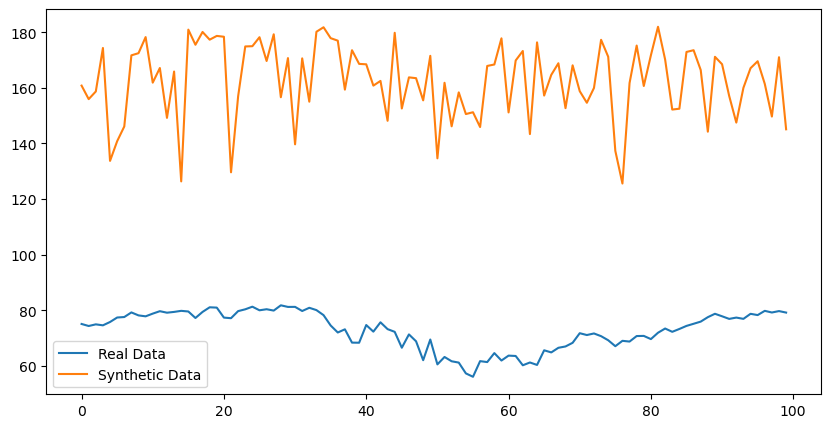

In [7]:
import matplotlib.pyplot as plt

# Plot real vs synthetic data
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(scaled_data)[:100], label='Real Data')
plt.plot(synthetic_data[:100], label='Synthetic Data')
plt.legend()
plt.show()


In [8]:
from scipy.stats import wasserstein_distance

# Calculate Wasserstein distance
real_data_sample = scaler.inverse_transform(scaled_data[:100])
synthetic_data_sample = synthetic_data[:100]
distance = wasserstein_distance(real_data_sample.flatten(), synthetic_data_sample.flatten())
print(f'Wasserstein Distance: {distance}')


Wasserstein Distance: 89.60621101379395
